In [1]:
import torch
import os
import sys
import numpy as np
from pathlib import Path
lib_dir = (Path("__file__").parent).resolve()
if str(lib_dir) not in sys.path: sys.path.insert(0, str(lib_dir))
from FastAutoAugment.archive import remove_deplicates, policy_decoder, fa_reduced_svhn, fa_reduced_cifar10
import matplotlib.pyplot as plt
from theconf import Config as C, ConfigArgumentParser

%matplotlib inline

In [2]:
aug_list = [
"ShearX",
"ShearY",
"TranslateX",
"TranslateY",
"Rotate",
"AutoContrast",
"Invert",
"Equalize",
"Solarize",
"Posterize",
"Contrast",
"Color",
"Brightness",
"Sharpness",
"Cutout"]

In [3]:
g0 = fa_reduced_cifar10()
g1 = fa_reduced_svhn()

In [4]:
def count_aug(name, lst):
    cnt1 = cnt2 = 0
    prob1 = prob2 = 0.
    mag1 = mag2 = 0.
    for aug in lst:
        if name in aug[0][0]:
            cnt1 += 1
            prob1 += aug[0][1]
            mag1 += aug[0][2]
        if name in aug[1][0]:
            cnt2 += 1
            prob2 += aug[1][1]
            mag2 += aug[1][2]
    prob1 = prob1 / cnt1 if cnt1>0 else 0.
    prob2 = prob2 / cnt2 if cnt2>0 else 0.
    mag1 = mag1 / cnt1 if cnt1>0 else 0.
    mag2 = mag2 / cnt2 if cnt2>0 else 0.
    return [(cnt1, prob1, mag1), (cnt2, prob2, mag2)]

In [5]:
def is_same_aug(augs1, augs2):
    (o11, p11, m11), (o12, p12, m12) = augs1
    (o21, p21, m21), (o22, p22, m22) = augs2
    if o11 == o21 and o12 == o22:# \
#         and -0.1 <= float(p11)-float(p21) <= 0.1 and -0.1 <= float(m11)-float(m21) <= 0.1 \
#         and -0.1 <= float(p12)-float(p22) <= 0.1 and -0.1 <= float(m12)-float(m22) <= 0.1:
        return True
    else:
        return False

def rec_tuple(lst):
    tpl = []
    for i in range(len(lst)):
        tpl.append(tuple(lst[i]))
    tpl = tuple(tpl)
    return tpl

In [6]:
def plot_res(aug, txt="", verbose=False):
    lsto0 = []
    lsto1 = []
    lstp0 = []
    lstp1 = []
    lstm0 = []
    lstm1 = []
    for aug_name in aug_list:
        res = count_aug(aug_name, aug)
        print(f"{aug_name}: {res[0][0]}-{res[1][0]}")
        lsto0.append(res[0][0])
        lsto1.append((res[0][0] + res[1][0]))
        lstp0.append(res[0][1])
        lstp1.append(res[1][1])
        lstm0.append(res[0][2])
        lstm1.append(res[1][2])
    plt.barh(aug_list, lsto1)
    plt.barh(aug_list, lsto0)
    if verbose:
        for i in range(len(lsto0)):
            plt.text(max(lsto0[i]+30,lsto1[i]) + 3, i, "({:.2f},{:.2f})".format(lstp1[i],lstm1[i]), color='blue')
            plt.text(lsto0[i] + 3, i, "({:.2f},{:.2f})".format(lstp0[i],lstm0[i]), color='red')
    plt.title(txt)

In [7]:
exp_name = "c10_v5_gr2_r2_defaultchild_b25"
result = torch.load(f"/home/server32/yongsu/fast-autoaugment/FastAutoAugment/models/{exp_name}/summary.pt")
aug = result['final_policy']
print(len(aug))
print(len(aug[0]))

10
247


ShearX: 15-21
ShearY: 22-20
TranslateX: 21-21
TranslateY: 17-18
Rotate: 18-15
AutoContrast: 18-22
Invert: 8-12
Equalize: 10-14
Solarize: 12-10
Posterize: 17-18
Contrast: 36-34
Color: 23-26
Brightness: 12-13
Sharpness: 21-15
Cutout: 18-13


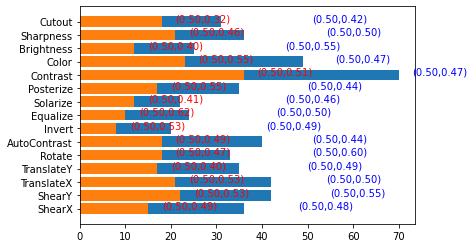

In [11]:
plot_res(aug[5], "",True)

ShearX: 23-19
ShearY: 13-17
TranslateX: 14-19
TranslateY: 15-12
Rotate: 20-22
AutoContrast: 18-17
Invert: 4-5
Equalize: 15-14
Solarize: 12-20
Posterize: 22-18
Contrast: 39-33
Color: 19-18
Brightness: 19-14
Sharpness: 19-24
Cutout: 15-14


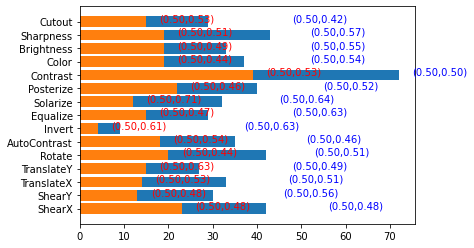

In [12]:
plot_res(aug[9], "",True)

ShearX: 18-18
ShearY: 25-21
TranslateX: 13-13
TranslateY: 18-9
Rotate: 19-15
AutoContrast: 21-25
Invert: 7-5
Equalize: 9-11
Solarize: 4-11
Posterize: 17-23
Contrast: 43-41
Color: 17-20
Brightness: 15-16
Sharpness: 21-21
Cutout: 21-23


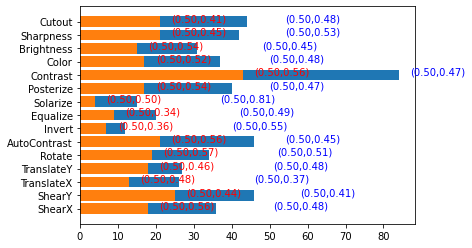

In [13]:
plot_res(aug[4], "",True)

ShearX: 29-35
ShearY: 39-24
TranslateX: 36-30
TranslateY: 40-33
Rotate: 31-33
AutoContrast: 32-38
Invert: 38-37
Equalize: 39-35
Solarize: 17-31
Posterize: 32-31
Contrast: 62-74
Color: 36-29
Brightness: 29-25
Sharpness: 33-29
Cutout: 32-47


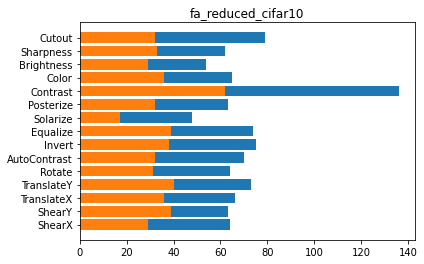

In [8]:
plot_res(g0, "fa_reduced_cifar10")

ShearX: 35-36
ShearY: 36-27
TranslateX: 27-18
TranslateY: 30-27
Rotate: 21-31
AutoContrast: 40-40
Invert: 38-22
Equalize: 31-27
Solarize: 22-33
Posterize: 37-32
Contrast: 78-75
Color: 32-50
Brightness: 38-32
Sharpness: 29-35
Cutout: 43-52


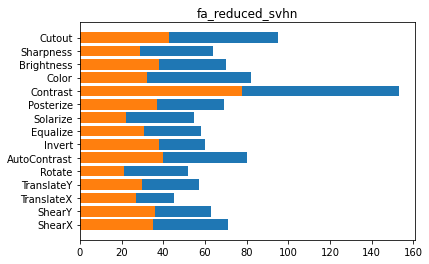

In [9]:
plot_res(g1, "fa_reduced_svhn")

In [16]:
our = {"0": [[["Sharpness", 0.9409199085723332, 0.6701530384262797], ["Posterize", 0.21557513718829413, 0.029591185639086914]], [["TranslateY", 0.30925142627224234, 0.38395294774423006], ["AutoContrast", 0.7453978743104122, 0.2882539837497248]], [["ShearX", 0.0007108570390620995, 0.34253653455615807], ["Sharpness", 0.06516588318962185, 0.5641113983944843]], [["Sharpness", 0.1282307656159335, 0.02503197105589311], ["ShearY", 0.8811537941880312, 0.5771423583919546]], [["AutoContrast", 0.6823990035608901, 0.8085564790763089], ["TranslateY", 0.0007929739649574219, 0.38090465472523255]], [["Sharpness", 0.4111888413008053, 0.5667324181121955], ["Sharpness", 0.40646934306351973, 0.6664283515127433]], [["Color", 0.008505165809140347, 0.4339394354824721], ["Equalize", 0.014385643526572733, 0.8519670374647542]], [["ShearX", 0.017508347572531335, 0.006161268315423574], ["Color", 0.3391294236375598, 0.37825284996741415]], [["Posterize", 0.13384087279926402, 0.2255760592794408], ["ShearX", 0.7246337038683663, 0.5364383617348305]], [["AutoContrast", 0.6462195521610926, 0.8544064409146443], ["ShearX", 0.7832104047369683, 0.5799143008381634]], [["Cutout", 0.9780992724689854, 0.25224388644320966], ["Posterize", 0.301682257584748, 0.11116855552144542]], [["TranslateY", 0.3164844551046152, 0.38353189120694936], ["AutoContrast", 0.7155329060667418, 0.2806174669797056]], [["ShearX", 0.01796175997174252, 0.3347290198180306], ["Sharpness", 0.06562442889873912, 0.10600166499749555]], [["Sharpness", 0.18237904737717026, 0.11830792899850379], ["ShearY", 0.9675714952608646, 0.5809540554219875]], [["AutoContrast", 0.8034201594234212, 0.08882998979008971], ["TranslateY", 0.10755227511826222, 0.37312478374926406]], [["Cutout", 0.8869028691330697, 0.2223984713481929], ["Posterize", 0.12053764535287234, 0.21639395309527992]], [["TranslateY", 0.34405670782760556, 0.31284314211967834], ["Posterize", 0.8907635531362595, 0.07778157400863348]], [["Cutout", 0.04352105456008629, 0.14343542989396524], ["Sharpness", 0.028386763160484267, 0.45375646391311686]], [["Sharpness", 0.046416012363944936, 0.8530761869680873], ["ShearY", 0.9341071855630578, 0.6096019587670516]], [["AutoContrast", 0.9008949772560118, 0.6721958154486566], ["TranslateY", 0.11979182535368083, 0.38023674531748486]], [["Sharpness", 0.9178657543132436, 0.2611961053926752], ["Posterize", 0.26894443752144986, 0.042035644750945574]], [["TranslateY", 0.2878965164408453, 0.33695241848325447], ["AutoContrast", 0.9417992918190361, 0.1241356549026622]], [["ShearX", 0.9110037017262113, 0.5090495086968816], ["Sharpness", 0.04861031256312123, 0.7610983335432188]], [["Sharpness", 0.1078917853679665, 0.22777373100489237], ["ShearY", 0.958990377993739, 0.6266561084714384]], [["AutoContrast", 0.771409163967445, 0.8499453308400566], ["TranslateY", 0.15778474874442974, 0.45697764069945357]], [["Cutout", 0.9276074896511672, 0.5548250932295642], ["Posterize", 0.33825217437195393, 0.0328486694742955]], [["TranslateY", 0.358524257901061, 0.4602025911855733], ["AutoContrast", 0.9437529855336283, 0.19833896063740433]], [["ShearX", 0.07553486152721132, 0.2477558497217367], ["Sharpness", 0.04060044992648715, 0.4490635905802051]], [["Sharpness", 0.15623188012843287, 0.22012138460290206], ["ShearY", 0.9569134092253532, 0.6035835529510435]], [["AutoContrast", 0.775917796776725, 0.6745428558023312], ["TranslateY", 0.15706544776661208, 0.3340494596698309]], [["Color", 0.0074425306066816495, 0.6449242562462524], ["Cutout", 0.4528543980747054, 0.5316021842250881]], [["Sharpness", 0.046252023111427315, 0.5944823238702366], ["AutoContrast", 0.4164910301781588, 0.4520785601916719]], [["ShearX", 0.1398522968754909, 0.23002698431550275], ["ShearY", 0.20166444622622892, 0.323541372762781]], [["ShearY", 0.1351841114855361, 0.3233606068144741], ["Sharpness", 0.6281011223999193, 0.5352660533564826]], [["TranslateY", 0.5863251168997897, 0.5174076626811643], ["Equalize", 0.7021308820726635, 0.22254208351662969]], [["Cutout", 0.980186505625942, 0.423832424316154], ["Posterize", 0.3024283055162892, 0.07792227617707237]], [["TranslateY", 0.32203116112273483, 0.3716326386619353], ["AutoContrast", 0.8629540938645206, 0.18928599628310844]], [["ShearX", 0.025892120140271317, 0.3511480326815532], ["Sharpness", 0.0017073181365604428, 0.08698499269514443]], [["Sharpness", 0.3946506563457945, 0.11982357709480677], ["ShearY", 0.9691342432157974, 0.5577612000117466]], [["AutoContrast", 0.7293462552062542, 0.056598878671475505], ["TranslateY", 0.044442632623832246, 0.3629912568561167]], [["Sharpness", 0.3333131911258952, 0.827428454942778], ["Cutout", 0.36229148844314096, 0.49086973084946856]], [["Brightness", 0.15873770825918854, 0.39596980476701493], ["Contrast", 0.48596327069831446, 0.3322347956562116]], [["Posterize", 0.2792738933564805, 0.15157992873068937], ["ShearY", 0.49176369020300587, 0.564105815682352]], [["Brightness", 0.08514467832220105, 0.2711251234116002], ["Color", 0.6979608907531987, 0.48194043650168084]], [["Color", 0.4644651949120152, 0.640639912935161], ["Equalize", 0.3841475463799518, 0.1783404248617081]], [["Cutout", 0.8406092115805556, 0.1933726268150118], ["Sharpness", 0.03570683354799739, 0.16891750246597548]], [["ShearX", 0.40901727047515896, 0.43755235021126343], ["Cutout", 0.9210049797474393, 0.18061048382473321]], [["Brightness", 0.43243957655532334, 0.21983092353528005], ["Posterize", 0.7991239854846288, 0.8406892156869746]], [["Contrast", 0.36953235525078576, 0.887062918488611], ["Cutout", 0.8096798037520614, 0.44838249959175186]], [["AutoContrast", 0.7601714167076461, 0.7944912901322926], ["ShearY", 0.07550889303954311, 0.3661613662186074]], [["Posterize", 0.10156013423421473, 0.4243232090006541], ["Contrast", 0.8444618517617228, 0.48515407824748535]], [["Contrast", 0.4963185529622388, 0.866789455690121], ["Color", 0.4776173101424344, 0.7553377767803611]], [["Sharpness", 0.35372351431176996, 0.5686268239598563], ["Sharpness", 0.0024692581522107737, 0.7847458191193085]], [["Brightness", 0.2019115318127729, 0.5602505103425947], ["Contrast", 0.6642458852073139, 0.36609790964640704]], [["Color", 0.6010893406992188, 0.5284058993546463], ["Posterize", 0.4452511342994979, 0.9390226104749282]], [["AutoContrast", 0.22199389065709896, 0.7255058322934884], ["Contrast", 0.5625528660499309, 0.4586137985987163]], [["AutoContrast", 0.4064948751903208, 0.6008997609295192], ["Cutout", 0.34303274429988045, 0.2923559025659775]], [["AutoContrast", 0.3744249097760735, 0.43381458401277373], ["Posterize", 0.025488277903170556, 0.35263861726202195]], [["Posterize", 0.2972245627416933, 0.6515515422302971], ["ShearX", 0.8814697795572997, 0.40201641182524567]], [["Color", 0.6660135107976672, 0.6342730784723225], ["Posterize", 0.7307113803510381, 0.49409718667980257]], [["Posterize", 0.989052694893843, 0.422619198849962], ["Contrast", 0.8704490746851469, 0.6687647509323018]], [["Contrast", 0.6560978519350881, 0.7042187814019906], ["Color", 0.7106250475900969, 0.9760855271371685]], [["Sharpness", 0.5904640836680214, 0.4408217485753599], ["ShearY", 0.04124067794295633, 0.5738156376901764]], [["Brightness", 0.20849820631950863, 0.7998800592693753], ["Contrast", 0.6765615313672124, 0.5361711936614935]], [["Color", 0.5572702179531486, 0.7514588914714219], ["Posterize", 0.4368236703321578, 0.968378671720273]], [["AutoContrast", 0.06964083442860255, 0.37168958270499036], ["Contrast", 0.7724178979979668, 0.4619236076511588]], [["Cutout", 0.41081559570787507, 0.6080744613789633], ["Cutout", 0.2043420208831658, 0.4421436880260993]], [["Rotate", 0.30462926723828143, 0.37983735918434064], ["Posterize", 0.31750392325440335, 0.3456002734319737]], [["Posterize", 0.4538375033336096, 0.34812180986611346], ["Contrast", 0.7681703001550063, 0.39407671639462416]], [["Color", 0.6395733516711721, 0.5435856147669698], ["Posterize", 0.8879730516673036, 0.5729245081634463]], [["Posterize", 0.673504146987975, 0.4139992449291418], ["Contrast", 0.6154611738690337, 0.5678091022937265]], [["Contrast", 0.5017382479758068, 0.6011231767301104], ["Color", 0.47094103733414283, 0.341965950966481]], [["Sharpness", 0.6085163847413708, 0.5242908526237773], ["ShearY", 0.035108123608276004, 0.5919021691966067]], [["Brightness", 0.22287460856036295, 0.8425930739255555], ["Contrast", 0.5697516862398432, 0.4809512959061284]], [["Color", 0.5607564916946872, 0.7101803394294425], ["Posterize", 0.5033167696895684, 0.9310645267957044]], [["Posterize", 0.49172911687200765, 0.6145503377756993], ["Color", 0.5296643480965029, 0.3996143097928699]], [["Contrast", 0.8868244819048872, 0.46553257173754803], ["AutoContrast", 0.4872277600644926, 0.310997216331703]], [["Cutout", 0.8432020179872337, 0.6295268436809294], ["ShearY", 0.001409560543358765, 0.6941788057291168]], [["Contrast", 0.09596176694057755, 0.5809501360581473], ["ShearY", 0.6899923680236884, 0.5363969544243469]], [["Color", 0.5813435934373645, 0.8885560787423605], ["Brightness", 0.15535306325181164, 0.5074997935277906]], [["Posterize", 0.6153948732483182, 0.3310522567096873], ["Contrast", 0.7729365308984673, 0.6317955611605647]], [["Contrast", 0.6662760031160546, 0.8709045067962922], ["Color", 0.556250219374249, 0.14802481702625223]], [["Sharpness", 0.5829525471466436, 0.4942768793474614], ["ShearY", 0.17743080779674375, 0.4668060121993852]], [["Brightness", 0.14380651598387093, 0.8847459151079761], ["Sharpness", 0.5274467883187831, 0.5141709856350505]], [["Color", 0.6595243884682513, 0.7482573395038487], ["Posterize", 0.33389426864329314, 0.9982846326217985]], [["Posterize", 0.9320063796922692, 0.42471034996100426], ["Contrast", 0.8702401594165422, 0.6774840861098248]], [["Contrast", 0.6568748413218246, 0.786024624704104], ["Color", 0.7095938599963754, 0.8721676144761226]], [["Sharpness", 0.5892235795164792, 0.4602895700932241], ["ShearY", 0.1779379846701592, 0.5886952264302254]], [["Brightness", 0.2143672443292643, 0.8078157074758536], ["Contrast", 0.5364318885090076, 0.5178211625907384]], [["Color", 0.5671095170281019, 0.7339099329909534], ["Posterize", 0.4230001306508958, 0.9795641049298893]], [["Posterize", 0.9781785715294006, 0.374480566529884], ["Contrast", 0.9978315189263739, 0.5309843251659976]], [["Contrast", 0.6915321718149672, 0.4172733691976996], ["Color", 0.7241527213320307, 0.4860422309250412]], [["Sharpness", 0.6401538911090124, 0.36241208431697225], ["ShearY", 0.0583012077577815, 0.6649434822467709]], [["Brightness", 0.08179390344062074, 0.5909469866652566], ["Contrast", 0.6378027606773188, 0.4410734775478718]], [["Color", 0.5725325655854999, 0.8154842128414672], ["Posterize", 0.29405486006725795, 0.9607909234432317]], [["Posterize", 0.12147086433817705, 0.6176895864978597], ["Color", 0.24597736694894468, 0.03793866612672636]], [["AutoContrast", 0.9873542767308736, 0.2891843221532232], ["AutoContrast", 0.48921188840818536, 0.2221931128278638]], [["Cutout", 0.9142344697393725, 0.8053138211429659], ["Sharpness", 0.012599478197263569, 0.7017681387896983]], [["Contrast", 0.08529892354058474, 0.4351429741927808], ["ShearY", 0.6467792322918696, 0.48571364176054516]], [["Color", 0.5844920833573063, 0.9776402893753965], ["Brightness", 0.07615026559016928, 0.16821000019103965]], [["ShearX", 0.002025684086803814, 0.2586973607155471], ["Brightness", 0.6762519801083567, 0.382607735712082]], [["Posterize", 0.5176887192537294, 0.7115082791917426], ["Sharpness", 0.4064653283138239, 0.24263506355626382]], [["TranslateY", 0.27837592854526716, 0.41393591047436634], ["ShearY", 0.41664834341023593, 0.45360966667995367]], [["Contrast", 0.037124184544892955, 0.9916694538332405], ["ShearY", 0.2232473393763493, 0.590664426873203]], [["Posterize", 0.6495943032670971, 0.9920696029957637], ["Contrast", 0.5754075371104481, 0.45469148310921875]], [["Color", 0.19937607720286732, 0.03652934002606591], ["Cutout", 0.9651767096638961, 0.28550228310079584]], [["Sharpness", 0.7325094803546465, 0.5634512494924152], ["Invert", 0.03482946412035576, 0.3940381294449252]], [["Brightness", 0.43134012343868117, 0.40034077127849255], ["Brightness", 0.5562216856866017, 0.7656668817175134]], [["Cutout", 0.9440451160831036, 0.18740992219920832], ["Color", 0.8355433227471468, 0.9526471055116518]], [["Sharpness", 0.40881471162511895, 0.47781784903925606], ["Sharpness", 0.5072660470748425, 0.636038941265433]], [["AutoContrast", 0.1462640795928108, 0.48029105075338263], ["Cutout", 0.29336823177878746, 0.08998716178889926]], [["Color", 0.0820380280785005, 0.8474923083352761], ["Sharpness", 0.2208241780876603, 0.47921783662137646]], [["Contrast", 0.17979009490275757, 0.9068258372573362], ["Contrast", 0.5832506322388182, 0.8834894664129385]], [["Sharpness", 0.28073226543690866, 0.43164681507996194], ["AutoContrast", 0.2768409428390361, 0.5187438279254046]], [["Cutout", 0.6085189075935356, 0.07948647899559846], ["Solarize", 0.41830355694851473, 0.9952462729553018]], [["Cutout", 0.215742796469559, 0.005147162322944765], ["Cutout", 0.2495180477775143, 0.3666632751395791]], [["Rotate", 0.1481454047648227, 0.7748662405431631], ["Sharpness", 0.6396238530155784, 0.5368041276916586]], [["Solarize", 0.11319230403861658, 0.28155144283279276], ["Contrast", 0.6586605190854051, 0.5665983406675781]], [["Cutout", 0.3042303289174108, 0.3982118693728538], ["Invert", 0.052569358545986225, 0.8044492784726257]], [["TranslateY", 0.0012694963464877362, 0.6609197607888061], ["Sharpness", 0.5898495215641713, 0.6765583480225347]], [["Cutout", 0.21066652089092103, 0.2626026108811074], ["ShearX", 0.22920547444557332, 0.36387003767930876]], [["Posterize", 0.42031478307586057, 0.5891902698338403], ["Sharpness", 0.2785326731037777, 0.22510876119152295]], [["TranslateY", 0.516344856798298, 0.2618024701335512], ["Color", 0.14467864277648912, 0.5586423368515672]], [["Posterize", 0.25037428826219793, 0.32224248189105664], ["TranslateX", 0.04241341081694894, 0.7640492527547754]], [["Contrast", 0.007508799653120075, 0.7839893120822532], ["Sharpness", 0.5167435407646278, 0.18871137629792073]], [["ShearX", 0.04483814784114193, 0.14469007817196097], ["ShearX", 0.15253894887670943, 0.4718115004760042]], [["TranslateX", 0.2102666526304432, 0.6377180009988497], ["Color", 0.46114199453919075, 0.4216695421748197]], [["Color", 0.21958578763454806, 0.36730628535687704], ["TranslateY", 0.5220233804664672, 0.32456248762726086]], [["Cutout", 0.04524195086364205, 0.4132811927745452], ["Sharpness", 0.40910878611160006, 0.7201989329644823]], [["TranslateY", 0.1926072193333293, 0.6164492154334994], ["Contrast", 0.3728213153497917, 0.34503338856629095]], [["TranslateX", 0.11188223148248272, 0.01700761960065092], ["Solarize", 0.18039875190081184, 0.4504770357575747]], [["Cutout", 0.10287723542669862, 0.6010729088976831], ["Sharpness", 0.3662534447183707, 0.2573560418581826]], [["Color", 0.482970021003044, 0.27186841982250365], ["Contrast", 0.7167419900999867, 0.45344545640577305]], [["Posterize", 0.14957327411101917, 0.28026008103525446], ["TranslateX", 0.16788853122573605, 0.6896606083438244]], [["TranslateY", 0.28779868119250374, 0.5093749231978237], ["Sharpness", 0.4943322219477134, 0.46409343538588643]], [["Brightness", 0.059210795852155745, 0.12386263041878329], ["AutoContrast", 0.8333643966795731, 0.5873144943487323]], [["Sharpness", 0.5920064991347023, 0.4962405419075969], ["Sharpness", 0.34976434985442245, 0.4576353401263598]], [["ShearX", 0.3740367918406598, 0.4382082644758194], ["TranslateY", 0.6910856887966137, 0.5057837802208105]], [["Color", 0.1241787601200892, 0.4507260946676225], ["Color", 0.11943748377147143, 0.5365254065074464]], [["Contrast", 0.5387380022103991, 0.3967843906233386], ["Solarize", 0.2952223373690538, 0.21401454948373325]], [["Color", 0.1934705446622986, 0.42271761388634554], ["Cutout", 0.017301128556968748, 0.21727191740305907]], [["ShearY", 0.9185463601724037, 0.6174312624699859], ["Invert", 0.047233783730861956, 0.3929804263077403]], [["Brightness", 0.6112073446464985, 0.24708050452126373], ["Brightness", 0.2799854666980185, 0.828956259556367]], [["Cutout", 0.9611833972833951, 0.16020061397678498], ["Sharpness", 0.8692788090064298, 0.956202805955516]], [["Sharpness", 0.19811128275745393, 0.8030358288217346], ["Sharpness", 0.5019896602171948, 0.6370279406160424]], [["Cutout", 0.0004440421813264098, 0.07807527162082756], ["ShearX", 0.21568216865431503, 0.27833831873197085]], [["Rotate", 0.6153976763520816, 0.6337055456964045], ["AutoContrast", 0.33612926206167815, 0.42854246091740783]], [["Solarize", 0.04651155251696493, 0.3128627066791218], ["AutoContrast", 0.4692506216184078, 0.4791271092421227]], [["AutoContrast", 0.12279917234992163, 0.4291907009261151], ["Contrast", 0.42308659318744535, 0.7635151495759407]], [["Sharpness", 0.4439240778770636, 0.7722241244537547], ["Posterize", 0.6049991607372367, 0.32513552088261927]], [["Color", 0.23361914262278374, 0.0382084519710536], ["Sharpness", 0.24563938413649805, 0.6461095693233717]], [["Posterize", 0.6111948133084149, 0.4655292455565818], ["Cutout", 0.03372204483563135, 0.17556268666695468]], [["AutoContrast", 0.4082214867245937, 0.5939266695197414], ["Cutout", 0.22284782747694995, 0.6877146422803564]], [["Sharpness", 0.3940975098830346, 0.772823637258821], ["ShearY", 0.7449028579486252, 0.4942019444482125]], [["AutoContrast", 0.0782063650236439, 0.7034477058138329], ["TranslateY", 0.09675123758037968, 0.24245208035101815]], [["Color", 0.19823320995402555, 0.5557281215880971], ["Sharpness", 0.17831011264268046, 0.18044891627316662]], [["Posterize", 0.115735316892354, 0.785470750489309], ["Sharpness", 0.07145313544176621, 0.14413701945404697]], [["AutoContrast", 0.014220811309610393, 0.5005266526027174], ["Posterize", 0.35110641924848285, 0.7710315664084988]], [["AutoContrast", 0.6150613480851623, 0.9698022893585315], ["Cutout", 0.7215898089962449, 0.6238496664236558]], [["Posterize", 0.43378521373078954, 0.4294167295523135], ["Contrast", 0.013260177539989773, 0.9203484310142404]], [["Sharpness", 0.36398050753186595, 0.7481339274518745], ["Sharpness", 0.16674619768586052, 0.02643758827924958]], [["ShearY", 0.1545093461576334, 0.8753005552233785], ["Sharpness", 0.2638550700758887, 0.7904902779590759]], [["AutoContrast", 0.016227869926608917, 0.5513704462316489], ["Posterize", 0.31812823144932095, 0.8534087717617955]], [["AutoContrast", 0.659486413715839, 0.9722375880630911], ["Color", 0.7912148436962468, 0.6056936634877921]], [["AutoContrast", 0.45140833236750116, 0.18485970581141875], ["Contrast", 0.06143245955281469, 0.9357296277379964]], [["Invert", 0.06746211701577412, 0.021143372393969156], ["Color", 0.24551709720485707, 0.5320789526804245]], [["Color", 0.3188723322141431, 0.9951042633507644], ["Equalize", 0.1437308887041573, 0.023191081055996925]], [["ShearY", 0.155529102100587, 0.42956111586211443], ["Sharpness", 0.05151427522694971, 0.6794557239013889]], [["Sharpness", 0.5404082894390461, 0.6776842694209864], ["TranslateY", 0.5992923016506803, 0.5346509388279597]], [["Contrast", 0.106305800698443, 0.7262947909830104], ["Invert", 0.061287936628388676, 0.5938322904752954]], [["Sharpness", 0.4403552339848451, 0.8669957490040316], ["Posterize", 0.0459542232567941, 0.6811463797859985]], [["Cutout", 0.3234035672244806, 0.9982808691258751], ["Brightness", 0.29223964161682353, 0.7009604685331001]], [["Contrast", 0.0004143695968583383, 0.5486535274477261], ["Posterize", 0.1768658933131979, 0.80433045544571]], [["AutoContrast", 0.5837802374805353, 0.6919378522255515], ["Color", 0.9096439758100803, 0.5646277748009075]], [["AutoContrast", 0.5561262671819052, 0.04769364048133057], ["ShearY", 0.3018983588716064, 0.8708724295080823]], [["Color", 0.19721269848920192, 0.6272581178076344], ["Sharpness", 0.16049908319210915, 0.1302625527418953]], [["Posterize", 0.13416382103682942, 0.7037457684508447], ["Sharpness", 0.07779872184741136, 0.14645836712150576]], [["AutoContrast", 0.4167963390524472, 0.46766045103066617], ["Posterize", 0.3480973657941074, 0.7623699415517238]], [["AutoContrast", 0.7490699456246259, 0.9304086417741161], ["Cutout", 0.7651256662180533, 0.6062232776268105]], [["Posterize", 0.4391627905388012, 0.4251981417918843], ["Contrast", 0.02405167363058807, 0.13969655022581423]], [["Sharpness", 0.4508345358412672, 0.7430051587171735], ["Sharpness", 0.25507505736328606, 0.6289629657460474]], [["ShearY", 0.1654238985465058, 0.8748724252124449], ["Cutout", 0.2610179039235556, 0.809644609810898]], [["Sharpness", 0.006283538107558415, 0.6857843701685133], ["Solarize", 0.27075924363711423, 0.8665399904410546]], [["Sharpness", 0.5216479543141311, 0.9813588398773319], ["Color", 0.7359310446686064, 0.6096963804418291]], [["AutoContrast", 0.19336276380686018, 0.18130100428816318], ["Posterize", 0.06132120894972304, 0.9387442989218865]], [["Color", 0.1762123616567604, 0.594228041917381], ["Sharpness", 0.1767743064132805, 0.1370748776436126]], [["Posterize", 0.25923865750758024, 0.8486167213270719], ["Sharpness", 0.11898797422785516, 0.05828726418315977]], [["AutoContrast", 0.024516953579376166, 0.43827634688318856], ["Sharpness", 0.4623012920758125, 0.751789423274152]], [["AutoContrast", 0.7011408131857372, 0.785592363062645], ["Cutout", 0.6002226761082139, 0.5249695504695161]], [["Posterize", 0.6336606779939126, 0.16220179091768944], ["Contrast", 0.047214168172018525, 0.8990868434089552]], [["Contrast", 0.07914712092841981, 0.9093134739404761], ["TranslateX", 0.7381839785662632, 0.5346460740886004]], [["TranslateY", 0.050026108173291506, 0.5143467141948227], ["Rotate", 0.1541391637584948, 0.3066896125239955]], [["ShearY", 0.35017150624007565, 0.4914168843903343], ["Rotate", 0.13470611114651104, 0.6277763941544025]], [["Rotate", 0.4863915582368034, 0.4969211799311014], ["Posterize", 0.867460793692761, 0.38384262672504044]], [["Posterize", 0.33261071484255744, 0.6308588291088689], ["Brightness", 0.14136274136000215, 0.4755238069664647]], [["Cutout", 0.06543088833041383, 0.2590113074894794], ["Rotate", 0.3931914420462411, 0.5714010439224927]], [["Contrast", 0.7622822208478572, 0.7877025444959997], ["Color", 0.18133449511998, 0.2151101251226318]], [["Color", 0.8206699858783485, 0.712131789663009], ["ShearY", 0.7535598550029712, 0.4649434592861406]], [["Sharpness", 0.4402053317736814, 0.8839869324976686], ["ShearY", 0.421878286307265, 0.17062190218049145]], [["Rotate", 0.13114517104010937, 0.6460439485935633], ["Cutout", 0.0753698469410408, 0.1327281597210773]], [["Color", 0.3506603096015142, 0.4135160139194733], ["TranslateY", 0.13119445112138747, 0.48786106239020954]], [["Cutout", 0.8455197637249037, 0.3718322925090094], ["ShearX", 0.20080370114160617, 0.6970851129337978]], [["Contrast", 0.0568872145802229, 0.15415734961884814], ["Cutout", 0.30454844633827916, 0.28339627410833135]], [["Brightness", 0.613080315941921, 0.3969423580981786], ["Posterize", 0.3667415993444377, 0.8033121884638118]], [["AutoContrast", 0.09751251200254187, 0.1265583902108946], ["Color", 0.0012179383593204501, 0.869045708803284]], [["Color", 0.4163280485728219, 0.4874696463125668], ["Sharpness", 0.2922059888097062, 0.39767404158633635]], [["Cutout", 0.9365483019402051, 0.24144183950942283], ["ShearX", 0.27169819166819026, 0.4842228374031178]], [["Contrast", 0.003966343363129052, 0.37344667772233175], ["Cutout", 0.33734757318668107, 0.25964644991493696]], [["Brightness", 0.8336842437288077, 0.6557742644515185], ["Posterize", 0.4134297365001589, 0.6503291047977093]], [["TranslateY", 0.16103109587476913, 0.3034372449160486], ["Color", 0.06393257557358492, 0.740609326996564]], [["Color", 0.6561175061201772, 0.4698986408931694], ["Sharpness", 0.16910548286289673, 0.3805569917380801]], [["Cutout", 0.9261174037512646, 0.49211176474022994], ["ShearX", 0.28254678468307043, 0.5910304576506376]], [["Brightness", 0.12057594984804137, 0.06462598940305558], ["Cutout", 0.26362657456493926, 0.2753729682758117]], [["Brightness", 0.7355973609343313, 0.6107375741992391], ["Posterize", 0.2947061501824289, 0.709737156889594]], [["AutoContrast", 0.3538243318614287, 0.22617143560845474], ["Color", 0.04167420386944881, 0.6262707387983882]], [["Color", 0.35824002312085235, 0.41261285237055717], ["Sharpness", 0.15802432714948678, 0.5798352074850975]], [["Brightness", 0.7948867808235932, 0.49359867927675743], ["TranslateY", 0.04613341592471437, 0.835500360136466]], [["Brightness", 0.057280701335853085, 0.14669377167966852], ["Rotate", 0.1553100524700371, 0.28744088711026744]], [["Cutout", 0.6080859951992684, 0.2814231219259524], ["Rotate", 0.06724480559725171, 0.9346945707036515]], [["AutoContrast", 0.2662872919878012, 0.11645156548952151], ["Invert", 5.427827362833315e-06, 0.8749132667034448]], [["Color", 0.4394190910695142, 0.5879721787266392], ["Sharpness", 0.1614180867492085, 0.3120746812586952]], [["Cutout", 0.945592814469474, 0.30153018394757547], ["ShearX", 0.26668738817456217, 0.5031820349122061]], [["Brightness", 0.06169634738029456, 0.2268867766778521], ["Cutout", 0.4494133597293778, 0.2710090609977329]], [["Brightness", 0.7531182813635099, 0.7864308061175657], ["Posterize", 0.40799257534195804, 0.7144855778335868]], [["AutoContrast", 0.17096756497258495, 0.4519740409881933], ["Color", 0.059766862821254485, 0.6260305672296106]], [["Posterize", 0.44877373591409714, 0.5947524895161025], ["Sharpness", 0.039305732262312376, 0.3014120514001034]], [["TranslateY", 0.9476283999414871, 0.6440832649005703], ["ShearX", 0.245682272686218, 0.5209739467615937]], [["Brightness", 0.07796091285431529, 0.2329309247860907], ["Cutout", 0.4677060502929182, 0.5137955154786467]], [["Brightness", 0.7671816970118646, 0.7123815318271718], ["Posterize", 0.3957325739164788, 0.7014487816678403]], [["AutoContrast", 0.05723394355905742, 0.1714853296023119], ["Color", 0.07287266960005563, 0.652052073527096]], [["Color", 0.5274007815292299, 0.5323737064851157], ["TranslateY", 0.07025297150305446, 0.33790509682018455]], [["Cutout", 0.7821724818135662, 0.557761071544738], ["ShearX", 0.3993882993233856, 0.6288237199324206]], [["Brightness", 0.004939058459166486, 0.21200723268214436], ["Cutout", 0.17991428876105842, 0.31438981877758876]], [["Brightness", 0.7343427631272799, 0.25441792951158426], ["Posterize", 0.2807201010395303, 0.6334638973820628]], [["TranslateY", 0.191628693387299, 0.4331636554717318], ["Color", 0.20018298772752868, 0.762848885466891]], [["Color", 0.5369199556281824, 0.3699714421893778], ["ShearX", 0.3503633366970518, 0.5732635638857992]], [["Cutout", 0.7999717115092195, 0.39560303448752376], ["Rotate", 0.10958441381301585, 0.47179789041489933]], [["Sharpness", 0.35600081787518884, 0.1106547274949141], ["Posterize", 0.000558783927303852, 0.25521629203658136]], [["Posterize", 0.502922502351135, 0.4148184535820356], ["Posterize", 0.1839851947981052, 0.482655576678855]], [["TranslateY", 0.15384490914939636, 0.22523161709451628], ["Color", 0.3336547108970954, 0.5987966407662171]], [["Color", 0.30699536579937314, 0.3805657186240544], ["Sharpness", 0.2343454685543233, 0.6328198450490162]], [["Brightness", 0.9310842937342592, 0.5512900911113011], ["TranslateY", 0.07239113400789685, 0.6309990996419991]], [["Brightness", 0.038647081342112116, 0.1649747119803087], ["Cutout", 0.038800451720998275, 0.4728216873292581]], [["Cutout", 0.470973976961981, 0.14316196337306236], ["Rotate", 0.3117861842336906, 0.8042915987528076]], [["AutoContrast", 0.0007294584561377271, 0.06269807498433216], ["Color", 0.004982784343401166, 0.8833767455778271]], [["TranslateY", 0.5400674201560873, 0.5125081459527869], ["Color", 0.3467266575226827, 0.6647181812075983]], [["Brightness", 0.9994614830577109, 0.5426115087699378], ["TranslateY", 0.3736788890342675, 0.6636274030093158]], [["Color", 0.18079644760021035, 0.2317861320948016], ["Sharpness", 0.4476021638649246, 0.3847184359442122]], [["Equalize", 0.5312024545200748, 0.47567354558938346], ["Contrast", 0.15212631295756743, 0.885114377460956]], [["ShearX", 0.04355986304272006, 0.3711050211700727], ["Posterize", 0.09334645016809802, 0.8060879060223296]], [["Brightness", 0.529185709153474, 0.41060165921684044], ["Cutout", 0.17654740089339777, 0.22437198767351152]], [["AutoContrast", 0.9035519685452956, 0.43027042872170534], ["TranslateY", 0.5144608479438916, 0.3891510308636432]], [["Sharpness", 0.06191755996862604, 0.87018270539189], ["TranslateY", 0.559579161098795, 0.6403782894629094]], [["Invert", 0.9855533380672963, 0.6810125144805638], ["Invert", 0.9986310236333802, 0.23931065162711784]], [["Contrast", 0.32631901159731963, 0.42723844698414115], ["Sharpness", 0.5410093770537752, 0.5973030039826719]], [["Brightness", 0.5261359244724262, 0.4482773034775126], ["Cutout", 0.17076178776411546, 0.17891852507783224]], [["AutoContrast", 0.9130389674346978, 0.45153622226140233], ["TranslateY", 0.5970969613533822, 0.39677751223362684]], [["Sharpness", 0.05899300781237393, 0.7835331630735095], ["TranslateY", 0.5723411551661229, 0.6042909532216425]], [["Invert", 0.972031038629684, 0.6328400120817081], ["Invert", 0.94218867174945, 0.15339133092981883]], [["Contrast", 0.3348299638663559, 0.43266508825500233], ["Brightness", 0.5413068186280748, 0.6042877064004115]], [["Sharpness", 0.23867587682202462, 0.25262965823380323], ["Cutout", 0.6368727461457873, 0.24552675827701498]], [["Contrast", 0.7088428788119001, 0.7642488315450147], ["Brightness", 0.4144274902504663, 0.36290845851552395]], [["Brightness", 0.16274395479229703, 0.6585044779719385], ["AutoContrast", 0.5980862470010198, 0.6599815424077108]], [["Color", 0.7689501604504252, 0.847167137551227], ["Posterize", 0.3057890998918318, 0.2525694169681083]], [["Contrast", 0.3729512276570689, 0.28133626249171495], ["ShearY", 0.5815476921783496, 0.5012967048020243]], [["Brightness", 0.8063370446227631, 0.4081506707275268], ["Cutout", 0.2804704155063682, 0.2266168252106196]], [["AutoContrast", 0.868597140329655, 0.4309914930444776], ["TranslateY", 0.29765351556445097, 0.5304894021539471]], [["Sharpness", 0.054617643826503845, 0.9207428925490253], ["TranslateY", 0.6619785247660903, 0.6201529519760292]], [["Invert", 0.9966731610798819, 0.7490700851404954], ["Invert", 0.9957486414554635, 0.18631885698689765]], [["Contrast", 0.3104205636122654, 0.8686270591426919], ["Sharpness", 0.5411991630624546, 0.593379449670621]], [["Sharpness", 0.6989254989643078, 0.07237581235258356], ["TranslateY", 0.07947102904984354, 0.4904614234367046]], [["Contrast", 0.980904761120935, 0.5393507408184928], ["Brightness", 0.3138486016665325, 0.14307803481573908]], [["Cutout", 0.27424078108323274, 0.8849432673009177], ["AutoContrast", 0.5257674364316953, 0.4719760441848765]], [["Sharpness", 0.8168074657199769, 0.7366079224674187], ["Posterize", 0.2165740120851115, 0.25366413008565747]], [["TranslateY", 0.37523067274817845, 0.5783217035580435], ["Rotate", 0.3260362840949731, 0.5386858725009768]], [["Brightness", 0.251328199244214, 0.3307819487073572], ["Rotate", 0.21183754345562814, 0.47666752517175137]], [["AutoContrast", 0.9398395729835521, 0.0694528943646755], ["ShearY", 0.9967986694796884, 0.48323133748314395]], [["Color", 0.2512032590562421, 0.5918220020427177], ["AutoContrast", 0.6255717347668391, 0.7966723127750921]], [["Equalize", 0.9244547936367747, 0.8630163969289133], ["Cutout", 0.7462258975618579, 0.7293190895899533]], [["Posterize", 0.20524621800904572, 0.10085479174318068], ["Cutout", 0.29479424746848104, 0.8217971855303723]], [["Sharpness", 0.49437348192225583, 0.0874629585954225], ["Color", 0.6931928210406993, 0.09521974982953166]], [["Contrast", 0.7125348476998938, 0.7554087892608472], ["Brightness", 0.42160135239010166, 0.267625965519253]], [["Brightness", 0.1682356932571849, 0.5072987163543932], ["AutoContrast", 0.34691170234857893, 0.931697764675532]], [["Color", 0.539308975005677, 0.8569800198664141], ["Posterize", 0.27110668122504417, 0.30243713793296795]], [["Contrast", 0.41997546236474, 0.2834596569640937], ["Contrast", 0.8121390122516947, 0.5479678397930481]], [["TranslateX", 0.33924091320378613, 0.5364685166318772], ["Rotate", 0.48777579323015713, 0.4726896865503896]], [["AutoContrast", 0.9436821556063368, 0.5600731359599128], ["ShearY", 0.9985626661648477, 0.42132674896367056]], [["Color", 0.24701873939542135, 0.3354040964198602], ["Color", 0.6317134623832128, 0.7960400674293586]], [["Equalize", 0.9129677747556482, 0.031863390172630665], ["Cutout", 0.7460873339820988, 0.7383425765830163]], [["Posterize", 0.18934075432263459, 0.03214070547461359], ["Cutout", 0.7932933783529971, 0.17962949201610473]], [["Sharpness", 0.2462360327846561, 0.15998328144510038], ["TranslateY", 0.814592103395049, 0.43105109126290014]], [["Contrast", 0.4934785770982505, 0.6730903689877528], ["Brightness", 0.5555771957025318, 0.25110977413708485]], [["Brightness", 0.6902013573249968, 0.5508701408896906], ["AutoContrast", 0.6040180162318539, 0.7249510139689913]], [["Color", 0.7774332186505926, 0.9347969148854929], ["Posterize", 0.14926703252441764, 0.1628648938517175]], [["TranslateY", 0.25129502471950027, 0.3634248566326926], ["ShearY", 0.6476647193074266, 0.2776881275468992]], [["ShearX", 0.7676904599965004, 0.040747788262203155], ["Posterize", 0.342091333438547, 0.07606375728858139]], [["Posterize", 0.786797192069619, 0.36642852902169876], ["Posterize", 0.14767922600652272, 0.45213731863804646]], [["AutoContrast", 0.8384039321829849, 0.9253073641742839], ["TranslateX", 0.5360496221717703, 0.4500121986820114]], [["Color", 0.7811369828475623, 0.64705941912917], ["AutoContrast", 0.9988998747813516, 0.4419105340162768]], [["Color", 0.5752071254592361, 0.33267709400926415], ["Sharpness", 0.6838517224293039, 0.8583996997149796]], [["TranslateX", 0.43302860265497245, 0.5002066311807193], ["Equalize", 0.03305543175988562, 0.7191650472198542]], [["Cutout", 0.3376672646146631, 0.8184722935771701], ["Sharpness", 0.6043394936654178, 0.9221916822930093]], [["ShearY", 0.09032878165732838, 0.41806581006398497], ["Equalize", 0.10289931988463476, 0.7415502758919326]], [["Contrast", 0.21275719348289962, 0.7706290236354455], ["Cutout", 0.18229087461037952, 0.6178281613884002]], [["Posterize", 0.8965425418957517, 0.5866601365041788], ["Brightness", 0.491974226180854, 0.504717698644713]], [["ShearY", 0.2008868103617519, 0.3573776422369786], ["Color", 0.30089518852318653, 0.6045659989650508]], [["Cutout", 0.39255606951254146, 0.6164305823510248], ["Sharpness", 0.46581046173684443, 0.4549804534731837]], [["ShearY", 0.5431546731447646, 0.40714907962142965], ["Equalize", 0.01462818932950577, 0.7827684811811833]], [["AutoContrast", 0.1974298135163011, 0.8371883715196773], ["AutoContrast", 0.3130386194191762, 0.5011466858414184]], [["Color", 0.6881387492490223, 0.5755234134762345], ["Cutout", 0.003471171826693001, 0.6625456299152434]], [["ShearY", 0.08176891862642421, 0.7913354265042144], ["Posterize", 0.2556603456180946, 0.6601089638594083]], [["Cutout", 0.23949759975166307, 0.5433267146113189], ["Cutout", 0.4588201795273621, 0.17674963054627013]], [["Brightness", 0.4397164285551528, 0.44743958383220095], ["Cutout", 0.1286002806696931, 0.49132640030142405]], [["Sharpness", 0.9812948974207005, 0.7620483088534877], ["ShearY", 0.008411731057165306, 0.7937831695571291]], [["Color", 0.7024840715529733, 0.40328611930720015], ["Posterize", 0.8652227548351088, 0.22410111967746005]], [["ShearY", 0.23711467474280382, 0.5350261304436418], ["Color", 0.2195060333390681, 0.47913576555473536]], [["Cutout", 0.9366116580496346, 0.5175570599309078], ["Sharpness", 0.3412883648280418, 0.5507091562837101]], [["Color", 0.5565212212448883, 0.5428040439426433], ["Sharpness", 0.08994756869972056, 0.5356610113115134]], [["Equalize", 0.3361494779086208, 0.8852131469334743], ["Brightness", 0.03458784334853765, 0.5906238825783012]], [["Posterize", 0.7842286418229518, 0.5896300085151654], ["Cutout", 0.3193674874556984, 0.526601135563466]], [["ShearY", 0.33966459295398455, 0.5178427688681779], ["Color", 0.2650023611429626, 0.4417891386032967]], [["Cutout", 0.9063768144871444, 0.5020631813898438], ["Sharpness", 0.42211423281646665, 0.4236196713399007]], [["ShearY", 0.42315662982069496, 0.4546072668996192], ["Sharpness", 0.03925758965812258, 0.7486318731084893]], [["Equalize", 0.10321350303418467, 0.8041233616518737], ["Brightness", 0.0854077207062787, 0.565264505003406]], [["Posterize", 0.7136355969912344, 0.7248730593146152], ["Cutout", 0.36206535923257593, 0.5978398448389171]], [["ShearY", 0.19335915883962748, 0.34985696031185964], ["Color", 0.34178698228806015, 0.15537783526355137]], [["Cutout", 0.49739321014877635, 0.3391706635413945], ["Sharpness", 0.5487425896169151, 0.4729227840734964]], [["ShearY", 0.6334895219355845, 0.539765638540548], ["Equalize", 0.01133277227467308, 0.8736685898366789]], [["Posterize", 0.016617993621305893, 0.6840547130520216], ["AutoContrast", 0.14794591293023585, 0.4280470454147874]], [["Posterize", 0.8138515148356916, 0.7842108563456189], ["Cutout", 0.23384081771191123, 0.7075222550232205]], [["ShearY", 0.28084729844463785, 0.5546569618373058], ["Color", 0.18609594910260996, 0.5405244192148589]], [["Cutout", 0.6638398626102755, 0.4171232737577478], ["Cutout", 0.3655306522618762, 0.4858444486204269]], [["ShearY", 0.4868773434454284, 0.50451446537418], ["Sharpness", 0.14514005215689224, 0.6313132844697091]], [["Solarize", 0.37717545213761156, 0.904295173664116], ["Brightness", 0.10816196485386653, 0.6183009095675214]], [["Posterize", 0.6287152512999258, 0.614946643941301], ["ShearX", 0.1919670259830119, 0.47755114432315554]], [["ShearY", 0.41177713846638647, 0.5269884691922719], ["Color", 0.24571519101409675, 0.5879713481261666]], [["Rotate", 0.0391893662625217, 0.5825055240265612], ["Sharpness", 0.43001057997216424, 0.15916185804238175]], [["Brightness", 0.46637557635245364, 0.48863862871485053], ["Posterize", 0.8636093193414264, 0.7851710715723481]], [["AutoContrast", 0.2288386886456582, 0.8171305310296137], ["ShearX", 0.26557474891898425, 0.7512854675883278]], [["ShearX", 0.8013600324515437, 0.5075788772441171], ["Posterize", 0.9381814369115447, 0.5445606798475292]], [["Rotate", 0.3189783258148882, 0.538952644083272], ["Posterize", 0.2835870343496197, 0.47782537207416065]], [["Sharpness", 0.928294142317389, 0.5283388738701477], ["Contrast", 0.09014580098243608, 0.5504204314106136]], [["Color", 0.6617073109371033, 0.5528770724301331], ["Cutout", 0.29179366452368516, 0.5472910428461745]], [["Equalize", 0.3528248149582759, 0.8160945865425183], ["Brightness", 0.0024560968858594046, 0.7874901495704]], [["Posterize", 0.7905764067025935, 0.6785771703012087], ["Color", 0.25304457679871906, 0.677695671794954]], [["Sharpness", 0.2976751699055362, 0.9529208560617319], ["Color", 0.30047562701698216, 0.83332519934265]], [["Cutout", 0.9804449960038019, 0.7253507425826498], ["Contrast", 0.8194487232530301, 0.5168354364735732]], [["TranslateY", 0.5843938131515652, 0.30959242036598467], ["Brightness", 0.21201587152073753, 0.5560152783143942]], [["Cutout", 0.4978552886648301, 0.9983530021822152], ["Posterize", 0.3030850168256895, 0.946832554925515]], [["Color", 0.5392882229481504, 0.6446746803445491], ["Sharpness", 0.004929540388852849, 0.04542516403132676]], [["Cutout", 0.010068292546251538, 0.49472869356851323], ["Brightness", 0.8004314155202629, 0.38525452249097847]], [["ShearX", 0.32334878512069043, 0.26241228551776785], ["Color", 0.0028126288488994344, 0.7075017301855623]], [["AutoContrast", 0.4241198519478318, 0.9835009793016332], ["TranslateY", 0.04894948675945194, 0.46310701964266787]], [["Contrast", 0.002033315047289097, 0.023886562361810526], ["Color", 0.8577160429988389, 0.3992047558457406]], [["AutoContrast", 0.044984076921706126, 0.7690660775661365], ["Contrast", 0.008458629561537867, 0.7069793453542639]], [["Sharpness", 0.1673402933681172, 0.24438653102046554], ["AutoContrast", 0.6121638929310471, 0.357365355155183]], [["Posterize", 0.5664280384091623, 0.20144025697629497], ["Contrast", 0.12405031019427136, 0.7062542883048968]], [["Contrast", 0.21174048382532584, 0.2979058254834549], ["Cutout", 0.26735043325234614, 0.7122692609780963]], [["Posterize", 0.26586405592212253, 0.10158236761107729], ["Solarize", 0.17301183573773982, 0.9963890085651192]], [["TranslateY", 0.11730171868163385, 0.6349523844342131], ["Posterize", 0.4104170248128625, 0.5093948607729807]], [["TranslateY", 0.2911240799777912, 0.5009747678159656], ["Contrast", 0.56345293443921, 0.5664322461656108]], [["AutoContrast", 0.5721894611313303, 0.03640670299490001], ["Sharpness", 0.1951186042598811, 0.9589689442581547]], [["Equalize", 0.15298283102819318, 0.09051873837164842], ["Contrast", 0.22652766021260312, 0.6179238549632688]], [["Posterize", 0.607619269332707, 0.033971560022970804], ["ShearY", 0.12653972934627916, 0.9993291991024738]], [["Cutout", 0.1701437604799328, 0.13066041322609406], ["Cutout", 0.6074357643082221, 0.4405072303864505]], [["Sharpness", 0.0006393496318305991, 0.37300304285597596], ["Brightness", 0.6215912318996828, 0.36138271662110766]], [["Posterize", 0.5556840219553864, 0.19647669500987597], ["Contrast", 0.2818539562799105, 0.6077672109113842]], [["Invert", 0.08610242305921234, 0.27425828930292334], ["Cutout", 0.25761504394083806, 0.9437790450071605]], [["Posterize", 0.49060026689527936, 0.09215198854672332], ["Solarize", 0.09705883478603261, 0.9569231231496397]], [["TranslateY", 0.2071059042936096, 0.39809771581812287], ["Posterize", 0.5023210085259229, 0.033708012552606414]], [["Equalize", 0.02374740363237929, 0.32803358443652897], ["Brightness", 0.4662872414615874, 0.5543301358434886]], [["AutoContrast", 0.3323252415629479, 0.12933211301915104], ["Cutout", 0.1546322166185163, 0.31989202863323446]], [["TranslateX", 0.3964145624367961, 0.5278833599057671], ["ShearY", 0.036428485125816965, 0.5754295130946419]], [["Contrast", 0.2519558441432861, 0.2880616498324843], ["AutoContrast", 0.9448557182247483, 0.5413518715614708]], [["Equalize", 0.489486541303816, 0.30415024790608103], ["Contrast", 0.11499000103572937, 0.3723116233997096]], [["Sharpness", 0.2291975750106178, 0.28419892416068304], ["AutoContrast", 0.6026321033010102, 0.1253755840483316]], [["Posterize", 0.5515937147128669, 0.42747534690707867], ["Contrast", 0.22939747640207164, 0.626149187377683]], [["Invert", 0.12131804948406993, 0.36321997993550803], ["Cutout", 0.25321604353068566, 0.17380474378383493]], [["Posterize", 0.8621508299692666, 0.08637500101203355], ["Solarize", 0.03433470170012501, 0.9450762941627335]], [["TranslateY", 0.1152962392745922, 0.5768436409072806], ["Posterize", 0.8532021676595408, 0.13777867751608283]], [["Cutout", 0.7008163138577382, 0.17884786087633076], ["Cutout", 0.9717733776148944, 0.3767471594287144]], [["ShearX", 0.3634604363584253, 0.8135502466714516], ["Color", 0.0007100268690767675, 0.7015545098479895]], [["Color", 0.6985942773313623, 0.9883751263314817], ["TranslateY", 0.01324511915997005, 0.6003247654024133]], [["Contrast", 0.03636254068400569, 0.07207389810221343], ["Posterize", 0.9422117979913254, 0.4543616710413786]], [["AutoContrast", 0.1551854759864586, 0.8283736491189451], ["Contrast", 0.14176801202555875, 0.6291867317676744]], [["Posterize", 0.24274648232890048, 0.28772067637141796], ["Color", 0.8289822760514332, 0.31370505913242497]], [["Posterize", 0.5289428451006766, 0.12142439455943962], ["Solarize", 0.23553769508423028, 0.633621781982609]], [["AutoContrast", 0.14523920148307323, 0.32393259780061545], ["TranslateY", 0.14412813743772823, 0.5271856403220258]], [["Posterize", 0.47676843674670066, 0.21408943900679522], ["ShearY", 0.20146635537894134, 0.7369554650645435]], [["AutoContrast", 0.24837567946680358, 0.8110585647799092], ["AutoContrast", 0.46919909879894317, 0.6371491434480466]], [["Sharpness", 0.1851959163564568, 0.4809333175689089], ["ShearY", 0.6033482391057626, 0.7500274082435484]], [["Posterize", 0.7674716378033509, 0.21297602104341243], ["Contrast", 0.11803069625079332, 0.5756877328049985]], [["Contrast", 0.024675938352967663, 0.31609943151568576], ["Cutout", 0.4396118932451194, 0.7246993149628989]], [["Posterize", 0.27416437330794835, 0.10604764063135114], ["Solarize", 0.15789733229450595, 0.972698517405548]], [["Rotate", 0.10797803243966551, 0.6371450632643288], ["Posterize", 0.6472575316525675, 0.4996351053524734]], [["Cutout", 0.6163209352272498, 0.10920068957307866], ["Cutout", 0.9519179636145092, 0.6198546172547794]], [["ShearX", 0.5228979878202127, 0.7096846252337253], ["Color", 0.04455661268439203, 0.6519111127813058]], [["AutoContrast", 0.8788598499333351, 0.9780204149056448], ["TranslateY", 0.05207212752344733, 0.6337070099694337]], [["Contrast", 0.09086456116398302, 0.13289282587919765], ["Posterize", 0.88606952041548, 0.3331751437484305]], [["AutoContrast", 0.04515328371222193, 0.7366866625020144], ["Contrast", 0.2575310832307751, 0.7425829122005582]], [["Solarize", 0.00943113220466607, 0.9972653855456793], ["AutoContrast", 0.3721762153606151, 0.5238678468790001]], [["Color", 0.49141285529425205, 0.20910031890777928], ["ShearX", 0.26478064265436274, 0.41439071615959794]], [["Color", 0.066757075346362, 0.11016911087767639], ["Rotate", 0.013312946711869833, 0.9734021305804946]], [["Sharpness", 0.5491628710118004, 0.5827438086898596], ["TranslateX", 0.4738962901773742, 0.5248439194484268]], [["Posterize", 0.1847151028908011, 0.45042846827718586], ["Rotate", 0.0691935600516634, 0.5569619735420099]], [["Sharpness", 0.10926856213920667, 0.3180069169696601], ["Cutout", 0.006978126497613383, 0.40181658936236825]], [["ShearY", 0.1524983739003747, 0.36737122642291425], ["Cutout", 0.7406627301551107, 0.45795785792138055]], [["Equalize", 0.05491172572575348, 0.10650077765249419], ["TranslateX", 0.04810873340283076, 0.6593704576241709]], [["Cutout", 0.5596557302193375, 0.6550772912324013], ["Equalize", 0.07140132485732725, 0.21905059124776322]], [["ShearX", 0.21941319880083968, 0.47864565788479285], ["AutoContrast", 0.694111538358424, 0.5496336929000336]], [["Posterize", 0.473207890392491, 0.5862727059169035], ["Color", 0.3543878098691573, 0.5187562996369866]], [["ShearY", 0.15861767085688314, 0.2451292650758044], ["Color", 0.5332210059490661, 0.42026559320886614]], [["AutoContrast", 0.030059265918453815, 0.3097979995380673], ["ShearX", 0.20385794463977222, 0.8402636643252522]], [["AutoContrast", 0.4634227187748474, 0.34025532000997444], ["TranslateX", 0.08109249498296897, 0.40469052487004903]], [["Solarize", 0.11421071271476951, 0.5151728377989369], ["AutoContrast", 0.6495890073709861, 0.38075545254585785]], [["Posterize", 0.153445611772406, 0.5243861693459526], ["Contrast", 0.21549746700962533, 0.6951200219034183]], [["Rotate", 0.16152265431575855, 0.5331782031308276], ["Sharpness", 0.9270974049162151, 0.5478703329480061]], [["AutoContrast", 0.04094274269515799, 0.695583798710682], ["Sharpness", 0.3084787378405229, 0.4927706960928822]], [["AutoContrast", 0.4505600474240389, 0.742885826602408], ["Equalize", 0.6770634530564715, 0.4460434625085834]], [["Equalize", 0.2264061993409327, 0.8294829052294597], ["Rotate", 0.05101583117380958, 0.4036273256158823]], [["Sharpness", 0.09408346628852869, 0.7942191380793142], ["Rotate", 0.05186813157087333, 0.5044963505245891]], [["ShearY", 0.0680688040832232, 0.41022573283530883], ["Cutout", 0.6665514628120093, 0.4009586071898022]], [["Equalize", 0.03760205126260637, 0.3187029597076408], ["Rotate", 0.10121916943496963, 0.5863341613922421]], [["Cutout", 0.279180871235447, 0.5659985944922195], ["Equalize", 0.5779306520572234, 0.24037813171910705]], [["TranslateY", 0.18798688454171741, 0.5823714562681485], ["Rotate", 0.1821466547304756, 0.5024600728375668]], [["Sharpness", 0.13643130392135627, 0.9054182672422962], ["Rotate", 0.030053997899006757, 0.4566444535093424]], [["ShearY", 0.10933868273359892, 0.38624374629510283], ["Cutout", 0.5947289057337873, 0.14442291739948593]], [["Equalize", 0.0010382104676056464, 0.1692461993805915], ["Rotate", 0.05680579224804258, 0.7279285015687608]], [["Cutout", 0.03384453501868484, 0.6103600250883012], ["Equalize", 0.41601355805129103, 0.09113308404334054]], [["Cutout", 0.07105502846228552, 0.5644476054125623], ["Rotate", 0.010095191374061577, 0.4607580472216686]], [["Posterize", 0.21431216226152794, 0.42907348344290563], ["Contrast", 0.2194270118794309, 0.9024744960923625]], [["Rotate", 0.36233209100502284, 0.5269826742896444], ["Sharpness", 0.23397364293231715, 0.5706692195964841]], [["AutoContrast", 0.001872724524177652, 0.7726126982697428], ["Sharpness", 0.4259060869659898, 0.3735297164764695]], [["AutoContrast", 0.5062539868038157, 0.9668735162512563], ["ShearX", 0.9479220097558937, 0.44957029211859956]], [["Equalize", 0.22661451246867365, 0.9856193178943542], ["Contrast", 0.49891565328015924, 0.28553679769181445]], [["Sharpness", 0.00044009935862349137, 0.9523974174448628], ["Rotate", 0.005681786821994078, 0.4184892104003923]], [["ShearY", 0.09574766783189698, 0.33917253010773046], ["Cutout", 0.5965413763866828, 0.2797794695919511]], [["Equalize", 0.020345520729981692, 0.2504680608915784], ["Rotate", 0.0674320814034729, 0.7317531745269409]], [["Cutout", 0.272907408562993, 0.6005803348881429], ["Equalize", 0.4187217528087146, 0.11853733695598448]], [["TranslateY", 0.1137432283816536, 0.5789868404369864], ["Rotate", 0.0059971113548708405, 0.5358267673568887]], [["AutoContrast", 0.3616256063292079, 0.682504352280588], ["Color", 0.34584556531955246, 0.5806864972039757]], [["Solarize", 0.07387042907794765, 0.21825201713321052], ["Equalize", 0.39543089191587477, 0.3514503527275945]], [["Color", 0.18474655218423125, 0.42066074351771837], ["Cutout", 0.22686517236219256, 0.5558924922414421]], [["AutoContrast", 0.46960933328259513, 0.664124331541194], ["Brightness", 0.08193288847236527, 0.4813644716906097]], [["Sharpness", 0.3058648080292212, 0.2891571834749552], ["Cutout", 0.2713967001227503, 0.48955541662460866]], [["Sharpness", 0.08057800063895415, 0.4643304078013357], ["TranslateY", 0.44513336818619065, 0.37255557897253]], [["Color", 0.3652547401058379, 0.19222184696148373], ["TranslateX", 0.10529503216237181, 0.7455635740969874]], [["Sharpness", 0.7094753988723538, 0.817674428503312], ["AutoContrast", 0.5076359835796916, 0.21836700697102274]], [["ShearX", 0.2752249457901442, 0.3230124059883056], ["Posterize", 0.6224172796802534, 0.5575590202892164]], [["Posterize", 0.21074107775910522, 0.7616445484478849], ["Rotate", 0.47499463593143026, 0.442895388376515]], [["Contrast", 0.27392234894103695, 0.7027273555910106], ["Cutout", 0.0019831803467727505, 0.6671145142989761]], [["Posterize", 0.6608465135254364, 0.8195603250287287], ["ShearY", 0.6924008707840551, 0.47541465293289475]], [["Color", 0.13916434708123643, 0.47858821562617343], ["Cutout", 0.7783141617244621, 0.2534142372256338]], [["Color", 0.26634613571761867, 0.7231149956708156], ["Brightness", 0.3909000078389092, 0.6181133322676388]], [["AutoContrast", 0.1443762959109397, 0.8026131605676056], ["AutoContrast", 0.10764520512191732, 0.9593335846482733]], [["Posterize", 0.3304207246017025, 0.4779339273240712], ["Brightness", 0.4163310998002156, 0.5644323766021286]], [["Cutout", 0.3870796697962858, 0.6386749498934373], ["Sharpness", 0.7655305358992728, 0.638075512848822]], [["Brightness", 0.5894321857952269, 0.6207526846288088], ["Cutout", 0.9269967132708845, 0.2798599158643906]], [["Cutout", 0.04251755300940069, 0.4122910430722039], ["Posterize", 0.41042806060170317, 0.4732038514073157]], [["AutoContrast", 0.003503739153254748, 0.7981018948112523], ["AutoContrast", 0.12622464602974123, 0.8159291626117808]], [["Contrast", 0.04545490106341998, 0.45715103068880847], ["Brightness", 0.15640305551472472, 0.6326258712304808]], [["Cutout", 0.09096547963845135, 0.5836115285115533], ["Sharpness", 0.613017095786386, 0.46964644496496505]], [["Color", 0.6342012785465765, 0.686643461439862], ["Cutout", 0.7388821655928979, 0.3127241803090391]], [["AutoContrast", 0.13266099836301087, 0.8099885068084449], ["AutoContrast", 0.10228276401283874, 0.9329097227385644]], [["Contrast", 0.20629746536963917, 0.4829472768336892], ["Brightness", 0.0021569062656591593, 0.618083069086937]], [["Cutout", 0.6108880533018651, 0.7325440965012445], ["Sharpness", 0.7668289980772245, 0.5273703857933126]], [["Color", 0.649235180125928, 0.6246115810002408], ["Cutout", 0.9012147244225361, 0.34592511962155414]], [["Cutout", 0.16203555331665762, 0.6197419695734272], ["Posterize", 0.6055835971453165, 0.47323293414275247]], [["Posterize", 0.2915900962099418, 0.8152262564063212], ["Contrast", 0.47679222290699186, 0.9565790126197365]], [["Contrast", 0.011958030237279815, 0.7103921275532095], ["Cutout", 0.2409168833632107, 0.4398338588042985]], [["Posterize", 0.9562143173762538, 0.9995216702036953], ["AutoContrast", 0.676756431014998, 0.48492596506313956]], [["Color", 0.22548185231094653, 0.5000681822081107], ["Cutout", 0.9616036616455352, 0.17660654454472463]], [["Color", 0.49635399121887797, 0.7097499536579321], ["Brightness", 0.638838501178473, 0.5265735156319854]], [["Posterize", 0.12067709922851473, 0.8914746203946073], ["Rotate", 0.41900267446636164, 0.5487749369866621]], [["Contrast", 0.189780692396196, 0.8206875811868997], ["Cutout", 0.05897395271115359, 0.8108858436587013]], [["AutoContrast", 0.6280968774081028, 0.9006864510095114], ["TranslateX", 0.5645177422437837, 0.4070160496228582]], [["Color", 0.165264244407181, 0.562081421933295], ["ShearY", 0.7762484049639026, 0.3973983391963648]], [["Color", 0.22565230456380525, 0.6758218008065219], ["Brightness", 0.7089295762128486, 0.5340339956416845]], [["AutoContrast", 0.03224360266537868, 0.8626975128374995], ["AutoContrast", 0.004830984681912134, 0.8424102461360398]], [["Contrast", 0.10273802259948588, 0.4171537982680377], ["Brightness", 0.08832215779596704, 0.7156287958354547]], [["Cutout", 0.20643795384885105, 0.546373212386934], ["ShearY", 0.8408685050513984, 0.5851541594348237]], [["Color", 0.8365058261713332, 0.5768354081249695], ["Cutout", 0.6592095313177934, 0.27404551129608573]], [["AutoContrast", 0.025410209963612818, 0.8137115371533865], ["AutoContrast", 0.12126675038060741, 0.8819849439320495]], [["Contrast", 0.056691295240584694, 0.45738508711262443], ["Brightness", 0.09343869543178775, 0.6111005233878881]], [["Cutout", 0.038691784973161114, 0.5806441958285621], ["Sharpness", 0.7869556430926031, 0.46090128094392924]], [["Color", 0.5478379821201002, 0.5724168496374127], ["Cutout", 0.7487484663474102, 0.3100716957397113]], [["AutoContrast", 0.2218736864211182, 0.6917698639645449], ["AutoContrast", 0.052560310283941314, 0.827654061886246]], [["Equalize", 0.2033588193081649, 0.37094730466892667], ["Brightness", 0.007288620633111642, 0.531066808124792]], [["Cutout", 0.2995639344764395, 0.5480795252728918], ["Sharpness", 0.9156662275684988, 0.5201432840476499]], [["Color", 0.6559183522129345, 0.6901252607018765], ["Cutout", 0.8652021817608782, 0.30546544422309774]], [["Cutout", 0.018602869123107824, 0.45768738377815704], ["Posterize", 0.5756411875754867, 0.47670228439868256]], [["Equalize", 0.12044052438427688, 0.6325885373043555], ["Sharpness", 0.5895473928752432, 0.34571248361360474]], [["Contrast", 0.2610394467591407, 0.9894591751083266], ["Cutout", 0.17515708169142857, 0.5791583859174187]], [["Posterize", 0.7868068427737205, 0.8291540466790556], ["AutoContrast", 0.9359334889547857, 0.4266595231076311]], [["Color", 0.10662803782953331, 0.2425093745385689], ["Cutout", 0.9301298193847306, 0.04495605620947524]], [["Color", 0.25997523028238007, 0.940539865709205], ["Brightness", 0.44068247720503595, 0.5866173889761789]]], "1": [[["Contrast", 0.3316693330008036, 0.802922671049828], ["Posterize", 0.11729369168491069, 0.38935515067261556]], [["Posterize", 0.21462990385699346, 0.5359971874786342], ["Brightness", 0.2777475034497885, 0.6438133984216132]], [["TranslateY", 0.24559621766854964, 0.5465451486680117], ["Brightness", 0.05158295834796439, 0.7293894617691963]], [["ShearY", 0.10358955640559019, 0.5017200480303126], ["Contrast", 0.27931292686799547, 0.8553853160779712]], [["Color", 0.4667036992450565, 0.035640241035058695], ["AutoContrast", 0.41746334072268165, 0.9597691249615401]], [["Contrast", 0.3446920376650489, 0.930178351249585], ["Posterize", 0.09740125240545766, 0.5070153454942873]], [["Posterize", 0.2775633971587592, 0.5366020298341365], ["Brightness", 0.33670522372140055, 0.6463202197951602]], [["TranslateY", 0.13835702824809482, 0.5571397893983575], ["Brightness", 0.04063895260669645, 0.6607252751389017]], [["ShearY", 0.21652136730242344, 0.44689206337829024], ["Contrast", 0.21449989437253877, 0.6727403354739029]], [["Color", 0.4514476553171145, 0.017861224063488085], ["AutoContrast", 0.4347330706160404, 0.5085251478035266]], [["Contrast", 0.5734519720785519, 0.5857645692612821], ["Posterize", 0.029300982119594116, 0.35640901529200175]], [["Posterize", 0.32690976360349, 0.38119646563012544], ["Brightness", 0.267496846513299, 0.6547837900251983]], [["TranslateY", 0.11160196713796915, 0.6010025800451223], ["Brightness", 0.05935049677138629, 0.612075963736606]], [["ShearY", 0.11503031958097636, 0.21501472732924504], ["Contrast", 0.34669246376705515, 0.9707489030297497]], [["Color", 0.5102121460830403, 0.9506610342590932], ["AutoContrast", 0.7503398967798849, 0.05476764245456501]], [["Contrast", 0.1542041898451087, 0.6243756018158829], ["Posterize", 0.2791825015219169, 0.2684560096199751]], [["Posterize", 0.5109056176204085, 0.6304026711503781], ["Brightness", 0.3422897453441038, 0.7048650449553393]], [["TranslateY", 0.1423348048105337, 0.6191879589534117], ["Brightness", 0.08294552624068391, 0.5055315442628411]], [["ShearY", 0.21702222879486388, 0.16705796843019255], ["Contrast", 0.009410833315744271, 0.8347707418192306]], [["Color", 0.31994434255117365, 0.0008121390390540065], ["AutoContrast", 0.6801564005372384, 0.007772614413801837]], [["Contrast", 0.33284149069966706, 0.7540888263832639], ["Posterize", 0.10109285241002502, 0.4227127672974158]], [["Posterize", 0.4300924560215586, 0.5208196026807665], ["Brightness", 0.3965135788413926, 0.7996113894655364]], [["TranslateY", 0.009531540282866818, 0.5475283937540044], ["Brightness", 0.06154404322369929, 0.5590230910069544]], [["ShearY", 0.21919629135859064, 0.19946730514386715], ["Contrast", 0.2252640423658242, 0.9813778847232613]], [["Color", 0.45240666638941746, 0.9728586727120507], ["AutoContrast", 0.7154549210335692, 0.029710017315453363]], [["Contrast", 0.6659448830343584, 0.5749281842737226], ["AutoContrast", 0.2455639630571479, 0.3770839515009418]], [["Color", 0.0990711712470177, 0.8490459673207471], ["ShearX", 0.2732499527003453, 0.714245096896751]], [["Contrast", 0.24807066494551272, 0.9077712342059776], ["Color", 0.17812886393240485, 0.7178500322115383]], [["ShearY", 0.19594710627014855, 0.7419226579311233], ["Contrast", 0.28204597024685263, 0.8750769736950998]], [["Color", 0.6072868624257934, 0.778309892274438], ["AutoContrast", 0.542224297555385, 0.9534739210547707]], [["AutoContrast", 0.7422985380405289, 0.5677240157595189], ["Sharpness", 0.015039208116940206, 0.2074010078457008]], [["Posterize", 0.32719898099006023, 0.2254189755875129], ["ShearX", 0.2096193583333915, 0.6484081549898632]], [["TranslateY", 0.2549120411465707, 0.6036941970959083], ["AutoContrast", 0.09366539729013675, 0.6032099869976165]], [["Color", 0.027498323012517797, 0.21920643363104803], ["Contrast", 0.3560342749663197, 0.7564448972244425]], [["Cutout", 0.5385983561543893, 0.9652375585215343], ["Sharpness", 0.7438508076668728, 0.14354494268253754]], [["Solarize", 0.4349200283412602, 0.8943553252431624], ["Solarize", 0.108546061191164, 0.2985267532673254]], [["Sharpness", 0.14293952531114879, 0.16479350798647185], ["Contrast", 0.6535781312579432, 0.8992093583037424]], [["Cutout", 0.1759431736884342, 0.7850952254198934], ["AutoContrast", 0.9593002872786534, 0.6442729780663992]], [["Color", 0.10392334992891666, 0.3710687462383443], ["Cutout", 0.319492770642997, 0.5900401881922549]], [["TranslateY", 0.24102564390923115, 0.39159321236439376], ["AutoContrast", 0.810169218783254, 0.3601515156531857]], [["TranslateY", 0.681826838389731, 0.4095413256730621], ["Posterize", 0.24338055793316846, 0.3848575052535641]], [["Equalize", 0.4499099395618127, 0.3125169135110867], ["AutoContrast", 0.427284731554714, 0.6872900344574223]], [["Contrast", 0.06639637094950027, 0.6180226735595152], ["Sharpness", 0.03505075463420178, 0.477576077653312]], [["Cutout", 0.7583044597552956, 0.03767745928516175], ["Color", 0.3411328306402389, 0.4949763787696988]], [["Color", 0.7768259784635644, 0.7945059835267156], ["Brightness", 0.3877391547026035, 0.5224564254141093]], [["Contrast", 0.33482247565096657, 0.8547972507897128], ["Posterize", 0.10104341978132325, 0.24694765587901923]], [["Posterize", 0.25568381083271374, 0.4581364920295648], ["Posterize", 0.3355605184732364, 0.6314495048315321]], [["TranslateY", 0.15767305379435353, 0.4102227550983254], ["Brightness", 0.16062209198513488, 0.7227067873279864]], [["Sharpness", 0.20585437448352883, 0.03281821556640249], ["Contrast", 0.16714802102858956, 0.6885443143496097]], [["Color", 0.41162472032028263, 0.9959109368423784], ["AutoContrast", 0.6165699713836167, 0.08292531232221255]], [["Posterize", 0.526583799135387, 0.260366182938025], ["Sharpness", 0.8093578671470997, 0.2140419262432641]], [["AutoContrast", 0.6558272321014336, 0.6931314357598184], ["ShearX", 0.44145112519353713, 0.49877837865821817]], [["TranslateY", 0.3164817697484735, 0.41535591498289903], ["Color", 0.5947874159131561, 0.8222057530739977]], [["Brightness", 0.07930573010610097, 0.3703614225223064], ["Cutout", 0.10888795043604228, 0.44025746633203156]], [["ShearY", 0.36999888186810925, 0.7219020018750371], ["Contrast", 0.14395060416166594, 0.31622526851708843]], [["Posterize", 0.5177217542670752, 0.2581609465981759], ["Sharpness", 0.7986055812498289, 0.22452596042621634]], [["AutoContrast", 0.6549581079877644, 0.6945099999826595], ["ShearX", 0.4331667560172563, 0.4782178587884843]], [["TranslateY", 0.31752989730783804, 0.42225114853550466], ["Color", 0.5963721082777738, 0.8289949865467892]], [["Brightness", 0.0778095237381255, 0.36488211521057706], ["Cutout", 0.11423228227560585, 0.4305546076678724]], [["ShearY", 0.3438119581871731, 0.7090267374035099], ["Contrast", 0.09415584489782053, 0.31403688452684764]], [["Color", 0.7782799859875427, 0.4926132501812976], ["Cutout", 0.7523539557705027, 0.20596589222355147]], [["Posterize", 0.6701424927716202, 0.8881833380819726], ["Sharpness", 0.7070001268848053, 0.35454476555445597]], [["TranslateY", 0.4061449845833859, 0.7163137459225064], ["TranslateY", 0.767692338860231, 0.4236662204652397]], [["Posterize", 0.2640902973582258, 0.440545823542312], ["Cutout", 0.28699193424147085, 0.9034111041516655]], [["Posterize", 0.8274778622656094, 0.5273707300355629], ["ShearX", 0.06435416023700738, 0.2535981717782431]], [["Brightness", 0.4229029272991144, 0.39869964816625286], ["Sharpness", 0.729179229182177, 0.41573498198519854]], [["Equalize", 0.24931872519433412, 0.5431529100603393], ["Sharpness", 0.4561327187158946, 0.6369058700830077]], [["Color", 0.37173518971009756, 0.06975241463333742], ["Cutout", 0.5020850764678806, 0.46720172973779006]], [["AutoContrast", 0.07852614771688432, 0.3292877384931404], ["Cutout", 0.050095537966044136, 0.5508443612438589]], [["Contrast", 0.6004209498353466, 0.5447269896298643], ["Contrast", 0.16247472677181227, 0.27117367393269454]], [["Color", 0.6991383795296535, 0.4753438375246048], ["Sharpness", 0.7544637381134593, 0.20294678080187567]], [["Posterize", 0.6727961200066004, 0.8855892683026797], ["Sharpness", 0.5926569466223403, 0.49170064867850505]], [["TranslateY", 0.26808345892516827, 0.38518565555766254], ["TranslateY", 0.7585252004831466, 0.4258688388227371]], [["Posterize", 0.2417962851412625, 0.4413625371175352], ["Cutout", 0.28400169337719683, 0.7439701446002267]], [["Rotate", 0.7717238701401203, 0.524046969686643], ["ShearX", 0.06806816202132095, 0.24996994099099545]], [["Cutout", 0.8340788452265842, 0.3852094409706571], ["Sharpness", 0.9754000862362316, 0.07958868884471451]], [["Posterize", 0.3658071222629711, 0.7288332493775339], ["Color", 0.7944157026867424, 0.32406305894738546]], [["TranslateY", 0.497190922636445, 0.46174064993549657], ["Color", 0.7862524512989827, 0.39707368527636155]], [["Posterize", 0.31149472071445805, 0.47572729680289483], ["Posterize", 0.1658572774404153, 0.3191056867527626]], [["TranslateX", 0.6595273339016395, 0.6546135766408674], ["TranslateY", 0.10237290280858058, 0.514002556960305]], [["Invert", 0.4717229776412426, 0.18841004330879313], ["Sharpness", 0.36122185949091556, 0.9120870729143296]], [["Color", 0.5328695237582153, 0.44716054042801195], ["AutoContrast", 0.9781956259017509, 0.48756909579299457]], [["Posterize", 0.2773467483993023, 0.3811856346262201], ["Cutout", 0.34988639270955413, 0.12980222182365775]], [["Contrast", 0.48955476025218675, 0.5282805582071548], ["AutoContrast", 0.01145313720616918, 0.37717366439407635]], [["Contrast", 0.43970169863147107, 0.7433269723987748], ["Color", 0.95481209169369, 0.8293865983180554]], [["Color", 0.8046852830161866, 0.4558854972828965], ["Sharpness", 0.7650098814938323, 0.17731415487969227]], [["Posterize", 0.637128669947152, 0.9397554797179841], ["Sharpness", 0.6876503855519874, 0.3732973826852001]], [["TranslateY", 0.3793911987005907, 0.3830679618604776], ["TranslateY", 0.7124384152854694, 0.44414662292062274]], [["Posterize", 0.23617778432268577, 0.3812243201998952], ["Cutout", 0.2926111924907818, 0.9269929656922206]], [["Rotate", 0.9067533204571836, 0.5206046002680966], ["ShearX", 0.035306647336273464, 0.23977258031791615]], [["ShearX", 0.7064471086142614, 0.613110492829307], ["Color", 0.8141093590538357, 0.5386450557213481]], [["Color", 0.4771375841059341, 0.7045920287030696], ["Contrast", 0.3819697333452498, 0.27418494160876183]], [["ShearY", 0.2799952257957445, 0.21022383375007495], ["Contrast", 0.3372100440034116, 0.6685167248901539]], [["Cutout", 0.04243366151192349, 0.5258002848662852], ["Sharpness", 0.444615104466453, 0.4328735270040666]], [["TranslateX", 0.49020632148334065, 0.365071586406773], ["TranslateY", 0.08653691308614192, 0.4604395847749284]], [["Posterize", 0.556381607176637, 0.005012764146633625], ["Color", 0.13706562018534274, 0.17269052824554348]], [["AutoContrast", 0.5503853280301513, 0.5655282484858937], ["ShearX", 0.24316249428782136, 0.4019655418760286]], [["Sharpness", 0.368983286165769, 0.5195508487815743], ["Color", 0.3821429982627621, 0.7096955742381266]], [["Brightness", 0.15244363175457137, 0.7543350270443544], ["Brightness", 0.6267936224841144, 0.46285038688948216]], [["ShearY", 0.2899126592649964, 0.7272998697421755], ["Contrast", 0.2847166109383851, 0.2750588141566121]], [["Contrast", 0.4038555454041446, 0.46466011000576946], ["Color", 0.5009203243639191, 0.8419047181277508]], [["Rotate", 0.35386527397640954, 0.5455256531581402], ["Invert", 0.013126523610881874, 0.40366800084413257]], [["Cutout", 0.6585976807979106, 0.20205665753166002], ["Brightness", 0.3383468625788344, 0.860313399108275]], [["AutoContrast", 0.4738268030772225, 0.9076366046372525], ["Cutout", 0.595119431865377, 0.1658454834630348]], [["AutoContrast", 0.6175909832662545, 0.5760699946177406], ["Posterize", 0.22006169932475186, 0.548635780250411]], [["Sharpness", 0.9207824441760246, 0.22074511308837158], ["Contrast", 0.9919234234743755, 0.6795800089783621]], [["Sharpness", 0.4641534272931387, 0.3706286436551359], ["Posterize", 0.548347768120054, 0.8576060864588491]], [["Cutout", 0.4512276256422352, 0.012489068698757527], ["Cutout", 0.39320250139998153, 0.5546585749632635]], [["Rotate", 0.18781448203635165, 0.5892552733865246], ["Sharpness", 0.6636789210296644, 0.16841727642380172]], [["ShearY", 0.8488118725250464, 0.5786458543132671], ["Rotate", 0.05934124985284167, 0.1957912783964036]], [["Sharpness", 0.9257761568213047, 0.0708942955928485], ["Contrast", 0.9287872000342359, 0.8641908074612593]], [["Sharpness", 0.17191668230797258, 0.3449321017213589], ["Posterize", 0.6409788005259226, 0.839501734281526]], [["Cutout", 0.38206384609139005, 0.23489400575656594], ["Cutout", 0.037632798571136876, 0.17133740481587062]], [["Cutout", 0.09326916149667014, 0.5329049828390546], ["Sharpness", 0.5447761404065296, 0.07201372080350746]], [["ShearY", 0.9985906769463674, 0.4767938743851793], ["Equalize", 0.05953211288073251, 0.06883305048557894]], [["Sharpness", 0.9578638445566134, 0.0785384004113969], ["Contrast", 0.7795943305604593, 0.7662480100445238]], [["Sharpness", 0.2648614063425227, 0.3368205015764707], ["Posterize", 0.41228870017310554, 0.7504889696447967]], [["Cutout", 0.38429899562361747, 0.11507057781875502], ["Cutout", 0.04885334756213788, 0.4512065499532658]], [["Cutout", 0.8713557864070791, 0.5403562399772835], ["Sharpness", 0.5491011935858002, 0.0990807613530896]], [["ShearY", 0.9892235346365941, 0.46967399082225125], ["Rotate", 0.08615309664286291, 0.06515507333565579]], [["Sharpness", 0.47224102151929515, 0.5327098191730807], ["Posterize", 0.15745905204535854, 0.7147900474942492]], [["Color", 0.2550183076049243, 0.3602105761160805], ["Contrast", 0.8755914638340985, 0.8681443263379838]], [["Sharpness", 0.13517694160903482, 0.3255764814571176], ["Brightness", 0.26888938557768466, 0.29708605157543866]], [["AutoContrast", 0.7964617198925497, 0.6325935071634875], ["AutoContrast", 0.8561113642655874, 0.09358789328309362]], [["AutoContrast", 0.5591784772010733, 0.6454247967982432], ["Brightness", 0.02346601596486033, 0.5079815114202733]], [["Color", 0.5644431112818002, 0.413355678128137], ["ShearY", 0.4401038537160217, 0.4661312657426549]], [["Rotate", 0.7006945612082094, 0.47461386973621905], ["Cutout", 0.4780907881907709, 0.5379220164456037]], [["TranslateX", 0.8487676199208768, 0.3727384703942393], ["Brightness", 0.3097850055234248, 0.7455292090844543]], [["Posterize", 0.9045072545337501, 0.35030956571378535], ["Cutout", 0.6947013245260858, 0.2578552218817239]], [["Cutout", 0.47482435122273964, 0.45935863798985693], ["Rotate", 0.3168396691183656, 0.46203168104538916]], [["Posterize", 0.8907262603682714, 0.3744905017586862], ["AutoContrast", 0.45712958063600073, 0.9348908046564028]], [["Contrast", 0.13198277485240267, 0.5387760884025768], ["TranslateX", 0.6369057586679667, 0.4640865888779704]], [["Cutout", 0.6357165624402024, 0.3442571878189542], ["ShearY", 0.02968185503822062, 0.6639433168121553]], [["Cutout", 0.08183110021660006, 0.4765428009751213], ["Sharpness", 0.41171514141972304, 0.14248566267578988]], [["Posterize", 0.8414544941934429, 0.4668265264621029], ["Posterize", 0.6140951465597008, 0.22211358483524324]], [["Sharpness", 0.9661368203760187, 0.1635252115249806], ["Contrast", 0.8292719091793352, 0.7016166705781145]], [["Sharpness", 0.23522772066103834, 0.5238160856738799], ["Posterize", 0.6163930761314964, 0.7636704022539061]], [["Cutout", 0.5377206299875976, 0.01556907975630395], ["Cutout", 0.02531114645908633, 0.5879202766450672]], [["Cutout", 0.49582780773968943, 0.6306840435361138], ["Sharpness", 0.6680166676403935, 0.18773220087266437]], [["ShearY", 0.9463179491278636, 0.3925164452161943], ["Invert", 0.00410060671761403, 0.14157412500000138]], [["Sharpness", 0.9558258776088875, 0.08753338268280778], ["Contrast", 0.7670610621721561, 0.8776404649758247]], [["Sharpness", 0.2673909783448552, 0.33235107085366117], ["Posterize", 0.636377095339131, 0.8816193961552625]], [["Cutout", 0.3977481088867955, 0.13599635579959624], ["Cutout", 0.00046820579682917834, 0.44188372061614023]], [["Cutout", 0.6985763786388224, 0.5447018398365792], ["Sharpness", 0.5405284648614896, 0.10621745546797098]], [["ShearY", 0.9963080172575852, 0.4851127183216704], ["Rotate", 0.07797038477458491, 0.042470305438666756]], [["Sharpness", 0.8264144416875296, 0.2339378417233423], ["Contrast", 0.712176992047789, 0.7351439258758281]], [["Sharpness", 0.4205721357608531, 0.44003372211380126], ["Posterize", 0.49853169786201545, 0.7392142303131364]], [["Cutout", 0.472747807157554, 0.008760084439965288], ["Cutout", 0.3729852689213311, 0.6189884595848689]], [["Posterize", 0.5462170385586496, 0.6128581781539815], ["Sharpness", 0.8004679555350998, 0.23949259867166872]], [["ShearY", 0.9093476126620756, 0.6903156047071084], ["Rotate", 0.014293928366412911, 0.5281669946151969]], [["Posterize", 0.6267553898492734, 0.7695811670206122], ["Cutout", 0.16322376218231244, 0.2704459895668134]], [["ShearX", 0.0021522095067772473, 0.5427718678646345], ["Cutout", 0.33593555379633383, 0.14545545719871175]], [["Contrast", 0.19064119209188474, 0.64786783856941], ["Sharpness", 0.010412065146888083, 0.3342972368323344]], [["AutoContrast", 0.00163931893160775, 0.6018482694094074], ["AutoContrast", 0.42865097738582336, 0.6677621262272131]], [["Sharpness", 0.8149440616249383, 0.36177448044522076], ["Invert", 0.29385218582865885, 0.3678465060235767]], [["Contrast", 0.9998903740582505, 0.5129912955253255], ["Rotate", 0.11995374241392051, 0.13691555625907983]], [["Invert", 0.03226418816458979, 0.5779338883111412], ["ShearX", 0.17608912137741467, 0.431704863219849]], [["Posterize", 0.25290559648117694, 0.8353250126833633], ["TranslateX", 0.6210601407441754, 0.38811148463573036]], [["Color", 0.3374219451339292, 0.9549848479972347], ["Sharpness", 0.6421514926450589, 0.58402821629295]], [["Color", 0.728943726005598, 0.6846948415752979], ["Posterize", 0.044419621690202166, 0.5554439914717773]], [["Cutout", 0.9785843663103083, 0.974328137472917], ["Brightness", 0.3061762294730255, 0.381984893798807]], [["ShearX", 0.1693656790264832, 0.24314076277676117], ["AutoContrast", 0.5358715759574588, 0.7448769637005936]], [["Brightness", 0.018742328652218504, 0.7545637377620311], ["Brightness", 0.5507213330658863, 0.4959448167420941]], [["Sharpness", 0.1932138411476248, 0.6900325504947725], ["AutoContrast", 0.6519117058502962, 0.9636457415792297]], [["Cutout", 0.9145250060824333, 0.9720723902098806], ["Brightness", 0.14059936314947397, 0.2521335082242172]], [["AutoContrast", 0.273201384861576, 0.15967317852218638], ["AutoContrast", 0.6482171850412382, 0.8888218156449497]], [["Brightness", 0.7597498547785524, 0.8026344425698618], ["Brightness", 0.5583762593873092, 0.5374326415216936]], [["Sharpness", 0.5436674346126653, 0.690307646595715], ["Posterize", 0.713589515154787, 0.2619881203728738]], [["Posterize", 0.47837967120873026, 0.28875854509563914], ["AutoContrast", 0.18224640728348945, 0.14845092087246897]], [["Color", 0.35889982822811123, 0.7020894909984753], ["TranslateX", 0.3172994604077283, 0.4638417747221999]], [["ShearX", 0.005181830927017961, 0.6013835873269922], ["TranslateX", 0.18116516461875515, 0.43489189021912056]], [["ShearY", 0.3662569359523312, 0.750881249200836], ["Cutout", 0.17931634356345436, 0.3253283770042371]], [["Rotate", 0.1278996374721838, 0.37905263694480174], ["Brightness", 0.5111807357774847, 0.4323703778942305]], [["Color", 0.9134930181046756, 0.33184132937569455], ["Contrast", 0.47501278219690557, 0.6943049705407414]], [["Cutout", 0.9655484717826273, 0.6309101087687822], ["Brightness", 0.2836609184268922, 0.5194756311260181]], [["ShearX", 0.1810848092568554, 0.41986470615107746], ["Color", 0.40720426666689186, 0.2998553620586979]], [["TranslateX", 0.7956761009083922, 0.5843434777360392], ["TranslateX", 0.4779829602406503, 0.73287248149907]], [["Sharpness", 0.8705487653072077, 0.7896390645921676], ["Sharpness", 0.3570350737581613, 0.32021620396140427]], [["Contrast", 0.5997119959862518, 0.6405810859306956], ["Sharpness", 0.441093572333314, 0.4505828092269828]], [["Cutout", 0.8335571867277898, 0.8981083967051837], ["Brightness", 0.07061338172737382, 0.19511467011770636]], [["AutoContrast", 0.4022614234378132, 0.155796596383149], ["AutoContrast", 0.6679116064417691, 0.8461564042550882]], [["Brightness", 0.7243440267555481, 0.6593085798629494], ["Brightness", 0.4856210797029612, 0.4343230737913001]], [["Sharpness", 0.5785819154284314, 0.567870126242145], ["Posterize", 0.5946536843769432, 0.1613000578683175]], [["Posterize", 0.56677683324457, 0.2922599656209387], ["AutoContrast", 0.036313871777789775, 0.10744997063700014]], [["Posterize", 0.8541017176267336, 0.5895273142691894], ["Color", 0.7169483748865013, 0.2100605677676646]], [["TranslateY", 0.05491100049807928, 0.20848632883741133], ["AutoContrast", 0.039948565393831514, 0.7555223541924401]], [["Brightness", 0.6142734545891806, 0.5552709034709942], ["Posterize", 0.8105405429425746, 0.28754774602166533]], [["Sharpness", 0.00015439769073194443, 0.9997762994580752], ["Sharpness", 0.721822245158032, 0.4678162709823147]], [["Solarize", 0.0958978100648058, 0.4400407723419919], ["Invert", 0.12058724644827404, 0.27431246121539266]], [["Posterize", 0.6648874667428828, 0.7721101406732616], ["Cutout", 0.14761177513200494, 0.3340386429824167]], [["TranslateY", 0.04465306511720014, 0.625682850424583], ["Cutout", 0.32620969509917985, 0.17775701448292344]], [["Contrast", 0.1898259664395519, 0.6335763006660147], ["Brightness", 0.037968139270779216, 0.30224624215322343]], [["AutoContrast", 0.0009346180149822479, 0.5986025104322759], ["AutoContrast", 0.3951648919610075, 0.7471448309834302]], [["Sharpness", 0.8140285231415786, 0.3170692972372377], ["Invert", 0.28541695262793687, 0.3982046866387905]], [["Posterize", 0.654719845730736, 0.485295475177483], ["ShearX", 0.18425595070464373, 0.028488629720178016]], [["Rotate", 0.08886437489547286, 0.5148597438360595], ["Invert", 0.07583732864494003, 0.4392064852621017]], [["Color", 0.2608712174033388, 0.8410855320801165], ["Sharpness", 0.7545513498165558, 0.26807743996865296]], [["Solarize", 0.30958801488720333, 0.8587693500293963], ["ShearY", 0.7828153274693289, 0.6100026258915519]], [["AutoContrast", 0.6516180515358221, 0.6851951402539619], ["TranslateY", 0.5359287713094366, 0.5701348550610227]], [["AutoContrast", 0.974019243612265, 0.7956080193230946], ["Color", 0.43097823891939113, 0.6860503376829687]], [["Posterize", 0.9261166098504092, 0.7482066099065994], ["AutoContrast", 0.7557235820644986, 0.4699694780367024]], [["Brightness", 0.2131325514574658, 0.4024084718189572], ["Color", 0.8394960527529418, 0.8006936060074882]], [["AutoContrast", 0.49752348582154843, 0.8716379218580819], ["Cutout", 0.9294330192688095, 0.3137946397472439]], [["ShearX", 0.5737132749233894, 0.595768788954044], ["Sharpness", 0.9415347668123438, 0.8380108905250876]], [["AutoContrast", 0.3066856649942127, 0.8156976821075498], ["Color", 0.4339765952270964, 0.9257090532635304]], [["Posterize", 0.9138115034735982, 0.7478313679166322], ["AutoContrast", 0.9004588791221657, 0.49749807155176995]], [["Brightness", 0.07978933746885103, 0.20238603637802977], ["Color", 0.698066346635384, 0.9148617041871584]], [["AutoContrast", 0.5762242673886572, 0.8792621462716337], ["Cutout", 0.9242100159583757, 0.07339462228109828]], [["ShearX", 0.5703542675673419, 0.584301206617696], ["Sharpness", 0.8250368060460918, 0.9184718625879782]], [["AutoContrast", 0.902002280948428, 0.4694480183024823], ["Color", 0.13642109329604213, 0.4032637819895996]], [["Posterize", 0.6857536188055381, 0.01751809403052454], ["AutoContrast", 0.5161648936581338, 0.5507746178373412]], [["Brightness", 0.5133783196246725, 0.4658567892046397], ["Color", 0.9362642758982976, 0.5444872199100769]], [["AutoContrast", 0.8170123952371442, 0.6482101741875282], ["Cutout", 0.7468254671810286, 0.5467434022120127]], [["ShearX", 0.16502542502205086, 0.661125106194935], ["Brightness", 0.8279838518131742, 0.7259081046582325]], [["AutoContrast", 0.984913843310571, 0.7055940780776977], ["Color", 0.14085410836256249, 0.461394844267386]], [["Posterize", 0.8941786369436547, 0.6388400126357368], ["AutoContrast", 0.4768041439080215, 0.4502044745314533]], [["Brightness", 0.34287758929925305, 0.38820993747869076], ["Color", 0.9429933739918622, 0.5434592879338006]], [["AutoContrast", 0.7817547480428413, 0.8094428502088356], ["Cutout", 0.7121156903869541, 0.3075601391039395]], [["ShearX", 0.2431599594955847, 0.43563920253254307], ["Brightness", 0.83222274478512, 0.7238065861716693]], [["TranslateY", 0.5333523083756321, 0.41709041399223684], ["TranslateX", 0.22993213656107775, 0.5579612579374783]], [["TranslateX", 0.5990041140087156, 0.3342129479478047], ["Brightness", 0.02906494003000668, 0.3346978009298669]], [["Sharpness", 0.37318968388230667, 0.45465423575688746], ["Contrast", 0.8432587106028138, 0.9338442509768818]], [["Posterize", 0.29774975557872146, 0.5151398878079542], ["Brightness", 0.9152528482737643, 0.7394008946822377]], [["Cutout", 0.15060553656333975, 0.14632980590565225], ["Brightness", 0.35971589497148804, 0.6926553874650534]], [["AutoContrast", 0.19494075045363407, 0.7766984262709549], ["Color", 0.194724635818262, 0.6362157516726669]], [["Posterize", 0.8774904270776358, 0.4824300110846685], ["AutoContrast", 0.5491308708480264, 0.3232961340312888]], [["Brightness", 0.5089576197240603, 0.4177071413808325], ["Color", 0.9081858971053675, 0.497869867799553]], [["AutoContrast", 0.831220063230761, 0.8719261221117807], ["Cutout", 0.6747160621225347, 0.010934332392617985]], [["ShearX", 0.21680957115439684, 0.7338225672870681], ["Brightness", 0.10008242179955279, 0.9409328829918966]], [["AutoContrast", 0.9023376969022874, 0.5482848117292691], ["Color", 0.09299844972126098, 0.4845448591764763]], [["Posterize", 0.8078311573259761, 0.41439858360700477], ["AutoContrast", 0.5621559443911546, 0.29837569281139953]], [["Brightness", 0.4682874018660812, 0.4149787957327296], ["Color", 0.9828043735918618, 0.4967217361466604]], [["AutoContrast", 0.7305906996522303, 0.6314774592084218], ["Cutout", 0.7316814680960811, 0.3751668737110214]], [["ShearX", 0.17718688868526775, 0.6315663992089748], ["Brightness", 0.21592045946971797, 0.8619437597265673]], [["ShearX", 0.8454484236381999, 0.5021340219991586], ["Rotate", 0.03275536172059187, 0.2271488880528144]], [["ShearY", 0.13272273094985348, 0.7240227839554899], ["AutoContrast", 0.07454450518247303, 0.9530078830258842]], [["Posterize", 0.2643301224264829, 0.9925420142187154], ["TranslateY", 0.9690449642732053, 0.4731565325406545]], [["Contrast", 0.38041179012313325, 0.6180672619943426], ["Brightness", 0.8645850102533335, 0.8642573808665759]], [["Rotate", 0.7059815326665553, 0.5091229966901456], ["Brightness", 0.515448550584006, 0.6226528775542071]], [["AutoContrast", 0.8704691144664207, 0.6648936440497596], ["Color", 0.16778306340733637, 0.3773074988051258]], [["Posterize", 0.8332874762480169, 0.032383159247585884], ["AutoContrast", 0.5324630200451761, 0.5604376298861147]], [["Brightness", 0.5256276169591355, 0.5421900613512036], ["Cutout", 0.9979820076254072, 0.6849567022821834]], [["AutoContrast", 0.6210579374947884, 0.7081433993247773], ["Cutout", 0.8764028003212528, 0.46952577951011687]], [["ShearX", 0.26852930788473395, 0.6045244364800434], ["Brightness", 0.1923583449386418, 0.8214224962940021]], [["AutoContrast", 0.9785955449580126, 0.9469759320502924], ["Contrast", 0.6476726944458218, 0.6594647803643132]], [["Posterize", 0.9336045838361636, 0.7772667709095906], ["TranslateY", 0.82928580605492, 0.5944053909045344]], [["Contrast", 0.05769174637125196, 0.5202039098644259], ["Color", 0.832853102939043, 0.9467791706747737]], [["AutoContrast", 0.6833395087721759, 0.9825585330884711], ["Cutout", 0.9965804898867829, 0.26140346165626704]], [["ShearX", 0.5481497954154716, 0.7821016403855758], ["Sharpness", 0.9492060545209806, 0.8352020158216356]], [["Contrast", 0.365348276181696, 0.7782317085480178], ["Sharpness", 0.1346050893862421, 0.9538746785937231]], [["Color", 0.49989581806752637, 0.7711355524685644], ["Rotate", 0.5228264537516953, 0.4828681058686224]], [["Cutout", 0.35028566662523797, 0.27896392315944574], ["Cutout", 0.5894252106986559, 0.1733369330209633]], [["Cutout", 0.5138221813707733, 0.4391458970955403], ["Contrast", 0.2563295713215037, 0.7689240061445183]], [["Color", 0.5095782647659729, 0.35225718227985947], ["Posterize", 0.3881194529246354, 0.5600745553012609]], [["Contrast", 0.40933408804887883, 0.43191124781768514], ["Sharpness", 0.44606476338624795, 0.9467366123642733]], [["Color", 0.4980394564046918, 0.4267897765987004], ["Rotate", 0.4487598343848945, 0.49016103443556985]], [["Posterize", 0.30119879960808293, 0.2548465332415404], ["Brightness", 0.6129192674540057, 0.33039965540712957]], [["Cutout", 0.35694414347906245, 0.321616396881771], ["Contrast", 0.23467426896088425, 0.5175639013899914]], [["Color", 0.2301308559602491, 0.4618172448305431], ["Posterize", 0.2607464389172187, 0.7451961774729872]], [["Sharpness", 0.3809145084626786, 0.648545869864566], ["Posterize", 0.38251691312891023, 0.8600944442813379]], [["Contrast", 0.4069330109318112, 0.7021560341087829], ["Posterize", 0.4333618516493558, 0.5961900077091802]], [["Solarize", 0.038963480782760795, 0.0358056316280726], ["TranslateX", 0.10210481499425905, 0.4266472137589845]], [["Cutout", 0.25616156751403085, 0.6892061649751227], ["AutoContrast", 0.16217907767195205, 0.7319124887891971]], [["Posterize", 0.37942264771334816, 0.5392907164871613], ["Sharpness", 0.509333492850072, 0.6806812494593381]], [["Contrast", 0.7994632707922678, 0.6079977547001878], ["Sharpness", 0.4264813176820858, 0.8699019658639187]], [["Color", 0.6017155372735612, 0.3827264150264186], ["AutoContrast", 0.45944354483452665, 0.3489236948162513]], [["Brightness", 0.33888374936246946, 0.2620253828933512], ["Brightness", 0.8720065916659483, 0.3428039503800519]], [["Cutout", 0.6747223726297371, 0.3347183929251363], ["Contrast", 0.23571859862557137, 0.5093763402828034]], [["Brightness", 0.21996908881326646, 0.3530725196898331], ["Posterize", 0.1277276046744533, 0.7270731245261245]], [["AutoContrast", 0.49260872488258606, 0.6509695517786581], ["Posterize", 0.6176683362853936, 0.691458830064738]], [["Contrast", 0.09426397688467697, 0.7334228104517196], ["Posterize", 0.4390251624454274, 0.8768610586720532]], [["Solarize", 0.04612765105487199, 0.04461385904752696], ["TranslateX", 0.15381027412915452, 0.6448246915746784]], [["Cutout", 0.06249334987014865, 0.7859378534412869], ["AutoContrast", 0.18116101682924038, 0.7249924140873616]], [["Posterize", 0.37650385245292234, 0.6993508985314225], ["Sharpness", 0.37485540256372735, 0.7282675284830169]], [["Brightness", 0.10903261190852867, 0.3756201241601049], ["Sharpness", 0.23645535385035904, 0.8425514094838917]], [["AutoContrast", 0.6212281131599664, 0.43651681821853167], ["AutoContrast", 0.6235977244816958, 0.46476685820273755]], [["Color", 0.5318447032363189, 0.36496014790629433], ["Posterize", 0.3925703075067956, 0.15359584963103284]], [["Posterize", 0.46460211035930077, 0.5413737592362925], ["Posterize", 0.20807848796223, 0.5728947581739594]], [["Color", 0.5265672277315143, 0.4883528655813536], ["Equalize", 0.5077600294032135, 0.5288526127277122]], [["Contrast", 0.36572788744409274, 0.6186407984931526], ["Sharpness", 0.4389984420325731, 0.9585888728749395]], [["Color", 0.5022819091892704, 0.43382735649345894], ["Rotate", 0.4548438064854357, 0.49355636515826573]], [["Posterize", 0.34060492160489947, 0.2639367005646757], ["Brightness", 0.6085873926002255, 0.3292305260731595]], [["Cutout", 0.3456375020663611, 0.3312843686502157], ["Contrast", 0.24190208035208927, 0.5114670121016224]], [["Color", 0.2311394018743118, 0.47068102409058177], ["Posterize", 0.2586523970887411, 0.7375176514174344]], [["Contrast", 0.25462793281844587, 0.6239519824637957], ["Sharpness", 0.5230525232975198, 0.9820454748362493]], [["Color", 0.5564992127566923, 0.38370445750446724], ["Rotate", 0.5091768706567992, 0.41585139723623804]], [["AutoContrast", 0.32940419486972566, 0.3453132968512136], ["Brightness", 0.4362049117035744, 0.310005639064465]], [["Cutout", 0.47264355725599205, 0.26752581322551083], ["Contrast", 0.20675408164565115, 0.41808915906335636]], [["Color", 0.31974250998541565, 0.28312761445369444], ["Posterize", 0.2386488979879961, 0.6931378079558057]], [["Contrast", 0.4531393337305146, 0.8315800344191152], ["AutoContrast", 0.187615042078563, 0.8205526207910737]], [["Color", 0.5707996742571816, 0.9076649201583363], ["Color", 0.8801948517579072, 0.258463118019153]], [["Cutout", 0.0543853405040019, 0.06420752389590328], ["ShearY", 0.5872741889825954, 0.40336434758444434]], [["Cutout", 0.7473964211574153, 0.1948330155796704], ["Color", 0.4159147103030616, 0.8156490464096773]], [["Contrast", 0.6704477605219135, 0.5383022395554418], ["Rotate", 0.17594187952228252, 0.4576530524641795]], [["Sharpness", 0.3399105240850471, 0.8733890054956956], ["Posterize", 0.7062580120983766, 0.03164824086394524]], [["Contrast", 0.32541563988001276, 0.7558606927088651], ["Posterize", 0.4771547602804645, 0.7269020076911094]], [["Solarize", 0.05755696872349886, 0.07310676072147113], ["TranslateX", 0.6769921025320247, 0.5163955232865334]], [["Cutout", 0.11726387224928597, 0.8284575521087629], ["AutoContrast", 0.5175372795424961, 0.05779674495869713]], [["Posterize", 0.2672290759388376, 0.43500209036499604], ["Sharpness", 0.4861108267364035, 0.816993095503613]], [["Cutout", 0.9389987447617257, 0.31664937724820763], ["ShearX", 0.08111327774426072, 0.7339429659951633]], [["Posterize", 0.6041655644528237, 0.9788720349679285], ["TranslateY", 0.5469618213838984, 0.5693568564479121]], [["Brightness", 0.3513564437866242, 0.2207497006111969], ["Posterize", 0.7533073485961197, 0.4024623776038646]], [["Sharpness", 0.8535003181471409, 0.6841870862843119], ["Posterize", 0.3482123313854747, 0.4310567977250294]], [["Posterize", 0.27555425681218426, 0.6678237003257572], ["Sharpness", 0.42229295469486866, 0.7995664129939059]], [["Cutout", 0.9066047182885584, 0.15021423340346501], ["AutoContrast", 0.5363026325975654, 0.19455063245737184]], [["Posterize", 0.7439923005442657, 0.8174555541500556], ["Contrast", 0.8992473873699447, 0.49918614379100956]], [["Brightness", 0.4581895858468399, 0.24691136105635028], ["Contrast", 0.6376321705121528, 0.3434365238708212]], [["Rotate", 0.8210401564888188, 0.538299125595713], ["Color", 0.1814656958711497, 0.4036117150521321]], [["AutoContrast", 0.12999618060747298, 0.636420644342943], ["Color", 0.44690689183930904, 0.8102887661500068]], [["AutoContrast", 0.8832053645084311, 0.34051000656169417], ["AutoContrast", 0.02974847372508943, 0.5741325384965436]], [["Sharpness", 0.9166827071403458, 0.866910496299258], ["TranslateX", 0.719237167890751, 0.5609433925400702]], [["TranslateY", 0.6088012984623827, 0.4269353527468079], ["AutoContrast", 0.4793953577737178, 0.4866743575034147]], [["Sharpness", 0.7200138465961656, 0.2514077813425324], ["Contrast", 0.5886051038399188, 0.29615408119191267]], [["TranslateY", 0.0007489641461201069, 0.9255013721513423], ["Cutout", 0.1428172996036838, 0.7597445147233355]], [["Cutout", 0.9055013176108133, 0.03534514688857643], ["AutoContrast", 0.13499622902689293, 0.506870301583415]], [["Posterize", 0.6366852409700314, 0.6887180143165728], ["Contrast", 0.6819593668293646, 0.563639111336475]], [["Brightness", 0.46168670046158355, 0.4325568676028896], ["AutoContrast", 0.6369352776794543, 0.3315148345196972]], [["TranslateX", 0.8268481858841545, 0.5332655454297288], ["Color", 0.3541083999346679, 0.1829942659200666]], [["Contrast", 0.13614861989560545, 0.6244354375903427], ["Equalize", 0.24337818186550883, 0.7415407356376608]], [["AutoContrast", 0.6143976944958256, 0.22564099209685665], ["Color", 0.04535700515711716, 0.6092497361901529]], [["AutoContrast", 0.672349953162827, 0.643901677333915], ["Cutout", 0.6938219670997983, 0.5298564087018676]], [["TranslateY", 0.34509902267684667, 0.6015011453451807], ["Contrast", 0.6098289979413899, 0.47855207561843466]], [["TranslateX", 0.31255874467268596, 0.4703324878246722], ["Color", 0.5722400847468311, 0.16831076034563852]], [["Invert", 0.18830382008667307, 0.5108042438729031], ["Color", 0.226055951000433, 0.6954378137415603]], [["AutoContrast", 0.1779515161952545, 0.20636030241354764], ["Color", 0.5561182057319779, 0.33860994669998074]], [["ShearX", 0.827514249771922, 0.29618311756279947], ["Cutout", 0.7984290783114265, 0.37373247810679355]], [["TranslateY", 0.5563862530494881, 0.519852531015925], ["Rotate", 0.5961174288060249, 0.4334225898395708]], [["TranslateX", 0.33386917080844714, 0.5573640878182835], ["Color", 0.19824399372893564, 0.5836116715585922]], [["Color", 0.06439268346670085, 0.46209510072272186], ["AutoContrast", 0.11430597525877009, 0.6881430637075852]], [["AutoContrast", 0.7317479012007467, 0.0015295409435026885], ["Invert", 0.025328429967526628, 0.5803945919865136]], [["Posterize", 0.09924667128445341, 0.5606618203777157], ["Cutout", 0.005922338026375762, 0.5598487640330418]], [["TranslateY", 0.3525111024413044, 0.5598198548484836], ["TranslateY", 0.8205502275795639, 0.39457639598849636]], [["TranslateX", 0.3485689629541057, 0.5089523203112409], ["Color", 0.5778032498401342, 0.2043525379032592]], [["Contrast", 0.3058808716272684, 0.5524582312081561], ["ShearY", 0.17369774369290247, 0.7135142677994653]], [["AutoContrast", 0.6668527818508191, 0.18370909620367204], ["Color", 0.037237506022168174, 0.596320840730302]], [["AutoContrast", 0.04856724901249468, 0.5542280022108723], ["Cutout", 0.6927559491568928, 0.5750143909282682]], [["TranslateY", 0.37907287300617015, 0.5399079350973155], ["Rotate", 0.9766968888665164, 0.4191469272298344]], [["TranslateX", 0.34796561622389155, 0.5452262433525531], ["Color", 0.6262062233844495, 0.12259853569260636]], [["Contrast", 0.3491420429408937, 0.45406041501882843], ["ShearY", 0.18769582075245306, 0.6292906852603833]], [["Posterize", 0.38160180471573857, 0.3991076124511799], ["Color", 0.9709623555415375, 0.7180289138801774]], [["AutoContrast", 0.6666194278700752, 0.833591566593471], ["Cutout", 0.6009561889400574, 0.35985001966061614]], [["ShearY", 0.3113838048440293, 0.3223666516979824], ["Contrast", 0.44782031700072417, 0.6451301285148185]], [["TranslateX", 0.2658521215547688, 0.1727821011058004], ["Color", 0.8195266755801538, 0.27490785835966186]], [["ShearX", 0.1889560081709664, 0.3575868181192662], ["Color", 0.07318753421653257, 0.6057327953385975]], [["AutoContrast", 0.6162288348573385, 0.23031450668561973], ["Color", 0.0333996532236958, 0.6011916174316432]], [["AutoContrast", 0.6702596172065773, 0.7693345945960152], ["Cutout", 0.698272917917919, 0.5345654920031656]], [["TranslateY", 0.4522063725222658, 0.608666510154694], ["Contrast", 0.6117810421165936, 0.6732667353554846]], [["Solarize", 0.31910030883968377, 0.4702187933096668], ["AutoContrast", 0.8659788489437413, 0.0005748691395569272]], [["Invert", 0.11251103623916342, 0.5185832318496009], ["Color", 0.23107645452090583, 0.6826245442233718]], [["Solarize", 0.057546782703502955, 0.4658815733974453], ["TranslateY", 0.3521742497823042, 0.4961457841842458]], [["Cutout", 0.4552104184961379, 0.4268050826746497], ["ShearX", 0.06531370505822283, 0.9178744568836842]], [["ShearY", 0.17315889567850187, 0.37473777059629043], ["AutoContrast", 0.38029724540975957, 0.7693765122126102]], [["Color", 0.41116487298677856, 0.7762173511044806], ["ShearX", 0.3004615533337301, 0.6100611181550999]], [["Color", 0.10540614920766322, 0.07597202912389928], ["Color", 0.11559564807582585, 0.616030047594474]], [["Solarize", 0.21219676206627883, 0.39255764213416633], ["TranslateY", 0.24522669258353966, 0.26876998855150597]], [["Cutout", 0.6885989826657964, 0.36885527148957087], ["Brightness", 0.0011953195904111091, 0.9151289413443002]], [["ShearY", 0.05033289776030876, 0.5205780821823294], ["Sharpness", 0.28590177536190464, 0.8433555379668758]], [["AutoContrast", 0.5476167279207058, 0.2007663019386544], ["Contrast", 0.331381379321585, 0.5948422046520107]], [["Color", 0.6051749718919832, 0.25541241119652286], ["Color", 0.08962743366139525, 0.4506684977776555]], [["Sharpness", 0.17682875770863343, 0.4631866220600871], ["TranslateY", 0.268383822843498, 0.4447190856056202]], [["Cutout", 0.5307632400620141, 0.2231297858494736], ["ShearX", 0.18895127932456032, 0.696261676267786]], [["AutoContrast", 0.02076751300742627, 0.7600757322262721], ["Sharpness", 0.23592833733779572, 0.5604785751852329]], [["Color", 0.36610253701564577, 0.8456819647208715], ["ShearX", 0.35049452972606376, 0.6106512540166917]], [["Color", 0.4641070652266303, 0.33578485255844037], ["Color", 0.10439717763940468, 0.6137014863238333]], [["Solarize", 0.20870881961845972, 0.4339139254564013], ["TranslateY", 0.23893164778014275, 0.3151486610905042]], [["Cutout", 0.6787801936156523, 0.36144201833300094], ["ShearX", 0.004132458650588193, 0.13248584525549878]], [["ShearY", 0.03699783347421465, 0.8721936329631774], ["Brightness", 0.1438222497840381, 0.9588846300200184]], [["Color", 0.5517220615789308, 0.8720974038236522], ["ShearX", 0.3192865391289139, 0.547494738230059]], [["Color", 0.17247184220214168, 0.24961466055722345], ["Color", 0.19447381215020926, 0.6082283415669796]], [["ShearY", 0.1623034749511246, 0.8495062017356512], ["TranslateY", 0.1524434590768973, 0.23044827993116418]], [["Sharpness", 0.44912129026681774, 0.3560879372491972], ["ShearX", 0.018570021848762303, 0.03576870543333127]], [["ShearY", 0.0963941833575224, 0.8200660067482574], ["Brightness", 0.207578444355356, 0.6112420981805373]], [["Color", 0.2765111236235451, 0.9441815753853144], ["ShearX", 0.4700169448976529, 0.5575092477017574]], [["Color", 0.314427099329948, 0.3946200397824486], ["Color", 0.3077083084626776, 0.6269146046422773]], [["Solarize", 0.1102102067153048, 0.5243384973403344], ["TranslateX", 0.28356696835988066, 0.5276431366969275]], [["Cutout", 0.6726071422249604, 0.4886028980458609], ["Equalize", 0.06706666054472712, 0.9377792042818023]], [["Contrast", 0.175675562276492, 0.38358620943237853], ["AutoContrast", 0.372358189347913, 0.7807291900522407]], [["Cutout", 0.6808167060549015, 0.7447814523494882], ["Posterize", 0.3058303514044128, 0.7991569608384304]], [["Color", 0.1066682872838427, 0.02753072442328903], ["Color", 0.11061013119603379, 0.7738806451839744]], [["Solarize", 0.13218116872870697, 0.7513393219270048], ["TranslateY", 0.2514309331417017, 0.6741141080602034]], [["Cutout", 0.5083099724331241, 0.21501538833584277], ["ShearX", 0.00082013869695996, 0.910410221759897]], [["ShearY", 0.08865311040465694, 0.7634811468957476], ["Sharpness", 0.45121049901820465, 0.8311452456950723]], [["Color", 0.3410488225587691, 0.8206547587019857], ["ShearX", 0.21663712338754876, 0.6777484534620515]], [["Color", 0.21089971258670898, 0.19824930658816634], ["Color", 0.09754227040960334, 0.8773411713300585]], [["Posterize", 0.3008937438423173, 0.1926982670189531], ["Equalize", 0.0022730870016733143, 0.24323779470425277]], [["Sharpness", 0.10561716933514315, 0.963624270667082], ["Invert", 0.037751154352790785, 0.3757985943553987]], [["Equalize", 0.003281651824923265, 0.8337394763139886], ["Brightness", 0.16555584192573056, 0.42483035583054407]], [["ShearX", 0.37936814005475805, 0.47945381322842484], ["AutoContrast", 0.5803578649358487, 0.30234077146598254]], [["AutoContrast", 0.552087623303776, 0.40027311023660705], ["TranslateY", 0.3539042826650746, 0.398022766046871]], [["Solarize", 0.17191038923252136, 0.5896830866011467], ["TranslateY", 0.1476169275084992, 0.0035521746543921706]], [["Sharpness", 0.45439900082205026, 0.372024632842269], ["ShearX", 0.0012319501794857274, 0.03503213080797085]], [["ShearY", 0.08988774959943291, 0.8359045108757224], ["Brightness", 0.20761843840377353, 0.6003730487706913]], [["Color", 0.275732911589939, 0.873181165249807], ["ShearX", 0.4533081105472466, 0.5610283349943511]], [["Color", 0.3145352832133568, 0.3612786532957491], ["Color", 0.30687648915132626, 0.6040742329722595]], [["Sharpness", 0.309099441260283, 0.3733099788266949], ["Equalize", 0.2243207156250376, 0.26239134584036444]], [["Cutout", 0.5719893194510655, 0.7946581298725856], ["Brightness", 0.19603255074055664, 0.5088852295255757]], [["AutoContrast", 0.04763661561025473, 0.5845813363728135], ["Sharpness", 0.24606451899028042, 0.5049795360908672]], [["AutoContrast", 0.5641753844452057, 0.26823811640225004], ["Contrast", 0.3645927027102887, 0.5952036386196405]], [["AutoContrast", 0.6116244341890075, 0.3400803821297739], ["TranslateY", 0.07010897489793684, 0.45422886077583696]], [["Color", 0.8733815372985506, 0.5914103645044565], ["Contrast", 0.7928653554475773, 0.6051397536634189]], [["Color", 0.06248435063919572, 0.598782936787664], ["Sharpness", 0.9806626038645461, 0.4573932240455894]], [["AutoContrast", 0.8259131035396686, 0.5230276167643995], ["Equalize", 0.0872772091291037, 0.7981166127306171]], [["Brightness", 0.9157071053168369, 0.5248218408512617], ["Cutout", 0.6750597469828373, 0.4080592076649935]], [["Posterize", 0.3212729274527118, 0.49216269713395977], ["Sharpness", 0.3301227443412369, 0.1978538802125745]], [["Color", 0.8887418452491322, 0.5907745510224424], ["Contrast", 0.6841071912844691, 0.6202116066868038]], [["Color", 0.2989387677041675, 0.5386623543515621], ["Sharpness", 0.9961266321442521, 0.5647908581320134]], [["AutoContrast", 0.44137830838063663, 0.4941765354765394], ["Equalize", 0.010823990847591947, 0.8913127966059156]], [["Brightness", 0.6346557815505768, 0.5877949850484538], ["Cutout", 0.6952169999730368, 0.6019513026537049]], [["Posterize", 0.41805980364717066, 0.4264443000098268], ["Sharpness", 0.31451343161574563, 0.4095514987716719]], [["Color", 0.42306382494853145, 0.5128186254566113], ["Contrast", 0.018684925918976837, 0.7467750981450073]], [["Color", 0.21097697396069823, 0.25594822819279356], ["Color", 0.992568252507144, 0.8635857860679506]], [["AutoContrast", 0.07094827021632824, 0.7998225572163509], ["Equalize", 0.22610283592928165, 0.5780485228406036]], [["Brightness", 0.6296627355604669, 0.5897165225359751], ["Color", 0.40154693730170177, 0.6185968878141087]], [["Posterize", 0.8254702682284015, 0.4194847421059854], ["Rotate", 0.3103596159512458, 0.5267743999684592]], [["Color", 0.409614579593128, 0.6754477015343736], ["Contrast", 0.2613829910746383, 0.7475928451604001]], [["Color", 0.2073876457204112, 0.26121411661525373], ["Color", 0.819203130706601, 0.863999772364795]], [["AutoContrast", 0.06692112618927132, 0.8167019951209741], ["Equalize", 0.22915356230344083, 0.5873506480466266]], [["Cutout", 0.8907289066772909, 0.3475709364550504], ["Color", 0.38894716308022015, 0.6352112769525005]], [["Posterize", 0.8496843857399639, 0.19845356381051993], ["Rotate", 0.381628121478011, 0.5291764593979154]], [["Posterize", 0.46156934029114455, 0.7525358743245486], ["Cutout", 0.4150880783183568, 0.48127889467202145]], [["ShearX", 0.07036837953074157, 0.3291423347013729], ["Sharpness", 0.8362428270017515, 0.3702042796998042]], [["AutoContrast", 0.2545130275124422, 0.8408739255430184], ["Equalize", 0.001030554388612978, 0.6257984144233342]], [["Contrast", 0.5117137839511661, 0.4163696843157325], ["Brightness", 0.7252555798258281, 0.501310593507264]], [["Color", 0.7308331932267798, 0.7940728514417517], ["Contrast", 0.5648582119408619, 0.5177861130720037]], [["AutoContrast", 0.4347340217724237, 0.48328218107411297], ["Equalize", 0.01818800407990573, 0.9189093949393983]], [["Brightness", 0.7300756775358, 0.4606122319534117], ["Cutout", 0.6527160504072139, 0.6068272214883107]], [["Posterize", 0.42636797617254124, 0.4372190621510494], ["Sharpness", 0.381585905912249, 0.007095458014235001]], [["Color", 0.42899891667766876, 0.49111782578535634], ["ShearX", 0.7003277391844203, 0.6407750623793533]], [["Sharpness", 0.04131083876880959, 0.33595805221752495], ["Color", 0.9155626724472764, 0.8780839397618126]], [["AutoContrast", 0.7379692268521554, 0.8535255840440097], ["Color", 0.044811156061608355, 0.7985342036047689]], [["Cutout", 0.8847806361331307, 0.5428329898204856], ["Cutout", 0.3581050952384104, 0.33645945983600223]], [["Brightness", 0.6865508022108373, 0.4720630572595497], ["ShearX", 0.17667310409618528, 0.5330678011952619]], [["AutoContrast", 0.7039620459540357, 0.6523236127485352], ["Contrast", 0.9545791590004031, 0.3011563795588066]], [["Color", 0.6449979562886331, 0.9564457636358299], ["Sharpness", 0.9732786566639011, 0.884380160314699]], [["Contrast", 0.6285457215922513, 0.334371079569391], ["Color", 0.12641086093994564, 0.8064178353981837]], [["Brightness", 0.2291035492042961, 0.46577203075220464], ["Color", 0.37364245997842765, 0.43854869006480396]], [["Posterize", 0.036319800301789995, 0.44275418404365396], ["ShearX", 0.8638414477270561, 0.49111818611125824]], [["Sharpness", 0.26112938063995417, 0.3153838082425076], ["Solarize", 0.005713725539552669, 0.8792472043727587]], [["Contrast", 0.3983969299355857, 0.15163318837560003], ["Sharpness", 0.7998610990358506, 0.9651774802403466]], [["Contrast", 0.2984900541004898, 0.7378807479890163], ["Color", 0.43831734197172234, 0.4119867412870184]], [["TranslateX", 0.296073285761843, 0.7072566627208277], ["ShearY", 0.019109325566420254, 0.5624443627477778]], [["TranslateY", 0.6975656416487372, 0.5458221138137677], ["ShearX", 0.11807448551192157, 0.6274778361449989]], [["Color", 0.2973904942068496, 0.5526726726765644], ["Contrast", 0.2798222032341364, 0.8317843889725778]], [["Color", 0.17417602627543188, 0.255791578103095], ["Color", 0.6372370683066922, 0.8978615470311654]], [["AutoContrast", 0.1755631592424175, 0.7717805495807054], ["Equalize", 0.25063113428874306, 0.697287744206887]], [["Cutout", 0.8900720068106681, 0.24797544032026395], ["Color", 0.5246469282089778, 0.5883175377512428]], [["Posterize", 0.9428716039971601, 0.14178822450986583], ["Rotate", 0.28371376787549996, 0.45716124062156316]], [["Color", 0.656121508471757, 0.33457868129090185], ["TranslateY", 0.14875177327642555, 0.5716843928204949]], [["Sharpness", 0.5379767271288814, 0.44209954313397276], ["Posterize", 0.20527726097508645, 0.509915825805646]], [["AutoContrast", 0.3330184446195842, 0.056123071921915395], ["Brightness", 0.43026896482937255, 0.8819411862520413]], [["Color", 0.21675886184577986, 0.9474044907408536], ["Brightness", 0.34966507957354603, 0.6292219685180992]], [["TranslateY", 0.12549349670829307, 0.848998291787818], ["ShearY", 0.3023159326312191, 0.290388792558426]], [["Color", 0.53267958159114, 0.3498460920718092], ["TranslateY", 0.25510775169879285, 0.6199058386271852]], [["Sharpness", 0.556223606321122, 0.4703424364170383], ["Posterize", 0.018267776251878462, 0.5116703638675503]], [["AutoContrast", 0.4447599100045374, 0.07275628027941887], ["Brightness", 0.2618668430191642, 0.8786802499626075]], [["Color", 0.22331923918320543, 0.4631660902658751], ["Color", 0.04668423687731549, 0.5797483556215148]], [["TranslateY", 0.015265291994119044, 0.8507616961764036], ["ShearY", 0.23872364582131486, 0.2784365314678505]], [["Cutout", 0.5349962365241931, 0.4044800936972461], ["TranslateY", 0.2599844765635826, 0.6088330237934609]], [["Sharpness", 0.7324414779960404, 0.7970428390656799], ["Posterize", 0.0250842131685486, 0.6854460763247223]], [["AutoContrast", 0.5713042263850759, 0.07448535590189459], ["Brightness", 0.2763617214366911, 0.8762591287821183]], [["Color", 0.00217510401694071, 0.23567598580279173], ["Color", 0.04092747050311371, 0.5915438225675284]], [["TranslateY", 0.017800962185829827, 0.8504727974930547], ["ShearY", 0.13641589522191708, 0.6815824857198881]], [["Color", 0.7708960931884573, 0.29687264225904053], ["Rotate", 0.3943990737741445, 0.49442328550739195]], [["Sharpness", 0.14309144839159826, 0.6926751430862492], ["Color", 0.11572275476227306, 0.49804590580678587]], [["Solarize", 0.2131589163632513, 0.18210202521878827], ["Solarize", 0.08682146883137061, 0.03671972104655145]], [["Color", 0.2914755342456634, 0.2016864431989761], ["Sharpness", 0.15993065858825994, 0.8760182233596314]], [["Cutout", 0.18531797623447882, 0.9255198408709496], ["AutoContrast", 0.034223713987631965, 0.6305816030778271]], [["Contrast", 0.779480684970465, 0.2853510769865492], ["Rotate", 0.39354849761521893, 0.49820861750207757]], [["AutoContrast", 0.12697818778627748, 0.6853167259107238], ["Brightness", 0.11633847984700749, 0.4962036199414419]], [["Solarize", 0.0680799405497581, 0.9695380340845076], ["Posterize", 0.08343113935602009, 0.03890371434411535]], [["Color", 0.4145922183365185, 0.21626050932195573], ["Sharpness", 0.7806708682518823, 0.7709335353402949]], [["Cutout", 0.18218898122716243, 0.43860457663780217], ["AutoContrast", 0.14076366744739494, 0.6280933234818982]], [["Contrast", 0.7979546393513894, 0.3912910331994945], ["AutoContrast", 0.5668376737510676, 0.13685151404863977]], [["AutoContrast", 0.30527135633854235, 0.5788520848696898], ["Posterize", 0.24434220314507363, 0.5375835367073696]], [["AutoContrast", 0.2071778215720629, 0.001065930660357789], ["ShearY", 0.34055103868202874, 0.19818178112727047]], [["Sharpness", 0.3007670789623895, 0.9713169378879147], ["ShearX", 0.2833203751007556, 0.0017094555208087836]], [["Color", 0.5121936305935874, 0.18599619150609265], ["TranslateY", 0.21189121349470097, 0.5228604370427703]], [["Brightness", 0.038927180964108354, 0.7339434845664556], ["TranslateX", 0.052664203835368115, 0.4769785212908046]], [["AutoContrast", 0.2711870688545812, 0.0438796251390674], ["Brightness", 0.5561951653446822, 0.969322856963015]], [["Color", 0.09522832241538184, 0.7406210470525788], ["Brightness", 0.014695137100255384, 0.6196682350429841]], [["TranslateY", 0.054848455037054204, 0.93812576759764], ["ShearY", 0.10553275915848737, 0.14856858241529683]], [["ShearX", 0.6433318385483535, 0.4443516001684126], ["Color", 0.3392509220807539, 0.5819008042317935]], [["Sharpness", 0.5486681657255371, 0.6584381385702481], ["Posterize", 0.11777700798232747, 0.553986231316486]], [["AutoContrast", 0.35989123196486933, 0.11017676745181149], ["Brightness", 0.43192960681581866, 0.9944278803908778]], [["Color", 0.22553729271213768, 0.15998987681710347], ["Brightness", 0.09966461992741105, 0.575011004318125]], [["TranslateY", 0.1461237445627142, 0.8187599576372333], ["ShearY", 0.10176435795525804, 0.611493914807886]], [["Color", 0.9660011385690817, 0.22560688709982218], ["TranslateX", 0.15070152409522636, 0.4306097013928169]], [["TranslateY", 0.46926554382169056, 0.37922496646470905], ["Color", 0.0906234217829815, 0.38171815741723775]], [["Contrast", 0.0381097115646975, 0.9194934391509475], ["ShearY", 0.17135068731109437, 0.5465065583385457]], [["Solarize", 0.3537823806111812, 0.8587584081323582], ["Posterize", 0.7167506964830027, 0.8604376236960145]], [["ShearX", 0.10799528093729463, 0.5328312997176274], ["Solarize", 0.39154963346620275, 0.9317662788328941]], [["AutoContrast", 0.7873371636283693, 0.282856891925271], ["Rotate", 0.42567921852370566, 0.41386408873354075]], [["Equalize", 0.28679338741958194, 0.7638112969993432], ["TranslateY", 0.20244754896050965, 0.45886607039407645]], [["Color", 0.12279718555497007, 0.9577813793818992], ["TranslateY", 0.004092826850830594, 0.04301327757348905]], [["Color", 0.20853405704034225, 0.2589304403942413], ["Brightness", 0.06522104812110083, 0.8368327341028996]], [["Cutout", 0.1006551753851857, 0.9596869768083325], ["AutoContrast", 0.0761370161551887, 0.9161885974139986]]]}

our0 = our["0"]
our1 = our["1"]

ShearX: 19-18
ShearY: 23-35
TranslateX: 5-9
TranslateY: 27-28
Rotate: 10-24
AutoContrast: 67-36
Invert: 6-8
Equalize: 17-14
Solarize: 6-9
Posterize: 60-57
Contrast: 111-79
Color: 64-46
Brightness: 37-32
Sharpness: 55-68
Cutout: 56-69


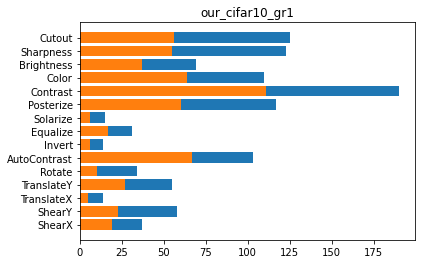

In [17]:
plot_res(our0, "our_cifar10_gr1")

ShearX: 20-28
ShearY: 26-14
TranslateX: 12-13
TranslateY: 32-25
Rotate: 9-20
AutoContrast: 68-53
Invert: 4-8
Equalize: 4-13
Solarize: 16-4
Posterize: 62-45
Contrast: 109-99
Color: 78-69
Brightness: 28-57
Sharpness: 43-55
Cutout: 53-46


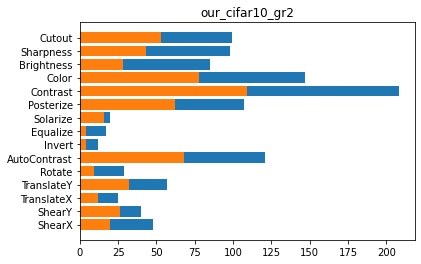

In [18]:
plot_res(our1, "our_cifar10_gr2")

ShearX: 11-11
ShearY: 16-10
TranslateX: 10-5
TranslateY: 6-7
Rotate: 14-3
AutoContrast: 27-22
Invert: 1-6
Equalize: 11-2
Solarize: 8-10
Posterize: 21-19
Contrast: 45-47
Color: 16-55
Brightness: 24-33
Sharpness: 42-20
Cutout: 23-20


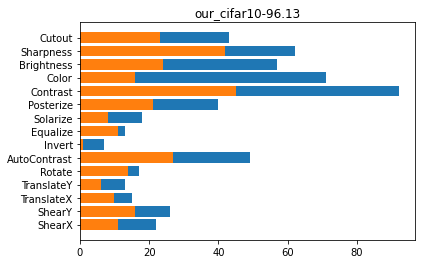

In [26]:
c10 = [[["Sharpness", 0.7733631511063616, 0.5835088489731776], ["Posterize", 0.38275893894837537, 0.32476362766744704]], [["Contrast", 0.2839438744474967, 0.5198189386515051], ["Color", 0.10151033778072749, 0.3998488975106889]], [["Cutout", 0.5785128373365802, 0.5717608158234447], ["Posterize", 0.1747778659890566, 0.3666523390444083]], [["Rotate", 0.10621622078815984, 0.5564948832654203], ["Color", 0.3285867779796173, 0.05179774219743716]], [["TranslateX", 0.5796592110062196, 0.4501307954348166], ["Posterize", 0.19573925613431278, 0.8958891876428263]], [["Sharpness", 0.9105632152983234, 0.7771430693660519], ["Color", 0.39739847444588305, 0.0697100244897204]], [["Contrast", 0.6848736308608232, 0.6549438523974414], ["Color", 0.04183300145441921, 0.48188906651334534]], [["Cutout", 0.7197646057660108, 0.6923677177181606], ["AutoContrast", 0.24539982040031538, 0.006124356948951699]], [["Cutout", 0.15824661101302154, 0.5685409473729416], ["Color", 0.04050316552203638, 0.580901342490994]], [["ShearX", 0.4814463466975354, 0.3574417671916348], ["Posterize", 0.1949002679090357, 0.9601745395175915]], [["Sharpness", 0.9122030046927211, 0.5923887690165257], ["Color", 0.38766369820144303, 0.06419197003686955]], [["Contrast", 0.5171391387900853, 0.657377168686631], ["Color", 0.29598794342933965, 0.2766067032112548]], [["Cutout", 0.6104051769791341, 0.6911059747499957], ["AutoContrast", 0.235054664888692, 0.1393944636849106]], [["Posterize", 0.15162919472987196, 0.5707642645620106], ["Color", 0.09051998242676274, 0.3250901148991251]], [["TranslateX", 0.4737740957723137, 0.5584466447777955], ["Posterize", 0.19391092053131911, 0.9552013397567052]], [["Sharpness", 0.9176224492158626, 0.8035655324767822], ["Color", 0.38980902905782666, 0.313058723049736]], [["Contrast", 0.22445217602218925, 0.6550879706072783], ["AutoContrast", 0.03270865813895288, 0.4844533975933861]], [["Cutout", 0.7371509814536638, 0.8032654460123274], ["AutoContrast", 0.5272857795102492, 0.4867475816692345]], [["Cutout", 0.16511104484594155, 0.3341360703745206], ["TranslateX", 0.022135655624158368, 0.6116993869371519]], [["ShearX", 0.4492032797400358, 0.3299112755659172], ["Posterize", 0.014060771849429249, 0.9495748829696254]], [["Sharpness", 0.8847844215025936, 0.6062840146590117], ["Color", 0.493686999127251, 0.21235432585002123]], [["Contrast", 0.5882917260522089, 0.5356543584655465], ["Color", 0.4302924306375372, 0.1748983660718217]], [["Cutout", 0.2946222490967892, 0.5832147536414868], ["AutoContrast", 0.27374467399203, 0.35131071448581214]], [["Posterize", 0.7873963800994801, 0.424564816873816], ["Color", 0.052059152117002606, 0.40743345525899427]], [["TranslateX", 0.5935336989429005, 0.673762789975591], ["Posterize", 0.24897944121380006, 0.7702826732489448]], [["Brightness", 0.4164206753835894, 0.30280637568844565], ["Color", 0.14580013380926787, 0.03164234004003866]], [["Color", 0.6848129898708563, 0.754056628740541], ["Color", 0.5145737871105366, 0.3090063640611475]], [["Sharpness", 0.38973394158729824, 0.9127616314844006], ["ShearY", 0.021215065489521095, 0.0018212862344145764]], [["Brightness", 0.7438370330417574, 0.5556890157617146], ["Brightness", 0.05323475617208108, 0.3366935654490348]], [["Rotate", 0.5443546821336888, 0.6147441239281574], ["Contrast", 0.3147317832554972, 0.6948685400772687]], [["Sharpness", 0.4896367567935829, 0.626635563297713], ["Color", 0.41005555772235824, 0.17917730675796747]], [["Contrast", 0.5470060457640318, 0.6763745744730791], ["Color", 0.4569580903206883, 0.3165118935522598]], [["Cutout", 0.6814293611832077, 0.5074195788983944], ["AutoContrast", 0.14988243416255706, 0.2012104021452768]], [["Posterize", 0.6683612755666383, 0.5275547155896856], ["Color", 0.28672297308929723, 0.21029358066017598]], [["TranslateX", 0.6178334800308918, 0.6437058285621772], ["Posterize", 0.18640625013650475, 0.9127156111081012]], [["Sharpness", 0.8403634539322627, 0.5365274209867786], ["Color", 0.3698928613643727, 0.12622244424383966]], [["Contrast", 0.6214462506604506, 0.7897190103053056], ["Color", 0.3710349433460254, 0.22599449361572213]], [["Cutout", 0.5303210423014169, 0.6189611221118458], ["AutoContrast", 0.17843911245482463, 0.044603023941740094]], [["Posterize", 0.3331210723627801, 0.5150484462241627], ["Color", 0.18299234237202816, 0.2892710501567831]], [["TranslateX", 0.7115366487344587, 0.5971402496660553], ["Posterize", 0.09732707624423598, 0.9977521416832758]], [["Sharpness", 0.9680859753826657, 0.5385511965451477], ["Color", 0.37902237658591437, 0.18252177219968516]], [["Contrast", 0.5204900369558666, 0.7187231718746895], ["Color", 0.430260230886597, 0.2225954313533694]], [["Cutout", 0.3741089487107712, 0.6198416004263848], ["AutoContrast", 0.0880156129588989, 0.1296973967783955]], [["Posterize", 0.5005868221786896, 0.5212398892608866], ["Color", 0.12697541803221696, 0.2795529714510888]], [["TranslateX", 0.4011474715019082, 0.6081060768422154], ["Posterize", 0.1754786070115708, 0.893091440328501]], [["Sharpness", 0.9087818672761511, 0.7821685403226215], ["Color", 0.47827583661501527, 0.004408060473622841]], [["Contrast", 0.4084649944115263, 0.46218805606482405], ["Color", 0.016798426470825883, 0.6346748977283441]], [["Cutout", 0.9682643228980541, 0.6953687669692089], ["AutoContrast", 0.4201364735563004, 0.39103186870836437]], [["Cutout", 0.15650095156485289, 0.6111348886254456], ["Color", 0.03760772994297401, 0.8508772465405507]], [["ShearX", 0.4847609764287746, 0.35256925218925583], ["Posterize", 0.11176087697204826, 0.9580642877442862]], [["Solarize", 0.31744130990435365, 0.9559860536946045], ["Sharpness", 0.6867481186165626, 0.18104533129079037]], [["ShearY", 0.34272153267077743, 0.5919200053577853], ["Color", 0.7703488449323064, 0.7942911308111138]], [["TranslateX", 0.6307864684857017, 0.4929600325710841], ["Brightness", 0.33194949495034637, 0.47636325743612207]], [["Sharpness", 0.2255548316850029, 0.7581966728644847], ["Sharpness", 0.5447878188947782, 0.6344333301319571]], [["Brightness", 0.010787390994927926, 0.9522467585918071], ["Color", 0.047230628423041085, 0.03619778736249428]], [["Sharpness", 0.5790032747241934, 0.7731717370945868], ["Color", 0.39613652282067396, 0.5080967468073267]], [["Posterize", 0.7071871054436982, 0.5049871045615143], ["Solarize", 0.02484878921659639, 0.8684831817216158]], [["Equalize", 0.09776439535852174, 0.1108197457047792], ["AutoContrast", 0.9078063395249487, 0.40128962236468235]], [["ShearY", 0.2589805901138671, 0.6399261887304811], ["ShearX", 0.24501623351490306, 0.4196245845369904]], [["ShearY", 0.9668649066444067, 0.41521706594960195], ["Brightness", 0.07615327374945435, 0.13388019981569407]], [["Sharpness", 0.46248219227853077, 0.7667033298422989], ["Sharpness", 0.49720800700808165, 0.8279236574922144]], [["ShearY", 0.8294153716165308, 0.5848423529216747], ["Color", 0.8652648825122129, 0.6204764467972653]], [["Equalize", 0.3838921208158593, 0.20977808283710817], ["Brightness", 0.8521512307609443, 0.4207634718299095]], [["Brightness", 0.514272434497148, 0.673696141036578], ["Color", 0.06912647905332928, 0.0706171394239383]], [["AutoContrast", 0.33642950321560616, 0.7474468031563082], ["Cutout", 0.41148866017678726, 0.5830245823830548]], [["TranslateY", 0.2423891897064225, 0.5487896346987744], ["Color", 0.7770085297577313, 0.8148556823336062]], [["Posterize", 0.5056491522886785, 0.7002408930787294], ["Contrast", 0.7976818139556634, 0.6486172242276564]], [["Brightness", 0.8035597177225345, 0.6692425277433716], ["Contrast", 0.2835611977263823, 0.43336201145467695]], [["Brightness", 0.4140580905921563, 0.9586959189678713], ["Color", 0.17134157528920688, 0.6622924822703598]], [["Solarize", 0.3170028662184286, 0.729154058804377], ["Sharpness", 0.5622351829747587, 0.5226632213770612]], [["ShearY", 0.5674211227030895, 0.5856119468658559], ["Color", 0.7557452067551762, 0.7435349163239157]], [["Equalize", 0.29568581313612763, 0.49080046945732136], ["Brightness", 0.38927555953525583, 0.4728326032804831]], [["Sharpness", 0.37403648215603164, 0.6442094988081187], ["Sharpness", 0.562642374833844, 0.654068458873167]], [["Brightness", 0.13484527451095052, 0.6924886569394794], ["Color", 0.0752978498357615, 0.031164338995754673]], [["Sharpness", 0.6870079131838454, 0.6042871989628396], ["Equalize", 0.29820191192005374, 0.6576122586949877]], [["Sharpness", 0.5567401273192124, 0.33181238845708594], ["Posterize", 0.3443589063823885, 0.3645164053237898]], [["Equalize", 0.21654154808951587, 0.3532993527500532], ["AutoContrast", 0.06337814830767911, 0.6713222485495959]], [["ShearY", 0.3733786339342123, 0.5673892766539295], ["AutoContrast", 0.5261053801779711, 0.8045066999650047]], [["Contrast", 0.8185255611860689, 0.562036869375226], ["Brightness", 0.09488428847015681, 0.3624505052552731]], [["AutoContrast", 0.2984751973821831, 0.9174434724711967], ["Sharpness", 0.5089364015663201, 0.8349773882441245]], [["ShearY", 0.8251895630109968, 0.5883309512900511], ["Color", 0.9974827851364315, 0.5542519567917237]], [["Sharpness", 0.3543098875639932, 0.5873403759793655], ["Brightness", 0.8257822971213873, 0.32119984751902986]], [["Sharpness", 0.29412124697312003, 0.5907468395893867], ["Sharpness", 0.47743836182928345, 0.5524639007637275]], [["Brightness", 0.38265141468300773, 0.6009793688177598], ["Color", 0.26812688485602443, 0.06325117245113628]], [["Sharpness", 0.5598946632916568, 0.5935184218578089], ["Color", 0.3435937280320339, 0.8184379266913923]], [["Posterize", 0.7891667493515977, 0.7163791120689833], ["Solarize", 0.014633459469754827, 0.7268088243177647]], [["Equalize", 0.016520605384773818, 0.24245389385918376], ["Posterize", 0.7415489775907711, 0.632377891055583]], [["ShearY", 0.00023428786318890893, 0.6183980116725284], ["ShearX", 0.3127860556473926, 0.30598599622712014]], [["ShearY", 0.8652587024310637, 0.338834482677864], ["Brightness", 0.06418593687321163, 0.16732958272989695]], [["Sharpness", 0.4518050418585622, 0.8528390780816656], ["Color", 0.4229120352370599, 0.7114860302255475]], [["Posterize", 0.6083345201181591, 0.5243384708521476], ["Solarize", 0.0773354404935806, 0.876604274411208]], [["Equalize", 0.15441210703431607, 0.058827859209528294], ["AutoContrast", 0.7011165582461051, 0.4420393147464204]], [["ShearY", 0.17378773058550098, 0.6952125051016178], ["ShearX", 0.3598785351646294, 0.48185852876270996]], [["ShearY", 0.9390145160134832, 0.3512961167989529], ["Brightness", 0.17773776124796076, 0.22114047883576404]], [["Sharpness", 0.7255892455629205, 0.7191497717225667], ["Color", 0.4469293081458638, 0.6906003715649501]], [["Posterize", 0.6082307668474728, 0.7416437777004755], ["Solarize", 0.09389188561802009, 0.7754324612463619]], [["Equalize", 0.23332821321633124, 0.08213352618132466], ["AutoContrast", 0.8101871331003938, 0.3571865404408451]], [["ShearY", 0.056551692467806905, 0.6065892800261433], ["ShearX", 0.26704522091060345, 0.40619521160200206]], [["ShearY", 0.8771889650676722, 0.37674652799676644], ["Brightness", 0.034462414374959935, 0.20849706514692462]], [["Sharpness", 0.8005572196960731, 0.8715976215431699], ["AutoContrast", 0.14200648319580111, 0.6436843064488537]], [["Brightness", 0.5032775037918971, 0.7347338418571498], ["Sharpness", 0.7365969479100468, 0.7731902083777769]], [["Contrast", 0.05144708044352972, 0.7336637230929025], ["ShearX", 0.018149114378257225, 0.253193205367366]], [["Brightness", 0.5463924689416582, 0.2872155140145059], ["AutoContrast", 0.39656701539073463, 0.4307996088032563]], [["ShearX", 0.0927527470127274, 0.942840279958566], ["Rotate", 0.2513177884244545, 0.5191144258584908]], [["AutoContrast", 0.08726906064593545, 0.4115645644411853], ["ShearY", 0.012259934373771958, 0.2460382875554407]], [["TranslateY", 0.5644255048886088, 0.5194055360345985], ["Posterize", 0.31595796231371337, 0.9738870130011805]], [["Rotate", 0.007182406284515538, 0.6923967129062877], ["Sharpness", 0.36958768016651167, 0.9638594979547315]], [["Equalize", 0.3665811452949408, 0.8062360405583552], ["Contrast", 0.8649666775402186, 0.45228210344620307]], [["Rotate", 0.021956720506818045, 0.7955311996447849], ["Brightness", 0.04487636574062162, 0.6982471041878201]], [["AutoContrast", 0.4019555475603838, 0.6126324868520597], ["ShearY", 0.08625270100078532, 0.604004134205353]], [["ShearY", 0.05051978693290421, 0.39488676365525455], ["Color", 0.4890856284207914, 0.7865565423920193]], [["Rotate", 0.12286575897910533, 0.6732451248343015], ["Contrast", 0.36003853630451554, 0.5924690776496986]], [["Color", 0.24821461189653798, 0.6293929257699715], ["Contrast", 0.18289996866123562, 0.6680615630013377]], [["Rotate", 0.13441988294311175, 0.6679441156823638], ["Cutout", 0.6499930844431354, 0.710961003080705]], [["AutoContrast", 0.6261080102792485, 0.46428228511521485], ["Sharpness", 0.058496550352917176, 0.7998173427477808]], [["TranslateY", 0.002992226798121611, 0.8068046916474787], ["AutoContrast", 0.3692440635555322, 0.8951167691603958]], [["Solarize", 0.12215179025026571, 0.7900749525226383], ["Contrast", 0.4548335703954058, 0.7544809414300432]], [["AutoContrast", 0.4790024732973626, 0.10134503622375945], ["Contrast", 0.506511804418148, 0.41396136657717375]], [["ShearX", 0.20207932890220798, 0.9705929849034001], ["Sharpness", 0.6207766002701414, 0.8999458131069228]], [["AutoContrast", 0.6264721929295904, 0.4580090121619392], ["Cutout", 0.06440953049170355, 0.7759588331329232]], [["TranslateY", 0.4455272601432674, 0.570137228389491], ["AutoContrast", 0.4211199810662496, 0.8835652279345757]], [["Solarize", 0.11777033748550375, 0.7840136678872798], ["Contrast", 0.4602840705227584, 0.7422567081212861]], [["AutoContrast", 0.474364919329043, 0.3345482371248504], ["Contrast", 0.2032280369836202, 0.41014675920966637]], [["ShearX", 0.1999004047541449, 0.9355497727459944], ["Contrast", 0.5867635572599212, 0.8928759818598]], [["AutoContrast", 0.9997392054105405, 0.703491742511357], ["Brightness", 0.07718040162469467, 0.7357228694039266]], [["Rotate", 0.561569001253297, 0.44094941831260587], ["Color", 0.6687276790264355, 0.8040732019838108]], [["Posterize", 0.2526618042324824, 0.7361679965316363], ["ShearX", 0.3554899916757521, 0.29706981730661713]], [["Color", 0.205516267083164, 0.6345224161191485], ["Brightness", 0.05539145661866435, 0.5182819322801286]], [["Rotate", 0.10146568871519479, 0.8753629282741398], ["Brightness", 0.7059894340111443, 0.5211422480715474]], [["AutoContrast", 0.453135914184867, 0.7068647436228679], ["Brightness", 0.022929638467756662, 0.7341259656048529]], [["TranslateX", 0.5078414653653565, 0.4099114722071344], ["Color", 0.6091727836705467, 0.8031608347362028]], [["Posterize", 0.063716153536536, 0.717955301260207], ["ShearX", 0.3453881715591123, 0.4185187208735961]], [["Color", 0.21225890029847883, 0.6511735627568539], ["Brightness", 0.07295418847456331, 0.5205524051208006]], [["Rotate", 0.10368500088017979, 0.8912113333260983], ["Brightness", 0.6998196076999827, 0.5161836225134837]], [["Sharpness", 0.5134861780633957, 0.21516697537453577], ["Cutout", 0.22068381495226325, 0.6478179673596856]], [["TranslateX", 0.45990726173767116, 0.39326245491764883], ["Rotate", 0.058328481106504154, 0.72834111249401]], [["Invert", 0.06847280688072008, 0.17917898619374686], ["Solarize", 0.014536184213896096, 0.44764215348673014]], [["AutoContrast", 0.7303979681743442, 0.4683995997391758], ["Sharpness", 0.2068296326717275, 0.6031398951758661]], [["TranslateX", 0.2621658169128389, 0.5818378900703396], ["Contrast", 0.44659080590440137, 0.44162644935054485]], [["AutoContrast", 0.42645114235623915, 0.6293168451300433], ["ShearY", 0.05466919030411616, 0.5975341176758232]], [["ShearY", 0.021160310914706326, 0.545234665930874], ["Color", 0.6496423453344485, 0.6324687816940021]], [["Rotate", 0.0012131491331637545, 0.6126298812823616], ["Contrast", 0.3789344257392475, 0.702683848354483]], [["Color", 0.16257966075551433, 0.6581150590943203], ["Contrast", 0.021624415829597482, 0.5415931183054448]], [["Rotate", 0.24714849666994165, 0.7920855667668572], ["Cutout", 0.7480922018538793, 0.6502015166813612]], [["AutoContrast", 0.4458236142909897, 0.6193299620087664], ["ShearY", 0.10085462871553405, 0.6044228565815521]], [["ShearY", 0.08456731386301947, 0.5159377692612592], ["Color", 0.49520742078151064, 0.8010732738612227]], [["Rotate", 0.12844767720961897, 0.6633777024256169], ["Contrast", 0.35589351270018915, 0.7252171345211166]], [["Color", 0.26505886649848504, 0.6524006991593139], ["Contrast", 0.18019967630508885, 0.6156729711158633]], [["Rotate", 0.13931646021917055, 0.7905364088937789], ["Cutout", 0.6465835509294349, 0.6984303939916416]], [["Brightness", 0.18007732088543837, 0.8655865864628083], ["Sharpness", 0.1818466639051181, 0.5100932869308782]], [["Solarize", 0.2826133725431171, 0.9986707548085579], ["Contrast", 0.1760937614519051, 0.9080224524965876]], [["Sharpness", 0.06800919840335912, 0.20669778316648868], ["Cutout", 0.19532700670502126, 0.8148387663010606]], [["Color", 0.5577887838936354, 0.26450630925715823], ["ShearY", 0.6595561289049735, 0.6720882573112571]], [["AutoContrast", 0.8510676457786084, 0.6605960718934], ["Color", 0.6996762273047142, 0.7960726321900129]], [["Posterize", 0.4175962662455445, 0.6942822879015073], ["Rotate", 0.08241251661543914, 0.39377901632178336]], [["Sharpness", 0.6565753300051301, 0.8325500619303701], ["Cutout", 0.2537966756898076, 0.6996554113785347]], [["Sharpness", 0.20861298772200282, 0.5376597792672007], ["TranslateY", 0.6240423956596023, 0.39663137100104173]], [["Color", 0.6523582759415887, 0.7260196777887089], ["AutoContrast", 0.7255233913974042, 0.3013205214540859]], [["Cutout", 0.9801836327615534, 0.7487372744029652], ["Color", 0.778934139709574, 0.8574297163133044]], [["Equalize", 0.16453877060837352, 0.9407615821937318], ["ShearY", 0.8043106151264419, 0.49859140405578983]], [["Solarize", 0.06018015548083491, 0.7489164901271428], ["Brightness", 0.27919196549831427, 0.7558668757823827]], [["Brightness", 0.10631869798584698, 0.11442540281416466], ["Sharpness", 0.45571482287339093, 0.5105436310772452]], [["Sharpness", 0.4223452577840665, 0.1508488722976895], ["ShearY", 0.6541158149331567, 0.4781829981705097]], [["AutoContrast", 0.7847906865039802, 0.19914072568960955], ["Color", 0.3579894872184249, 0.7851205954216005]], [["Brightness", 0.17500110078907954, 0.9594568392344817], ["Sharpness", 0.14711136357832064, 0.4983182287883346]], [["Solarize", 0.2747273717941685, 0.9475722491081453], ["Contrast", 0.17428372038862044, 0.9059844704504526]], [["Sharpness", 0.06907918240410477, 0.21926773291128399], ["Cutout", 0.25750738245827587, 0.8099899716161894]], [["Color", 0.5730255191132537, 0.2337203345471629], ["ShearY", 0.7229887401773828, 0.651810017473317]], [["AutoContrast", 0.8949396643794469, 0.6892155760753396], ["Color", 0.7007956463227558, 0.7723327542538785]], [["Brightness", 0.6393934554318287, 0.7281840348665514], ["AutoContrast", 0.10721548348926721, 0.6030665083984158]], [["Sharpness", 0.6191297205277132, 0.7084855324311329], ["Contrast", 0.8071975758277381, 0.42505077833041366]], [["Equalize", 0.3974308473661565, 0.5639902999131687], ["Brightness", 0.5664071074833532, 0.30846980003384794]], [["Color", 0.890378793303955, 0.510234235113976], ["Posterize", 0.9213628803987957, 0.6274438516253527]], [["Cutout", 0.6587403962630156, 0.6583176854270089], ["Posterize", 0.6404562125612091, 0.9993533085423939]], [["Brightness", 0.3940454476030899, 0.35600156994276555], ["Cutout", 0.3145119229089558, 0.1354667950094403]], [["AutoContrast", 0.2502919215008518, 0.3441188842895708], ["TranslateX", 0.13406967668317915, 0.8106887867826046]], [["AutoContrast", 0.17367555799982703, 0.09895561530904066], ["Brightness", 0.0053997953847037955, 0.6287899131110455]], [["Contrast", 0.13788993470343258, 0.19653294342088823], ["Brightness", 0.7003182916522552, 0.7516374410804985]], [["Contrast", 0.7764065134230773, 0.8220187545553572], ["Cutout", 0.8849258313791424, 0.1347278199970285]], [["Brightness", 0.5610684173101503, 0.6107855565075965], ["AutoContrast", 0.11372618556009054, 0.61008832762091]], [["Sharpness", 0.5289856749246229, 0.6989314935365591], ["Contrast", 0.5404842566291502, 0.40775802187782223]], [["Equalize", 0.3540535457621885, 0.45327403814923956], ["Brightness", 0.540112342636699, 0.42062244586902625]], [["Color", 0.8798825139596125, 0.5081508460257764], ["Posterize", 0.8248111668682132, 0.624714094876766]], [["Cutout", 0.6504448272903427, 0.6117363519903345], ["Posterize", 0.6464649447253954, 0.9986638008096393]], [["Brightness", 0.33722099053338844, 0.3994633170430902], ["Cutout", 0.3765911922669886, 0.008801344316950455]], [["AutoContrast", 0.2831128624557174, 0.2306453964002132], ["TranslateX", 0.3308136805544201, 0.6508383729109357]], [["AutoContrast", 0.06740754740489156, 0.13618584990779292], ["Brightness", 0.03217301054057992, 0.5628844996050707]], [["Contrast", 0.3539926723151107, 0.3574948070502445], ["Brightness", 0.6270440818820382, 0.7686243271874731]], [["Contrast", 0.8307373501916434, 0.8457187177945025], ["Cutout", 0.937738076458074, 0.36406080812582997]], [["Brightness", 0.1654994788326815, 0.9154375813226514], ["Sharpness", 0.0802634871337149, 0.739269035555205]], [["Solarize", 0.4287849889493688, 0.9350010210631794], ["Contrast", 0.17336751274161993, 0.9557777388268462]], [["ShearX", 0.06703238986535134, 0.37656585336871096], ["Brightness", 0.05243760649242235, 0.5915573062554128]], [["Color", 0.8194969510409391, 0.25792817668064394], ["ShearY", 0.9101514228380683, 0.4400235065822032]], [["AutoContrast", 0.12964151309285943, 0.6705311029454564], ["AutoContrast", 0.7233443022999586, 0.4669790471493966]], [["Brightness", 0.35704536467499326, 0.5050420040596231], ["Cutout", 0.544310038418512, 0.1105312307243308]], [["AutoContrast", 0.21284849952066262, 0.13583625376255928], ["TranslateX", 0.3522423237500568, 0.6250607305284255]], [["AutoContrast", 0.06254412591478514, 0.15650870364114644], ["Brightness", 0.150838298716162, 0.3927615029609254]], [["Contrast", 0.45634685998179364, 0.2788520394394104], ["Brightness", 0.5888580107448194, 0.8580796309312566]], [["AutoContrast", 0.8540545077657132, 0.9800917341666531], ["Cutout", 0.9579651742282884, 0.19672732092978518]], [["Sharpness", 0.43060978540734296, 0.36421739563248595], ["Color", 0.28486317578651954, 0.4879038398995193]], [["Sharpness", 0.03561539947585818, 0.2716344213353503], ["Sharpness", 0.5545206427400156, 0.5556286021287818]], [["Cutout", 0.2810407170240233, 0.2909969319428893], ["Solarize", 0.02138820887580234, 0.16249812006186032]], [["Brightness", 0.7301432053829005, 0.5124772673135376], ["TranslateY", 0.4011569854009659, 0.47302960198669164]], [["AutoContrast", 0.825981065216798, 0.29456873792095994], ["Cutout", 0.8678216264916037, 0.04848795282324342]], [["Sharpness", 0.2425312926503638, 0.6979821382135105], ["Color", 0.23075236504835303, 0.7264363663886856]], [["Sharpness", 0.015370058557645047, 0.15734781296754566], ["Sharpness", 0.4793453326988738, 0.6127886248712692]], [["Cutout", 0.24029822933034367, 0.3201592364488964], ["Solarize", 0.1121977654887015, 0.06820588381537104]], [["Brightness", 0.550929597259431, 0.5319472939311289], ["TranslateY", 0.27906359443918966, 0.4269119243681561]], [["AutoContrast", 0.9658481807205812, 0.2956180409941136], ["Color", 0.8167908083552773, 0.7416184334678433]], [["Sharpness", 0.27695122782703613, 0.3618458411095901], ["Contrast", 0.5215262585113634, 0.5669594102134552]], [["Sharpness", 0.04591169805569473, 0.2908938358609005], ["Sharpness", 0.5467626666491111, 0.5544333080161795]], [["Cutout", 0.15166568906315958, 0.2809955766052299], ["Solarize", 0.02302842044624498, 0.012353261223804576]], [["Brightness", 0.5161030112364441, 0.3230802375771191], ["TranslateY", 0.39012358934442243, 0.39083234806536427]], [["AutoContrast", 0.872508785123922, 0.12833882759034604], ["Cutout", 0.9629231450081089, 0.720034046293082]], [["Contrast", 0.30553177973594825, 0.3553841144010416], ["Cutout", 0.11608415246801068, 0.37537600422064327]], [["Posterize", 0.134216891000223, 0.2700554123191801], ["Equalize", 0.022318840322965938, 0.27966658292350965]], [["Sharpness", 0.44441807751301826, 0.5338559114756289], ["Posterize", 0.3051257500806447, 0.28296379860382515]], [["Brightness", 0.7095986348522983, 0.3052165331657416], ["TranslateY", 0.45056051554157495, 0.3583532887421048]], [["ShearX", 0.1736534940237228, 0.26716339164251907], ["Color", 0.9973156960500259, 0.4714641557292053]], [["Sharpness", 0.3352776107266863, 0.14664892024647153], ["ShearX", 0.16934083447920364, 0.6212456156099591]], [["Color", 0.4377764424461056, 0.7993696978048129], ["Invert", 0.10444407750441655, 0.49280299831740787]], [["Cutout", 0.20440162259243372, 0.4488759400326302], ["Invert", 0.0015130551408677473, 0.13121898087838424]], [["Posterize", 0.9407934962612969, 0.9967810592012072], ["Contrast", 0.2721820770956222, 0.6083577133943652]], [["ShearX", 0.5197479186219618, 0.47589323860239974], ["Brightness", 0.9462110716507836, 0.5332038318466914]], [["Sharpness", 0.30810148252121256, 0.5075125817073816], ["ShearX", 0.10786923254191483, 0.5170827643276714]], [["Color", 0.302158769488801, 0.2605678301148101], ["Invert", 0.15507086115469748, 0.5016871667081756]], [["Cutout", 0.31407816487778906, 0.6347159818805768], ["ShearX", 0.1132566547588304, 0.24461497524984127]], [["Posterize", 0.9185047178988135, 0.6803310620135925], ["Brightness", 0.2667807416200677, 0.6070039152782627]], [["ShearX", 0.6830663490150927, 0.28037040942814767], ["Brightness", 0.9522588445377602, 0.5694419672940866]], [["Brightness", 0.4686648893199743, 0.3415328568398941], ["TranslateY", 0.13401669736811397, 0.17055639287182137]], [["Posterize", 0.3356647528297826, 0.563986992032733], ["Cutout", 0.8960594637202686, 0.514469542746842]], [["TranslateY", 0.8667885786391749, 0.6483580406589489], ["Sharpness", 0.46578473638662804, 0.575793961199446]], [["Cutout", 0.4989180430594227, 0.391159039300767], ["Cutout", 0.5143319204843573, 0.2657600469765024]], [["Sharpness", 0.5381942814599951, 0.531668042369835], ["Color", 0.03623147906741829, 0.6516325775536536]], [["Color", 0.5733151303405324, 0.8400892744243111], ["Solarize", 0.2039604738969441, 0.8067221685406898]], [["Cutout", 0.0823527705165864, 0.9748750660634491], ["Invert", 0.07275893210083775, 0.47235695862472976]], [["Posterize", 0.8029036225782227, 0.7146006085786272], ["Contrast", 0.21336480919564949, 0.7148260138477128]], [["Contrast", 0.4283496617787398, 0.24813399236495395], ["Brightness", 0.7139475949573361, 0.7615021980483898]], [["Sharpness", 0.19930903049732102, 0.4835801450143078], ["ShearX", 0.23844879458631307, 0.49348302675090167]], [["Color", 0.5000959785771215, 0.7123405419964179], ["Invert", 0.27366691177157737, 0.4967847285278431]], [["Cutout", 0.13856542815037268, 0.49270777894304585], ["Invert", 0.017549892283932556, 0.18724690745530664]], [["Posterize", 0.8917273234921, 0.875502003044557], ["Contrast", 0.1313488097326754, 0.6270837183722815]], [["ShearX", 0.7215554271116394, 0.3646719459078025], ["Brightness", 0.9701456192105502, 0.6104769458565967]], [["TranslateY", 0.212868528261146, 0.4285486857767136], ["TranslateX", 0.1906808536039355, 0.5817588677525976]], [["Sharpness", 0.2840113798374483, 0.432664716760187], ["Solarize", 0.030404858073525373, 0.5425998036987252]], [["Posterize", 0.3157491885671817, 0.3752419971715142], ["TranslateY", 0.24352642703906482, 0.26096234550460695]], [["Posterize", 0.8132826037194217, 0.4232199876354854], ["Brightness", 0.17620825774300675, 0.525902304218009]], [["Rotate", 0.6777520703991002, 0.6513279986040259], ["Color", 0.7318296255676783, 0.44488324356459713]]]
plot_res(c10, "our_cifar10-96.13")

ShearX: 2-19
ShearY: 8-1
TranslateX: 9-13
TranslateY: 3-11
Rotate: 5-15
AutoContrast: 47-22
Invert: 2-9
Equalize: 5-18
Solarize: 1-4
Posterize: 42-33
Contrast: 61-35
Color: 11-25
Brightness: 24-7
Sharpness: 26-15
Cutout: 48-42


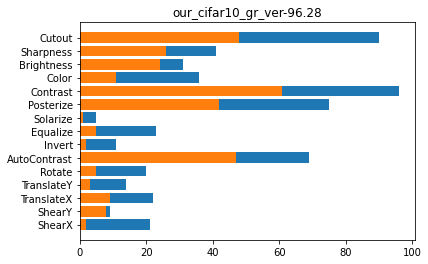

In [27]:
c10_gr1 = {"0": [[["Posterize", 0.8022498204466146, 0.9995146716827868], ["Posterize", 0.44068690585244374, 0.4902485826538048]], [["Sharpness", 0.17665643457524063, 0.7929470028405088], ["Sharpness", 0.8393659372845153, 0.8645685787088236]], [["ShearY", 0.8184703853818462, 0.5275495664066501], ["Color", 0.734305920791228, 0.1464039360048663]], [["Posterize", 0.5425294345498115, 0.7306418900733478], ["TranslateX", 0.8915269161170779, 0.5389962363145352]], [["Posterize", 0.8897618627420198, 0.10383794063257804], ["Posterize", 0.246512168682738, 0.5093828891109743]], [["Sharpness", 0.11442543077544332, 0.8229013666843081], ["Sharpness", 0.9293042477672319, 0.9820622836748304]], [["AutoContrast", 0.6285499241163952, 0.08325303170003906], ["Posterize", 0.9039272200338097, 0.7842434776977588]], [["ShearY", 0.2533438178400196, 0.5067639424737453], ["Color", 0.24973203289181686, 0.054640295601881925]], [["Posterize", 0.7033134133347771, 0.5637021043316313], ["TranslateX", 0.9944840039047813, 0.5124172491063417]], [["Posterize", 0.9131133766617262, 0.09575961299368263], ["Posterize", 0.26792876929987264, 0.40278180072199066]], [["Sharpness", 0.16563455676016367, 0.7238668809006769], ["Sharpness", 0.9618338998889991, 0.8936661178408253]], [["AutoContrast", 0.5685228639243138, 0.012177015673040859], ["Posterize", 0.7662107165873921, 0.7428989305630229]], [["ShearY", 0.27484505947078275, 0.5000589054982671], ["Color", 0.49957694682759013, 0.15495093282857006]], [["Posterize", 0.6520554324137536, 0.5589886467069457], ["TranslateX", 0.9762520627611287, 0.5326485144629398]], [["AutoContrast", 0.4085744253171526, 0.23255656504718242], ["AutoContrast", 0.35736822283307157, 0.970521369787628]], [["Rotate", 0.06766236251153712, 0.6749875861681067], ["Cutout", 0.7674343874747671, 0.08752368359579987]], [["Cutout", 0.19046369291085574, 0.8486411167150335], ["Contrast", 0.3882166370239914, 0.44818910646556964]], [["AutoContrast", 0.7984594594193161, 0.3032248308254294], ["Posterize", 0.9334539612878583, 0.7217466126491914]], [["Rotate", 0.5897163872061224, 0.5123639359503529], ["Brightness", 0.29184478197550207, 0.5378318157615187]], [["Posterize", 0.794123079742453, 0.22056045719167652], ["Posterize", 0.5523048087182636, 0.4931325063073483]], [["Sharpness", 0.17310747148795042, 0.79456712567363], ["Sharpness", 0.8314994800939991, 0.8630906378772043]], [["AutoContrast", 0.5876704371355836, 0.260083868185955], ["Posterize", 0.6928577182909592, 0.46300612829060606]], [["ShearY", 0.8312199494537504, 0.5284528568770759], ["Color", 0.7395148334927495, 0.17542700026240043]], [["Posterize", 0.5217330744259008, 0.5571885919947466], ["TranslateX", 0.9254264240929893, 0.5329859228181268]], [["Posterize", 0.9540604404677318, 0.08252769107805905], ["Posterize", 0.26974514909198893, 0.39816376235436995]], [["Sharpness", 0.09027720686322974, 0.7333867143938083], ["Sharpness", 0.9548573182125774, 0.9069762811075017]], [["AutoContrast", 0.5684384967669744, 0.021276503292273485], ["Posterize", 0.7657457957952872, 0.9609018984642478]], [["ShearY", 0.2998286112377239, 0.5688859771828665], ["Color", 0.48892565071240635, 0.14509632073098416]], [["Posterize", 0.6532744593984742, 0.6245501111213825], ["TranslateX", 0.9813300145761006, 0.5549868639763432]], [["Posterize", 0.9141351680473622, 0.05966035750005527], ["Posterize", 0.5838774852618108, 0.22377341095627196]], [["Sharpness", 0.02897473007373219, 0.6971995428929048], ["Sharpness", 0.5558483127896445, 0.8029236501219466]], [["ShearY", 0.8857015061471398, 0.4697261650705957], ["Color", 0.7251991684240664, 0.2578071110990766]], [["Posterize", 0.44653567859822363, 0.8400416635927902], ["TranslateX", 0.26945682957561545, 0.6195437254311633]], [["Cutout", 0.5393324788939454, 0.35115647659247423], ["Posterize", 0.6344622384853655, 0.6450804806221659]], [["AutoContrast", 0.2930575269557627, 0.9664575898389497], ["AutoContrast", 0.5274163877037588, 0.6731504226106695]], [["Color", 0.14419216039596153, 0.32812997998918086], ["Brightness", 0.6817589063443141, 0.29081334112600055]], [["Sharpness", 0.8734768963825307, 0.15512478348969994], ["Contrast", 0.8277758971831273, 0.49493636150777226]], [["Posterize", 0.9962099833275166, 0.6732672779756994], ["Color", 0.08654558538120433, 0.2834032380619854]], [["Posterize", 0.9935920403199899, 0.22183238116787324], ["Posterize", 0.22366859504420933, 0.3718415157187921]], [["Sharpness", 0.25325133874010347, 0.6785083119580555], ["Sharpness", 0.9691042055817622, 0.9308988190325453]], [["AutoContrast", 0.5876239605854405, 0.1522887234119422], ["Posterize", 0.7615670960767441, 0.4346606012240344]], [["ShearY", 0.11805092550392299, 0.5960698905467714], ["Color", 0.4538360227520603, 0.1890186401009959]], [["Posterize", 0.5673927983905401, 0.701631359778138], ["TranslateX", 0.972817634599572, 0.4478216412351961]], [["Contrast", 0.13301351785623775, 0.5811214566237559], ["Cutout", 0.1559385911105996, 0.8212329487272061]], [["Color", 0.4255128462339569, 0.8414364204427118], ["TranslateX", 0.8090534990604654, 0.35044486669248315]], [["TranslateX", 0.045865959881216, 0.6652374063537432], ["Cutout", 0.4320974619234529, 0.5800149749256692]], [["Brightness", 0.7921121901352439, 0.6862359636625115], ["Solarize", 0.9773766469703932, 0.9964133771177223]], [["Cutout", 0.9455633197682765, 0.7419805784089929], ["ShearX", 0.6384102461867437, 0.5116896140917679]], [["Brightness", 0.03636096687565857, 0.9509216184947942], ["Solarize", 0.026618815547610863, 0.23485595698718742]], [["Color", 0.729914506797059, 0.7840407879683323], ["ShearX", 0.06547108140444237, 0.0007233570647369458]], [["AutoContrast", 0.897752152190257, 0.5406259237843454], ["AutoContrast", 0.09014438071021377, 0.5027973745415039]], [["Brightness", 0.8805001704300088, 0.6874720898866998], ["Posterize", 0.4301745960278968, 0.06856541969967805]], [["Cutout", 0.26386450900071495, 0.39563783602758673], ["Cutout", 0.26895179324145724, 0.8260985463945046]], [["Brightness", 0.21691428894818424, 0.9440016640906628], ["Equalize", 0.37690339685214624, 0.18975187787185285]], [["Sharpness", 0.49240896947516577, 0.930457980631819], ["ShearX", 0.06264626882506773, 0.10309472030739114]], [["AutoContrast", 0.4797339887767528, 0.5932672586177674], ["AutoContrast", 0.1201300096566709, 0.7034314714918608]], [["Brightness", 0.582888869280268, 0.5332185403633121], ["Posterize", 0.6048794457125881, 0.09826618564528691]], [["Posterize", 0.4669990867877605, 0.28750752647648187], ["Color", 0.093611400793715, 0.7652055002659043]], [["Brightness", 0.04959031083089435, 0.9531363274045191], ["Color", 0.18628629602048608, 0.31790500545233125]], [["Color", 0.9634774467101079, 0.6239456324888358], ["ShearX", 0.021898762043379705, 0.08208825423720444]], [["AutoContrast", 0.8377249066012961, 0.3824651858766351], ["Color", 0.17686595899203428, 0.4303375218561689]], [["TranslateX", 0.9940617792484722, 0.6085522078336613], ["Posterize", 0.7144846603903471, 0.020711173781949515]], [["Cutout", 0.0987790925963988, 0.41546421547552753], ["Cutout", 0.19502613587717216, 0.7849178473785846]], [["Brightness", 0.22456106407079565, 0.9840345764267946], ["Equalize", 0.08180381214170723, 0.19357144925570713]], [["Sharpness", 0.4952087029718208, 0.9374239223738058], ["ShearX", 0.13402650989442907, 0.13261445256118318]], [["AutoContrast", 0.8904757821925209, 0.8959632823759976], ["Sharpness", 0.23742044465032133, 0.543655799550429]], [["Brightness", 0.9549763335301326, 0.6200001347091738], ["Posterize", 0.6550594306627227, 0.08507932171912289]], [["Posterize", 0.3886194549509515, 0.44872818890796606], ["Color", 0.14409448935704544, 0.8473682514054637]], [["Brightness", 0.13342591519822694, 0.9437961382816455], ["Equalize", 0.1456189165366167, 0.08193000249323326]], [["Color", 0.9105468771855079, 0.9802033536837053], ["ShearX", 0.03167499102928005, 0.1300513887813397]], [["AutoContrast", 0.8739927233787679, 0.39097898008247395], ["Color", 0.14370270842716193, 0.437631119859492]], [["Brightness", 0.9989364443208345, 0.5715896857522005], ["Posterize", 0.7115364627417373, 0.02709253468969266]], [["Cutout", 0.22599713728600332, 0.4218584463897893], ["Cutout", 0.18930477307118646, 0.9203079567085358]], [["Rotate", 0.21556266637441415, 0.5406388269635171], ["Equalize", 0.4335299485635536, 0.11296345852567129]], [["Sharpness", 0.344642397850607, 0.9932519332807701], ["Posterize", 0.12532826555254825, 0.1772504951076208]], [["AutoContrast", 0.12070239835744263, 0.6546253065909236], ["AutoContrast", 0.061921589898246726, 0.7443586436136336]], [["Brightness", 0.5801076659428299, 0.6251436197933071], ["Posterize", 0.11263472461310953, 0.2838028766678355]], [["Posterize", 0.5851365229053196, 0.131346486302025], ["Color", 0.10781022299731956, 0.9121708448114482]], [["Brightness", 0.022592736976205507, 0.9818633030244528], ["Solarize", 0.06047485625421921, 0.152811790677686]], [["Color", 0.6866100813506127, 0.814749934334673], ["ShearX", 0.047626220734896696, 0.008934507706375133]], [["AutoContrast", 0.7092008533087929, 0.48993180130295033], ["AutoContrast", 0.27933675764960775, 0.5131876914967218]], [["Brightness", 0.7622314817834616, 0.9007985671248888], ["Posterize", 0.6171299316536998, 0.03344446586442887]], [["Cutout", 0.285495698169033, 0.19804938800465438], ["Cutout", 0.16708051886928943, 0.9322829784967563]], [["Brightness", 0.2420281881416088, 0.7281447792704234], ["Equalize", 0.061482415091096754, 0.11441217115653204]], [["Sharpness", 0.7012702017923099, 0.8565486117336751], ["Color", 0.14970721903879491, 0.20195840908058396]], [["Equalize", 0.8408670652353635, 0.32745610309242446], ["AutoContrast", 0.48350435264389, 0.5341486656052697]], [["AutoContrast", 0.6781488525716142, 0.9171348261789939], ["Posterize", 0.7519946917308971, 0.190367197337306]], [["Invert", 0.010891784911024383, 0.31014686432824284], ["Color", 0.20406599422798072, 0.7005563961723303]], [["Brightness", 0.03660602766705223, 0.9555471048453925], ["Solarize", 0.15311335570514362, 0.14727373088682016]], [["Color", 0.9294396622713135, 0.8127549282273021], ["ShearX", 0.0372214618888478, 0.0004081145118092766]], [["AutoContrast", 0.7213982258523873, 0.6330775270786683], ["AutoContrast", 0.12581374614496682, 0.6026731746291542]], [["Brightness", 0.7703854122486251, 0.692805946745487], ["Posterize", 0.6132412826085822, 0.026277303969314103]], [["Cutout", 0.28651852607976136, 0.150983174797924], ["Cutout", 0.17774278925637782, 0.9239826580508501]], [["TranslateX", 0.17272785934492824, 0.7624004187723229], ["Equalize", 0.543638634241694, 0.09855764657235618]], [["Sharpness", 0.3270608190131264, 0.8889119625115445], ["Posterize", 0.36591844902780307, 0.14830359368053667]], [["Color", 0.14620951378190503, 0.6740676486814188], ["AutoContrast", 0.03400176797971664, 0.8288627843509835]], [["Cutout", 0.6066263231046198, 0.059691858731652836], ["Brightness", 0.08060204178769495, 0.1434927191583404]], [["Posterize", 0.3875313825954039, 0.06002788795335841], ["Color", 0.0845465304379568, 0.7678045937582444]], [["Brightness", 0.41652086195517213, 0.40828230204124283], ["ShearY", 0.040385899812612626, 0.03213187969934908]], [["Cutout", 0.17042116006928504, 0.8683552564853511], ["Posterize", 0.5350284101125854, 0.4893049256327959]], [["Invert", 0.22666167006807805, 0.35396636258657543], ["AutoContrast", 0.6325677887844042, 0.38304997341230274]], [["Posterize", 0.4453020232120629, 0.7972107341259476], ["Rotate", 0.0007318901821037338, 0.2769727374166513]], [["TranslateY", 0.0571281555492047, 0.7476515603664972], ["Equalize", 0.19537836272887474, 0.9466698204753009]], [["Posterize", 0.581644905607388, 0.19717285125983347], ["Rotate", 0.8796167106733647, 0.47312254499733747]], [["Posterize", 0.4201609195728471, 0.4554848003047572], ["Posterize", 0.44199965081169923, 0.3936823188235179]], [["AutoContrast", 0.08703471591315648, 0.9307749353935422], ["Equalize", 0.036474517582404456, 0.7396996358961364]], [["Equalize", 0.3128025385990335, 0.895685512664242], ["Cutout", 0.09472409578979452, 0.06668779816923284]], [["Contrast", 0.7206290987832674, 0.8351066358177218], ["AutoContrast", 0.05799013769571895, 0.05493071465486801]], [["Cutout", 0.3800460016928334, 0.9171519077551559], ["Brightness", 0.7760863017881483, 0.4292159532818953]], [["Equalize", 0.35324826119964364, 0.309512626822166], ["TranslateY", 0.8457000564141074, 0.5389723041651806]], [["Color", 0.8738457377165997, 0.7451833524133552], ["Color", 0.7014175371439183, 0.37047705571170364]], [["AutoContrast", 0.4616336399716167, 0.7675236110540858], ["ShearX", 0.5136949058271392, 0.5128210496811516]], [["TranslateX", 0.10902383706577529, 0.5841588839845279], ["Equalize", 0.019901272280863205, 0.9957868520659678]], [["Posterize", 0.6668516018690847, 0.30026169056583935], ["Rotate", 0.9374367821217979, 0.4454643253323928]], [["Posterize", 0.4492838307939936, 0.08279839637656357], ["Posterize", 0.39706809236536544, 0.30680427198386606]], [["AutoContrast", 0.07070879463632052, 0.9071243130168691], ["Equalize", 0.033532423040544046, 0.7865380459519575]], [["Cutout", 0.4658145443714599, 0.8151385094812807], ["Cutout", 0.10845336407524314, 0.06212057307730319]], [["TranslateX", 0.08696088945561009, 0.45896393740758146], ["Equalize", 0.10548121651384817, 0.999261179048609]], [["Posterize", 0.4169603949399458, 0.12339148954227325], ["Rotate", 0.7584110919865488, 0.5367085240672698]], [["Posterize", 0.5837700492183233, 0.14557932913900268], ["AutoContrast", 0.3007203862632382, 0.19259847004109576]], [["AutoContrast", 0.14626240828313547, 0.837949865404795], ["Equalize", 0.11263802290706307, 0.6265860424910041]], [["Cutout", 0.39345751001465135, 0.6999496891420837], ["Brightness", 0.0818089645929174, 0.020657887014728385]], [["TranslateX", 0.11500562290108797, 0.2725427624922896], ["Cutout", 0.21324982189820432, 0.9916822969730246]], [["Posterize", 0.8847225067328832, 0.30319565018940997], ["Contrast", 0.37794023568564217, 0.48624772093003826]], [["Posterize", 0.681031798340241, 0.1409585791597538], ["AutoContrast", 0.18557083662483254, 0.15059278059748607]], [["Solarize", 0.15920262432072832, 0.8953123007219259], ["Brightness", 0.12454035296230521, 0.8549604308422191]], [["Sharpness", 0.4953547531944988, 0.7826671961118705], ["Contrast", 0.1934478451627119, 0.4669869090908864]], [["ShearX", 0.45959104948604446, 0.5592268279495176], ["Equalize", 0.07535564311901657, 0.9312339193527535]], [["Cutout", 0.037489647558529376, 0.9977347820021645], ["Rotate", 0.8371562401927254, 0.4212964704171687]], [["Posterize", 0.34956449911841114, 0.4315213212617826], ["Posterize", 0.670874418123611, 0.2666941519534347]], [["AutoContrast", 0.22192589678248786, 0.7986782972597135], ["Equalize", 0.0544509953623998, 0.5525986018037439]], [["Cutout", 0.6587370036958704, 0.7195061025346859], ["Cutout", 0.24444305615003525, 0.11471579241721758]], [["TranslateX", 0.11845213364641421, 0.5580689387681494], ["Equalize", 0.06819731495187126, 0.8483521011703059]], [["Posterize", 0.5090798898934673, 0.04419145516183792], ["Rotate", 0.8405249841889024, 0.4152929286546939]], [["Posterize", 0.3485176716826626, 0.08543197660144441], ["Posterize", 0.40969869028394335, 0.2670932823645931]], [["AutoContrast", 0.027531877661144483, 0.8001520713464232], ["Equalize", 0.028923772518371155, 0.6632588343083166]], [["Cutout", 0.3195118479128371, 0.7202066363331597], ["Cutout", 0.07320004255270343, 0.0690272541079699]], [["Brightness", 0.42370916590209357, 0.547611673756276], ["Equalize", 0.04691968677767541, 0.6782010945800646]], [["Posterize", 0.48069315694359194, 0.10914420230417976], ["Rotate", 0.8457564306042767, 0.4042926938968393]], [["Posterize", 0.35177437448077, 0.03628859124153027], ["Posterize", 0.25159319636248634, 0.16882530535954465]], [["AutoContrast", 0.0364185266367079, 0.794407913245658], ["Equalize", 0.06733375462595256, 0.8247166243165441]], [["Cutout", 0.16959268461550162, 0.8583358461606747], ["Cutout", 0.05518699558805441, 0.10809054133902105]], [["Rotate", 0.42502964678356825, 0.6277478660531457], ["Sharpness", 0.9965478104161298, 0.557274298024375]], [["ShearY", 0.17789788370766743, 0.9982927347826112], ["Posterize", 0.9554531719091183, 0.6355883073613232]], [["Color", 0.17292436133994377, 0.18850930419972114], ["Color", 0.7552663670896776, 0.3205952662763667]], [["Sharpness", 0.44773931140692713, 0.7545860828047455], ["Color", 0.8073962655510485, 0.17330955365617304]], [["AutoContrast", 0.9790504791671143, 0.8789279355367485], ["ShearX", 0.043286705718901, 0.7703271652373416]], [["Equalize", 0.04391966044182023, 0.5789288169920772], ["Cutout", 0.037618223500521214, 0.2107590591240888]], [["Posterize", 0.08778719364165158, 0.8694482797228406], ["AutoContrast", 0.21855461980389373, 0.0005849201211560184]], [["AutoContrast", 0.6248334394595678, 0.7606520238544828], ["ShearX", 0.08571114623664017, 0.05749013852264508]], [["Cutout", 0.11428762337268766, 0.36440982966112745], ["Contrast", 0.8739713805199357, 0.5829325458090691]], [["Contrast", 0.3550849305312366, 0.22338162586408325], ["Sharpness", 0.3713764867170859, 0.21054211926882926]], [["Brightness", 0.19940220314893936, 0.6036687128889975], ["Cutout", 0.6805388705210481, 0.0025999656339894643]], [["Posterize", 0.08665787035871056, 0.9551048377567719], ["AutoContrast", 0.01946431090357137, 0.15792462138430144]], [["Contrast", 0.5733972683269738, 0.7938627040639238], ["ShearX", 0.01344764102489844, 0.028114745123652918]], [["Cutout", 0.6814010156085201, 0.44893019839393083], ["Contrast", 0.9462844359836294, 0.8247600734818106]], [["Contrast", 0.16269535198331542, 0.10799566642327887], ["Sharpness", 0.36322732549474895, 0.2643406895575889]], [["Brightness", 0.17342302525122924, 0.5968171865074698], ["Cutout", 0.16713917702243322, 0.006745437544953242]], [["Posterize", 0.04145787896332648, 0.9428405235278162], ["AutoContrast", 0.09601771303631657, 0.1515580415867009]], [["Contrast", 0.4952224379523177, 0.4552777200177735], ["ShearX", 0.01417461264526726, 0.11346626449737196]], [["Cutout", 0.06600149608882286, 0.45896105990136415], ["Contrast", 0.9752418645154209, 0.820782293479773]], [["Contrast", 0.28291982951033084, 0.1847951116948152], ["Sharpness", 0.4797986631234779, 0.27031697200671906]], [["Brightness", 0.16421324511804036, 0.8715834426893837], ["Cutout", 0.5590619280113029, 0.12736178613006516]], [["Posterize", 0.019496224020809805, 0.910948896925638], ["AutoContrast", 0.10975087554368129, 0.04646827429364029]], [["Contrast", 0.6888963188074554, 0.6729133822836479], ["ShearX", 0.10644163761464698, 0.07418993429481124]], [["Cutout", 0.5371305188339464, 0.5810104265236771], ["Contrast", 0.96401407660879, 0.5783173845884607]], [["Contrast", 0.2109546444997093, 0.02984490459686781], ["Sharpness", 0.17239341153091575, 0.2177537693748999]], [["AutoContrast", 0.15804827047002998, 0.7782940258930149], ["Cutout", 0.6312703487105168, 0.09032805935594868]], [["Posterize", 0.1553418764746609, 0.8995242641225637], ["AutoContrast", 0.32240404142176365, 0.7697801877543966]], [["Cutout", 0.06427877754032708, 0.6450368668674246], ["ShearX", 0.11217699362097952, 0.12189854269789847]], [["Cutout", 0.6877717904245282, 0.4424440800304112], ["Contrast", 0.9668609735411886, 0.6612901207868475]], [["Contrast", 0.2218751331434542, 0.11862297585221201], ["TranslateX", 0.3413880519458024, 0.32736905676779254]], [["AutoContrast", 0.010372234420997245, 0.5919983468520236], ["Cutout", 0.791682059637592, 0.0825642115886015]], [["Posterize", 0.9459700753091109, 0.9947830853355277], ["AutoContrast", 0.05968820132462049, 0.15625232963947064]], [["Contrast", 0.6072210978808202, 0.8219758643053102], ["ShearX", 0.08292648835005996, 0.11661282105978288]], [["Cutout", 0.9339058594336687, 0.40603422361747293], ["Contrast", 0.9967007686724226, 0.8068885471501324]], [["Contrast", 0.23212303207273358, 0.1391667057999138], ["Sharpness", 0.30797505715941614, 0.18938539479285466]], [["Cutout", 0.16572856429581928, 0.5817260953538752], ["Cutout", 0.02476790914678241, 0.22982701658799126]], [["Posterize", 0.15063100126230855, 0.8984459651149933], ["AutoContrast", 0.31997637731142237, 0.15292345932184842]], [["Cutout", 0.058472452965509236, 0.645564866164068], ["ShearX", 0.11711037121739482, 0.11715864742486211]], [["Cutout", 0.110146943514926, 0.4439617606342411], ["Contrast", 0.9781256195727857, 0.6789614751728714]], [["Contrast", 0.3524922978133051, 0.12822950932444574], ["Sharpness", 0.48505456282010195, 0.33550784810894746]], [["Cutout", 0.43044742389012935, 0.28207607090362563], ["TranslateX", 0.01696143419731433, 0.22571322937297467]], [["Color", 0.12497214163924461, 0.690009732964493], ["Cutout", 0.3073196454913721, 0.9135185671274137]], [["ShearX", 0.12968544353512612, 0.4021907036344795], ["Cutout", 0.2968679175944776, 0.3098027192589047]], [["TranslateX", 0.17707554598683173, 0.3117969103568241], ["Posterize", 0.6865165075707741, 0.7322207314395164]], [["Posterize", 0.788318041139107, 0.1592506932806091], ["Cutout", 0.7979289079689554, 0.5224458494746342]], [["Equalize", 0.0653469248138441, 0.699213597736017], ["Color", 0.2674634070952782, 0.8130123665812159]], [["TranslateY", 0.1168035813494265, 0.9701298999223498], ["TranslateX", 0.320357691932346, 0.505841911904377]], [["AutoContrast", 0.8039395137306249, 0.5796686175294447], ["ShearX", 0.03448749667971379, 0.09819674786250877]], [["Cutout", 0.2169503567452033, 0.4659051006353493], ["Contrast", 0.09966812285433235, 0.21992280585622004]], [["Brightness", 0.3849548408531087, 0.26232013351834066], ["Color", 0.5959187960600186, 0.453666150367476]], [["Contrast", 0.7665920236101, 0.4875753211546423], ["TranslateX", 0.01931811846580258, 0.4426170787055317]], [["Rotate", 0.4854943403735693, 0.6507126052761334], ["Color", 0.2442870728596607, 0.2923421898804592]], [["Sharpness", 0.26604242837444014, 0.4295073844393501], ["Invert", 0.047201365019898384, 0.18739590719011218]], [["TranslateX", 0.04115741372893744, 0.41707499035441165], ["AutoContrast", 0.6820788059281949, 0.4821269902486228]], [["Cutout", 0.4566884121344539, 0.5457130917916158], ["ShearX", 0.6342539406653274, 0.7522394608914196]], [["Posterize", 0.8880498492959322, 0.6812134691731205], ["TranslateY", 0.18186591599753682, 0.35333659369394205]], [["Sharpness", 0.3005245256231817, 0.45316952059412174], ["Cutout", 0.5732368763569267, 0.41461719303853295]], [["Cutout", 0.7911402628413005, 0.05927939129551045], ["Brightness", 0.06868892888451973, 0.7354348536798457]], [["Cutout", 0.42282066434374266, 0.0095793705741819], ["TranslateY", 0.05356228610366069, 0.2362893625632203]], [["AutoContrast", 0.699960700007757, 0.09109936637351362], ["Cutout", 0.04925365300596359, 0.12883258296945466]], [["AutoContrast", 0.9046895640476127, 0.838617973563148], ["Rotate", 0.16237373939765212, 0.5231610269644865]], [["Sharpness", 0.012295281025202165, 0.5169672573280242], ["Cutout", 0.49148588609425076, 0.43962866568257347]], [["Cutout", 0.9919424911455482, 0.10229492028672284], ["Invert", 0.16147976765173266, 0.8029407908825845]], [["Cutout", 0.599161809984707, 0.23951258816547616], ["TranslateY", 0.036283306793197745, 0.2959176767027534]], [["AutoContrast", 0.7517241010019975, 0.08188255720704071], ["Cutout", 0.09455643464388103, 0.09849142102075288]], [["AutoContrast", 0.8964066669372752, 0.5480493583606336], ["Rotate", 0.1273959959803778, 0.3284984530497562]], [["Sharpness", 0.1578076186056747, 0.5156756911804566], ["Cutout", 0.4638701551431698, 0.4968331362983953]], [["Cutout", 0.9247613094869621, 0.09126562865434543], ["Invert", 0.04737661786456891, 0.6894103584060381]], [["Cutout", 0.44935206633180413, 0.30621244032575523], ["TranslateY", 0.12789520962317713, 0.3129247414240304]], [["AutoContrast", 0.5750100029468139, 0.10254590171629155], ["Cutout", 0.0606314397582952, 0.07990321545937085]], [["AutoContrast", 0.8394777926761722, 0.7499899712075547], ["Rotate", 0.012605198567979703, 0.4821721852517066]], [["Sharpness", 0.2439838683573448, 0.6597093930576117], ["Cutout", 0.546592831527353, 0.28901901007138003]], [["Cutout", 0.9354065278363839, 0.1929016029676623], ["Invert", 0.0776930902814395, 0.6020542901960084]], [["Cutout", 0.45709121801916175, 0.3661366897983354], ["TranslateY", 0.08170267589918517, 0.04899241291083162]], [["AutoContrast", 0.6125202799094905, 0.11289902449311004], ["Cutout", 0.08141819571306474, 0.1190618999348369]], [["AutoContrast", 0.9341092292491495, 0.5026644789562243], ["Rotate", 0.11222002387042361, 0.5724921334674149]], [["Sharpness", 0.2590037222251239, 0.44403344959141733], ["Cutout", 0.6155795069886035, 0.42224321530533737]], [["Cutout", 0.9465427678639672, 0.0330794368696527], ["Invert", 0.11749797193531092, 0.6819493441535531]], [["Cutout", 0.44269058208340195, 0.5037702623858167], ["TranslateY", 0.033639694264717745, 0.36868960990157185]], [["AutoContrast", 0.15002428547708566, 0.11540966679027673], ["Cutout", 0.02498715699205989, 0.12653300331580028]], [["AutoContrast", 0.9932530154927369, 0.8810829358711741], ["Rotate", 0.13834316167165056, 0.2843416444213217]], [["Sharpness", 0.1747809925732181, 0.5327109288763495], ["Cutout", 0.40648641613098613, 0.39312745806209]], [["Cutout", 0.9442756277052121, 0.22212736525287674], ["Invert", 0.1398476739900112, 0.5720985160919277]], [["Cutout", 0.5221291918065497, 0.27022708545003393], ["TranslateY", 0.04236988963922453, 0.317038068215676]], [["AutoContrast", 0.5115297114060122, 0.08130502336482948], ["Cutout", 0.045216711576916625, 0.03736422682119674]], [["AutoContrast", 0.9740004858734538, 0.9917606704133097], ["Rotate", 0.1757811117753487, 0.5260123543834363]], [["Sharpness", 0.2388971551326026, 0.4898905718774764], ["Cutout", 0.5429390129409034, 0.4373021794739699]], [["Cutout", 0.9460593815931949, 0.22944339173132383], ["Invert", 0.14680220841686542, 0.5667569620559507]], [["Cutout", 0.5149746000728488, 0.40921305205526154], ["TranslateY", 0.038645653852948436, 0.03229093303845104]], [["AutoContrast", 0.15731195225881095, 0.07220299889609291], ["Cutout", 0.0855647136377708, 0.10226994770477134]], [["AutoContrast", 0.8302325505731857, 0.9953883027603413], ["Rotate", 0.1378645272635003, 0.24810298394976532]], [["Sharpness", 0.033150766254709696, 0.4181168856610565], ["Cutout", 0.3691920407702767, 0.2621114609477248]], [["Cutout", 0.9154926418921153, 0.01152127031106065], ["Invert", 0.15874046936417774, 0.7838321391401061]], [["Cutout", 0.8826961944837441, 0.31405500316087703], ["TranslateY", 0.0014113730007834502, 0.1232676332759057]], [["AutoContrast", 0.4434808113680664, 0.0006957935145241179], ["Cutout", 0.08869806542402156, 0.05195011919081719]], [["AutoContrast", 0.7169890981838865, 0.9824817535562392], ["Rotate", 0.0696154217458296, 0.46184978588813186]], [["Sharpness", 0.24013763763748455, 0.7893275002842426], ["Cutout", 0.4539471086351137, 0.20265167950063617]], [["Cutout", 0.972160873517134, 0.1065237381438839], ["Invert", 0.11349545625383863, 0.5982543963372127]], [["Cutout", 0.6898193332393083, 0.4774551315185262], ["TranslateY", 6.934334930167041e-05, 0.06469940724995896]], [["AutoContrast", 0.5960143268868157, 0.19595664989675318], ["Cutout", 0.17025424583177579, 0.10727114143081024]], [["AutoContrast", 0.08377826680752926, 0.3181169350546699], ["Color", 0.22002600346186252, 0.35547079857969466]], [["Sharpness", 0.6617650589698092, 0.4225892340881459], ["Contrast", 0.12579430901691274, 0.5646344375126264]], [["TranslateY", 0.6636517557060349, 0.4699778491326201], ["TranslateX", 0.8203679546460643, 0.6190733061464532]], [["Brightness", 0.27672258751912593, 0.37111014448903307], ["Color", 0.12848494784684572, 0.5526899635121744]], [["Brightness", 0.12598645746205675, 0.03847513299934424], ["AutoContrast", 0.41671680900540475, 0.0864898384384637]]]}["0"]
plot_res(c10_gr1, "our_cifar10_gr_ver-96.28")

ShearX: 7-12
ShearY: 11-14
TranslateX: 4-18
TranslateY: 14-13
Rotate: 16-9
AutoContrast: 33-17
Invert: 1-3
Equalize: 10-3
Solarize: 4-5
Posterize: 54-18
Contrast: 52-48
Color: 16-52
Brightness: 15-7
Sharpness: 15-24
Cutout: 28-21


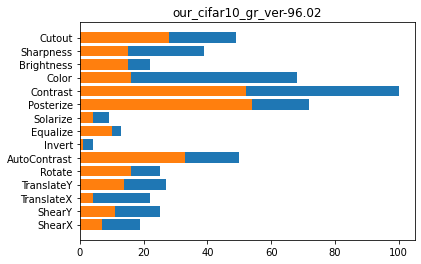

In [28]:
c10_gr1_2 = [[["Cutout", 0.4959189002026223, 0.5063450922004367], ["ShearY", 0.279078807247083, 0.3710549448257455]], [["AutoContrast", 0.9621789569640158, 0.00017345196860685252], ["Posterize", 0.05804785277702676, 0.2152032763355371]], [["Color", 0.7184193170966439, 0.543716886639228], ["Brightness", 0.6641485641039538, 0.3917284033456256]], [["Color", 0.41230798064537977, 0.9185783759873623], ["TranslateX", 0.31628793558899887, 0.5802795450101332]], [["Posterize", 0.7211783202559231, 0.4146801703261497], ["ShearX", 0.050600284358147236, 0.8711559008834094]], [["Posterize", 0.5758788714986659, 0.20325899991691024], ["Posterize", 0.4981891583938978, 0.4114501458454239]], [["AutoContrast", 0.6171079644889852, 0.14234551489374175], ["Rotate", 0.03486720433435303, 0.428793460513121]], [["Posterize", 0.5650831996981551, 0.3898372218886454], ["Color", 0.03860223093385262, 0.17636390639937555]], [["TranslateY", 0.045990584076565394, 0.9703870603095486], ["Posterize", 0.3797401190052104, 0.11581717359534491]], [["ShearY", 0.01840019473456142, 0.5503325436383378], ["Contrast", 0.005809445846534367, 0.30202642283447495]], [["Posterize", 0.6689900023251741, 0.49792228340481903], ["Posterize", 0.3413645550173932, 0.37038757296921904]], [["AutoContrast", 0.44164630230191027, 0.40356114204563986], ["Color", 0.0017599104384639491, 0.07722552524207707]], [["Color", 0.6809934221843132, 0.5801345667082365], ["Color", 0.6951113712743545, 0.1659808628633871]], [["TranslateY", 0.009743394900070146, 0.8864803003572687], ["Posterize", 0.2227246633074983, 0.49872938531696476]], [["ShearY", 0.7090238090481644, 0.5935596672536797], ["Contrast", 0.09383211510787906, 0.9609762793656291]], [["Contrast", 0.2495904064049469, 0.44527013553322314], ["Posterize", 0.28870068852861125, 0.3263020735242938]], [["Color", 0.9062814762888953, 0.1776462304783178], ["Posterize", 0.3048149748380856, 0.1673370211837355]], [["Posterize", 0.7066104566936969, 0.5412811745358797], ["ShearX", 0.44230596554821366, 0.3914183952484588]], [["AutoContrast", 0.33167817082367496, 0.9815173929220775], ["Sharpness", 0.30113588581546546, 0.29735393054926373]], [["Posterize", 0.7746561035469477, 0.4074504688263191], ["Rotate", 0.304476353186183, 0.5204249049812616]], [["Posterize", 0.5771073384049334, 0.30033297482998833], ["Sharpness", 0.2130998757741327, 0.45638329587299487]], [["Cutout", 0.7818659350788573, 0.04779977431574471], ["Rotate", 0.08668460093897809, 0.4454414409781529]], [["Sharpness", 0.7013176986649716, 0.34723111711843435], ["Color", 0.5008820281022786, 0.25935879109378296]], [["TranslateX", 0.10192065248543415, 0.8682854919929119], ["Sharpness", 0.5369881902595086, 0.054843429429697214]], [["AutoContrast", 0.676367314593515, 0.5629152184002703], ["Contrast", 0.020455117587080133, 0.1221301166229311]], [["Posterize", 0.6237663054082712, 0.4988286884531321], ["Posterize", 0.48209376969541196, 0.3891186706740652]], [["AutoContrast", 0.4480827354568774, 0.2296579432471637], ["Rotate", 0.07762571927949025, 0.417251003818255]], [["Posterize", 0.6770714520403254, 0.58183748425869], ["Color", 0.7112320322905481, 0.1440182769828756]], [["TranslateY", 0.01727060376740115, 0.8836151273792804], ["Posterize", 0.3911780265320618, 0.5191750010842092]], [["ShearY", 0.7094253252243559, 0.6044944570392883], ["Contrast", 0.08539100825420343, 0.964537788881364]], [["Posterize", 0.5895947574776956, 0.026147978049605114], ["Posterize", 0.6867394026146486, 0.40716729360787496]], [["AutoContrast", 0.6497510953644573, 0.16981215920201156], ["Rotate", 0.05962056501558766, 0.45360482674049735]], [["Posterize", 0.5666475865149943, 0.16196849583079803], ["Color", 0.006966071486788385, 0.0003383437938969114]], [["TranslateY", 0.0402515329634415, 0.8907836667246224], ["Posterize", 0.507914627667362, 0.07828662576969758]], [["ShearY", 0.06596028251739383, 0.5829047526437408], ["Contrast", 0.04399601312733242, 0.31036087926160316]], [["Equalize", 0.29624115896062697, 0.5797545876769207], ["ShearX", 0.4320836269364815, 0.5382744295827134]], [["AutoContrast", 0.4829608823033251, 0.3767674855497678], ["Contrast", 0.0007286649667648804, 0.2900335053868219]], [["Color", 0.3961820450669973, 0.6960808526358166], ["Contrast", 0.7891043362949277, 0.47840151714822526]], [["AutoContrast", 0.05894244800548154, 0.9985847029895447], ["Posterize", 0.22693696724305573, 0.2852750833363131]], [["ShearX", 0.832151204907496, 0.69989768515789], ["Contrast", 0.3539509951328045, 0.844104668214931]], [["Contrast", 0.3012615805468437, 0.5524079816888072], ["TranslateX", 0.049131313489209905, 0.034435304990549365]], [["Color", 0.9714239086842411, 0.053169120279598386], ["Posterize", 0.10929240209382111, 0.18456258727506136]], [["Posterize", 0.9156020051459384, 0.8342221872949203], ["Color", 0.8058118044002456, 0.13909933732809968]], [["AutoContrast", 0.33825746255377664, 0.3233299010695491], ["Sharpness", 0.01070709763871791, 0.3612356052567389]], [["Posterize", 0.770745692489538, 0.00020100269431161388], ["Rotate", 0.10025231232377291, 0.5157763586907985]], [["Brightness", 0.002912355413053902, 0.8706926019431133], ["Cutout", 0.10848039595486808, 0.36221308564225874]], [["AutoContrast", 0.3384071833301011, 0.4340189813661074], ["Sharpness", 0.4484730586413056, 0.16492056585898746]], [["Color", 0.8002120153782479, 0.7663435756493594], ["Rotate", 0.27412522414675716, 0.4298636011943139]], [["Color", 0.22342387953911869, 0.8878617693946624], ["TranslateX", 0.2741684673903445, 0.3149210495143508]], [["Rotate", 0.05058838321344275, 0.9526921996217618], ["AutoContrast", 0.7172696693518903, 0.18389461345976563]], [["Cutout", 0.6313306400186354, 0.6793429682263044], ["Color", 0.16384000140807864, 0.9412589776745665]], [["Posterize", 0.9612944177840492, 0.6077074519353918], ["Invert", 0.06979091005860905, 0.29559815578456805]], [["Cutout", 0.1535690678881624, 0.43100331275470194], ["Sharpness", 0.16938377120150838, 0.3024880416604786]], [["Contrast", 0.5017876861629708, 0.46675659368482036], ["Cutout", 0.1837542932388634, 0.5922575077254219]], [["ShearY", 0.19810366132579077, 0.6733948880669665], ["AutoContrast", 0.7473077770013703, 0.7064250275921209]], [["Equalize", 0.0843424485453903, 0.3402350212323006], ["Color", 0.4281555701646996, 0.7230724695518471]], [["Posterize", 0.7868701299565957, 0.17292512658162282], ["TranslateX", 0.07293067388769811, 0.6247142617685566]], [["Cutout", 0.0879062491671084, 0.7563671973254121], ["Sharpness", 0.08524944507416986, 0.33346165600467914]], [["Contrast", 0.6163645898619408, 0.5672283424389325], ["Contrast", 0.19495755163744324, 0.7323163146459637]], [["Equalize", 0.09492170964045366, 0.7749659187388286], ["AutoContrast", 0.88190602520461, 0.0006719003163598241]], [["Cutout", 0.30197543948199285, 0.3827907557077156], ["Color", 0.0937357921025012, 0.983741584947471]], [["Posterize", 0.8696431322461774, 0.24163121492146794], ["Invert", 0.04583856609008319, 0.6696605257762768]], [["Cutout", 0.1333239944511709, 0.3323579910970199], ["Sharpness", 0.12310866650683747, 0.2813962485425895]], [["Contrast", 0.7444347509555227, 0.439923985071771], ["Cutout", 0.3173504468759821, 0.7535366905463978]], [["ShearY", 0.0015448044994816335, 0.5584172264254268], ["AutoContrast", 0.8324147123521539, 0.41044554497454233]], [["Equalize", 0.14616965233954832, 0.4393841249652446], ["Color", 0.2604956524062759, 0.5725512460597924]], [["Posterize", 0.6063726008915302, 0.10799343571637496], ["TranslateX", 0.12923111629647435, 0.77711839474666]], [["Cutout", 0.31855352882869326, 0.6573927877097774], ["Sharpness", 0.12431417221180693, 0.36296443260024547]], [["Contrast", 0.775935127371786, 0.601704849786971], ["Contrast", 0.24943230694883314, 0.7140785043130389]], [["Brightness", 0.09858750687649925, 0.7736471980163862], ["AutoContrast", 0.8917661124029077, 0.10850534499433992]], [["Cutout", 0.28942857372811304, 0.3904244195044295], ["Color", 0.08520396424836293, 0.9997444697656632]], [["Posterize", 0.8258362211840282, 0.5660697078381756], ["Invert", 0.034933955772030845, 0.6777017692844521]], [["Cutout", 0.13197938107808027, 0.17356570875719754], ["Sharpness", 0.3551268560567314, 0.3508747523312619]], [["Contrast", 0.6077645538980814, 0.2701218145481989], ["Cutout", 0.3023004974091127, 0.8902140799657121]], [["ShearX", 0.07268440681841262, 0.6332468179770805], ["Color", 0.6330448007325462, 0.7176729483294302]], [["AutoContrast", 0.7118587099591319, 0.4410797298082322], ["Color", 0.4331976849533589, 0.6894220597777565]], [["Posterize", 0.5378693016676015, 0.07540030807983486], ["Solarize", 0.07877288474198141, 0.6117230746738223]], [["Equalize", 0.21135882499198738, 0.6677771106653175], ["Brightness", 0.247479633548494, 0.33710609967592553]], [["Contrast", 0.596246626227629, 0.7800003802808606], ["Color", 0.12486020971796633, 0.5366188693156897]], [["ShearY", 0.3613383154145387, 0.6151996586408592], ["AutoContrast", 0.7060285274346945, 0.5418373881364331]], [["Equalize", 0.2319472139140466, 0.32271504555316977], ["Color", 0.32850187179097207, 0.7637918052241798]], [["Posterize", 0.8592815315437987, 0.010489573236161592], ["TranslateX", 0.08363013019173192, 0.5428258478564725]], [["Cutout", 0.11773957047596063, 0.7363279606881893], ["Sharpness", 0.029435270175933226, 0.18518104707408023]], [["Contrast", 0.5206238419812301, 0.5212072652331171], ["Contrast", 0.4549168495020708, 0.6827129755592621]], [["Rotate", 0.03071692842075055, 0.832998706236519], ["Contrast", 0.5034538759797756, 0.34370512114563334]], [["ShearY", 0.29646512039359507, 0.49174019329513674], ["Solarize", 0.2431400974422722, 0.8290808320294277]], [["Posterize", 0.5545208486068837, 0.07930074125393813], ["Contrast", 0.045054621406871775, 0.5674666704806903]], [["Color", 0.23448442770175013, 0.5284670072205652], ["Sharpness", 0.2289034758123881, 0.37784844516101485]], [["Sharpness", 0.552233406395885, 0.5848823086592589], ["Cutout", 0.3816705437506217, 0.90210689359936]], [["Sharpness", 0.18171928944924853, 0.8981810095341457], ["AutoContrast", 0.42443076401630986, 0.0009969619915832229]], [["Sharpness", 0.21877602568386179, 0.412251696736171], ["Cutout", 0.04022724513715179, 0.6102631034355533]], [["Brightness", 0.8040869765081258, 0.4793821543543163], ["ShearX", 0.1959904248692115, 0.7479016509014146]], [["Cutout", 0.0889728816553694, 0.4302898724505062], ["Contrast", 0.27555495317399054, 0.22634705266005556]], [["AutoContrast", 0.8312688625814411, 0.6863626236100262], ["TranslateX", 0.30150928405878513, 0.6716559820296398]], [["ShearY", 0.3266157222074959, 0.7047526627024255], ["AutoContrast", 0.7386388106677354, 0.49562239202901237]], [["Equalize", 0.15276658625315312, 0.43011195694488075], ["Color", 0.33561924824901557, 0.7212586233448114]], [["Posterize", 0.7333735697197852, 0.16882000394988772], ["TranslateX", 0.028213009589755162, 0.5952657683924722]], [["Cutout", 0.23474087897815893, 0.6572718863599999], ["Sharpness", 0.01282591833567967, 0.3273816566473893]], [["Contrast", 0.7022143223475518, 0.5534137789620998], ["Contrast", 0.27539565217985407, 0.715485101858945]], [["Sharpness", 0.12548084354872271, 0.6199089829886284], ["Sharpness", 0.042373056772290335, 0.29824204274708643]], [["TranslateY", 0.5509864873342692, 0.5427892960136897], ["AutoContrast", 0.046623895749948685, 0.480549352046349]], [["Brightness", 0.3149245799214708, 0.5999926023632555], ["Color", 0.9015999506665014, 0.2499554141430553]], [["Solarize", 0.25796135279917276, 0.8231121766752661], ["Cutout", 0.12110118438694845, 0.5567181162959085]], [["Posterize", 0.11673912903079622, 0.6730534674466303], ["Cutout", 0.3150712806964711, 0.531947450664477]], [["Rotate", 0.17565311593128047, 0.6028935255334692], ["Cutout", 0.20598410030133874, 0.39619570307255686]], [["TranslateY", 0.6124511359813625, 0.44886643545125565], ["AutoContrast", 0.01587011378263731, 0.5227021327434797]], [["Contrast", 0.34231227163442957, 0.7724623809150597], ["Color", 0.9834726547683166, 0.33796333240278087]], [["Contrast", 0.32578856425375885, 0.816710359289019], ["TranslateX", 0.16171928027072413, 0.42869161076169005]], [["Posterize", 0.11040824725701529, 0.8224860759450809], ["Cutout", 0.4405329927298249, 0.4566711617100908]], [["Rotate", 0.08409739467776664, 0.4706658902655741], ["Equalize", 0.02828823552212822, 0.5914478835419422]], [["TranslateY", 0.7712891190960431, 0.48772478853977796], ["Brightness", 0.13010059694180084, 0.38310620865265865]], [["ShearX", 0.2813355256519574, 0.4029163568253749], ["Color", 0.6911650960139406, 0.2571505568825976]], [["Solarize", 0.1693471087116446, 0.6286009684114385], ["Sharpness", 0.05464874151322167, 0.7457581252787704]], [["Posterize", 0.47044308486626885, 0.6758968295242417], ["TranslateX", 0.5167173682940855, 0.5193492889608277]], [["Rotate", 0.16678571472827877, 0.4307949266555037], ["Cutout", 0.21446522538881527, 0.2549167570247352]], [["TranslateY", 0.6185941553782539, 0.3998151211703206], ["AutoContrast", 0.10681360673635507, 0.3356205624349593]], [["Contrast", 0.3254187064829678, 0.7654001102397188], ["AutoContrast", 0.900252197533498, 0.2799326944430796]], [["Brightness", 0.10900103247852554, 0.8172880665743144], ["Brightness", 0.22812023607563728, 0.4067525050375306]], [["AutoContrast", 0.33453233848206604, 0.47658982642625125], ["TranslateY", 0.2299546822826557, 0.1877366413228024]], [["ShearX", 0.28916945231521096, 0.44251923214090927], ["Brightness", 0.003706964644906774, 0.1909462237665766]], [["ShearX", 0.39266276017675367, 0.7119407214620355], ["AutoContrast", 0.7123561929150334, 0.43791047247148607]], [["Contrast", 0.1284490284302903, 0.7423795384113137], ["Sharpness", 0.893565231305623, 0.5910524700623221]], [["Posterize", 0.05895933918954035, 0.5208446994777731], ["Sharpness", 0.1253207583492631, 0.8108860771874213]], [["Invert", 0.024957879595985666, 0.6830661742325059], ["Contrast", 0.04575920596294031, 0.32389948552977765]], [["Cutout", 0.5494203453543478, 0.2273332917315128], ["TranslateY", 0.13044937379735672, 0.4791360848898612]], [["Posterize", 0.2877610253789188, 0.7778571095686759], ["Color", 0.9758077739217497, 0.12296141060249649]], [["Sharpness", 0.3696298373335479, 0.595212301547792], ["TranslateX", 0.20206874294668026, 0.29777686043523455]], [["Color", 0.0008049054015880353, 0.9014085653249169], ["Brightness", 0.40804687634011166, 0.4051656584773954]], [["AutoContrast", 0.09719059362978659, 0.4832883903517773], ["Color", 0.05383183119696494, 0.449998058529064]], [["ShearX", 0.5927168672905488, 0.49250509960596434], ["Equalize", 0.22918348721915985, 0.4360673461550535]], [["Rotate", 0.43626165339422046, 0.4085320185254969], ["TranslateX", 0.7610853853247299, 0.47498303429613453]], [["Solarize", 0.04246233234128856, 0.7931024668424159], ["Sharpness", 0.09200994049779193, 0.5445532886063332]], [["TranslateY", 0.19406586910646317, 0.5620949237932895], ["Sharpness", 0.5415077527281353, 0.723999716384905]], [["Sharpness", 0.08162541804092174, 0.5875756878891134], ["Sharpness", 0.15852687225785964, 0.3166225494643054]], [["TranslateY", 0.37348569251807195, 0.47223871442429816], ["Cutout", 0.06444457613216162, 0.5584109414098561]], [["Brightness", 0.38854250980382904, 0.6364343564349477], ["Color", 0.6776859390384764, 0.22530685449717947]], [["Solarize", 0.2412933004322576, 0.7664121385759962], ["Cutout", 0.39951496936640296, 0.453156444877339]], [["Posterize", 0.07314691256106226, 0.5746446283155637], ["Cutout", 0.4722629446349734, 0.6187283307308142]], [["Rotate", 0.1871212226970371, 0.6100977122233514], ["Cutout", 0.19412259708530788, 0.393662503770689]], [["TranslateY", 0.5481611374992589, 0.44969252927702474], ["AutoContrast", 0.0003938089318127787, 0.47926376246464797]], [["Contrast", 0.3471016821280257, 0.7973107823455303], ["Cutout", 0.9965364007949902, 0.4329226899125692]], [["Contrast", 0.2902775905554751, 0.8649073393474801], ["ShearY", 0.16285359437767927, 0.41507520612900284]], [["AutoContrast", 0.039416616887180705, 0.835584171356712], ["ShearY", 0.4497588464325978, 0.4547070611646528]], [["TranslateX", 0.2798962016906886, 0.4736348014068871], ["Cutout", 0.06794589728781765, 0.4267611433112177]], [["TranslateY", 0.4726639502836455, 0.5684662501105024], ["Color", 0.1258481578987272, 0.4575218870911755]], [["Cutout", 0.16917020757385645, 0.9959395885528742], ["Color", 0.836305122664929, 0.2665295978302235]], [["Color", 0.35845925812537577, 0.8013454043371236], ["Posterize", 0.01953795982433932, 0.4761628708459636]], [["Cutout", 0.09176048569794165, 0.6091162702125607], ["Equalize", 0.26244301305379675, 0.31944023833119467]], [["Posterize", 0.4786417897432912, 0.5398629684045347], ["Color", 0.25360019785941645, 0.7907888064014983]], [["Brightness", 0.9045609656471783, 0.3995027153906341], ["Color", 0.2249597544638116, 0.944387263438481]], [["AutoContrast", 0.8836774809477423, 0.4528610064649109], ["TranslateX", 0.024142564029601687, 0.3853262549821801]], [["Posterize", 0.48810067471223373, 0.5320553386471134], ["TranslateY", 0.35665663449793483, 0.4752322533773902]], [["Rotate", 0.017374014886397393, 0.5938956200190937], ["ShearX", 0.17404065246389977, 0.4248072433657336]], [["Posterize", 0.4702342234735013, 0.6332518110880507], ["Color", 0.2562903935382252, 0.5842173888128692]], [["Brightness", 0.9731865705887432, 0.5280879660338357], ["Color", 0.47010451337498127, 0.870340935739436]], [["AutoContrast", 0.741140309494751, 0.5302397102122647], ["TranslateX", 0.06013321532047905, 0.2685990759585966]], [["Posterize", 0.4969085243347822, 0.7546891164091345], ["Contrast", 0.48331055559401925, 0.450598567555742]], [["Rotate", 0.06679368618884018, 0.6207847077359778], ["ShearX", 0.09643374562350128, 0.7196767762220099]], [["Color", 0.5788242791817012, 0.23990958423475955], ["Color", 0.4206389258997635, 0.8199583807258684]], [["Color", 0.5593329959165283, 0.21094071247787302], ["Solarize", 0.05359250207269922, 0.8414100270884883]], [["Posterize", 0.6552746841670287, 0.2724456445706239], ["TranslateY", 0.6630434558063621, 0.4839358079232534]], [["Brightness", 0.08066009357435215, 0.7314213323953785], ["Contrast", 0.20741899839109712, 0.5606511378467844]], [["Posterize", 0.6619812949613016, 0.27178385848453146], ["Color", 0.3579739526186043, 0.8199540694292552]], [["Color", 0.4851987336776861, 0.34400206483688606], ["Solarize", 0.1361705135005093, 0.7967456305885225]], [["ShearY", 0.3053829414874088, 0.4457788836021783], ["Solarize", 0.0019920187434441794, 0.2928397358645171]], [["Posterize", 0.6642644040895094, 0.29620030738982406], ["TranslateY", 0.6274394747471451, 0.5826018968159541]], [["Brightness", 0.06856651141761189, 0.7516869156245074], ["Contrast", 0.2980821037210588, 0.4915491377409617]], [["Posterize", 0.4908392993407225, 0.36531973014522456], ["Color", 0.3221927645785201, 0.9411081111987214]], [["Brightness", 0.9079236689370732, 0.30714368454893837], ["Color", 0.04940308011579639, 0.9572045548383559]], [["AutoContrast", 0.7734287540927699, 0.26139134659056434], ["TranslateX", 0.08458859162578919, 0.2997079230503552]], [["Posterize", 0.3164971049472815, 0.22641587229107346], ["TranslateY", 0.6415375292054242, 0.4764633750890849]], [["AutoContrast", 0.05790064125904533, 0.8210257241169816], ["ShearX", 0.29620301580109937, 0.4116524297559533]], [["Posterize", 0.233983354875782, 0.6602119803413131], ["ShearX", 0.25220904467582617, 0.5260904975179947]], [["Posterize", 0.8113564316499327, 0.5374844284700429], ["Sharpness", 0.601123065151465, 0.862302783838765]], [["AutoContrast", 0.6703559737610176, 0.6585357251583464], ["TranslateX", 0.050391670219861684, 0.5159813470639518]], [["Posterize", 0.450561596809988, 0.826851467227496], ["Contrast", 0.46881527542690826, 0.41276601184470085]], [["TranslateY", 0.15278806913593523, 0.9972597662559375], ["ShearX", 0.10375145970456462, 0.4700919401400362]], [["Posterize", 0.6380581813752266, 0.502527023367448], ["Color", 0.2618229837251799, 0.5796365713424665]], [["Brightness", 0.9755242458898277, 0.5227931036340938], ["Color", 0.38183507154381774, 0.8656962231198533]], [["AutoContrast", 0.7364030459285237, 0.5221898128425251], ["TranslateX", 0.05701074326889043, 0.2559407751011564]], [["Posterize", 0.5027498976180312, 0.780256100849159], ["Contrast", 0.46838461154625305, 0.263479574422897]], [["Rotate", 0.0594540674746864, 0.630855024241316], ["ShearX", 0.09338044112928234, 0.7119004429106592]], [["Posterize", 0.9614719039978269, 0.22405865198509106], ["Posterize", 0.4432098789378006, 0.4324231856881739]], [["Cutout", 0.19079539085465136, 0.36841672877317416], ["TranslateY", 0.3066955680561596, 0.6905938017047833]], [["Brightness", 0.030456449480770142, 0.48689164052653583], ["Cutout", 0.07054706315892051, 0.0270986548696302]], [["AutoContrast", 0.6330371667443546, 0.12393317412430721], ["TranslateY", 0.3450515823596153, 0.43988065855266967]], [["Color", 0.3329478848484966, 0.6316872668116101], ["Contrast", 0.018366606623419518, 0.7544474816128868]], [["Equalize", 0.26074847663156314, 0.7813182547598841], ["Color", 0.2058305998619535, 0.5755766256101352]], [["Posterize", 0.7468589338541086, 0.7516911885885691], ["Sharpness", 0.6607236088488553, 0.64632027684354]], [["Sharpness", 0.7265864303182005, 0.8668206035569269], ["Sharpness", 0.016683531548770558, 0.5751313003633891]], [["Brightness", 0.6272443602578361, 0.6450383871638621], ["Cutout", 0.14955649692936285, 0.2589747946107043]], [["Rotate", 0.22175775891687366, 0.7848855952513081], ["AutoContrast", 0.04022849071254632, 0.22972865364208836]], [["ShearX", 0.1003414846255376, 0.06570712655948541], ["Rotate", 0.8838561587901871, 0.5331561237666346]], [["TranslateX", 0.21269408567129094, 0.5522287158316281], ["Rotate", 0.4909922642386396, 0.49670620173658087]], [["Equalize", 0.051659878532244935, 0.8017562141784405], ["Contrast", 0.49501911031134455, 0.998354505589842]], [["Cutout", 0.7612879483080851, 0.8242097506122139], ["Contrast", 0.6136112430486489, 0.7074649265912353]], [["Posterize", 0.18420642400646858, 0.33687445058914733], ["Sharpness", 0.7667381474226043, 0.6339295877898907]], [["Posterize", 0.15392905833356837, 0.9438963161171243], ["ShearY", 0.001429235744159596, 0.2752713361788043]], [["Cutout", 0.3380563414053903, 0.3843359898174636], ["ShearY", 0.035527995360956466, 0.8251704930978783]], [["Contrast", 0.47850594728076645, 0.6768357415545797], ["Color", 0.4399076586572665, 0.706209057423101]], [["AutoContrast", 0.5752274797811334, 0.6788096751166036], ["Color", 0.5569712777729983, 0.6125379809364485]], [["Cutout", 0.21259249074452424, 0.7416280857897803], ["Posterize", 0.4302409629390052, 0.4529283812445089]], [["Sharpness", 0.2054875683756053, 0.7514610146723679], ["Brightness", 0.4347608518514058, 0.5452568524226352]], [["Cutout", 0.06301207505231335, 0.5342777256673087], ["ShearY", 0.00011064760940580898, 0.5176147293177026]], [["Posterize", 0.23511873380902004, 0.5765115215061954], ["Contrast", 0.7095077094138351, 0.7471583361797766]], [["AutoContrast", 0.7332598970698185, 0.892775311183836], ["Color", 0.7749960001245613, 0.33138379137851004]], [["AutoContrast", 0.9556996371677721, 0.828158584084405], ["ShearX", 0.10989410564890252, 0.844336933925703]], [["Rotate", 0.017806852650768434, 0.8510991313225467], ["TranslateY", 0.5260027293196786, 0.4060909100636079]], [["Cutout", 0.21756693912294434, 0.2697687426624549], ["ShearY", 0.045553400628359594, 0.9198524999668551]], [["Posterize", 0.3218541480886861, 0.6548036779026257], ["Contrast", 0.635332613199884, 0.5632274452235596]], [["Sharpness", 0.36634513174812, 0.9984540326422128], ["Color", 0.7999320412419537, 0.31745632783026667]], [["AutoContrast", 0.9876699252121297, 0.9908016180987465], ["Color", 0.0013227957746734294, 0.0744511291456057]], [["Rotate", 0.030633532593268314, 0.9342021960916528], ["TranslateY", 0.6477506630502075, 0.3796092133592086]], [["Cutout", 0.37546370402353674, 0.4038196526838119], ["ShearY", 0.07978476901957357, 0.8000797689430426]], [["Posterize", 0.3260902363532826, 0.520574150166872], ["Contrast", 0.5655558971558083, 0.6172134587001155]], [["Sharpness", 0.5320649762346175, 0.7892326142260213], ["Color", 0.4955718181608562, 0.21553079029477568]], [["AutoContrast", 0.8929286094100796, 0.8688886565817723], ["Color", 0.20313393563033727, 0.023823701423251575]], [["Posterize", 0.1722464778944146, 0.9221625155600987], ["ShearY", 0.16219484249600638, 0.1266345996896909]], [["ShearY", 0.33999472991973306, 0.6260698306686199], ["ShearY", 0.04105896644627184, 0.8466875471583104]], [["Brightness", 0.5015963712104865, 0.47758725577983147], ["Color", 0.4367524752377079, 0.705442360705232]], [["AutoContrast", 0.5758597366170256, 0.5907387398701747], ["Color", 0.5733849716284561, 0.062989023694557]], [["Cutout", 0.2156899871444032, 0.9732900795754], ["Posterize", 0.43421395255509176, 0.6336751421973457]], [["Rotate", 0.03351381670261827, 0.8397738264709371], ["TranslateY", 0.5252896904298452, 0.4050008956586294]], [["Cutout", 0.38818719167586163, 0.2691820263453384], ["ShearY", 0.05552467088573526, 0.8642974559967995]], [["Posterize", 0.3347582573561816, 0.5454320399167248], ["Contrast", 0.647952191236317, 0.5685130157221061]], [["Sharpness", 0.3687594687280847, 0.7907993322686481], ["Color", 0.7941518772058489, 0.32811137113632005]], [["AutoContrast", 0.9911202429358339, 0.9779052989284328], ["Color", 0.00215801210615979, 0.08166559412431444]], [["Sharpness", 0.24517288506532803, 0.7167421583436521], ["Posterize", 0.3271471068458913, 0.9514324995110179]], [["Equalize", 0.3901132127717728, 0.010412971169171455], ["ShearY", 0.23062255802059195, 0.5420976591407267]], [["Posterize", 0.6917861786732157, 0.3467203505852049], ["Cutout", 0.4391003191227638, 0.5903830268797503]], [["AutoContrast", 0.307597033159214, 0.8615820297815783], ["Contrast", 0.6740853812413898, 0.7031332023474095]], [["Color", 0.9076170409675992, 0.7063786698777124], ["ShearX", 0.27556604633469817, 0.5541151653320283]], [["Cutout", 0.3019237553398416, 0.9370176394223328], ["Cutout", 0.4146619811644778, 0.17304419833728274]], [["TranslateX", 0.6700621588982497, 0.5794541593563404], ["AutoContrast", 0.4020943370084384, 0.35198769334097524]], [["TranslateY", 0.4604968094998922, 0.6573666178739643], ["AutoContrast", 0.5912555811659824, 0.3769430626686142]], [["Contrast", 0.4536100084505718, 0.7793149507667052], ["Color", 0.5016864803522508, 0.23983484770752006]], [["Contrast", 0.6658165124386612, 0.5121083011166108], ["TranslateX", 0.5697125736961646, 0.5116863834291556]], [["Rotate", 0.07712263684506254, 0.8664535200503183], ["TranslateY", 0.6039354295704228, 0.5027776948154873]], [["Cutout", 0.46115326858024513, 0.3568114254834248], ["ShearY", 0.17679379524108316, 0.8884652874125643]], [["Posterize", 0.2018018909124613, 0.5433855696443703], ["Contrast", 0.627208732589629, 0.562915102931186]], [["Sharpness", 0.3232085902441388, 0.8172072814830568], ["Color", 0.8569652076060749, 0.1517911811912315]], [["AutoContrast", 0.8374381021849773, 0.7299508947891019], ["Color", 0.04960220545779681, 0.07540612800616703]], [["Rotate", 0.0208506470263484, 0.9222807682842145], ["TranslateY", 0.6977610567835235, 0.39485368666754117]], [["Cutout", 0.37158023303251225, 0.5635346245843541], ["ShearY", 0.012036856622981755, 0.9989101403266982]], [["Posterize", 0.3141322580636106, 0.5295231929779671], ["Contrast", 0.7849547558394854, 0.6104960803398588]], [["Sharpness", 0.5715470650927623, 0.7987745052663584], ["Color", 0.5778093489584893, 0.1057301300809899]], [["AutoContrast", 0.8474649746422056, 0.7919649245265203], ["Color", 0.2084901596593121, 0.022288892573171334]]]
plot_res(c10_gr1_2, "our_cifar10_gr_ver-96.02")

ShearX: 35-16
ShearY: 21-18
TranslateX: 31-13
TranslateY: 24-18
Rotate: 10-20
AutoContrast: 21-41
Invert: 20-29
Equalize: 10-9
Solarize: 16-8
Posterize: 52-22
Contrast: 49-72
Color: 69-71
Brightness: 37-32
Sharpness: 51-69
Cutout: 66-94


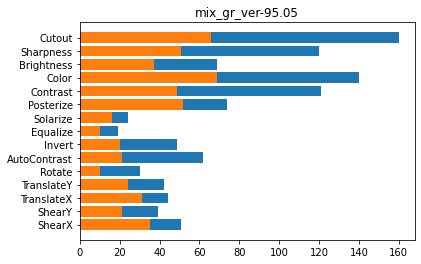

In [32]:
mix_gr1 = {"0": [[["Rotate", 0.10018062854369414, 0.6237067673352199], ["Cutout", 0.22333081192684537, 0.4729674284150499]], [["Sharpness", 0.341758044127977, 0.16873428083450934], ["Brightness", 0.30621186490216, 0.6991290905344425]], [["Brightness", 0.07974712065276943, 0.16949032510084497], ["ShearY", 0.4182947973422688, 0.5286517537726092]], [["Posterize", 0.3558408232189577, 0.6105442655720699], ["TranslateX", 0.03772231478094193, 0.17114672569923312]], [["Cutout", 0.14560451393798218, 0.18628466009508407], ["Color", 0.14885152404685678, 0.23588000157629205]], [["Color", 0.7965970520918694, 0.41254712217345824], ["Cutout", 0.11550426330186203, 0.5703121786991828]], [["Contrast", 0.8812116472234225, 0.38276378070439754], ["ShearX", 0.00280598306465263, 0.09758416333395137]], [["TranslateX", 0.7122695669234562, 0.517042173435704], ["TranslateY", 0.04681980905850605, 0.34356537515505536]], [["Rotate", 0.11956710911615195, 0.5043275783826365], ["Contrast", 0.1435247121253978, 0.6604916744969183]], [["Cutout", 0.7362953472486311, 0.10832181138806568], ["ShearY", 0.14739253553652448, 0.30597638046114023]], [["Contrast", 0.019951552861506988, 0.747554446828891], ["Cutout", 0.23354849938195774, 0.5106893604679175]], [["Sharpness", 0.11686556228413358, 0.362795456423402], ["Brightness", 0.2509778486106003, 0.7130210343811297]], [["Brightness", 0.06058682751324726, 0.2869396157664838], ["ShearY", 0.3591064850887412, 0.3805387271815719]], [["Posterize", 0.4218173746132253, 0.6957495750779682], ["Brightness", 0.12838283581150017, 0.058417219371094384]], [["Solarize", 0.06768417679415648, 0.09598916237856245], ["Color", 0.1612744542547713, 0.1469018982692583]], [["Posterize", 0.6681483741882391, 0.43077609286229046], ["Cutout", 0.3514903444395375, 0.30933246379584406]], [["Color", 0.26247087296756094, 0.37582022917149094], ["TranslateX", 0.06765818182526204, 0.4706786485025487]], [["Brightness", 0.000553961153473552, 0.18056115549301746], ["Color", 0.2559235987972473, 0.45239321695303253]], [["Posterize", 0.2015159346305661, 0.4847520017596146], ["Rotate", 0.15016554553782457, 0.4487249678430829]], [["Solarize", 0.27726165035773453, 0.01033934121368834], ["Color", 0.10846348291599892, 0.36490934839505007]], [["Posterize", 0.2620822970270244, 0.4937256230271481], ["ShearY", 0.264443156412838, 0.3384019048583746]], [["Color", 0.3866872344422717, 0.41996640023819143], ["TranslateX", 0.2246668240286092, 0.38081185742194595]], [["Sharpness", 0.012303398697372847, 0.2431839556962837], ["Color", 0.18736117975289746, 0.41073209388430987]], [["Posterize", 0.2180021346302125, 0.3694605695972991], ["Rotate", 0.24257460124720354, 0.5495358237887542]], [["Solarize", 0.11142181544363838, 0.00936902330346634], ["Cutout", 0.23081199656313844, 0.369433338236873]], [["ShearX", 0.15078045912456517, 0.32576118792824416], ["Contrast", 0.30339663224428703, 0.4483275245360129]], [["Sharpness", 0.2498681320090805, 0.5012613691600701], ["Color", 0.18551188722611553, 0.8943570068320272]], [["TranslateY", 0.18300859101745867, 0.346728831698631], ["Cutout", 0.5486365992113031, 0.7382638893915652]], [["Cutout", 0.5634774385994135, 0.5527377759663814], ["ShearX", 0.024409511367997183, 0.2840878961008123]], [["Invert", 0.04344088180389882, 0.26933902933979703], ["Rotate", 0.036431615419605906, 0.13674919614741488]], [["Rotate", 0.019416171441365253, 0.8835839765033557], ["Cutout", 0.37484394931734444, 0.5441380080734415]], [["ShearX", 0.02927199566684152, 0.20603549397763637], ["Contrast", 0.33895005400262, 0.9491203033752607]], [["Brightness", 0.2577018089267946, 0.5099147597531106], ["TranslateY", 0.40412244166896194, 0.5082187463648433]], [["AutoContrast", 0.36955639974635424, 0.848648940304028], ["TranslateX", 0.002737487884637714, 0.0012265105775462817]], [["Cutout", 0.22293018453963487, 0.1374011651837339], ["Sharpness", 0.2900301873481196, 0.17499721510059207]], [["Posterize", 0.11744331039203865, 0.5841936151847793], ["Cutout", 0.22587281084634606, 0.513306423096749]], [["Sharpness", 0.2041337632099946, 0.36879639310553597], ["Brightness", 0.13661544657323915, 0.7071453818885229]], [["Brightness", 0.12014408926687736, 0.282016115541744], ["ShearY", 0.35356887393251457, 0.39086343963620107]], [["Posterize", 0.31977837401394194, 0.491396519967383], ["Rotate", 0.12582292263982642, 0.13242468118343026]], [["Solarize", 0.015419960235466684, 0.041511302882906914], ["Color", 0.0021199367168516225, 0.21258598507917426]], [["Posterize", 0.2584230149112656, 0.4466787110731678], ["ShearY", 0.25568616814254924, 0.26991348892108236]], [["Color", 0.3147503468403748, 0.42902104466917695], ["TranslateX", 0.022408777621939657, 0.3832166927977997]], [["Sharpness", 0.10550169249563912, 0.3227234776050302], ["Color", 0.18356104144177107, 0.26451050848139007]], [["Posterize", 0.1959641455932873, 0.3606421593529294], ["Rotate", 0.24979146509210598, 0.5542323189785004]], [["Solarize", 0.21101607857952273, 0.016186188885551817], ["Cutout", 0.0832556069272885, 0.3752038159393243]], [["ShearY", 0.5962200952707617, 0.47897165216781457], ["Color", 0.27989826231844817, 0.2779863800940405]], [["Cutout", 0.34665171973235465, 0.5372334754902995], ["Sharpness", 0.15744542302305642, 0.25468965564811297]], [["Invert", 0.47476886847175526, 0.7133724635501404], ["Color", 0.09716651859208617, 0.5146313310003674]], [["ShearY", 0.0031029644143864554, 0.5011594147294146], ["Contrast", 0.342529767693289, 0.7189361403192667]], [["AutoContrast", 0.5271027034363086, 0.41505015079852736], ["TranslateX", 0.2747892191256506, 0.4994618058901368]], [["Cutout", 0.46937482854650026, 0.17213109341187613], ["Contrast", 0.931295140125729, 0.41852365393709545]], [["ShearY", 0.30037569175352247, 0.33168356708178853], ["Solarize", 0.30018756107158034, 0.8843531129836943]], [["Sharpness", 0.2222140385193523, 0.6566071155178361], ["Cutout", 0.1853840287039175, 0.6294221680244538]], [["Rotate", 0.06447367966540252, 0.6777555055174052], ["Sharpness", 0.3083634710009616, 0.663902821067093]], [["Color", 0.8644614580591875, 0.9297755026561151], ["Posterize", 0.7091281364951778, 0.9294951226495765]], [["Posterize", 0.22746023211220529, 0.4103910930310536], ["Color", 0.7678097718549536, 0.5237348357560697]], [["Contrast", 0.24066919860747693, 0.4690064888745969], ["Cutout", 0.2573384048697307, 0.4146550243135559]], [["Posterize", 0.17996902621376348, 0.6226674176715312], ["Cutout", 0.42569659560530404, 0.9518809145799116]], [["ShearY", 0.2355584544107026, 0.7099125581459265], ["Brightness", 0.10541605961222361, 0.4836290178990702]], [["TranslateX", 0.7632290117414477, 0.6197577979035666], ["ShearY", 0.6521314623772544, 0.6014313178785107]], [["Color", 0.34941325328771994, 0.2814297980818514], ["Color", 0.8780618819526971, 0.4178208767317304]], [["Brightness", 0.9234764794344652, 0.6665746309922256], ["Cutout", 0.7113586537835843, 0.7061412845502218]], [["Contrast", 0.9574142905358939, 0.6652158488449598], ["Invert", 0.41347603752734674, 0.9573654273187656]], [["TranslateY", 0.06454188540598127, 0.5235951703014806], ["Brightness", 0.09091712946090635, 0.467083962069494]], [["Sharpness", 0.9980022601169257, 0.7894554723405838], ["Posterize", 0.6907921180825479, 0.3309151777692213]], [["Cutout", 0.519882057666341, 0.40421922841006264], ["AutoContrast", 0.7085490114314563, 0.5839804004115327]], [["Invert", 0.15569745630191595, 0.6610181601544494], ["Cutout", 0.29392595320070874, 0.7589772768176175]], [["Color", 0.5316159878620939, 0.8397948328084803], ["Contrast", 0.34962137656551745, 0.7772539796055036]], [["Contrast", 0.2667703975579584, 0.5795379021910689], ["Contrast", 0.4794425683873796, 0.7245569759650845]], [["Sharpness", 0.501582189724371, 0.47229524435642345], ["TranslateX", 0.6146614790110655, 0.5767772787737808]], [["Cutout", 0.04359474806154541, 0.12914958908118712], ["Brightness", 0.8894697370353591, 0.46933040248364355]], [["TranslateY", 0.0474444845055004, 0.39206560994388956], ["Cutout", 0.672848761412666, 0.8553178565531008]], [["Sharpness", 0.23532251054472036, 0.7000932406054801], ["Contrast", 0.5203146263309714, 0.42900300706136674]], [["Color", 0.04692444067565325, 0.4751762050892161], ["Posterize", 0.1587244478147808, 0.7289948313341232]], [["Invert", 0.6704410244333545, 0.4411431811014085], ["Color", 0.3526862429957813, 0.7941758540305028]], [["Cutout", 0.3702555806089482, 0.12561257227609665], ["Brightness", 0.9967292691368831, 0.6148666152926777]], [["TranslateY", 0.22537689822383694, 0.5757650754042731], ["Cutout", 0.1989438259721819, 0.8331983595850883]], [["Sharpness", 0.3407758834153096, 0.5032394760857795], ["Cutout", 0.39597968055806787, 0.5123673714200199]], [["Rotate", 0.2599221774775837, 0.4968465140891601], ["Posterize", 0.15733096897589277, 0.5785243401824278]], [["Invert", 0.6698792106692983, 0.4380015089297158], ["Color", 0.35365539690166403, 0.5929827231692605]], [["Color", 0.0073247157473007585, 0.2027874291427455], ["Color", 0.9169406189156669, 0.1407853692698956]], [["Brightness", 0.25820579594343207, 0.8678968373716062], ["Cutout", 0.15289802039468148, 0.8587261745933419]], [["Contrast", 0.8721391880371072, 0.2510768220331373], ["Brightness", 0.4877302253331264, 0.6223643850356947]], [["TranslateY", 0.10865278108798229, 0.3345169931613743], ["Brightness", 0.039117757558101596, 0.4308846172480919]], [["Color", 0.8337692263054493, 0.5596079534022411], ["Posterize", 0.5980913390174581, 0.2632589496529373]], [["Color", 0.4079506216368482, 0.003289300267217743], ["TranslateX", 0.10456312130339923, 0.6603045351731213]], [["Brightness", 0.5310527599307674, 0.9374217857232117], ["Color", 0.15800832118914196, 0.7205603540822014]], [["ShearY", 0.5717188203234678, 0.3478556552947632], ["Sharpness", 0.8172814508767869, 0.1920124254348834]], [["Posterize", 0.34847370909073266, 0.44528664090888304], ["AutoContrast", 0.047635723360221253, 0.5498646267384784]], [["Cutout", 0.5212995612924837, 0.3568915318312075], ["ShearX", 0.287752260720849, 0.4962397367755451]], [["Color", 0.40397415317609087, 0.21224709798523317], ["TranslateX", 0.13427815998834958, 0.5354177704357277]], [["Brightness", 0.514430565998734, 0.9310872592646349], ["Color", 0.4423434472338248, 0.7970002723465439]], [["ShearY", 0.6114639083623797, 0.6806887863644407], ["Sharpness", 0.5594721991810486, 0.42680554125841813]], [["Posterize", 0.19202131851173607, 0.3874395429952635], ["AutoContrast", 0.03944889457712656, 0.6424313763862646]], [["Cutout", 0.5774920829777955, 0.3725580199997233], ["ShearX", 0.44188416202545344, 0.4665835567127692]], [["Color", 0.48049642615665095, 0.2022975007199072], ["TranslateX", 0.19674843165914938, 0.6476260207092107]], [["Brightness", 0.38942679150559867, 0.6971208456885317], ["Color", 0.18740670096357476, 0.6641258440383079]], [["ShearY", 0.5063773846955093, 0.17273286800653137], ["Sharpness", 0.4808018301182328, 0.02997729642058289]], [["Posterize", 0.4520581355881951, 0.4358184176772932], ["AutoContrast", 0.1692656623177076, 0.5407354548642641]], [["Cutout", 0.6488890202878792, 0.4122203878253538], ["ShearX", 0.2935990220107009, 0.500696824867178]], [["TranslateY", 0.25505330393535025, 0.6258098961415539], ["Brightness", 0.386203354186596, 0.6082437201542668]], [["Brightness", 0.4364981794385099, 0.21041361025734617], ["Equalize", 0.021239829434135354, 0.4976486450839947]], [["Brightness", 0.45655497442654175, 0.5819070875032047], ["Brightness", 0.2856056238916588, 0.5893943601867395]], [["AutoContrast", 0.4638493158536131, 0.7174135936734011], ["Cutout", 0.28449021374070127, 0.46307148899756195]], [["ShearX", 0.33399321244878566, 0.42410404693746295], ["Sharpness", 0.12580744674887973, 0.7524816670192805]], [["TranslateY", 0.13202196744956887, 0.4174037710557269], ["Equalize", 0.5805072879054383, 0.859316335376025]], [["ShearY", 0.027319666008754857, 0.37356156278426833], ["Cutout", 0.13625426977622146, 0.4847137010483287]], [["TranslateX", 0.03840155539920215, 0.4849541161094977], ["Posterize", 0.21618622534718568, 0.37177435927584196]], [["Sharpness", 0.4232740992666699, 0.3774712676020537], ["Cutout", 0.06023247638448259, 0.2847698277350847]], [["Brightness", 0.596524410354229, 0.6150014415580247], ["Contrast", 0.6653157708529494, 0.22519609547193195]], [["Solarize", 0.2931785998186968, 0.42638593839812816], ["TranslateY", 0.17707725922610534, 0.8119382468103126]], [["Color", 0.5735448036265016, 0.17102468295990175], ["Sharpness", 0.5164950227304808, 0.5772847588158081]], [["Contrast", 0.35797740262000716, 0.5911889655416019], ["Posterize", 0.31266528384013814, 0.4794357741397748]], [["Sharpness", 0.7003554261984728, 0.8017824276795282], ["Cutout", 0.46783438094636476, 0.3432868296136076]], [["Contrast", 0.4215342085293666, 0.5518169193833388], ["Invert", 0.5022656456334429, 0.2272839043918428]], [["TranslateX", 0.07080886246305286, 0.6695562377916713], ["Posterize", 0.3413891712952672, 0.9632711302249733]], [["TranslateY", 0.31671728600799637, 0.28524106383020364], ["Sharpness", 0.013280693869177768, 0.1278503973513349]], [["ShearY", 0.004263968954235309, 0.4275518320396897], ["Cutout", 0.38449602832820684, 0.6151154236102767]], [["TranslateY", 0.18901992630963596, 0.7236187389153248], ["ShearX", 0.01878776491856729, 0.5569496209614784]], [["Color", 0.644323282329517, 0.36938219112856796], ["Equalize", 0.3804839586624992, 0.0029793337762638594]], [["Rotate", 0.23322087676461115, 0.8105741724497354], ["Invert", 0.4479513791360479, 0.9974993049309455]], [["Sharpness", 0.32124802276060144, 0.9759110295494324], ["TranslateX", 0.036465561154889914, 0.89623559544602]], [["Equalize", 0.3240950829303133, 0.5486094629551213], ["Invert", 0.17444316047693664, 0.5726639733076795]], [["TranslateY", 0.08799137601411647, 0.5374456646110365], ["Cutout", 0.6369121758334879, 0.27037340886909994]], [["ShearX", 0.3354833909645314, 0.4776091388138918], ["Sharpness", 0.5290997588626132, 0.0692219058922009]], [["Sharpness", 0.9083228459085929, 0.36765422346293525], ["Brightness", 0.0044365664713361674, 0.7276394790423091]], [["Cutout", 0.41393471947197485, 0.3526974084700458], ["Sharpness", 0.49565025636737164, 0.4895885441718552]], [["Brightness", 0.3107493049620997, 0.4855224537755731], ["ShearY", 0.3207599967461148, 0.13530384123077213]], [["AutoContrast", 0.9194894000709712, 0.239553525817185], ["Sharpness", 0.13743547135691295, 0.4100903718973924]], [["Brightness", 0.7029606059725496, 0.28946949168477787], ["TranslateY", 0.3947247731703113, 0.5155988798607315]], [["TranslateX", 0.23724773138743616, 0.23374629235443478], ["Posterize", 0.3658480835460914, 0.84763140263951]], [["Invert", 0.33920911413224164, 0.6970427866170588], ["Color", 0.12105013099638155, 0.46703785709949885]], [["Posterize", 0.22057420382454285, 0.09877696721422036], ["Cutout", 0.9164798074556229, 0.8495690853147948]], [["Brightness", 0.532400413006331, 0.5455573047198525], ["Sharpness", 0.42212996186618534, 0.36973088465688475]], [["Cutout", 0.27569942173737827, 0.6996651926665298], ["Equalize", 0.38273647534656136, 0.9615231188671836]], [["Invert", 0.2533028770871107, 0.4796919593562545], ["Invert", 0.16761594603220326, 0.37336675072247494]], [["TranslateY", 0.29617823186806497, 0.3872708422171298], ["Cutout", 0.3293864826051752, 0.8125651283540009]], [["ShearX", 0.2881007214269411, 0.412465390738546], ["Cutout", 0.08630089578738565, 0.9743039536365239]], [["Color", 0.9194788956790163, 0.305271794542959], ["Posterize", 0.32098205625786863, 0.04094628362742847]], [["Solarize", 0.2823068721424887, 0.20915732000022583], ["Rotate", 0.14828559322837792, 0.7189178016168585]], [["Color", 0.7308289266913095, 0.10142119120850046], ["Sharpness", 0.7149034242559131, 0.41844914533817495]], [["Contrast", 0.28649140333389583, 0.6443120007276099], ["Posterize", 0.4136304175698993, 0.4604513488174739]], [["Sharpness", 0.7158707028717646, 0.9068747672134072], ["Cutout", 0.17247384073273486, 0.4703247917875681]], [["Contrast", 0.47382058386997655, 0.9361420740751665], ["Invert", 0.5667307327446607, 0.35362317322615777]], [["Rotate", 0.0006372973564202356, 0.7177668096917615], ["Solarize", 0.6095003362334781, 0.7087060090626731]], [["ShearY", 0.05839755915690754, 0.9710694104143995], ["Invert", 0.29979451429636694, 0.8599385774530983]], [["Posterize", 0.17670722183406345, 0.6389488847399936], ["Posterize", 0.049815272917043886, 0.9903323372373362]], [["ShearY", 0.3320865828748655, 0.4203246018991203], ["Cutout", 0.0931583700487233, 0.4051708398444448]], [["Color", 0.7174517987192248, 0.6987909170502751], ["Posterize", 0.8095695388968627, 0.29416118009092995]], [["Sharpness", 0.9145298372621496, 0.39108606832718734], ["AutoContrast", 0.036255928550007185, 0.36121107222737353]], [["TranslateX", 0.06913131508204465, 0.4110181937417645], ["Sharpness", 0.8346425744649124, 0.1513337608983334]], [["TranslateX", 0.2122981463321073, 0.5388189230372518], ["Cutout", 0.29960175204876177, 0.02439453160424032]], [["ShearX", 0.0024511630951676855, 0.07351698150928643], ["Cutout", 0.3798963497866024, 0.6098437346777014]], [["Color", 0.3901179149058236, 0.952835139717031], ["Sharpness", 0.08172191810169482, 0.4062064030583889]], [["Sharpness", 0.9226553413779055, 0.18212720491791565], ["AutoContrast", 0.034110860028806866, 0.6856730100238474]], [["TranslateX", 0.0599366132913018, 0.41548393841016323], ["Sharpness", 0.8603010891605345, 0.057068467285705]], [["TranslateX", 0.07317382340661044, 0.6514201567095111], ["Cutout", 0.4235401705915566, 0.5830160445723355]], [["ShearX", 0.17690282925400846, 0.14785661700441477], ["Cutout", 0.3763933432098471, 0.9956222125481219]], [["Color", 0.2066070176270441, 0.9390594618750084], ["Sharpness", 0.07357638440273401, 0.6298927881246208]], [["Sharpness", 0.9616511847939702, 0.24977368030430797], ["Color", 0.11903703046604411, 0.0009150380847049167]], [["TranslateX", 0.22159383694544466, 0.31460667692762995], ["Sharpness", 0.9306884941550841, 0.05239770370358837]], [["TranslateX", 0.17470560539567004, 0.6841310096677966], ["Cutout", 0.3242060633463758, 0.3250184153945753]], [["Color", 0.021901621748521373, 0.9619522791233001], ["Sharpness", 0.07126286045576397, 0.41900986856789724]], [["Sharpness", 0.9726229600611096, 0.3731686374361926], ["Color", 0.12251293504085592, 0.8487044742112034]], [["TranslateX", 0.21837320810932992, 0.4462504650830914], ["Sharpness", 0.9437674505576934, 0.3836403282157792]], [["TranslateX", 0.556596064389159, 0.4679304188325154], ["Cutout", 0.239365302316131, 0.3167730999197935]], [["Color", 0.033389869795454885, 0.9508698141334697], ["Sharpness", 0.07758498636159022, 0.4196506495557023]], [["Sharpness", 0.7402636064552162, 0.1187036135046135], ["Solarize", 0.0015151375590120586, 0.8768124370024112]], [["Rotate", 0.0736984729501901, 0.35098779258282004], ["Contrast", 0.8156865078695346, 0.2844361715157438]], [["Equalize", 0.013295013988777638, 0.6616096439890768], ["Solarize", 0.40891986801356595, 0.7202581249648545]], [["ShearX", 0.05124615715351305, 0.1528397853842969], ["Cutout", 0.5030752006073971, 0.9986796809067023]], [["Color", 0.08963397323837258, 0.8171503326571519], ["Sharpness", 0.0005552835989064558, 0.6647473076589852]], [["Contrast", 0.9263594958448593, 0.35155562242936356], ["Color", 0.19338545904456134, 0.5506492281353205]], [["Color", 0.04158041314127991, 0.28990943636637745], ["Cutout", 0.7409668884094551, 0.23021895753021718]], [["TranslateX", 0.0030874928311138, 0.340507586670382], ["Cutout", 0.2481699437125551, 0.32643820515079347]], [["Posterize", 0.06796391563225906, 0.6478312769525691], ["ShearX", 0.2590991035142407, 0.827923032067186]], [["Color", 0.48748520272523255, 0.7367336967537901], ["Sharpness", 0.2062193036294223, 0.33321954481874966]], [["Contrast", 0.5841073369546783, 0.4265591628650794], ["AutoContrast", 0.10710720351235097, 0.7240116599280673]], [["Color", 0.3013231457547594, 0.7377245569725912], ["AutoContrast", 0.689132612324737, 0.16474176051938652]], [["TranslateX", 0.07563298307257554, 0.5531416095552371], ["Color", 0.47915158627527416, 0.3734433485691935]], [["ShearX", 0.3604829775023376, 0.5317637008460221], ["Cutout", 0.22298660363442255, 0.9182538226167066]], [["Color", 0.46925889628329354, 0.8134311691104965], ["Posterize", 0.3976707770102325, 0.6381399756633512]], [["Sharpness", 0.9207314099141146, 0.18321632706703062], ["AutoContrast", 0.03583240310218527, 0.6855582916630493]], [["TranslateX", 0.055250929971364056, 0.4149663264304156], ["Sharpness", 0.8528204364265553, 0.05448216192804746]], [["TranslateX", 0.21367639621501416, 0.6511155003133153], ["Cutout", 0.32857277915951516, 0.4168684902137057]], [["ShearX", 0.18487290843941218, 0.061722251097263425], ["Cutout", 0.3780413865209429, 0.8590148479591503]], [["Color", 0.20876300546361973, 0.9408866231570223], ["Sharpness", 0.07884651937421636, 0.6197036308175485]], [["Sharpness", 0.8369498494807612, 0.1033567939605528], ["AutoContrast", 0.021293872802497796, 0.828909449982998]], [["TranslateX", 0.08916548556712728, 0.2954336417966564], ["Sharpness", 0.7896046466017084, 0.08494792534304844]], [["TranslateX", 0.15542142043468304, 0.5270115421778344], ["Cutout", 0.35938421746464355, 0.4217468149101597]], [["ShearX", 0.28633082177483826, 0.05465459240455141], ["Cutout", 0.34930359047044646, 0.8510547564014621]], [["Color", 0.42240744553829546, 0.9782373130312728], ["Sharpness", 0.09623353364121137, 0.8455826579550629]], [["Sharpness", 0.08272875595911205, 0.775099357887729], ["Color", 0.0729082300985188, 0.10642308459402633]], [["Cutout", 0.23439498287421012, 0.715119993659384], ["Invert", 0.001853957867879119, 0.5851276193860797]], [["Sharpness", 0.1683309149443395, 0.2752648681201051], ["Posterize", 0.14819151335787417, 0.002990047215566144]], [["TranslateY", 0.0016085311019381349, 0.6407929263419732], ["Posterize", 0.6181232465860803, 0.37225507970485866]], [["Cutout", 0.4355639503511084, 0.8053313116047631], ["Brightness", 0.40336684394271377, 0.3089666499405439]], [["Equalize", 0.008210959710911025, 0.05532022660933908], ["Invert", 0.0662688603989215, 0.32653423211001265]], [["ShearY", 0.37102168169292743, 0.10049549778749292], ["Contrast", 0.13105275749734868, 0.8210811873003167]], [["Cutout", 0.8437123401409063, 0.0180136207176666], ["Cutout", 0.08508761416131566, 0.48497593328894123]], [["Color", 0.2879929877937718, 0.9316719628513943], ["AutoContrast", 0.10799861585910164, 0.9644385494987254]], [["Color", 0.03252673583599312, 0.1931862573547615], ["Cutout", 0.20861916854977486, 0.0040530462257622885]], [["Sharpness", 0.9768862888240608, 0.1515880175006773], ["Color", 0.06077845321921141, 0.1885296440587031]], [["TranslateY", 0.13462948337803865, 0.14802754459467957], ["Contrast", 0.39560898421960844, 0.9416383281251224]], [["Sharpness", 0.7465812430689853, 0.13698353265582927], ["Cutout", 0.2902190067780776, 0.5127355385178801]], [["ShearX", 0.03560819233862481, 0.919751828985611], ["AutoContrast", 0.026249378514298816, 0.5570018505586282]], [["Brightness", 0.16576852409894416, 0.19876951296672057], ["Color", 0.0034840310159916198, 0.03307550887887771]], [["Cutout", 0.6328316568465177, 0.14693079570105522], ["AutoContrast", 0.3039862401578715, 0.24290703779538358]], [["Contrast", 0.10212277954038168, 0.3160344903011766], ["Sharpness", 0.40371779382716527, 0.746020317602734]], [["Color", 0.8256642363536134, 0.23338338200210157], ["Cutout", 0.20071477945941307, 0.8131320838974638]], [["Brightness", 0.2060882144213278, 0.9646966045949812], ["Equalize", 0.13596081434617308, 0.17048683262061531]], [["TranslateX", 0.045863455723806165, 0.2582712814834666], ["ShearX", 0.13238111928616317, 0.14296963473839389]], [["Sharpness", 0.14762110744406137, 0.14402532155105643], ["Invert", 0.22553773179597908, 0.5050766157821074]], [["TranslateY", 0.04310965277382883, 0.14646630769806207], ["Contrast", 0.7324846872915187, 0.8743941508867868]], [["Cutout", 0.9441906084032878, 0.07877960340107268], ["Cutout", 0.31453485651768304, 0.29842658182943954]], [["ShearX", 0.0737522326333748, 0.9962793698678648], ["AutoContrast", 0.08399341297092826, 0.6346568070057825]], [["Brightness", 0.03972931545489351, 0.3119004276180841], ["Color", 0.028817379460563158, 0.0585295959478947]], [["Brightness", 0.18675209939832044, 0.18390130336376218], ["Brightness", 0.1420652832590918, 0.38601093189617286]], [["Solarize", 0.15704729693433164, 0.23816431538232513], ["Contrast", 0.22458994221512774, 0.5897210365508516]], [["Color", 0.7994249357595451, 0.28108576736448765], ["Sharpness", 0.23692364845337044, 0.5218119111100261]], [["Posterize", 0.04444986884459316, 0.8822535089884798], ["Cutout", 0.0607277007509735, 0.6904856774685343]], [["Sharpness", 0.9166042699495671, 0.3244202304804633], ["Cutout", 0.28011233207719294, 0.09020996118030326]], [["Sharpness", 0.04302986845053871, 0.13997981766236184], ["Invert", 0.23667745825860892, 0.4259076729030409]], [["TranslateY", 0.11412201320353528, 0.1398205385837723], ["Contrast", 0.9875320937496566, 0.9245912453861153]], [["Cutout", 0.9536058345136642, 0.14531544081795855], ["Cutout", 0.2884541456747827, 0.3023454593080141]], [["ShearX", 0.07162703503947164, 0.9960162125316125], ["AutoContrast", 0.02486975307688477, 0.6341601867320801]], [["Brightness", 0.0035101215166683138, 0.2142633229599571], ["Color", 0.024763599617716597, 0.05468896132135215]], [["ShearX", 0.12765300535276083, 0.1287814524688644], ["Sharpness", 0.18556482353092316, 0.37144489995392427]], [["Cutout", 0.11733044189617686, 0.367197600838233], ["Contrast", 0.6783176704558374, 0.5774294951848461]], [["ShearX", 0.9257097295345678, 0.505640889620006], ["Cutout", 0.014128405192866733, 0.4232640337534482]], [["ShearX", 0.19164684794668374, 0.9385820581731333], ["ShearX", 0.05839889226651984, 0.9076336963802221]], [["AutoContrast", 0.06619293691933256, 0.3794425330582133], ["Cutout", 0.4880880272013011, 0.04198051691842176]], [["Equalize", 0.03935410227104455, 0.13935428251077397], ["Invert", 0.0012222429086324316, 0.6519635377555254]], [["TranslateY", 0.14829659113354915, 0.0036952876073710894], ["Contrast", 0.9639120238716925, 0.811584810618057]], [["Cutout", 0.8500013003636111, 0.44293505240016234], ["Cutout", 0.06812421097423332, 0.29537414908032716]], [["Color", 0.28311209371178, 0.6642189399775089], ["AutoContrast", 0.20321958627225079, 0.7602084695467619]], [["Color", 0.20509454537359098, 0.20339011775132496], ["Cutout", 0.23256767153775315, 0.28390530380174694]], [["Brightness", 0.06386063756289163, 0.10162372208220478], ["Contrast", 0.1433053372729886, 0.3061532379284262]], [["ShearY", 0.03953399926845386, 0.08732925741023573], ["Contrast", 0.20286248926151976, 0.8626388405372046]], [["AutoContrast", 0.7136457626379193, 0.09222903361262275], ["Cutout", 0.21184383253566394, 0.6471877462752958]], [["Color", 0.2808951259248633, 0.8236340755176582], ["AutoContrast", 0.004381119783886951, 0.8491971373692818]], [["Invert", 0.09820106917794956, 0.32412195729756965], ["Invert", 0.1523853981518225, 0.19920214156282973]], [["Equalize", 0.07010280995166362, 0.12293009067326527], ["Invert", 0.13892313384203858, 0.5762943032093203]], [["ShearY", 0.0336943435998151, 0.006171082378744621], ["Contrast", 0.9639903929585677, 0.8839248883110694]], [["Cutout", 0.925395098441603, 0.18622730260668632], ["Cutout", 0.008847152179016826, 0.5679696560038979]], [["Color", 0.2949311766558185, 0.7830415769861949], ["AutoContrast", 0.00356731115774761, 0.8569523215970423]], [["Color", 0.003287405124749343, 0.3113514287966702], ["Cutout", 0.15715362597641921, 0.1283311360294919]], [["Cutout", 0.5609301681196197, 0.21313374258959708], ["Posterize", 0.060951406035393646, 0.31431241697804013]], [["Cutout", 0.2852254428414303, 0.012372410488164329], ["TranslateY", 0.21323384050773297, 0.534048332624843]], [["Sharpness", 0.9282770611315019, 0.5274023495781539], ["Sharpness", 0.8699306760351696, 0.5741111140992261]], [["Sharpness", 0.002187726022057933, 0.5645543218244004], ["AutoContrast", 0.5093864531812125, 0.048304490632711444]], [["Posterize", 0.008555149614017127, 0.5668627162629865], ["Sharpness", 0.2567707764618192, 0.2522842630563491]], [["ShearY", 0.566435194999335, 0.38934594780045745], ["Color", 0.19743552145689167, 0.7004833673107701]], [["Cutout", 0.476516158010337, 0.30349509739056413], ["Color", 0.11754508287536448, 0.4283142196073141]], [["Contrast", 0.41593413360084075, 0.627401786168859], ["ShearY", 0.2778663630353395, 0.6276817231300023]], [["Equalize", 0.005519249914946206, 0.43367916922321603], ["AutoContrast", 0.2880664036138144, 0.40673370719207025]], [["Sharpness", 0.0863228299678879, 0.9926330535118528], ["Sharpness", 0.5908491686403756, 0.11688357747556061]], [["Color", 0.5914447283407276, 0.3281635729619607], ["Cutout", 0.0031970602444906238, 0.5008692347984738]], [["Cutout", 0.5592991255416742, 0.09759867026938274], ["Color", 0.3280577121954627, 0.5840626925308529]], [["Sharpness", 0.8851499360782338, 0.500118581694325], ["Rotate", 0.6749556735500593, 0.5375832240863953]], [["Solarize", 0.05208008935712466, 0.4785351065091994], ["AutoContrast", 0.41405860270205946, 0.18125235892082048]], [["Contrast", 0.21629207572970355, 0.7674455961862001], ["Sharpness", 0.35129313616235824, 0.15929435355106103]], [["Sharpness", 0.5000022660524357, 0.2945674003243739], ["AutoContrast", 0.5837282105153225, 0.6234655888609095]], [["Cutout", 0.4752726064948058, 0.38768598816359634], ["Color", 0.3521023243821845, 0.5981989709745217]], [["Color", 0.7194012433383007, 0.38439809641050104], ["Color", 0.45274293887091205, 0.2795501608010693]], [["TranslateY", 0.12979967473547388, 0.45543664748626594], ["AutoContrast", 0.18487078634182308, 0.24328637483992377]], [["Sharpness", 0.8562685290350215, 0.8885898212442418], ["Sharpness", 0.664177777267015, 0.20276027356832207]], [["Cutout", 0.6843238206156607, 0.44206305545453], ["AutoContrast", 0.46247905928483185, 0.43925462694705897]], [["Cutout", 0.27909289509499013, 0.45128441076637926], ["TranslateY", 0.3539853517391735, 0.3579543725293153]], [["Cutout", 0.7342281287435608, 0.5624432192364653], ["Sharpness", 0.16225761187670518, 0.28704650621664907]], [["ShearX", 0.03201854463424844, 0.5923889629377892], ["Sharpness", 0.24221696870206436, 0.24307386223140587]], [["Sharpness", 0.09572853467008435, 0.6472599440650925], ["Sharpness", 0.6298625156244657, 0.1882267411546628]], [["AutoContrast", 0.5396747596155664, 0.00031918391048540995], ["Contrast", 0.062942565684274, 0.7723420325182728]], [["Cutout", 0.4848632173294907, 0.22894880966318737], ["Cutout", 0.09293494411032999, 0.6865467560387103]], [["Brightness", 0.8711094810629523, 0.3011008608802344], ["Solarize", 0.815176990923076, 0.7869514242684792]], [["Equalize", 0.019889000525693118, 0.3749823933098659], ["ShearX", 0.4715237712773839, 0.3075687607594203]], [["TranslateX", 0.0630589095662432, 0.3274632490892636], ["Color", 0.1819408825762277, 0.16946987794375995]], [["Sharpness", 0.7426338568153297, 0.6691148817500724], ["ShearX", 0.28551848358494947, 0.5176589188568388]], [["Cutout", 0.7526449994637021, 0.29183134426946455], ["Color", 0.6320369965058381, 0.8966520062949923]], [["AutoContrast", 0.6416904941669442, 0.4117822327919698], ["AutoContrast", 0.4980279328373009, 0.4410368364838957]], [["ShearX", 0.13737627715557005, 0.5411297297664859], ["AutoContrast", 0.21854778068102565, 0.5802565025947595]], [["TranslateY", 0.5843384240607119, 0.42407997683964316], ["Solarize", 0.17881559207062003, 0.05809453869237691]], [["Color", 0.42572867731543407, 0.9920753377044897], ["Cutout", 0.3784991617480459, 0.5795904319393081]], [["Cutout", 0.5236755731653713, 0.4793619438556767], ["Color", 0.41463155304823274, 0.7816389117253087]], [["ShearX", 0.7617787640286666, 0.5549499850448104], ["TranslateX", 0.2691822738375551, 0.3125427560481206]], [["Solarize", 0.2515389664963465, 0.346324686683975], ["Rotate", 0.0005225055207140339, 0.38355892358009813]], [["Sharpness", 0.4807680141403107, 0.8727110270705184], ["Sharpness", 0.5371912332350104, 0.1264000440171748]], [["Sharpness", 0.0015424552066964359, 0.625252263874715], ["AutoContrast", 0.40267699325042394, 0.4426163514722399]], [["Rotate", 0.5578039258734677, 0.504532398287797], ["Color", 0.440663616836669, 0.4625807394937549]], [["Cutout", 0.03865252543240916, 0.904172108986184], ["Contrast", 0.43812679598420967, 0.3597539121920197]], [["ShearX", 0.1125036232233233, 0.6373187845256698], ["Brightness", 0.12146804153523172, 0.9964011205249755]], [["ShearY", 0.3183562755172464, 0.6615083308702236], ["Invert", 0.0016216547957639826, 0.15101288688445946]], [["Cutout", 0.7873830836784498, 0.4114915771881256], ["Color", 0.6730380513450447, 0.3804088320476177]], [["Sharpness", 0.34808762665332815, 0.025891007469454164], ["Invert", 0.36865895373372803, 0.13786698209157028]], [["Sharpness", 0.8165911760751335, 0.4346276030217877], ["Rotate", 0.8345266006153583, 0.5247160386332481]], [["ShearX", 0.018385882671628093, 0.4795674316681443], ["AutoContrast", 0.4337517727763391, 0.08166368703487056]], [["AutoContrast", 0.21590327741885054, 0.5840923826376698], ["Sharpness", 0.5910799621198839, 0.0911761451348554]], [["ShearY", 0.16237231861435353, 0.5425551544574506], ["Sharpness", 0.23661189895783669, 0.010757880286860866]], [["Posterize", 0.659859349257231, 0.6414855649709237], ["Color", 0.03393542183269255, 0.2708966523448564]], [["Cutout", 0.5927507603062971, 0.45499543708898266], ["Cutout", 0.5918249734624126, 0.31483014440650164]], [["ShearX", 0.14852073007954392, 0.7686652836848172], ["Sharpness", 0.45884392247638206, 0.37834688026188446]], [["Color", 0.9263164389744187, 0.28217250582038145], ["Color", 0.0746396686916832, 0.1722809803738089]], [["ShearY", 0.17214406022322024, 0.5520116720482748], ["Sharpness", 0.25418011723385553, 0.049804156173826844]], [["Posterize", 0.7591545656306704, 0.6420754012996007], ["Color", 0.03137531842062756, 0.13530450973397826]], [["Contrast", 0.5945018825139062, 0.4577712658240911], ["Cutout", 0.5970797288647918, 0.29752095210813356]], [["ShearX", 0.0735274854250395, 0.7740944135138852], ["Sharpness", 0.9981378380784787, 0.3737915484861539]], [["Color", 0.9369797593264693, 0.5061906166540686], ["Color", 0.34979772599106684, 0.38756912782536823]], [["ShearY", 0.03530649829908746, 0.506860738828194], ["Sharpness", 0.36014973987548476, 0.013840183065377931]], [["Posterize", 0.6298762119132304, 0.6511695258974759], ["Color", 0.04866965616830632, 0.2554025807038328]], [["Cutout", 0.6290603722519528, 0.4755554681276529], ["Cutout", 0.5075534719777293, 0.3011504876810524]], [["ShearX", 0.151620050384604, 0.7476029828966438], ["Sharpness", 0.45144289027595774, 0.38510880928682756]], [["Color", 0.8848237383380573, 0.2898263979017799], ["Color", 0.10015901331635305, 0.1783370094010347]], [["ShearX", 0.3647343436479021, 0.5653699620547552], ["Sharpness", 0.30649369883033806, 0.10604832530610832]], [["Posterize", 0.24792634951417078, 0.5971714202501088], ["Color", 0.8251861093142265, 0.07698032038981266]], [["ShearX", 0.5799538429703629, 0.4841683400305461], ["Brightness", 0.3216078935866253, 0.21038133612843513]], [["TranslateX", 0.14893381569756842, 0.4576450050359565], ["Cutout", 0.5565833838449606, 0.3267560803353009]], [["Color", 0.9852492036747089, 0.212283877310291], ["Cutout", 0.3917516027310677, 0.8576048248079549]], [["Posterize", 0.35980425999109955, 0.4971238954056827], ["Sharpness", 0.28111206140070644, 0.0006332100179943408]], [["Posterize", 0.35658566434803174, 0.8734232242393304], ["Color", 0.8115427345551935, 0.03375647839004377]], [["ShearX", 0.6305158933097564, 0.36412682134201463], ["Brightness", 0.29977352965727916, 0.3628274940462898]], [["TranslateX", 0.17884688884206748, 0.46910631099091943], ["Cutout", 0.5747197589162729, 0.19373812553317396]], [["Color", 0.9951892804378194, 0.20387427920929171], ["Cutout", 0.3859748872198756, 0.6566282590196504]], [["ShearY", 0.05973537992958561, 0.48940020929315303], ["Sharpness", 0.21543674882481526, 0.21915963113217274]], [["Posterize", 0.8228912271325767, 0.5779453632303165], ["Color", 0.11696773288183517, 0.10108392211831696]], [["Brightness", 0.6568566792176667, 0.2518078055552957], ["Cutout", 0.5762073344560626, 0.16868449504759184]], [["ShearX", 0.12070065451842704, 0.7329198369198952], ["Sharpness", 0.5600104370260099, 0.4740636839227593]], [["Color", 0.9691479551810231, 0.4515541228890533], ["Color", 0.43607711358995027, 0.573249042503438]], [["Posterize", 0.5218929630011787, 0.3930794657304667], ["Sharpness", 0.4127147874304587, 0.05319965230287793]], [["Posterize", 0.35862541986054036, 0.812713245966596], ["Color", 0.9519845050936968, 0.037808523284294376]], [["ShearX", 0.7488287661077561, 0.5310787613218874], ["Brightness", 0.4552963894774801, 0.4315520978541948]], [["TranslateX", 0.2718442360491345, 0.4342068257334221], ["Cutout", 0.3420976807732354, 0.004307596428204774]], [["Color", 0.962818672577443, 0.12869492419532172], ["Cutout", 0.6461146171256827, 0.7358253706673687]], [["Posterize", 0.18442370621134901, 0.5077753722585834], ["Sharpness", 0.2157334786824537, 0.04213236382891623]], [["Posterize", 0.426777252294267, 0.9915189352140307], ["Color", 0.9808809002205847, 0.040269106513672784]], [["ShearX", 0.628693219380699, 0.3982054978321569], ["Brightness", 0.2917382361460765, 0.3070215115268082]], [["TranslateX", 0.0019471926184670696, 0.37387445568025224], ["Sharpness", 0.4807281773797786, 0.1997545356935267]], [["Color", 0.9963462029126409, 0.14842634384374076], ["Cutout", 0.5656695072040576, 0.8105153579717946]], [["Cutout", 0.08352041579192955, 0.408989529486226], ["Sharpness", 0.3564227862477419, 0.3312847599471095]], [["Invert", 0.39930015827391474, 0.732155251729034], ["Cutout", 0.7341706417646541, 0.16699522960066415]], [["Sharpness", 0.7369794242667531, 0.5639229117913054], ["Equalize", 0.11417380381312003, 0.17780757480166925]], [["AutoContrast", 0.4774999270735265, 0.3088528585385314], ["ShearY", 0.6056302631999259, 0.4859250932737562]], [["Rotate", 0.9625549936326177, 0.47162760390021025], ["AutoContrast", 0.24165643228147132, 0.34660661012906774]], [["TranslateY", 0.10522043371861534, 0.5742970624518561], ["Sharpness", 0.45791085674994125, 0.03954323518332032]], [["Cutout", 0.7196820383902807, 0.2061593707572204], ["AutoContrast", 0.4103105574494812, 0.4687467095777338]], [["Invert", 0.2547328186271, 0.6921041132052861], ["Brightness", 0.544193488715097, 0.4581258548175554]], [["Color", 0.43667595941441695, 0.7081079788262867], ["Color", 0.27457909895057525, 0.3598191052286037]], [["Invert", 0.20208029638057107, 0.37613141982298665], ["Sharpness", 0.24616663908298192, 0.1310061138413945]], [["Color", 0.14042790939657807, 0.16997001274931048], ["Color", 0.9828703455897048, 0.8952676785055096]], [["Cutout", 0.3546018853304841, 0.7273573199832205], ["AutoContrast", 0.5504830273889703, 0.15109933455300154]], [["Invert", 0.13014627691258013, 0.13995253194646312], ["TranslateY", 0.025557262786322053, 0.8552386038263691]], [["TranslateX", 0.05398676251406609, 0.5870635566207231], ["Cutout", 0.3023650302092944, 0.27809330017493905]], [["Posterize", 0.11956268926299207, 0.2084383454312707], ["Cutout", 0.8800923004391479, 0.8593210836345948]], [["Posterize", 0.6081228608320528, 0.9394519075443615], ["Posterize", 0.08058532442455348, 0.7268322591940665]], [["AutoContrast", 0.1184656770895082, 0.6823935621994053], ["Invert", 0.11831246739758296, 0.6332158351971965]], [["TranslateX", 0.07568559064437219, 0.6634930993422119], ["Sharpness", 0.31444557954257024, 0.2172070760706751]], [["Posterize", 0.27382128116283677, 0.45190739778750566], ["Cutout", 0.8108014459641795, 0.8865906771794738]], [["Posterize", 0.6766621554586498, 0.8680067535934253], ["Posterize", 0.35383258162225883, 0.7729705364405155]], [["AutoContrast", 0.09919128122471231, 0.7546950770351535], ["Invert", 0.00484131996099281, 0.4480858267772708]], [["TranslateX", 0.08318339567143127, 0.8653278387624729], ["Sharpness", 0.49404943231587223, 0.03903534692278571]], [["Posterize", 0.27317587546368405, 0.4615900762874236], ["Cutout", 0.9128195798729771, 0.8894341884700085]], [["Posterize", 0.9987178590450015, 0.8934503453423539], ["Posterize", 0.5259779342673345, 0.7687937942298199]], [["AutoContrast", 0.09680646849362984, 0.771416087662261], ["Invert", 0.13183569885004012, 0.6473405897335796]], [["Invert", 0.2010220485020241, 0.3774880618852476], ["Sharpness", 0.25994128570540587, 0.13500827483376776]], [["Color", 0.12962764485986744, 0.2571167962983225], ["Color", 0.9726549665948312, 0.9100804074661099]], [["Invert", 0.2315379599900414, 0.8094551795117116], ["Color", 0.1740907425778356, 0.39493168668156353]], [["Cutout", 0.35055751636170523, 0.7169264878295041], ["Invert", 0.5523096779839806, 0.1456913148510131]], [["Invert", 0.05339785426749122, 0.006347525046270952], ["TranslateY", 0.027717225217787578, 0.8272874522933172]], [["TranslateX", 0.09110576561176234, 0.5626698900321129], ["Cutout", 0.20450205481615985, 0.1351173002475185]], [["Posterize", 0.12226733427188798, 0.23500550301892914], ["Cutout", 0.8836359254480384, 0.8635662537199669]], [["Posterize", 0.9067099743353488, 0.9665975976871518], ["Rotate", 0.08231249274487448, 0.733003413877203]], [["AutoContrast", 0.27830409197874806, 0.9595701049007284], ["Invert", 0.027053093334537995, 0.6265638646179654]], [["Cutout", 0.1670033014376531, 0.2177122019837498], ["ShearX", 0.38920287013658156, 0.3504779904219249]], [["Color", 0.3434284259872782, 0.34794157147484434], ["Color", 0.9930770109267278, 0.890676619910358]], [["Cutout", 0.48352864683532704, 0.9971465331606366], ["Sharpness", 0.08131162017303789, 0.19192868319357426]], [["Brightness", 0.11440791101950618, 0.5877208178861035], ["AutoContrast", 0.544545069874452, 0.0828801322349145]], [["Brightness", 0.016589485224763, 0.2518907154822888], ["Sharpness", 0.07296396806229452, 0.6325017228641248]], [["Invert", 0.10833395019604623, 0.3978292409131107], ["Sharpness", 0.2131114567252522, 0.07198383591992707]], [["Color", 0.2145815577794954, 0.07671828245762677], ["Color", 0.9622237592676479, 0.8598330942315949]], [["Invert", 0.16296303025086828, 0.7878990791788019], ["Color", 0.21479501683844968, 0.3352739767789661]], [["Cutout", 0.27067271854117664, 0.8945294808249772], ["Invert", 0.5013286385007907, 0.26856739517810596]], [["Invert", 0.046222736143079236, 0.6977174815497443], ["TranslateY", 0.0021341698491053607, 0.8324079999677794]], [["TranslateY", 0.05295621649273967, 0.8687519625619415], ["Cutout", 0.2773195219071498, 0.7903774520726461]], [["Color", 0.4488299399800483, 0.48578370731867293], ["Contrast", 0.7936857175820646, 0.8300248031666969]], [["AutoContrast", 0.8048796048420765, 0.8298033335117131], ["Equalize", 0.020657622728836825, 0.99805062386773]], [["Contrast", 0.8479657615563643, 0.6677663715510326], ["ShearX", 0.39777863264541186, 0.5411041371420984]], [["Sharpness", 0.4192529781042553, 0.8946898600141372], ["TranslateY", 0.37764555760205376, 0.5196541400205449]], [["Brightness", 0.09864282338766, 0.49405408816997687], ["Contrast", 0.15430843178986947, 0.007922987817564814]], [["Posterize", 0.07020357470870484, 0.33574038968955144], ["Contrast", 0.8665440409564641, 0.9606914360228106]], [["Invert", 0.7241188429770169, 0.9580770359464513], ["Contrast", 0.34344300546131473, 0.693951494901607]], [["Posterize", 0.7920763236174149, 0.9298315135610886], ["Cutout", 0.49651615126106635, 0.40940002210496956]], [["Posterize", 0.2730286289528636, 0.9310952812692063], ["Sharpness", 0.00012763473118729968, 0.5847263317115485]], [["Brightness", 0.12789973644624575, 0.8140343958331129], ["Sharpness", 0.6556865592245186, 0.1986390396853689]], [["Color", 0.04206220983347464, 0.9040260185927527], ["Solarize", 0.06328176803427343, 0.5778462913854963]], [["Invert", 0.23016973276108843, 0.19005128876563782], ["Invert", 0.10615505964047944, 0.7306749743426563]], [["Cutout", 0.3415149837594943, 0.9562174447138387], ["TranslateY", 0.542559954076994, 0.5098593020608506]], [["Cutout", 0.2786979361268047, 0.31824243302206345], ["Invert", 0.06712008770084887, 0.22053487556108964]], [["Solarize", 0.008476185661428909, 0.7756799510743534], ["Rotate", 0.8190123913132068, 0.5311331515912199]], [["Posterize", 0.5297321940521902, 0.9077323253914409], ["Color", 0.5856542551035733, 0.7699627994106374]], [["Posterize", 0.42043990326133607, 0.357411238950747], ["AutoContrast", 0.568671061490191, 0.32881464026459134]], [["ShearX", 0.0369658728214522, 0.8564013199304182], ["Cutout", 0.8928288348837344, 0.39346026902713643]], [["Cutout", 0.18116943623537385, 0.1639052214426985], ["Contrast", 0.2991957525722708, 0.9871980615436295]], [["Sharpness", 0.031092555572974814, 0.5568475550893323], ["ShearY", 0.5279931896929467, 0.4775104790720712]], [["TranslateY", 0.27051190098455924, 0.3385857958094614], ["Color", 0.5302633252983345, 0.2727064242010661]], [["Equalize", 0.08870513468767431, 0.33584285028248206], ["Invert", 0.02633528361228399, 0.4804017357342395]], [["Solarize", 0.4291961584038772, 0.8951141783723351], ["Color", 0.679164898302711, 0.07696238207990663]], [["Cutout", 0.19600857037646402, 0.26761790104758415], ["Rotate", 0.6037672126872421, 0.5241560871782951]], [["Solarize", 0.2501075012836388, 0.7791325583081776], ["Rotate", 0.7253442900349766, 0.4781075084636054]], [["Posterize", 0.5337676631091246, 0.054454508746201835], ["Color", 0.5806175227236814, 0.6667818167131337]], [["Posterize", 0.3021051546011374, 0.4194788860115838], ["ShearY", 0.1263405540192204, 0.3304894772291442]], [["ShearX", 0.036815565617886875, 0.8379569884877223], ["Contrast", 0.9910659414683785, 0.3985572379034573]], [["Cutout", 0.5235461090426219, 0.17000093145241083], ["Color", 0.16118083794387159, 0.8487974634614363]], [["Sharpness", 0.018833545054505046, 0.6864302951044753], ["ShearY", 0.6172800494986371, 0.42605235474775294]], [["TranslateY", 0.2728598651202547, 0.26466057969778123], ["Color", 0.44438325738053797, 0.5057664934343729]], [["Equalize", 0.17421666085858428, 0.33245296429568516], ["Invert", 0.07919978774680084, 0.4734275035276034]], [["Solarize", 0.3401596835170708, 0.9997507822175099], ["Color", 0.7495305827362131, 0.09531324931911922]], [["Cutout", 0.21581397213982778, 0.21228909771099058], ["Rotate", 0.49145249086260556, 0.5209259134399737]], [["Sharpness", 0.02281894612221176, 0.7211417632927442], ["ShearY", 0.6195486816056993, 0.39184026396024574]], [["TranslateY", 0.14681894409183419, 0.1736920051769475], ["Color", 0.448250922631922, 0.5875273947318055]], [["Equalize", 0.157544947839997, 0.394062779182981], ["Invert", 0.0521958694779588, 0.3278518487055869]], [["Solarize", 0.3489459889392142, 0.9996318318626598], ["Color", 0.9321899821367696, 0.1022477232362633]], [["Cutout", 0.11699107549879084, 0.2010476816663128], ["Rotate", 0.5660397431306917, 0.5340024721924803]], [["Solarize", 0.2921227540331918, 0.5799150312624791], ["Rotate", 0.949834848043622, 0.4658118591822484]], [["Posterize", 0.35805186818946333, 0.7770719950680847], ["Color", 0.5733757975342414, 0.6755287229627869]], [["Posterize", 0.38662821524764857, 0.42131347495730953], ["ShearY", 0.8455565590415771, 0.3452832733322252]], [["ShearX", 0.0032283676759286006, 0.8415782747701779], ["TranslateX", 0.0923561740184321, 0.5514383933205145]], [["Cutout", 0.7839324031615633, 0.2624892788299163], ["Brightness", 0.023382960036595568, 0.8680157349704722]], [["Cutout", 0.17191528221767838, 0.5576014665622723], ["Color", 0.07409693494767139, 0.20496277365229462]], [["Posterize", 0.0015529103633244376, 0.7950163654397852], ["Cutout", 0.5404078093974589, 0.5319863524270835]], [["AutoContrast", 0.3356525002088488, 0.13961263160385803], ["AutoContrast", 0.6276892095159983, 0.421469502432199]], [["Brightness", 0.19766150886801703, 0.8719320978740653], ["ShearX", 0.5532393604064095, 0.6988859505889956]], [["Cutout", 0.4513672759921825, 0.2069493927999238], ["Posterize", 0.9584716198592517, 0.7518799467361571]], [["Color", 0.11924118280025187, 0.6239343472816774], ["Rotate", 0.7174660552039112, 0.4803832986875284]], [["Posterize", 0.42140989595408374, 0.9652061559483989], ["Color", 0.6419818259181838, 0.6967797276424884]], [["Posterize", 0.5494681502353169, 0.19900815731488153], ["ShearY", 0.47303350449608184, 0.550181069540282]], [["ShearX", 0.1399620261196844, 0.917652949326992], ["ShearY", 0.9795769920726579, 0.5176996468001087]], [["Cutout", 0.3771718018412827, 0.10031875255256786], ["Invert", 0.13048468955724263, 0.8365453457475269]], [["Cutout", 0.37280248575222175, 0.835500136310962], ["AutoContrast", 0.06901706875869162, 0.14677767837382685]], [["Sharpness", 0.750481936686314, 0.44824698336414437], ["Brightness", 0.8219441106812058, 0.3626506229102904]], [["TranslateX", 0.10650839882176837, 0.5206331977928063], ["Equalize", 0.3021119339217898, 0.37371785171146554]], [["Cutout", 0.189655872014574, 0.040439393463259865], ["Sharpness", 0.38372864246988025, 0.7235018940025972]], [["Contrast", 0.25845108755622137, 0.3002182342629267], ["Solarize", 0.3486888598395781, 0.13330590687170993]], [["Brightness", 0.20476707557364895, 0.5069465093050225], ["Cutout", 0.31742287122619106, 0.05745818403159758]], [["Contrast", 0.19723944462121035, 0.45922211321646855], ["AutoContrast", 0.16269216707328038, 0.15934522622796093]], [["Color", 0.2890502264990984, 0.9318952513760984], ["TranslateY", 0.5750032129576592, 0.4723860377700223]], [["Sharpness", 0.7372575841107707, 0.4838929611936402], ["Brightness", 0.6963637785748445, 0.6795772315752473]], [["Color", 0.5815353794741559, 0.5545379919395366], ["Rotate", 0.0016889569932555665, 0.4892682241839269]], [["Brightness", 0.14404783172995445, 0.6599228689642748], ["Cutout", 0.31938869640474654, 0.04484209857290136]], [["Contrast", 0.0034183826785081917, 0.4566013506253605], ["AutoContrast", 0.24610272968128202, 0.02118750407445502]], [["Color", 0.1819101289005031, 0.8948948608841866], ["TranslateY", 0.47999542029982023, 0.5468505400045897]], [["AutoContrast", 0.7371218402503884, 0.3516635882187109], ["Brightness", 0.891361687677787, 0.5757715139494999]], [["Color", 0.7529053472971744, 0.5761160491901487], ["Color", 0.5459600328561618, 0.6119522096839983]], [["Brightness", 0.1549402881454635, 0.5122739281542652], ["Cutout", 0.21155636234289868, 0.2507220677033808]], [["Contrast", 0.1281277243644487, 0.742999215746819], ["AutoContrast", 0.018192403694622827, 0.0006718307388277507]], [["ShearY", 0.13652699375103797, 0.9145931230204657], ["ShearY", 0.6738418228724699, 0.4827775840310848]], [["Cutout", 0.4920367484692566, 0.35447618538765735], ["Brightness", 0.31465687292926015, 0.5209682018809063]], [["Color", 0.4248202504528903, 0.4735313026511033], ["AutoContrast", 0.46970885976712806, 0.5682192143034135]], [["Contrast", 0.41435561556570194, 0.4443473345044783], ["Cutout", 0.37182837003585434, 0.3188746186122847]], [["Contrast", 0.24553605240610712, 0.5478186506921972], ["Equalize", 0.16412797203947196, 0.0029103360793061115]], [["Cutout", 0.16420641638775452, 0.9985410660873242], ["Color", 0.815615718103218, 0.48572614803899256]], [["Cutout", 0.4971918533159182, 0.5422648833228865], ["Sharpness", 0.07982000813184542, 0.7316273148690122]], [["TranslateX", 0.7852253657155165, 0.4184710484823114], ["Brightness", 0.22111990415296762, 0.6584799106104858]], [["Brightness", 0.04412648744419595, 0.618725825637249], ["Cutout", 0.05198258261089994, 0.016176813705428273]], [["Contrast", 0.026087674309187764, 0.4840758144572976], ["Contrast", 0.00618651274878034, 0.027909143632217432]], [["Color", 0.21085273879011768, 0.8863724182989189], ["TranslateY", 0.6366480050705453, 0.5520385929064221]], [["Cutout", 0.38937774950447257, 0.42324843880612706], ["Brightness", 0.21364943217510696, 0.5753545819895595]], [["AutoContrast", 0.7404260552385653, 0.5074886843112266], ["Brightness", 0.7868001421982374, 0.6167562142498063]], [["Brightness", 0.020308530707820877, 0.6227483059278405], ["Cutout", 0.19236553082126917, 0.01006171918214685]], [["Contrast", 0.1518836938133491, 0.694320479690922], ["ShearX", 0.000932918594082871, 0.23782651143895245]], [["Color", 0.11937890215832056, 0.9400573406431276], ["TranslateY", 0.49954722774137394, 0.5820150889748837]], [["Cutout", 0.7534145508133936, 0.5620720803328281], ["Brightness", 0.2913333554472456, 0.767935449067073]], [["Cutout", 0.6431342405571568, 0.2065084473588612], ["Rotate", 0.5936845287744539, 0.5308428348868207]], [["Posterize", 0.0032940279105863474, 0.5834011514536996], ["Cutout", 0.28892355314549245, 0.10355691187402769]], [["Contrast", 0.141648028520022, 0.3375321486288223], ["AutoContrast", 0.19803790137009863, 0.1625365827994025]], [["TranslateY", 0.1600664437917682, 0.6753171119252058], ["TranslateY", 0.6969758928745832, 0.5113976689097187]], [["AutoContrast", 0.758252017096402, 0.43625769162239836], ["Contrast", 0.2854169664488773, 0.6886776462287746]], [["Color", 0.6844950654947212, 0.3412609138707544], ["Contrast", 0.9976123392554951, 0.4654856800130916]], [["AutoContrast", 0.2681763640375086, 0.3745203760102236], ["Posterize", 0.995657552401165, 0.3421806955187535]], [["Color", 0.4493759568005043, 0.2108359002855567], ["AutoContrast", 0.07892852123612304, 0.42083344965186054]], [["AutoContrast", 0.241274875623501, 0.03589236272063784], ["Sharpness", 0.5324356733603967, 0.37496324457787567]], [["Sharpness", 0.9642236066145249, 0.7902329314788452], ["Cutout", 0.48972935671832674, 0.8180514624453693]], [["Color", 0.5421462625218221, 0.8958877341593838], ["Rotate", 0.27230455901889095, 0.5559746169084888]], [["Brightness", 0.22590440928220193, 0.597704606941018], ["Cutout", 0.07282130604101267, 0.05765110899380793]], [["Contrast", 0.19042205924991368, 0.7585870467459432], ["Invert", 0.06715091136632309, 0.13134919103026718]], [["Color", 0.4415310168837202, 0.9576240116804358], ["TranslateY", 0.6579653775179916, 0.6051995388153458]], [["Sharpness", 0.7186708579996132, 0.47197008070993557], ["Brightness", 0.7715487471578599, 0.6278074711323717]], [["Brightness", 0.8403155319707423, 0.5551982230342912], ["Sharpness", 0.03989319014817996, 0.48403249116589164]], [["Brightness", 0.008560510414158042, 0.6551965155689613], ["Cutout", 0.004088207343716337, 0.0016765729317123994]], [["Contrast", 0.1381610112776081, 0.6637954994569413], ["ShearX", 0.002380553725872104, 0.23302738110617485]], [["Color", 0.1143212290031064, 0.9037694566233404], ["TranslateY", 0.4811716054673962, 0.5924193940330045]], [["Cutout", 0.5553287870172177, 0.5103138089093661], ["Brightness", 0.295636707734983, 0.5485360741359573]], [["Cutout", 0.6204707275283837, 0.23189982560179412], ["Cutout", 0.6519077629662118, 0.5475635958662906]]]}
plot_res(mix_gr1["0"], "mix_gr_ver-95.05")

ShearX: 13-20
ShearY: 10-13
TranslateX: 14-3
TranslateY: 2-4
Rotate: 14-1
AutoContrast: 18-39
Invert: 6-0
Equalize: 13-8
Solarize: 1-3
Posterize: 27-48
Contrast: 46-54
Color: 26-22
Brightness: 27-16
Sharpness: 22-23
Cutout: 26-32


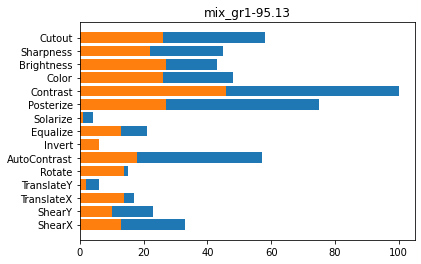

In [38]:
mix_gr2 = {"0": [[["Sharpness", 0.8508827126982523, 0.8666821509136803], ["Cutout", 0.4684739175103152, 0.3455205655537551]], [["Cutout", 0.883629813834529, 0.02799466115399102], ["Color", 0.6465320827467412, 0.06279333740657805]], [["ShearX", 0.6972953232633472, 0.29922982188683045], ["ShearX", 0.502371796938291, 0.40471899373282383]], [["Posterize", 0.5221801733378315, 0.40627797537780524], ["AutoContrast", 0.6694617113288137, 0.6650004428423513]], [["Rotate", 0.7565964093977136, 0.49542224710572047], ["AutoContrast", 0.5594427748398265, 0.4440097320740766]], [["Sharpness", 0.42245779977239595, 0.6441009614286084], ["Brightness", 0.32077967894423653, 0.5038951452910301]], [["Color", 0.31766715347645647, 0.047758825219522], ["AutoContrast", 0.5592815582473907, 0.028430105463280564]], [["Contrast", 0.44175249153473134, 0.4701480412814246], ["Posterize", 0.8996057084619415, 0.8197988813653865]], [["ShearX", 0.6555032755849662, 0.4999904146603779], ["AutoContrast", 0.5955727555469542, 0.6809447314264889]], [["AutoContrast", 0.3844139918471047, 0.22169632479795076], ["Equalize", 0.5087785410869476, 0.02594232257783846]], [["Sharpness", 0.5796692768565617, 0.9116040949629779], ["Cutout", 0.40583190102137623, 0.3448058797447623]], [["Cutout", 0.6923945866041337, 0.0795521659688723], ["Color", 0.702881473346738, 0.15495193973696025]], [["ShearY", 0.9503975309405317, 0.38868634220189524], ["ShearX", 0.6749983670066402, 0.6448306410126219]], [["Posterize", 0.7137490812804855, 0.601468826721302], ["Sharpness", 0.5338826579859854, 0.6651378201765359]], [["Rotate", 0.7455032773937057, 0.5301736983414174], ["AutoContrast", 0.39338504702816746, 0.2371637990542972]], [["Sharpness", 0.8584071624079551, 0.9878468482326191], ["Cutout", 0.7399842823109266, 0.39462314057555065]], [["Cutout", 0.885354986449967, 0.1727111184962823], ["Color", 0.6460452647452635, 0.0028015882707511765]], [["ShearY", 0.9774166654964688, 0.45363759434005896], ["ShearX", 0.5869498039771621, 0.49668863710762556]], [["Posterize", 0.5526096927395551, 0.7780455435518254], ["AutoContrast", 0.7597582403721672, 0.5945561753469938]], [["Rotate", 0.7787254509813386, 0.5097566279470525], ["AutoContrast", 0.42509506087351434, 0.4201740440716604]], [["Sharpness", 0.8648426242133204, 0.9998937032588554], ["Cutout", 0.6207703256929779, 0.3489543626920639]], [["Cutout", 0.8744391217803301, 0.0031333248634121125], ["Color", 0.6499016649321185, 0.0008646770849370863]], [["ShearY", 0.9593388953857259, 0.4012406102840707], ["ShearX", 0.588193430041897, 0.5089622563445568]], [["Posterize", 0.5416537621242712, 0.5300339032951642], ["AutoContrast", 0.7645458504175392, 0.5968479480938109]], [["Rotate", 0.7721350432469098, 0.5167521233404558], ["AutoContrast", 0.5675060755466816, 0.42048120779942644]], [["Sharpness", 0.9393531801199348, 0.9966080785396388], ["Cutout", 0.676630437977968, 0.2501672750833619]], [["Cutout", 0.9597347891514185, 0.024185439884357805], ["Color", 0.7427650545524429, 0.08521881162626155]], [["ShearY", 0.9149144419505735, 0.564052856599041], ["ShearX", 0.5120572771179026, 0.39109123365845244]], [["Posterize", 0.5311644157307115, 0.5425599844351339], ["AutoContrast", 0.7985523611649022, 0.5860103373668852]], [["Rotate", 0.8267699262151589, 0.4806537406063092], ["AutoContrast", 0.5733986710609985, 0.42763518029031494]], [["Color", 0.40724229473436546, 0.6158522519532363], ["Brightness", 0.310374757798365, 0.6867021517387055]], [["Color", 0.32367295659568335, 0.05126297015560675], ["AutoContrast", 0.307903949254974, 0.18320844964001812]], [["Contrast", 0.34238385196258736, 0.4685453414523724], ["Posterize", 0.9872653053194556, 0.912544669570738]], [["ShearX", 0.7746610920675907, 0.5929604168425926], ["Posterize", 0.6352212931173519, 0.7976663361996781]], [["AutoContrast", 0.36237824084679426, 0.04794985446087008], ["Equalize", 0.40153969785115673, 0.19231866327493838]], [["Sharpness", 0.8672309618000792, 0.9539933705393662], ["Cutout", 0.686806358893562, 0.4280184070206637]], [["Cutout", 0.9180366256843195, 0.08276845579642235], ["Color", 0.7167645617834469, 0.14547887052526914]], [["ShearY", 0.9306097597718793, 0.3545436355595158], ["ShearX", 0.5316502976394574, 0.519655784471587]], [["Posterize", 0.6044310620111271, 0.3755114086065405], ["AutoContrast", 0.7447463519025201, 0.598317743198087]], [["Rotate", 0.7661472514598271, 0.5151855379975816], ["AutoContrast", 0.719842805723869, 0.3373913337599639]], [["Sharpness", 0.8861312419254868, 0.9926607865205662], ["Cutout", 0.617461946975181, 0.3450082066231448]], [["Cutout", 0.8756793455834032, 0.005688591597765734], ["Color", 0.6416609258589864, 0.012429934443333773]], [["ShearY", 0.9494880410953398, 0.41328826380397543], ["ShearX", 0.5761326903158575, 0.42905493328900346]], [["Posterize", 0.5545398004110844, 0.515523124131572], ["AutoContrast", 0.7599775730711388, 0.48043921837196]], [["Rotate", 0.7731297337697858, 0.5538437006053027], ["AutoContrast", 0.5505770862230746, 0.39837034078251105]], [["Sharpness", 0.8812877097651548, 0.8591935604251807], ["Cutout", 0.4636455043681031, 0.3499800472321077]], [["Cutout", 0.874454466339394, 0.04866445218599197], ["Color", 0.6484346484696656, 0.04494109747549657]], [["ShearX", 0.7389242166282614, 0.3083321417223316], ["ShearX", 0.5287602437314595, 0.3982945230585076]], [["Posterize", 0.5187117810501385, 0.4257226592620914], ["AutoContrast", 0.6833210760639005, 0.6379524364430922]], [["Rotate", 0.6007401440974395, 0.49698320231680226], ["AutoContrast", 0.5599134947453372, 0.4306678941206657]], [["Color", 0.856366761728218, 0.9403783105397121], ["ShearY", 0.05658047041085451, 0.9593358333759754]], [["Brightness", 0.3542552379876589, 0.5383601299482583], ["AutoContrast", 0.7781904212172216, 0.6780506882012723]], [["Posterize", 0.9002053002777167, 0.7438643919060787], ["Brightness", 0.016187311634965063, 0.8345518908810268]], [["Contrast", 0.9317424582130163, 0.7516857867554726], ["Cutout", 0.43277472073623907, 0.1975560616310445]], [["Color", 0.039050379284075454, 0.9565752209369931], ["Sharpness", 0.9803724254871502, 0.7464234945340991]], [["Color", 0.6328630704652646, 0.9654979126062359], ["ShearY", 0.1423330099677007, 0.815917669182427]], [["Brightness", 0.32418586561800466, 0.4397438782660316], ["AutoContrast", 0.8087813984281482, 0.8081764928303043]], [["Posterize", 0.8860127284515744, 0.6660927545854776], ["Brightness", 0.31147719884561, 0.8483784057947571]], [["Contrast", 0.9278060077515246, 0.7526012070834276], ["Cutout", 0.37329500639482915, 0.16565210138070624]], [["Color", 0.43519874776378903, 0.8150520794862541], ["Sharpness", 0.9986002907737708, 0.9104852786684242]], [["Color", 0.6115580151496154, 0.9379227871653842], ["ShearY", 0.11856379750727955, 0.658948884529909]], [["Brightness", 0.3149351128017788, 0.38506058237383683], ["AutoContrast", 0.8089326103493997, 0.8140759276050693]], [["Posterize", 0.9511356577959755, 0.6600432683822677], ["Brightness", 0.31098921366136967, 0.8937248880416542]], [["Contrast", 0.6547928039766491, 0.7409540475112499], ["Cutout", 0.5251035074281093, 0.17914338104596184]], [["Color", 0.9878521336351629, 0.6226774845093813], ["Sharpness", 0.9993234409704889, 0.874513098735724]], [["AutoContrast", 0.4448177890476606, 0.9213806857752529], ["Cutout", 0.5985409909987794, 0.7273871118632814]], [["TranslateX", 0.20887965589614055, 0.46078342329359295], ["Posterize", 0.3604317367410312, 0.7370970669925611]], [["Color", 0.8944749796304782, 0.8936663474353379], ["Brightness", 0.029365203212553297, 0.6332494974929819]], [["Contrast", 0.9428284244276676, 0.47856297474676346], ["ShearY", 0.18997928030133426, 0.7400259228565224]], [["Contrast", 0.04007419228987455, 0.31407705458589963], ["AutoContrast", 0.8576789954311822, 0.669047115215747]], [["AutoContrast", 0.5327725069298885, 0.7747830581571672], ["Cutout", 0.5929510980858408, 0.7398693799315397]], [["TranslateX", 0.21250000026636523, 0.5778514755881918], ["Posterize", 0.35575584438109276, 0.7015301297474096]], [["Color", 0.9989956975082384, 0.9080967646730234], ["Brightness", 0.03010987140138749, 0.6329619349024105]], [["Contrast", 0.8514428472996541, 0.4797842571471665], ["ShearY", 0.19070707900624548, 0.4620634112986397]], [["Invert", 0.03925078261332343, 0.435731189293984], ["AutoContrast", 0.86134191091285, 0.5495451780873453]], [["Sharpness", 0.6189491241626768, 0.08510702849605573], ["ShearY", 0.15505022320888442, 0.7626049908549164]], [["Brightness", 0.02960116748951286, 0.5579688210458809], ["AutoContrast", 0.7995716782532672, 0.827850860762907]], [["Color", 0.9660306013580285, 0.6546998676332397], ["Sharpness", 0.3186948960761349, 0.8829956008110335]], [["Contrast", 0.6490197892679526, 0.7498712512558474], ["Cutout", 0.7541049790764034, 0.1640832615082226]], [["TranslateY", 0.8758788992379589, 0.5061291982775578], ["Posterize", 0.4662359967562566, 0.2833332708730922]], [["AutoContrast", 0.46196212084705585, 0.903980575430008], ["Cutout", 0.7335818285151027, 0.5597080831502207]], [["TranslateX", 0.2909054833712882, 0.6959564777598635], ["Posterize", 0.3137666391523525, 0.712673488873953]], [["Color", 0.942717135010897, 0.8696613833353184], ["Brightness", 0.13519193716019268, 0.6399800975135197]], [["Contrast", 0.8486233579330126, 0.44313167778313456], ["TranslateX", 0.1452298903472151, 0.3984653460146567]], [["Invert", 0.049269627933473725, 0.5508424122175746], ["AutoContrast", 0.8918825903310785, 0.32523982233346405]], [["ShearX", 0.6337016424736894, 0.5906476052781493], ["ShearY", 0.09404481103351119, 0.6356424807584868]], [["Brightness", 0.9667450879109633, 0.3574504158365112], ["Sharpness", 0.6349384625132314, 0.6578579137922738]], [["Contrast", 0.8620094858657038, 0.7449529107099475], ["Brightness", 0.1400322350846942, 0.7664923252601579]], [["Color", 0.6483095138447351, 0.7839010684529502], ["Posterize", 0.42984071631415494, 0.982860264496611]], [["Color", 0.49382044547544013, 0.9753353858471396], ["ShearY", 0.14004063520073953, 0.8097671564258392]], [["Brightness", 0.3375793486110519, 0.4356395715800105], ["AutoContrast", 0.8832097910448284, 0.7960646776282014]], [["Posterize", 0.880055693700705, 0.6730698577320369], ["Brightness", 0.23952543985452796, 0.84560038911847]], [["Contrast", 0.9233741893781119, 0.7799768164404466], ["Cutout", 0.3812410194945413, 0.113033840034783]], [["Color", 0.44370877933508235, 0.8111787726881485], ["Sharpness", 0.9972033555516868, 0.9041544656925083]], [["Contrast", 0.8820225678176827, 0.8111242360152038], ["ShearY", 0.0003762782508211354, 0.7175819255587679]], [["Brightness", 0.22652858176234958, 0.6640490510180106], ["AutoContrast", 0.32911583354331975, 0.9058437800480994]], [["Equalize", 0.8614622379472976, 0.6648421281140785], ["Sharpness", 0.4015998010426691, 0.617917748839375]], [["Contrast", 0.836401451829694, 0.5755453530916566], ["Posterize", 0.3629318365460863, 0.6275703765399362]], [["Color", 0.8922820259084349, 0.8897642590929526], ["Posterize", 0.27207229558384616, 0.5085483021138393]], [["Contrast", 0.050696132629050206, 0.7534175757831446], ["AutoContrast", 0.45378042060481144, 0.7554731125775638]], [["Brightness", 0.34858401336595324, 0.46782324515260365], ["Cutout", 0.6140725478870859, 0.14952046526017568]], [["Contrast", 0.8664137151879174, 0.4956313774769665], ["Cutout", 0.6557955283037877, 0.30132268459349487]], [["Equalize", 0.0008194275173091792, 0.8283983112949493], ["Color", 0.8625486525074715, 0.6878539296613561]], [["Posterize", 0.6515177522427997, 0.8178925008833132], ["ShearX", 0.960019936137916, 0.6093863645040924]], [["Contrast", 0.29887636319504457, 0.8670695868647741], ["Sharpness", 0.2840315688048973, 0.3769485626594202]], [["Color", 0.30538225945554126, 0.1678949675671988], ["Equalize", 0.45241736655879583, 0.31837972966920824]], [["Sharpness", 0.12601255731809619, 0.888329652783031], ["Contrast", 0.7682960676121517, 0.7656920906462477]], [["AutoContrast", 0.8586656818768862, 0.9978638475151652], ["Color", 0.5843341809501383, 0.8108148019585127]], [["Posterize", 0.7459799652415714, 0.759258342956771], ["TranslateX", 0.9348337440823034, 0.546057507302496]], [["Contrast", 0.026317153054251266, 0.7579604065557791], ["AutoContrast", 0.45326434114544406, 0.6748178725026329]], [["Brightness", 0.35380688623517564, 0.35434901460861123], ["Cutout", 0.618875980741025, 0.1133814145624765]], [["Contrast", 0.868254268602692, 0.890944429202994], ["Cutout", 0.6795517886184236, 0.5893558949949782]], [["Equalize", 0.00205395060092611, 0.9302914026538055], ["Color", 0.8644245174089353, 0.634243418603632]], [["Posterize", 0.7981900583380275, 0.8983236239881542], ["ShearX", 0.9632856185561518, 0.4705632568932302]], [["Contrast", 0.20721455396670374, 0.67101635210956], ["AutoContrast", 0.250122064947663, 0.6026676859632205]], [["Brightness", 0.5430990636146609, 0.2904687770377732], ["Cutout", 0.6262625648943012, 0.025605062274059717]], [["Contrast", 0.9744236324866813, 0.7965706202152358], ["Cutout", 0.682426484261061, 0.5082335568034645]], [["Equalize", 0.1816269549252255, 0.9012157525136829], ["Color", 0.9148235012377198, 0.90372305103604]], [["Posterize", 0.8008012135547019, 0.8320704147313127], ["ShearX", 0.8761605844706936, 0.4645085252949446]], [["Contrast", 0.3867540165516574, 0.766464949412357], ["Solarize", 0.01021636206847236, 0.5321839115490647]], [["Rotate", 0.4326315361750898, 0.4922152734879992], ["Equalize", 0.6066809340270776, 0.23943119850456182]], [["Brightness", 0.5240991438782086, 0.758366205194349], ["ShearY", 0.07815292256331961, 0.49484242149839236]], [["Cutout", 0.646358787185926, 0.011218508841724262], ["Color", 0.9702755600719205, 0.6010454625238573]], [["Sharpness", 0.253778882758213, 0.8586850313748228], ["AutoContrast", 0.6110543808248989, 0.5156552996019511]], [["TranslateX", 0.1293439769931699, 0.9680169812455863], ["AutoContrast", 0.558768693465324, 0.6414376945558935]], [["TranslateX", 0.6365143808382137, 0.5090318794971254], ["Posterize", 0.7068976838897325, 0.12124375957864825]], [["Brightness", 0.591592767844462, 0.4770190991906419], ["Posterize", 0.7415712564385317, 0.5046502447247389]], [["Contrast", 0.026254723438551772, 0.7305987202412233], ["Color", 0.925111881656218, 0.5600234760014494]], [["Posterize", 0.9189332294264898, 0.5596615186923395], ["Solarize", 0.8251400985618369, 0.9453897283206412]], [["TranslateX", 0.008480367042325465, 0.9693500643655972], ["AutoContrast", 0.5586784342258019, 0.7797789705101932]], [["AutoContrast", 0.39158526052890713, 0.580405572357213], ["Posterize", 0.8550903587222478, 0.23651238045924317]], [["Brightness", 0.675199893221346, 0.5208870759541382], ["Posterize", 0.4190433658477109, 0.5812347246749378]], [["Contrast", 0.018673148830267605, 0.27987542988583425], ["ShearX", 0.8421635461988278, 0.5688899794370842]], [["Posterize", 0.003068998823264779, 0.4453266561128445], ["Cutout", 0.8247636647785908, 0.8141681098935042]], [["Cutout", 0.30062791081087387, 0.6274153795213477], ["AutoContrast", 0.38948905962871994, 0.9127002970541855]], [["Rotate", 0.5215019042952259, 0.536696661305614], ["Posterize", 0.7929624908475625, 0.0025924213228644133]], [["ShearY", 0.6093404929330484, 0.6766353891681375], ["Posterize", 0.9966767528256231, 0.5047755585201009]], [["AutoContrast", 0.16788244705697733, 0.5509244397208449], ["ShearX", 0.9254092314535095, 0.5316823994149971]], [["TranslateX", 0.14018344836929947, 0.6043709045823594], ["Sharpness", 0.60148203117648, 0.8054384569739965]], [["TranslateX", 0.9896142833292216, 0.5432502207818134], ["Color", 0.4106571002163829, 0.7135280656810896]], [["Solarize", 0.1797617290102233, 0.6411251077794944], ["Contrast", 0.2105532245033701, 0.5391503130404707]], [["Posterize", 0.6421595989831456, 0.5442259675502676], ["Rotate", 0.06656296133165394, 0.3009558847771724]], [["Rotate", 0.13516245779854236, 0.20564729993586794], ["Color", 0.996427106032222, 0.6524619236840017]], [["AutoContrast", 0.007057636830853309, 0.5749216534374223], ["Posterize", 0.3689154772690223, 0.929294261478887]], [["Brightness", 0.8680597766154753, 0.49614432537629005], ["Contrast", 0.06121114134168835, 0.683304619229339]], [["AutoContrast", 0.2979752010700592, 0.8275098840885362], ["Equalize", 0.3223376109445621, 0.6515202715153955]], [["Equalize", 0.4144332062368056, 0.5419581073540964], ["AutoContrast", 0.22640535603617545, 0.6334927694798025]], [["Cutout", 0.8856881170110169, 0.350859213009964], ["Sharpness", 0.3664092045656265, 0.6221398141131192]], [["ShearX", 0.15912829681780144, 0.0862103331391359], ["AutoContrast", 0.6487108447691434, 0.2282018891710938]], [["ShearX", 0.12250303624456599, 0.14298439348048012], ["Posterize", 0.29641786130457437, 0.15527771969397627]], [["Cutout", 0.8484899314401272, 0.31121955803454676], ["ShearX", 0.7552269791846892, 0.524110237307445]], [["AutoContrast", 0.19961127313831128, 0.30538378289278156], ["Posterize", 0.8299941752003616, 0.9189609376997938]], [["Invert", 0.11319805602338064, 0.07163293810469953], ["Brightness", 0.6965698589035724, 0.5250431686450124]], [["Color", 0.45535535076516387, 0.49486549189687334], ["Contrast", 0.8339746824924632, 0.5012678089237229]], [["Posterize", 0.23060873412781865, 0.417900253833007], ["Posterize", 0.46191027578425925, 0.0464694898442848]], [["Cutout", 0.7970747399711401, 0.32995349660052703], ["Brightness", 0.6407930908761722, 0.4318578245014565]], [["Cutout", 0.30226703564810886, 0.0644378330223104], ["Posterize", 0.7887778700010399, 0.7236654037737478]], [["Contrast", 0.368923564117522, 0.3006201307551205], ["Contrast", 0.7398357623216917, 0.9453690448739775]], [["Color", 0.6339820596074983, 0.37653045198556273], ["Contrast", 0.906106340008697, 0.8384453751685577]], [["ShearX", 0.12060521755379318, 0.23199176077323055], ["Posterize", 0.3028312687457993, 0.1401622263826812]], [["Cutout", 0.8917119331072514, 0.31070999559305845], ["ShearX", 0.6401309228312178, 0.5550006279007682]], [["AutoContrast", 0.20915011650966286, 0.20567298652806348], ["Posterize", 0.7990084005411072, 0.9401286905457908]], [["Invert", 0.11729552649703917, 0.007019163177091559], ["Brightness", 0.5793912639793102, 0.8534671690937985]], [["Color", 0.443423362434751, 0.633301629505996], ["Contrast", 0.8633912235540597, 0.7448050046569206]], [["ShearX", 0.13313474147369306, 0.14035191201341254], ["Posterize", 0.2982540625918509, 0.15123611336796822]], [["Cutout", 0.8436014685815647, 0.3757271044199592], ["ShearX", 0.8013892154490427, 0.5320528275393551]], [["AutoContrast", 0.14794973696995972, 0.34640006526599043], ["Posterize", 0.8253255781499951, 0.922983393754635]], [["Invert", 0.11251959338238926, 0.05355140682181768], ["Contrast", 0.6901528757716054, 0.31740356698900857]], [["Color", 0.3281795932717152, 0.4828621610826456], ["Contrast", 0.8377477041370249, 0.5068888633921407]], [["AutoContrast", 0.00739562827599452, 0.29438177087911754], ["Cutout", 0.40154200753618025, 0.26625878869598874]], [["Rotate", 0.5439648474978902, 0.5523044757877897], ["Cutout", 0.3334137245865039, 0.5951232273889011]], [["Brightness", 0.20672979805926295, 0.10477681509480645], ["Color", 0.7239132655181987, 0.19081607475472084]], [["Contrast", 0.32115582195744174, 0.3848192774117368], ["Contrast", 0.7820400174865906, 0.5938691968001653]], [["Posterize", 0.42332094490408195, 0.19009121468513285], ["Contrast", 0.7340156458839645, 0.4145405098608406]], [["AutoContrast", 0.19908391580462265, 0.14369269032957194], ["ShearX", 0.8606260634624187, 0.5513397473163876]], [["Color", 0.7188194333551936, 0.2524669863386738], ["ShearY", 0.4051317209066203, 0.36237328713559436]], [["Cutout", 0.7851651839488849, 0.14647167088657934], ["Contrast", 0.7934197068480473, 0.3568923176594806]], [["Cutout", 0.12243024934072155, 0.46904244892651387], ["ShearX", 0.531015898052939, 0.49015808122804166]], [["Posterize", 0.6524254204751732, 0.36504867124342444], ["TranslateY", 0.4470385706393382, 0.6635229367559545]], [["ShearX", 0.010749281473187926, 0.10243928540362171], ["Posterize", 0.13783524275011444, 0.1275663166000813]], [["AutoContrast", 0.9758440305921395, 0.4770024579887559], ["ShearX", 0.8295026777005614, 0.4548996392423382]], [["AutoContrast", 0.1919352584958089, 0.5826182483719153], ["Posterize", 0.8219936479541357, 0.8600888125241685]], [["Invert", 0.19325365311097764, 0.8235627904152034], ["AutoContrast", 0.7061757534442031, 0.5719967095253515]], [["Color", 0.19201896372581384, 0.3526653661497626], ["Contrast", 0.48932334580313386, 0.44487671279157537]], [["Color", 0.27006306886433795, 0.2853896311756283], ["ShearY", 0.4874325657208957, 0.36877663780354086]], [["TranslateY", 0.7476216107919863, 0.3926803307939536], ["ShearX", 0.6700553230717835, 0.4781421156534883]], [["Brightness", 0.06335040638349404, 0.22936445643441253], ["Sharpness", 0.6769612126090084, 0.6288991122048879]], [["Posterize", 0.48940811010542756, 0.6041919459217931], ["Brightness", 0.9722521587071535, 0.5567398249149238]], [["Sharpness", 0.4792480632573531, 0.4771366045494203], ["Brightness", 0.36005610598478704, 0.4547330438233739]], [["Cutout", 0.2693259821539879, 0.3419784497415781], ["Posterize", 0.0005900606027509081, 0.6432131592239931]], [["Sharpness", 0.319703555346891, 0.17770258975402675], ["Equalize", 0.6994488132051409, 0.0960272081179417]], [["Equalize", 0.05174766448464187, 0.23442865754771486], ["Brightness", 0.6605534768696322, 0.63128985799065]], [["Cutout", 0.5565549402534979, 0.6229722559917354], ["Color", 0.8706913703145045, 0.820459037039191]], [["AutoContrast", 0.7203469440106108, 0.6429086416787639], ["Sharpness", 0.3437952523773411, 0.45067395900147167]], [["Brightness", 0.4938832258150116, 0.5424306245458819], ["Equalize", 0.2181651006794456, 0.568012853691158]], [["Posterize", 0.06994875064151532, 0.1885025362605949], ["Equalize", 0.7035598583358192, 0.08160523620343252]], [["Equalize", 0.07787095170806457, 0.3560163154742337], ["Posterize", 0.8756924614725214, 0.8035744885426717]], [["ShearX", 0.7397284287287542, 0.569426491196109], ["Color", 0.5877402989530544, 0.9225030630623088]], [["ShearY", 0.29604188922002983, 0.8505689392226223], ["Posterize", 0.5789465249826697, 0.3875814054418625]], [["Sharpness", 0.10243811805936046, 0.8025915567477496], ["Sharpness", 0.009835642786293786, 0.5241304334033914]], [["Contrast", 0.2392729682119938, 0.22392467866203203], ["TranslateY", 0.6508145106930682, 0.4291550645171189]], [["Posterize", 0.14663109455489298, 0.3874994923471682], ["ShearY", 0.4857866978440526, 0.49011669743863917]], [["Sharpness", 0.022297409723850557, 0.219550253434318], ["Cutout", 0.9038830509117443, 0.010642530801633757]], [["Cutout", 0.5490283627031055, 0.31774726275640724], ["Posterize", 0.7460506281820872, 0.0015390640244274945]], [["Brightness", 0.09585638713101284, 0.7249566504929333], ["Posterize", 0.8252137912967329, 0.9615397564378865]], [["Equalize", 0.3473645107115879, 0.36963910691226753], ["Posterize", 0.968186292633472, 0.7154391136476279]], [["TranslateX", 0.057908611608246896, 0.15673590659139036], ["Sharpness", 0.7905640640823999, 0.20689192896085895]], [["Sharpness", 0.1971221901622311, 0.0005980008597871872], ["Cutout", 0.8141134860751905, 0.29744499110633915]], [["Cutout", 0.5780042293686202, 0.20561161877117828], ["Posterize", 0.6842606428697398, 0.4830240128602377]], [["Brightness", 0.028874081653295025, 0.888937602751947], ["Posterize", 0.7294571985696874, 0.5839260114314179]], [["Brightness", 0.5536485814982295, 0.2367567736424664], ["Contrast", 0.7553674884758054, 0.6425201682968112]], [["TranslateX", 0.20057608524292164, 0.11874765558537531], ["Sharpness", 0.356755524039854, 0.14030716286458256]], [["Sharpness", 0.006230941454689946, 0.09101287886815139], ["Cutout", 0.7715322503256284, 0.09075330706919582]], [["Cutout", 0.6720021358371151, 0.3225296595358844], ["Posterize", 0.8888076963375914, 0.06875189689497507]], [["Brightness", 0.12036830941659896, 0.7450346818310728], ["Posterize", 0.9689787967605896, 0.44976245426264627]], [["Equalize", 0.25868767290767425, 0.370665392960968], ["Posterize", 0.5498228875945895, 0.8587267663601785]], [["TranslateX", 0.010949554333569506, 0.0010405056572135307], ["Sharpness", 0.9676572753207959, 0.17742894100706327]], [["Sharpness", 0.014836418850515218, 0.002841008291293412], ["Cutout", 0.7693892724226068, 0.08127121880718041]], [["Cutout", 0.7430250107221708, 0.40198858839835866], ["Posterize", 0.8847340755057977, 0.29889293065092104]], [["Brightness", 0.20925456280334775, 0.7473755649891234], ["Posterize", 0.9791556534830832, 0.45515925054663015]], [["Equalize", 0.2622743647713474, 0.43344416331339763], ["Posterize", 0.6031914550567711, 0.8480622022620982]], [["TranslateX", 0.015606039133799265, 0.0738598400341324], ["Sharpness", 0.9461294071010734, 0.17473997655881773]], [["ShearY", 0.040444324003957866, 0.6421081433958895], ["Posterize", 0.8655275852344542, 0.2509236190388897]], [["ShearY", 0.722764506431133, 0.5251672867953258], ["Sharpness", 0.849963548339329, 0.7845132939682824]], [["Rotate", 0.27321582965451585, 0.5838236560235188], ["Sharpness", 0.7828856594131539, 0.5471360945479196]], [["ShearX", 0.4373229909865074, 0.08449727238166482], ["Sharpness", 0.31197870076977435, 0.5348837971026904]], [["Brightness", 0.10267386752539107, 0.2352739839701274], ["TranslateY", 0.20724000025879358, 0.2816892951468734]], [["Sharpness", 0.05106268014670326, 0.1259079505660169], ["Cutout", 0.9078818859329554, 0.07192083770800012]], [["Cutout", 0.5941181465995502, 0.23294555069024359], ["Posterize", 0.8397733369974518, 0.3175740837586417]], [["Brightness", 0.09128539219887347, 0.999607133569353], ["Posterize", 0.8299908542927297, 0.7510745529502736]], [["Equalize", 0.34030644324854764, 0.25823331509981623], ["Posterize", 0.8191186303944143, 0.7250376424382077]], [["TranslateX", 0.02500354638716651, 0.11765646116252546], ["Sharpness", 0.7966193506731338, 0.15962113268489697]], [["ShearX", 0.19005522050886067, 0.04082807358874163], ["Color", 0.8390628416698134, 0.38354437079140496]], [["Equalize", 0.12202636323323274, 0.06656747884562714], ["Color", 0.7865583111500551, 0.42923348267644035]], [["Posterize", 0.004534187177176826, 0.9999599660519701], ["Color", 0.394438783847716, 0.6965383928520564]], [["Brightness", 0.42681803792278705, 0.1456149733807985], ["TranslateX", 0.7722620013664147, 0.535244561360752]], [["Rotate", 0.7552035324943791, 0.4824246302518197], ["AutoContrast", 0.29685885435131565, 0.9771349848276332]], [["Posterize", 0.44154988583506644, 0.4751827735574986], ["Cutout", 0.7063925798682883, 0.6001814899323517]], [["Sharpness", 0.3004263744852211, 0.24961183807471604], ["AutoContrast", 0.3575393777339997, 0.7915338137249421]], [["Contrast", 0.019260013847282098, 0.8672653054189591], ["Solarize", 0.3610166460893075, 0.505601255960455]], [["Brightness", 0.6523058733790157, 0.6084126088594017], ["Contrast", 0.38259693389534527, 0.5188381386574878]], [["Color", 0.4881336312929146, 0.40759342982373903], ["TranslateY", 0.3691640159523081, 0.6284031568339608]], [["Sharpness", 0.10146518039812308, 0.020767753081086065], ["Cutout", 0.7053455765358045, 6.691156962354387e-05]], [["Cutout", 0.7313118553249041, 0.39536394087626886], ["Posterize", 0.6482470140363912, 0.10008397701488142]], [["Brightness", 0.05935428061865617, 0.6628289330256092], ["Posterize", 0.8394562003785982, 0.17277407847826615]], [["Equalize", 0.24194963451030954, 0.43455169376463676], ["Posterize", 0.6038850986150632, 0.8415987953385683]], [["TranslateX", 0.11154059395131058, 0.0640278314108942], ["Sharpness", 0.9227746015148641, 0.10167410648581596]]], "1": [[["Invert", 0.08411910782648885, 0.6176791529301551], ["Sharpness", 0.903335252477145, 0.37625927959964595]], [["Sharpness", 0.06743269226955469, 0.44380384493006153], ["Cutout", 0.927380722416457, 0.558276048843195]], [["Invert", 0.08692139675173978, 0.06737934824166832], ["ShearY", 0.49898804658610824, 0.530509431023752]], [["Contrast", 0.7297896265535316, 0.9132619130230005], ["Color", 0.884284010328622, 0.6069263615088478]], [["Cutout", 0.7157456486985603, 0.7426695833052898], ["Sharpness", 0.9412367035173229, 0.22712842372438763]], [["Invert", 0.02097739580007718, 0.5219623218578889], ["Sharpness", 0.9091940024606366, 0.36518817581182833]], [["Sharpness", 0.08031245177858218, 0.5365880922719557], ["Cutout", 0.6748552328448498, 0.5475936516075087]], [["Invert", 0.07081474904893417, 0.14056199173482917], ["ShearY", 0.5040355632031467, 0.5325308149145555]], [["Contrast", 0.5998862697137954, 0.7914162559936913], ["Color", 0.9777360069619275, 0.5642756158135103]], [["Cutout", 0.5045622823918636, 0.7358772503060765], ["Sharpness", 0.987020974591267, 0.263966437182877]], [["Invert", 0.006356509413985301, 0.42737063709936857], ["Sharpness", 0.7499032360137133, 0.3658260838017553]], [["Sharpness", 0.09388114218582021, 0.5649393851601517], ["Cutout", 0.637489891625119, 0.5400832288536889]], [["Invert", 0.13248615273337822, 0.1465820362818984], ["ShearY", 0.3092922142545982, 0.6212610977011642]], [["Contrast", 0.6674742893451056, 0.7336832265935491], ["Color", 0.7746902764498302, 0.5763904016407733]], [["Cutout", 0.4999759444881636, 0.7817436949269428], ["Sharpness", 0.9713757936811181, 0.3522562612468706]], [["Invert", 0.002712402887980414, 0.5307671573527197], ["Sharpness", 0.7666898266815363, 0.41009312981867424]], [["Sharpness", 0.012031540212350872, 0.588333621543521], ["Cutout", 0.7225946752847117, 0.5172898671197068]], [["TranslateX", 0.05743961228875215, 0.16029831108280052], ["ShearY", 0.1962576633967899, 0.5546331188240519]], [["Contrast", 0.7886167838996344, 0.8584575993263612], ["Color", 0.9739701414853139, 0.48643519130597407]], [["Cutout", 0.624045980872229, 0.7102076817552948], ["Sharpness", 0.9613128221374712, 0.04394651820294054]], [["Invert", 0.03792499056586986, 0.4424926550035956], ["Sharpness", 0.9909259295988412, 0.3342601318574474]], [["Sharpness", 0.16039408762695706, 0.403913814202691], ["Cutout", 0.9273770947921607, 0.6416079783953357]], [["Equalize", 0.10777523493231694, 0.13207747330034397], ["ShearY", 0.6993060812249777, 0.4979463453648832]], [["Contrast", 0.6572118740266969, 0.9623098690244178], ["Color", 0.7764475668424183, 0.44574526772031364]], [["Cutout", 0.8692912730151203, 0.7829049154985461], ["Sharpness", 0.8852760277186541, 0.11173071098563]], [["Invert", 0.31691435205699997, 0.5300604604843858], ["Sharpness", 0.7761410381098769, 0.4343045392195517]], [["Sharpness", 0.007140467838643954, 0.5926269370864228], ["Cutout", 0.6036755445175543, 0.6995542423727255]], [["Invert", 0.052943818945160315, 0.227648639347643], ["ShearY", 0.3908669543840184, 0.5528573388700472]], [["Contrast", 0.5081881725568007, 0.8536097016695778], ["Color", 0.9707551621390268, 0.5769746573012129]], [["Cutout", 0.5153143164177831, 0.7223118129508392], ["Sharpness", 0.3612546091518994, 0.04887541365930026]], [["Invert", 0.15417556549981065, 0.7938668119997387], ["Sharpness", 0.8069970385573781, 0.6615143645770437]], [["Sharpness", 0.1404361007182091, 0.6073924453469629], ["Cutout", 0.7507609205612233, 0.41620363802845284]], [["TranslateY", 0.0038693432333368333, 0.04400508390831981], ["ShearY", 0.38653863340653605, 0.4741781372793663]], [["Contrast", 0.9248096614966695, 0.8395218040784144], ["Color", 0.9595278408618626, 0.38168994861480776]], [["Cutout", 0.5199763830173054, 0.7196781306139852], ["Sharpness", 0.9255248307388708, 0.14876309394669418]], [["Invert", 0.0384165422692095, 0.4779843027016398], ["Sharpness", 0.8609449963101135, 0.2843588826579628]], [["Sharpness", 0.0380425114460667, 0.39942220383981053], ["Cutout", 0.9777089693002168, 0.6358635608157784]], [["Invert", 0.10803941746784985, 0.1345598325604085], ["ShearY", 0.5135476248143301, 0.6655198217212828]], [["Contrast", 0.60263094017948, 0.9588172315068128], ["Color", 0.6943369928546005, 0.6529091676927377]], [["Cutout", 0.4192366386313283, 0.5150436462298619], ["Sharpness", 0.8767312435653183, 0.10674659158807187]], [["Invert", 0.0061006208729976336, 0.4176755028353381], ["Sharpness", 0.9416334497586305, 0.49224841357227034]], [["Sharpness", 0.0912490423311238, 0.7524951140774168], ["Cutout", 0.9005632815738455, 0.5015452347665676]], [["Brightness", 0.12596011188337577, 0.07563617666652939], ["ShearY", 0.7457814585736192, 0.38392980011508426]], [["Contrast", 0.9368980907415007, 0.7334656792927091], ["Color", 0.8793663873442003, 0.4111822043351632]], [["Cutout", 0.5044399938340962, 0.8317260516621857], ["Sharpness", 0.9817756823250906, 0.03863285105325004]], [["Invert", 0.06829977574699692, 0.4557212370164797], ["Sharpness", 0.8997319265856829, 0.3821838709130573]], [["Sharpness", 0.27404341815868055, 0.49405780203140004], ["Cutout", 0.9863198907820379, 0.48715488468863455]], [["Color", 0.23749878966509516, 0.0852634190039369], ["ShearY", 0.30744247053570484, 0.4138587103646296]], [["Contrast", 0.6663415216105543, 0.7744706730537038], ["Color", 0.8839529569014448, 0.5093653601804784]], [["Cutout", 0.4078529751568566, 0.6559129012992548], ["Sharpness", 0.8746632568023572, 0.36514693712471186]], [["Sharpness", 0.47193708589315697, 0.4905470891207082], ["Color", 0.2967196061608095, 0.3008868543635099]], [["Sharpness", 0.6445468032811679, 0.020623207725385805], ["ShearY", 0.5069153782513808, 0.5602131174969269]], [["Cutout", 0.7523429686319516, 0.4529799461581189], ["AutoContrast", 0.2922963124384721, 0.41034163236520527]], [["Color", 0.5983499637407315, 0.04289849761530978], ["TranslateY", 0.41692920914806997, 0.5425645790111219]], [["Invert", 0.4265897918204615, 0.23270474232284782], ["Brightness", 0.5321822381856548, 0.3736320353222824]], [["Sharpness", 0.8586617396794736, 0.049630026835120244], ["Invert", 0.03719429849518702, 0.31523061686809845]], [["Brightness", 0.3856709450544904, 0.6166945228728993], ["Color", 0.7760097955521372, 0.8056536590812969]], [["AutoContrast", 0.9781754074757112, 0.7656694310784943], ["AutoContrast", 0.09738762793826011, 0.9718823429944567]], [["ShearY", 0.4629032618092833, 0.4389543360393596], ["Rotate", 0.05378174842913641, 0.5686056018734994]], [["Invert", 0.46058616345787673, 0.08230227672264526], ["Brightness", 0.04115810754733237, 0.2502888805506141]], [["Sharpness", 0.6454270522058546, 0.5437575026367703], ["Invert", 0.04543564804283454, 0.3344948889329876]], [["Sharpness", 0.5813837281294281, 0.051525005444932936], ["ShearY", 0.6317863795922405, 0.5715966554407494]], [["Cutout", 0.9266834225142989, 0.573065241917743], ["AutoContrast", 0.14579479639496468, 0.6205714109204173]], [["Sharpness", 0.6148406257575691, 0.5572338810489592], ["Posterize", 0.37115704652159176, 0.41453269498382517]], [["AutoContrast", 0.748900228206099, 0.5961497451084564], ["Contrast", 0.5604816037434733, 0.4824440532171639]], [["Color", 0.7742210034365969, 0.6420295905972135], ["Brightness", 0.5703717836673825, 0.4040967516390618]], [["Cutout", 0.7833789928859812, 0.251940854246813], ["Cutout", 0.30989310028357675, 0.7225395757876544]], [["TranslateY", 0.7367093299459607, 0.5152605168558754], ["Posterize", 0.3132421557886458, 0.9698461643395122]], [["Color", 0.485176861888807, 0.4215897481257633], ["TranslateX", 0.5323565649063002, 0.24782949879193156]], [["Sharpness", 0.4702419578158322, 0.3236763366945847], ["Cutout", 0.000842922584800789, 0.46761389144795495]], [["Sharpness", 0.8256029476856312, 0.17854722525621702], ["Invert", 0.27187633330168065, 0.31907795887922874]], [["Brightness", 0.581200867570886, 0.6354374235677234], ["Color", 0.7823587757142867, 0.5929320104014184]], [["AutoContrast", 0.7621885115660019, 0.7692343899149165], ["AutoContrast", 0.3238532261924369, 0.8800425572647393]], [["ShearY", 0.5256714076574958, 0.4507376001999339], ["Rotate", 0.16930029019432735, 0.5705040693236292]], [["Invert", 0.4602613399050094, 0.46411216070000577], ["Brightness", 0.12631194556151207, 0.24794335926305078]], [["Posterize", 0.33454976442639944, 0.10858226694483183], ["TranslateX", 0.3015875520747312, 0.29150098491206505]], [["Color", 0.731889074193831, 0.17495961345590705], ["Brightness", 0.5235688719074039, 0.4936357785031851]], [["Color", 0.647642511373919, 0.5212732773536068], ["TranslateY", 0.35399314842485763, 0.480227922315584]], [["ShearY", 0.8762455517423398, 0.39983408344231275], ["Rotate", 0.013802285432770674, 0.37807652150130056]], [["Color", 0.9280149532917578, 0.27757523253701216], ["Invert", 0.24426082020593884, 0.3869754041602459]], [["Sharpness", 0.6043724800139384, 0.3733751778068182], ["ShearY", 0.31591103646690577, 0.7334158150449248]], [["Cutout", 0.3399332686940063, 0.7775048175966467], ["TranslateX", 0.009429333957389013, 0.9598623400047833]], [["Invert", 0.5396055607834603, 0.6250351230819134], ["Contrast", 0.45602645706769157, 0.09335967831867159]], [["Sharpness", 0.8958138122631519, 0.6240828524582531], ["Contrast", 0.16816032648287987, 0.6599918307831686]], [["Sharpness", 0.9099328576223007, 0.5413109163002743], ["Invert", 0.26479613966948296, 0.3666953452846173]], [["Brightness", 0.5146908890093707, 0.6473635507385926], ["Color", 0.9797763572006365, 0.8981655981904082]], [["AutoContrast", 0.9946674553751247, 0.8572841310984715], ["AutoContrast", 0.21206976832466629, 0.9943687968370152]], [["ShearY", 0.36901605900355283, 0.4501668466818943], ["Rotate", 0.126961136761359, 0.9512843819460215]], [["Invert", 0.3483755529525853, 0.6709021443375146], ["Brightness", 0.2214648728062051, 0.27824799559770375]], [["Color", 0.9362654016310908, 0.8159077528653904], ["ShearY", 0.9158826446014977, 0.48000503174673054]], [["Contrast", 0.7548755949499478, 0.7267147987732532], ["TranslateX", 0.12123252510561248, 0.5215914902418541]], [["Solarize", 0.38480543203832507, 0.7458525015520843], ["TranslateY", 0.0779817914385713, 0.7830626602114338]], [["Equalize", 0.003121984658624344, 0.5266738984217789], ["AutoContrast", 0.7725056382791704, 0.6040198500896481]], [["ShearY", 0.7167689901953189, 0.5255408494653214], ["Contrast", 0.1454019442452601, 0.7251295029477834]], [["Sharpness", 0.8165636842037693, 0.2737957016411036], ["Invert", 0.1429444739352112, 0.25681863994795484]], [["Brightness", 0.580806217500057, 0.5350607727479006], ["Color", 0.8024586949437484, 0.5923235601015242]], [["AutoContrast", 0.8806659998761537, 0.8305642127931573], ["AutoContrast", 0.17000113960496688, 0.9175757724372877]], [["ShearY", 0.5235539797028815, 0.18678275910426262], ["Rotate", 0.001539840114631541, 0.6131380054699288]], [["Contrast", 0.48339379431414836, 0.47782130342478746], ["Brightness", 0.00034000620804265137, 0.19501162154781299]], [["Sharpness", 0.44680377947980054, 0.1309359233030891], ["Sharpness", 0.1827404974193442, 0.9664399223177762]], [["ShearY", 0.1651410155080357, 0.5576691044429597], ["Cutout", 0.7092894400413304, 0.6509391903924254]], [["ShearX", 0.06053927212794827, 0.695829042626827], ["Color", 0.18030216019287004, 0.28592143332812614]], [["Sharpness", 0.05962365146970587, 0.27393274621647035], ["ShearY", 0.2246464620414244, 0.3668829044989575]], [["Posterize", 0.5155971227198587, 0.42085059686822274], ["ShearY", 0.25000280243159123, 0.7239149641172187]], [["ShearY", 0.041728136320339566, 0.6704464470814061], ["Rotate", 0.23134639318303438, 0.49034510139693843]], [["Contrast", 0.5172562333115311, 0.3549312190655126], ["Rotate", 0.624041473640818, 0.5126274590007631]], [["Cutout", 0.7632984490240313, 0.6555562803042507], ["Cutout", 0.03539661026612176, 0.45063634056760454]], [["Sharpness", 0.07010740838954728, 0.20446737664133194], ["Posterize", 0.05502907727705042, 0.11537147674897709]], [["Cutout", 0.0953743574090819, 0.8763696567943865], ["Color", 0.2644657190994867, 0.6092288272525934]], [["Rotate", 0.0005488503373363707, 0.41934431683092305], ["Sharpness", 0.019084011683185447, 0.6059152504381029]], [["Cutout", 0.8043007177976864, 0.25942214393652985], ["Posterize", 0.5201532764291465, 0.30699030004637673]], [["Sharpness", 0.9931178801138311, 0.537925600718097], ["Contrast", 0.29585016524246005, 0.3583972508942249]], [["ShearY", 0.087902915835001, 0.4646225306008756], ["Posterize", 0.007424369603423409, 0.022552318348750988]], [["Invert", 0.1971421684303088, 0.9538067065149494], ["Contrast", 0.15708488825347125, 0.5015447539571962]], [["Rotate", 0.14041373445497746, 0.4042009033083294], ["Sharpness", 0.008606373607485451, 0.617803758097792]], [["Cutout", 0.8071578754178924, 0.35079156303439274], ["Posterize", 0.5319269358118991, 0.31299419843197374]], [["Sharpness", 0.7997084714135959, 0.5327946547041271], ["Contrast", 0.3060570236507138, 0.38766937629293385]], [["ShearY", 0.13472917885143315, 0.4449001032481766], ["Posterize", 0.0003769497878399336, 0.014407016046823345]], [["Invert", 0.10254911930124114, 0.8925616029415413], ["Contrast", 0.08451233587980145, 0.5434902529825514]], [["Contrast", 0.061405570871877785, 0.49643200116131747], ["ShearX", 0.16299751574153676, 0.6054548147913995]], [["AutoContrast", 0.8764601206790178, 0.25572420956793107], ["Posterize", 0.5076982916523585, 0.1316936054552772]], [["Sharpness", 0.8316098494478898, 0.3259020950172018], ["Contrast", 0.4131460736780105, 0.6298904437047875]], [["Invert", 0.14943323642739956, 0.7000647031716108], ["Contrast", 0.3236614239112869, 0.4560449388704585]], [["ShearY", 0.238020383208059, 0.21749571150755925], ["Sharpness", 0.1604613164873356, 0.9575004999722012]], [["ShearY", 0.38836879331886004, 0.5541359759233715], ["Cutout", 0.584363049863514, 0.5772997112946062]], [["Brightness", 0.0287401428504242, 0.9093135779518219], ["Color", 0.26444881023827205, 0.1733303403343059]], [["Sharpness", 0.20924973284786252, 0.20560185811727733], ["ShearY", 0.06951848823728096, 0.31288118356752376]], [["Posterize", 0.8870338010512939, 0.7115879472620242], ["ShearY", 0.08984976979140696, 0.6204432707468233]], [["ShearY", 0.044914696011695204, 0.6647946944897791], ["Sharpness", 0.033057278549049884, 0.8355799338461787]], [["Cutout", 0.49935573079366957, 0.3811329839572858], ["Cutout", 0.7230319317214612, 0.7412146608080563]], [["Cutout", 0.768743292545472, 0.5845814429036427], ["Color", 0.12086894051225497, 0.32103001324031266]], [["Sharpness", 0.022983762059864327, 0.04938566561252547], ["Rotate", 0.14522089967845997, 0.22414903415000254]], [["Cutout", 0.12560767524823147, 0.8724854109167168], ["ShearY", 0.05727516734427172, 0.6885680751413108]], [["Brightness", 0.09170550945882588, 0.7981906948687272], ["Rotate", 0.24809594245526698, 0.511563414662198]], [["Contrast", 0.8810044928681698, 0.24541537379994538], ["Rotate", 0.6494042271690391, 0.4841309607339109]], [["Posterize", 0.46158478995441976, 0.3530934504430674], ["Cutout", 0.029589000842131764, 0.421481061830388]], [["Rotate", 0.004543847927326691, 0.5376402518936678], ["Posterize", 0.0951461429685925, 0.09209653443298099]], [["Rotate", 0.1102490214952148, 0.886796920617617], ["Color", 0.29783654066451504, 0.5312537647516606]], [["Posterize", 0.41124615192700587, 0.3313708203924898], ["TranslateX", 0.08724811593416126, 0.7889857034623398]], [["Brightness", 0.2750172331643522, 0.6946023191570304], ["Cutout", 0.15575829255807605, 0.7495155214858152]], [["Sharpness", 0.10086595046367341, 0.9339103814987931], ["Color", 0.5291264782439643, 0.022253119732757787]], [["ShearY", 0.44971946093198567, 0.34335243478018074], ["ShearY", 0.03399082987008184, 0.427769438582305]], [["Posterize", 0.38541273320691183, 0.43019342658474], ["ShearY", 0.49223849888489324, 0.6210403145613963]], [["Rotate", 0.17185457428869857, 0.26854458276789206], ["Sharpness", 0.049707973417162585, 0.8333727061397699]], [["Cutout", 0.44899399948878205, 0.6027377835120156], ["Cutout", 0.14019202844438777, 0.7388157036364525]], [["Sharpness", 0.9555143325649194, 0.5849670537855167], ["Color", 0.39528395315322357, 0.27910184941470273]], [["ShearY", 0.12446377087811059, 0.38919734181139204], ["Rotate", 0.12305679888959405, 0.21542670243452577]], [["Invert", 0.31505171889663947, 0.9326920644089007], ["ShearY", 0.01515310286571303, 0.6313173062467905]], [["Invert", 0.242871671320454, 0.30077884523081627], ["Posterize", 0.5682297157673789, 0.5176672595829639]], [["Brightness", 0.6263923950276756, 0.3540097763949869], ["ShearY", 0.00249197180566052, 0.35467751410055304]], [["TranslateX", 0.1814364334936533, 0.6537559058758321], ["TranslateY", 0.033960574347104755, 0.4277664010003689]], [["Contrast", 0.2850099752062299, 0.4080319268130783], ["ShearX", 0.17914145717205093, 0.5153032314548576]], [["Invert", 0.07790330715580462, 0.451909406728936], ["Color", 0.2912114632564149, 0.6773741526528821]], [["Invert", 0.2134648245974643, 0.4378648678806421], ["Posterize", 0.793909402943262, 0.5069173210938563]], [["Brightness", 0.6611996190056662, 0.3585423583962541], ["ShearY", 0.006854301969866056, 0.3553670233337771]], [["TranslateX", 0.18324297051501293, 0.6330998283766655], ["TranslateY", 0.033061155588510346, 0.5181119428913433]], [["Contrast", 0.2990448229516195, 0.5111162126246206], ["ShearX", 0.02293591484731075, 0.14413482173237088]], [["Invert", 0.048051648602874905, 0.38898204282525145], ["Color", 0.34837428036151247, 0.5375872354394711]], [["Invert", 0.16138271097443668, 0.39399412272460543], ["Posterize", 0.504658538193079, 0.5753195303942448]], [["Brightness", 0.7817736901202534, 0.48335804549804323], ["ShearY", 0.0006158515546320134, 0.43411733303889355]], [["TranslateX", 0.22765539207878918, 0.5167856757427159], ["TranslateY", 0.09625917683484392, 0.48965432654644003]], [["Contrast", 0.3149799939307217, 0.4087452871940056], ["ShearX", 0.04439969786049586, 0.5195701876054205]], [["Invert", 0.11522646053084001, 0.33351428261594585], ["Color", 0.18257679144878947, 0.8501974097230363]], [["Invert", 0.23021220182794652, 0.4417017053624293], ["Posterize", 0.7934836090531969, 0.4437311395820289]], [["Brightness", 0.7584829686577211, 0.30352070007008325], ["ShearY", 0.002833887719332963, 0.5397498985964531]], [["TranslateX", 0.4520575207380715, 0.5147547410348229], ["TranslateY", 0.07136287003050579, 0.4979163923061242]], [["Contrast", 0.30136872514053015, 0.4662606542251335], ["ShearX", 0.28444237088270885, 0.6073943510398209]], [["Invert", 0.1197594848115756, 0.22961042016268046], ["Color", 0.18595825974524358, 0.486450343475239]], [["Cutout", 0.9020931876940308, 0.12701631258020912], ["Sharpness", 0.6581419233360806, 0.10353822763198448]], [["ShearY", 0.533243267663507, 0.42631650603674387], ["Posterize", 0.05412687696908438, 0.3698466898252826]], [["Brightness", 0.6555777070880091, 0.7140085600300143], ["Contrast", 0.5928246290201162, 0.5247568050571348]], [["Contrast", 0.11936805456592886, 0.1444251744244114], ["Contrast", 0.6610369984898733, 0.5100359256360649]], [["Posterize", 0.4139917336900004, 0.5273908297202805], ["Color", 0.055892764678992124, 0.881068216038897]], [["Color", 0.7753909918490406, 0.029241882114038997], ["Sharpness", 0.4243754958568625, 0.6072176645247405]], [["Color", 0.10784110558745841, 0.565338675452275], ["Posterize", 0.3678539163725041, 0.29697545858943]], [["ShearX", 0.06786722799024714, 0.5167047218855985], ["TranslateX", 0.41333325819374755, 0.4456646782629057]], [["Posterize", 0.35905769639108953, 0.7709607030881277], ["Equalize", 0.06146871298536771, 0.7379096760534856]], [["AutoContrast", 0.10418135114715266, 0.5788050186431124], ["Sharpness", 0.14668916109518793, 0.9355203046058324]], [["Invert", 0.1630199394523365, 0.6540895127699623], ["Posterize", 0.8477639607371733, 0.5762782884830178]], [["Brightness", 0.8944334467792427, 0.36789818819322917], ["ShearY", 0.0024741690217928453, 0.429100266030452]], [["TranslateX", 0.21895223603355982, 0.8278104310649695], ["TranslateY", 0.09418686408801893, 0.4840535430023568]], [["Contrast", 0.13223560799776157, 0.5025309943087175], ["ShearX", 0.014391395567605696, 0.5187078774971449]], [["Invert", 0.12640108781424653, 0.16032380857843037], ["Color", 0.3909790241300627, 0.5215129953490267]], [["Cutout", 0.6998944423149995, 0.29776806020396], ["Color", 0.3721011109991269, 0.5039647721263494]], [["Contrast", 0.08842019300654452, 0.4774945949823278], ["Solarize", 0.1688718063694781, 0.8371336176395606]], [["TranslateY", 0.15160067440128222, 0.41086197276078584], ["Color", 0.5066293609422367, 0.6914369610648661]], [["Posterize", 0.39849542898730456, 0.7891271599476992], ["Equalize", 0.11678867325368755, 0.3295533067239226]], [["Sharpness", 0.07703213340768458, 0.49468393775805675], ["Solarize", 0.36570174273400113, 0.7392092731757749]], [["Invert", 0.09479025658119036, 0.5848252920321826], ["Posterize", 0.6150586405828506, 0.5183981195030152]], [["Brightness", 0.7725274654925919, 0.4464987258934249], ["ShearY", 0.12436653711728564, 0.4401255105662119]], [["TranslateX", 0.28153799287958814, 0.6448448411790967], ["TranslateY", 0.006856722164624587, 0.3590626535656482]], [["Contrast", 0.28532138568248555, 0.40579848639836097], ["ShearX", 2.5573239083497012e-05, 0.46904208932695113]], [["Invert", 0.0004760860325654995, 0.2617037187099699], ["Color", 0.1482385234433521, 0.3715951079377448]], [["Cutout", 0.7085396311986296, 0.08281547183691118], ["Cutout", 0.6621904308933017, 0.7117684132697668]], [["Contrast", 0.352313280905331, 0.6479136003096578], ["Solarize", 0.10129472105383283, 0.5759672881442999]], [["TranslateY", 0.11340550790041623, 0.42856404995673775], ["TranslateX", 0.578644132250598, 0.4494340719916418]], [["Solarize", 0.4488742317154112, 0.011381130627395097], ["Sharpness", 0.43516275813284383, 0.5527658920107099]], [["Sharpness", 0.3203446303776809, 0.7474504119988739], ["Sharpness", 0.5289782647266881, 0.7318367462141036]], [["Invert", 0.5740466879558315, 0.7091172027341026], ["Solarize", 0.008194981334514833, 0.32584798659253456]], [["Cutout", 0.8661685938340598, 0.5270134017795476], ["Sharpness", 0.8956549968364133, 0.3566730882201373]], [["Posterize", 0.9759579270639034, 0.9547067877796739], ["Color", 0.030241873718114574, 0.9006390142868996]], [["Sharpness", 0.4114547934142999, 0.36786226182595416], ["Posterize", 0.05758705496013572, 0.23925418837178078]], [["Invert", 0.3272642658713635, 0.14763522259338208], ["TranslateX", 0.21535747549131412, 0.46435352883388664]], [["Cutout", 0.1435089300656619, 0.49497242774878286], ["AutoContrast", 0.5554510201565277, 0.2716642687247057]], [["Invert", 0.6916842952881991, 0.4004695906309104], ["ShearY", 0.027834875252615465, 0.37990127201794227]], [["Contrast", 0.10290793330149059, 0.9167209495179697], ["Rotate", 0.0005249309641229827, 0.8930379087963016]], [["Contrast", 0.022961085268306883, 0.430149158043612], ["Color", 0.7592939565538002, 0.16294104349048816]], [["Invert", 0.6217473194170131, 0.22503336388744868], ["Invert", 0.23366768752976325, 0.2819849727970058]], [["Sharpness", 0.3788514966611683, 0.9767205683700311], ["Brightness", 0.35131286667599265, 0.42955493971983744]], [["Brightness", 0.03019020341249981, 0.017525074949924446], ["Solarize", 0.0788599044872699, 0.6674821643707871]], [["Invert", 0.19988588982174602, 0.7847227387229512], ["Brightness", 0.16522989268511878, 0.629884144467626]], [["AutoContrast", 0.4824826406773176, 0.7631544551110052], ["Posterize", 0.35736936263811314, 0.7802275659323852]], [["Posterize", 0.6167087740760734, 0.8626383597081861], ["TranslateX", 0.1861434924951768, 0.3243322015432164]], [["Brightness", 0.06707782814724406, 0.776030342627636], ["Invert", 0.058486136804608346, 0.32270841775865977]], [["AutoContrast", 0.32043286909379876, 0.2588901660943693], ["Color", 0.4262505158588761, 0.3455249621948471]], [["Brightness", 0.11427044069899772, 0.7274880903594468], ["Rotate", 0.17382481115147874, 0.615903300873803]], [["Invert", 0.5210949278328136, 0.08042847801242203], ["TranslateX", 0.8986501232333706, 0.5098037446957331]], [["Solarize", 0.44288198746963303, 0.6503643443486924], ["Posterize", 0.11547514550053446, 0.36023163990092066]], [["Invert", 0.8816413539267867, 0.7535835585010673], ["Invert", 0.8775892056357899, 0.2023169832431182]], [["ShearX", 0.06075975845450332, 0.8904485117382397], ["Contrast", 0.34333329634818743, 0.7167408220775555]], [["TranslateX", 0.4526312650945481, 0.3825693396494194], ["Rotate", 0.0010562068750679665, 0.6019718706802617]], [["Cutout", 0.6095592486547314, 0.6029713229542376], ["TranslateX", 0.4670680599659972, 0.43093707480600707]], [["Invert", 0.5461025792470051, 0.8067851963082966], ["Solarize", 0.0010152666242796426, 0.25063219780921325]], [["Cutout", 0.7751803694578207, 0.5995522549496013], ["Sharpness", 0.9941475317171682, 0.3578862894332957]], [["Posterize", 0.6463896341976094, 0.8952523493511204], ["Color", 0.03897483463209303, 0.7928858600733006]], [["Sharpness", 0.4486532456173487, 0.2648392764870448], ["Posterize", 0.05094498647260194, 0.4018867850452137]], [["Invert", 0.3804913896885053, 0.3126576591594262], ["TranslateX", 0.21915117663918926, 0.36647100579286385]], [["Sharpness", 0.5044959353537406, 0.7103610571517401], ["Brightness", 0.2343514623305196, 0.16671519857678138]], [["Brightness", 0.04587757783455845, 0.7106572314136415], ["Solarize", 0.15312799925043352, 0.1700194323542586]], [["AutoContrast", 0.18167119428402884, 0.8089306080203617], ["Color", 0.19002117656987333, 0.26038072007255897]], [["Color", 0.17551123470921456, 0.9705616362096268], ["Rotate", 0.053746004703158226, 0.6292490901524119]], [["TranslateY", 0.7198669675566024, 0.47400622213123844], ["Contrast", 0.31327841250045374, 0.39614123902569426]], [["Cutout", 0.07003832706118018, 0.3459984222978751], ["AutoContrast", 0.7174055333352855, 0.181878822098262]], [["Invert", 0.6423686273491526, 0.14065219531592865], ["ShearY", 0.05717588583027332, 0.6037780419931134]], [["Contrast", 0.54616174514681, 0.17406744615360842], ["Rotate", 0.0004044356808587888, 0.936695765379651]], [["Contrast", 0.12421293254372752, 0.5155747314447923], ["Color", 0.9837808607363201, 0.040826200488662534]], [["Invert", 0.6965288446424182, 0.21736089859237318], ["Invert", 0.10785020074376908, 0.06090625669397451]], [["Invert", 0.5504939803028038, 0.8587584968174017], ["Solarize", 0.006664325286171571, 0.054921981759872285]], [["Cutout", 0.7771200572839108, 0.6957599221060417], ["Sharpness", 0.868139579819709, 0.2133647116681399]], [["Posterize", 0.8265827430370134, 0.980645134861105], ["Color", 0.1778917704730422, 0.7896225695479625]], [["Sharpness", 0.3954589577836985, 0.3339094755009341], ["Posterize", 0.13498839376039737, 0.40427989943090853]], [["Invert", 0.18678314564091875, 0.1176439881399777], ["TranslateX", 0.1884712194255737, 0.37085859031167784]], [["Invert", 0.4686459815373054, 0.7608314231297757], ["Solarize", 0.04542018088707234, 0.2774328103928707]], [["Cutout", 0.8892201286466547, 0.6715209304351787], ["Sharpness", 0.9936934795210509, 0.3774982438909113]], [["Posterize", 0.7556658121688414, 0.8143190548598584], ["Color", 0.09375442078512804, 0.7511243722509685]], [["Sharpness", 0.33941270020961856, 0.24388520155812424], ["Posterize", 0.16388325931317937, 0.3615964454870263]], [["Invert", 0.1132243269890616, 0.003693831255291047], ["TranslateX", 0.2626541355010974, 0.2973491537626025]]]}
plot_res(mix_gr2["0"], "mix_gr1-95.13")

ShearX: 3-7
ShearY: 16-30
TranslateX: 8-14
TranslateY: 5-9
Rotate: 5-16
AutoContrast: 10-9
Invert: 51-10
Equalize: 2-2
Solarize: 3-9
Posterize: 14-23
Contrast: 38-23
Color: 11-39
Brightness: 19-10
Sharpness: 40-35
Cutout: 32-20


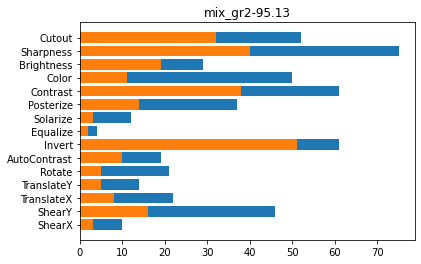

In [39]:
plot_res(mix_gr2["1"], "mix_gr2-95.13")

ShearX: 16-16
ShearY: 17-8
TranslateX: 18-5
TranslateY: 2-6
Rotate: 4-2
AutoContrast: 18-22
Invert: 2-5
Equalize: 4-13
Solarize: 8-1
Posterize: 23-52
Contrast: 34-45
Color: 20-27
Brightness: 21-17
Sharpness: 52-20
Cutout: 29-33


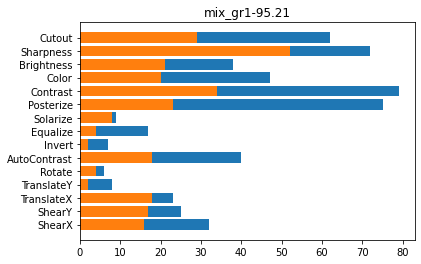

In [40]:
mix_gr2_2 = {"0": [[["Posterize", 0.12274469055138726, 0.23304797188930138], ["Posterize", 0.6612032843649435, 0.5385133043072765]], [["Color", 0.16751738532000193, 0.5131919485528776], ["Cutout", 0.36954684128891035, 0.25186710701962245]], [["Color", 0.2796484830290668, 0.9055570059476405], ["ShearX", 0.11672632358915674, 0.6648595162983503]], [["ShearY", 0.32407822673628733, 0.42208303300319594], ["Color", 0.6977974011762648, 0.5311831591740787]], [["Sharpness", 0.12385914979060575, 0.7108468358025248], ["Cutout", 0.3706117411852082, 0.9211653692036256]], [["Posterize", 0.6473239169491416, 0.21992129605475605], ["Posterize", 0.6482452859161627, 0.28261330987173133]], [["Posterize", 0.15269837988928492, 0.783362640517943], ["ShearY", 0.5366262644874054, 0.26477004437496515]], [["Sharpness", 0.42541568180837985, 0.13719652680385275], ["TranslateX", 0.23984594484865862, 0.6719317247797111]], [["Posterize", 0.25245435306357406, 0.5345516767147314], ["Color", 0.9819332726888792, 0.3043254201233284]], [["Contrast", 0.7288971097058498, 0.43211668062637093], ["Cutout", 0.19722551260260374, 0.9144349457857271]], [["Posterize", 0.940296469893508, 0.5606674140966299], ["Posterize", 0.47923532873926156, 0.42889380570189234]], [["Sharpness", 0.9680664278597424, 0.5260855545776236], ["Brightness", 0.3403938281603667, 0.41874478640317886]], [["Solarize", 0.1707925709673464, 0.2728261041443174], ["Contrast", 0.1298009628283325, 0.6634376922934836]], [["ShearY", 0.2820319485687021, 0.6834719295597259], ["Color", 0.7114782703573953, 0.5111255742552377]], [["Cutout", 0.18757449280071908, 0.3661624616095747], ["Cutout", 0.5508841621875299, 0.8642526030466391]], [["Posterize", 0.5227881412806972, 0.3790951343659299], ["Posterize", 0.5070449393719544, 0.39177391367783093]], [["Color", 0.9633997723809664, 0.5289201588063609], ["Cutout", 0.37788203391404096, 0.35337237680155853]], [["Color", 0.25760553876269754, 0.6959389031031669], ["ShearX", 0.48410781051998053, 0.6385996031778711]], [["ShearY", 0.3143397289631286, 0.417207963506147], ["Color", 0.7953217336452247, 0.23020014105659176]], [["Sharpness", 0.7749870534289496, 0.7077986054441204], ["Cutout", 0.3645927711808712, 0.19172291825232224]], [["Posterize", 0.8550649262095132, 0.6813113575111331], ["Posterize", 0.4706700512472549, 0.4268191907495008]], [["Sharpness", 0.5705751755992778, 0.5067556689772706], ["Brightness", 0.32647801675394006, 0.3945255366056113]], [["Solarize", 0.1775622945999593, 0.3769890543786941], ["Contrast", 0.12520071411925515, 0.661199406110379]], [["ShearY", 0.326485940577101, 0.6880879348358142], ["Color", 0.7108272007331955, 0.5228039616083543]], [["Cutout", 0.12265203809161322, 0.37238545000407985], ["Cutout", 0.546816445988851, 0.9452478298614492]], [["AutoContrast", 0.6514741494016454, 0.2256455024179757], ["Posterize", 0.5992997651427875, 0.3028051954259568]], [["Posterize", 0.1403780736009463, 0.8216469830017847], ["Cutout", 0.5468917279269703, 0.18887227002303758]], [["Posterize", 0.20859894651611327, 0.5994739968199629], ["TranslateX", 0.5484972827566428, 0.5769095465853611]], [["Equalize", 0.24540064460176705, 0.4206044699942797], ["Color", 0.9814741603360608, 0.2093031665984581]], [["Sharpness", 0.7483970121663298, 0.5733376760060438], ["Cutout", 0.19900137012648272, 0.0015456084924293512]], [["Posterize", 0.8099948516745168, 0.8185498404168674], ["Posterize", 0.546630222093536, 0.42220789237387096]], [["Sharpness", 0.8803558295995624, 0.5461790925275369], ["Brightness", 0.3803893237018427, 0.43020965456084637]], [["AutoContrast", 0.3011525183720824, 0.29051162819971177], ["Contrast", 0.08695868579788538, 0.5540218256139339]], [["ShearY", 0.21926492419750007, 0.8116898932321488], ["Color", 0.645138610469076, 0.6494361861861748]], [["Cutout", 0.15988467429694786, 0.2130128309988088], ["Cutout", 0.6109398026721798, 0.9833020782924566]], [["Posterize", 0.8649767719410868, 0.6964352176617711], ["Posterize", 0.6252326297075934, 0.3796303072106206]], [["Sharpness", 0.7921372302342536, 0.4406903135327275], ["Brightness", 0.3164353970565477, 0.5024617623168407]], [["Solarize", 0.2527890350845702, 0.23942957869725562], ["Contrast", 0.15093909776589037, 0.6462050836297303]], [["ShearY", 0.34353531121208636, 0.6055042638991033], ["Color", 0.7114147598326636, 0.5700511197694031]], [["Cutout", 0.08858765942668823, 0.32793684992916133], ["Cutout", 0.5310745006673148, 0.8142054123661915]], [["Posterize", 0.6310708460981205, 0.6186570299943125], ["Posterize", 0.7272311168932201, 0.7073319608855754]], [["Color", 0.9415720106197611, 0.7405170024487675], ["ShearY", 0.5863841031186003, 0.4390077128488955]], [["ShearX", 0.5998381007564578, 0.3129628949994602], ["Sharpness", 0.3239510957401448, 0.9122798225326273]], [["ShearY", 0.2843558714889274, 0.31633593894361856], ["Sharpness", 0.004288695339712878, 0.701368582954744]], [["Sharpness", 0.05043564057901684, 0.042993706787817554], ["Posterize", 0.003216949518440315, 0.9229859844787931]], [["Posterize", 0.6859704045392887, 0.1711370535671819], ["Posterize", 0.5677697025390761, 0.5470462665551883]], [["Cutout", 0.2853432229728838, 0.5576909675663386], ["AutoContrast", 0.27895250452837517, 0.23820054347703976]], [["TranslateX", 0.33696091458451183, 0.1837383236597267], ["Brightness", 0.10003223706715658, 0.735023204021404]], [["Brightness", 0.18546090405831422, 0.5679563231459183], ["Color", 0.8437031064733154, 0.42719860709536683]], [["TranslateX", 0.023922900039840156, 0.30375478594308514], ["Cutout", 0.44633425056490406, 0.4530692040260242]], [["Cutout", 0.4248655637837271, 0.9373760035240448], ["ShearY", 0.6583537031679075, 0.5000602186110554]], [["Color", 0.28272938875927367, 0.5810938936811063], ["Color", 0.5329450105198374, 0.5528941441308765]], [["Posterize", 0.4148275969830073, 0.5515124030987041], ["Cutout", 0.71418911283577, 0.3020658626851526]], [["AutoContrast", 0.36875825560029846, 0.22761881711361848], ["Invert", 0.0404364589158947, 0.8406188013505416]], [["TranslateX", 0.49258679199315475, 0.5874930518211184], ["Contrast", 0.84625155007922, 0.6824284979929423]], [["Sharpness", 0.39602449184774413, 0.765091537037437], ["Contrast", 0.8722748120234797, 0.76067172970279]], [["Cutout", 0.4020318197296389, 0.48417043900158657], ["Posterize", 0.48467877849490704, 0.36555584729933727]], [["Contrast", 0.3234320109549959, 0.5403251747676259], ["Equalize", 0.19632534051103778, 0.5829392962988921]], [["AutoContrast", 0.8098500137489377, 0.544181878744231], ["Equalize", 0.3514953216695456, 0.5759689762781875]], [["Contrast", 0.4825473511174888, 0.8384867279681271], ["Contrast", 0.34612017262320266, 0.50552014338397]], [["Brightness", 0.07262590119048451, 0.17789588920979632], ["Contrast", 0.39228598428895467, 0.5356241399021662]], [["ShearY", 0.1691560781899466, 0.4578865726435021], ["AutoContrast", 0.9901001724733132, 0.43104723570563774]], [["Solarize", 0.39365547381185323, 0.49922842434580833], ["Brightness", 0.5498958977306188, 0.6480838448306103]], [["Posterize", 0.8604141362958011, 0.3791701836422858], ["AutoContrast", 0.4394759793962679, 0.6496632114456365]], [["Contrast", 0.42193973677701174, 0.9240590351078629], ["Sharpness", 0.40022477149199714, 0.40665276301659314]], [["Brightness", 0.1781765817211935, 0.18533029612530022], ["Sharpness", 0.4011959883939275, 0.6147430733465556]], [["Cutout", 0.18645676871998862, 0.45798897768215463], ["AutoContrast", 0.9329117410165323, 0.33565382556702544]], [["Solarize", 0.390376149096403, 0.5013075676551821], ["Brightness", 0.46714320301688506, 0.634064217354248]], [["Posterize", 0.8309752632531466, 0.3924331431979192], ["AutoContrast", 0.3724829625613798, 0.6574902069369386]], [["Contrast", 0.5139316306138852, 0.792017263136401], ["Sharpness", 0.43745347576598537, 0.3262677717310442]], [["Sharpness", 0.37930403743147256, 0.6862917685954015], ["Contrast", 0.9324344145888075, 0.7587989423758896]], [["Cutout", 0.4495887316650551, 0.4900193057631632], ["Posterize", 0.4823289061801444, 0.6656254866693501]], [["Contrast", 0.3350049004860086, 0.6959215909384191], ["Equalize", 0.09757437603546254, 0.5914208523762706]], [["Cutout", 0.7977826113234211, 0.5676486294480823], ["Invert", 0.07830091147992327, 0.5728318429263607]], [["Contrast", 0.4125044138181435, 0.8419081738108616], ["Contrast", 0.3317712087385727, 0.7484662730504358]], [["ShearY", 0.5912891429680793, 0.8403691668634969], ["Sharpness", 0.367108195348947, 0.5179528279971136]], [["Cutout", 0.0921633771737588, 0.3592813863591267], ["Cutout", 0.7811769428897427, 0.35157204735396]], [["Brightness", 0.46314015871261893, 0.4664632546763861], ["Color", 0.6665824742035236, 0.3959565674143129]], [["AutoContrast", 0.336236484327885, 0.43224814730679867], ["ShearX", 0.324253168100492, 0.4255732941656283]], [["Sharpness", 0.9764683704199792, 0.37562994553401047], ["TranslateX", 0.4436593351742214, 0.46184166039074703]], [["AutoContrast", 0.5336051332763292, 0.20713958863961746], ["Sharpness", 0.5583759600001883, 0.6011318188012391]], [["Sharpness", 0.3184226603696003, 0.572209977302408], ["AutoContrast", 0.12018953466657634, 0.24965665456466268]], [["Brightness", 0.945322403479716, 0.48183241711348834], ["Cutout", 0.7689512403402199, 0.9228530654251296]], [["Contrast", 0.3477998318619895, 0.7924270953828809], ["Solarize", 0.3549407543536983, 0.4620818581157835]], [["ShearY", 0.012619773944660073, 0.07100558010828328], ["Invert", 0.18019001553557212, 0.04582410658850766]], [["Contrast", 0.5072705520033131, 0.5523551006561824], ["ShearX", 0.2773363960128587, 0.3580701765664371]], [["Rotate", 0.07538532260313613, 0.16753326240987254], ["Cutout", 0.9368453387066441, 0.5004465526103432]], [["Solarize", 0.33574828322541883, 0.5027353886657868], ["Color", 0.5814832611199208, 0.8526480244721418]], [["TranslateX", 0.10483623325695113, 0.5406135798495093], ["AutoContrast", 0.22387921512372405, 0.00018171021105424252]], [["Cutout", 0.7493997114303839, 0.5796216250973616], ["Sharpness", 0.4449607940567533, 0.43856147771200377]], [["Cutout", 0.2447673073005222, 0.05327866158799932], ["AutoContrast", 0.6386860842721087, 0.6085526166426675]], [["Brightness", 0.3163329551155968, 0.6115547367009854], ["Contrast", 0.7085028165402242, 0.5817766924072584]], [["ShearX", 0.5563828897047536, 0.39530617615877023], ["Cutout", 0.5228367462321751, 0.33471873902845795]], [["Rotate", 0.3959948794858118, 0.3061981435546134], ["TranslateX", 0.578811119593174, 0.5394492212061176]], [["TranslateX", 0.017505738394594628, 0.6794393162410912], ["ShearX", 0.9612417304126549, 0.5632515597591004]], [["ShearY", 0.5371871301591489, 0.853816954846509], ["Sharpness", 0.26450773677994943, 0.7109303464669292]], [["Cutout", 0.41622915667869864, 0.4095976047031272], ["Cutout", 0.8437682610557612, 0.12142277136802038]], [["Brightness", 0.31866831159308484, 0.642697482711861], ["Color", 0.2820423608821041, 0.4027402853016461]], [["AutoContrast", 0.3774539347085816, 0.4344427705601882], ["ShearX", 0.3333489334719756, 0.43278850572604977]], [["Sharpness", 0.582067774518388, 0.19334681387816852], ["TranslateX", 0.6263038071974999, 0.4682924782547456]], [["Color", 0.11593804808969048, 0.7007385816913201], ["Sharpness", 0.22367458243453836, 0.9103941929908435]], [["Cutout", 0.5365861486861747, 0.8627726462001999], ["Posterize", 0.7804886002200795, 0.09403115689866025]], [["Sharpness", 0.2913688246538868, 0.7433597489819062], ["Color", 0.978379919796309, 0.6167256307344963]], [["TranslateX", 0.09030224727578845, 0.6169176794974472], ["Cutout", 0.6952471903068028, 0.57991347179253]], [["AutoContrast", 0.002391791843861367, 0.8413611380472108], ["Posterize", 0.08602383656782375, 0.10851751697981463]], [["Color", 0.012132376401336464, 0.7640860378550569], ["Posterize", 0.05353755088797507, 0.9626927049907414]], [["Cutout", 0.5710103931959882, 0.8547150859543137], ["Posterize", 0.7631577968465643, 0.14890056899683146]], [["Sharpness", 0.30628961674546534, 0.3741655849482851], ["Color", 0.7983766604386371, 0.263189934887574]], [["TranslateX", 0.2764145237080281, 0.590319683910167], ["Cutout", 0.6800732532632228, 0.5863265290869327]], [["AutoContrast", 0.11079201490174545, 0.754997184691654], ["Posterize", 0.07961059743632773, 0.16842475821861597]], [["Color", 0.021168648832366525, 0.47949228988305764], ["ShearX", 0.10502739250193699, 0.7799032285380085]], [["Cutout", 0.6448139151961755, 0.8203764146783229], ["Posterize", 0.6884425356229995, 0.16731849910953434]], [["Sharpness", 0.36250968598994493, 0.4906234243002755], ["Color", 0.9909234499564067, 0.44517247182201614]], [["TranslateX", 0.26287804633016393, 0.5647665384597221], ["Cutout", 0.6608804643448752, 0.3977061360919907]], [["AutoContrast", 0.03212365154367995, 0.7694563877889885], ["Posterize", 0.36927006323227807, 0.8894266078683205]], [["Color", 0.13406969497514637, 0.9686898746646279], ["AutoContrast", 0.11372575340098265, 0.7583501810498555]], [["Cutout", 0.862235663962972, 0.7286785806454029], ["Posterize", 0.6987425418269573, 0.05493393770173423]], [["Sharpness", 0.25363860977685854, 0.07521505632625686], ["Color", 0.8852994880751668, 0.4243104544168706]], [["TranslateX", 0.5412936493249937, 0.4140684904797931], ["Cutout", 0.6753833729488926, 0.47460698937577467]], [["AutoContrast", 0.10623046007396929, 0.7745563999324961], ["Posterize", 0.012523013961824009, 0.027417375344656603]], [["Color", 0.07179284630798789, 0.528027554805004], ["Sharpness", 0.07169292918633871, 0.9299454344290002]], [["Cutout", 0.6021542501937716, 0.9495944149823083], ["Posterize", 0.9207490385970583, 0.03901605934494743]], [["Sharpness", 0.35706512592658524, 0.7764733562925424], ["Color", 0.911067819429367, 0.7439367805655768]], [["TranslateX", 0.0029105074417470345, 0.685832274091693], ["Cutout", 0.5355428156276606, 0.5331581861775667]], [["AutoContrast", 0.10487257810924652, 0.9569624051392935], ["Posterize", 0.0018627217907599535, 0.05671625766706423]], [["Color", 0.12370149988584069, 0.7117787615981581], ["Sharpness", 0.08107731692116343, 0.9045535274120137]], [["Cutout", 0.45509592370726837, 0.7904794527794353], ["Posterize", 0.8731632103376858, 0.09112404435082876]], [["Sharpness", 0.25965750657693276, 0.6420481350048249], ["Color", 0.9453342710971759, 0.481716739805199]], [["TranslateX", 0.21224780125531278, 0.5811331142209456], ["Cutout", 0.6864687353761887, 0.5409653454454132]], [["AutoContrast", 0.182833542179069, 0.8258844826833427], ["Posterize", 0.09720041646128988, 0.02380668447579035]], [["Brightness", 0.08475566401466475, 0.2440376369762302], ["Posterize", 0.93609716179592, 0.42878478059294955]], [["ShearX", 0.3621200794037991, 0.48598701713987935], ["ShearX", 0.12574847621763668, 0.41229782945126886]], [["Equalize", 0.3813871661917425, 0.18958544503631225], ["Equalize", 0.708197995997415, 0.2184350431287043]], [["Sharpness", 0.2969092086189391, 0.5279598638803114], ["Sharpness", 0.9470762096640356, 0.8927942336261053]], [["Sharpness", 0.3164216316577466, 0.6072077099791254], ["Rotate", 0.2133755347186072, 0.5362716393782668]], [["Color", 0.09328695891769082, 0.8803299873766461], ["Posterize", 0.015100307553578121, 0.4897828202832011]], [["Cutout", 0.5484135383533593, 0.9406911174647361], ["Posterize", 0.70805101212178, 0.06696095427960705]], [["Sharpness", 0.1990901619618155, 0.4381937450127368], ["Color", 0.7943140136464273, 0.33313035380984]], [["TranslateX", 0.10965051878316737, 0.5160778449304873], ["Cutout", 0.857106372103154, 0.33687235089288825]], [["AutoContrast", 0.10561657138660382, 0.7482765115855511], ["Posterize", 0.195162918221334, 0.9628266347730154]], [["Color", 0.13068996030894758, 0.7493750803818346], ["ShearX", 0.08736149204377497, 0.7703978954598609]], [["Cutout", 0.5573086973909371, 0.7978887901937779], ["Posterize", 0.6945848049402923, 0.1293100420886915]], [["Sharpness", 0.2535203788542293, 0.49536263223434873], ["Color", 0.9942481406757844, 0.3972885601469869]], [["TranslateX", 0.26710689015338035, 0.5898824122806576], ["Cutout", 0.7007007226443189, 0.4630847468009967]], [["AutoContrast", 0.1134532654090421, 0.7630624047520512], ["Posterize", 0.27631691802558445, 0.9878598547042811]], [["Color", 0.11034633070677866, 0.4494485117944245], ["Sharpness", 0.18240578605598567, 0.9032875333595765]], [["Cutout", 0.6453135935711644, 0.8976443565435953], ["Posterize", 0.8741307063675215, 0.09178319359637072]], [["Sharpness", 0.2675597411328313, 0.6618749642769759], ["Color", 0.9996640001357926, 0.4882699625878275]], [["TranslateX", 0.0200742303849048, 0.5741336616739905], ["Cutout", 0.6816386085644383, 0.5606528967205342]], [["AutoContrast", 0.18598572405818914, 0.8247348912560405], ["Posterize", 0.6132465491553926, 0.028647745166167665]], [["Sharpness", 0.39245066271684237, 0.33306728419105586], ["AutoContrast", 0.4033287421500124, 0.04258501432474934]], [["Sharpness", 0.953958549503111, 0.8065711642134523], ["Posterize", 0.7230770196569272, 0.5204814768114838]], [["ShearX", 0.3216079604845626, 0.5221770592804841], ["ShearY", 0.6437089388177623, 0.47116071493271755]], [["Brightness", 0.2418280940001662, 0.3480937024834453], ["Sharpness", 0.2806934629798953, 0.3977269341121593]], [["Sharpness", 0.5977116257833779, 0.4124107340293968], ["Contrast", 0.6465306954162149, 0.4491579378934474]], [["Sharpness", 0.7238521947541263, 0.46363665030158874], ["AutoContrast", 0.2473267182664325, 0.2279666460905975]], [["Contrast", 0.8954903778027042, 0.7744880679886212], ["Posterize", 0.7611076274313009, 0.505323968401143]], [["ShearX", 0.5593301176084978, 0.5049065660137307], ["ShearX", 0.7502697896687545, 0.46106495514127915]], [["Brightness", 0.23161530986692674, 0.21411896790352059], ["Sharpness", 0.01954544330434649, 0.39558684241197567]], [["Sharpness", 0.6865717211434911, 0.862338222732873], ["Contrast", 0.7321833438318454, 0.5390010151640476]], [["Posterize", 0.17582589851791172, 0.39131420900847735], ["Contrast", 0.08926992497754675, 0.7778526157079374]], [["Sharpness", 0.4455861790063056, 0.8295771137039257], ["Color", 0.6824478455246472, 0.589437667208985]], [["Color", 0.7789351241589824, 0.7104181877497723], ["ShearX", 0.8867898070061044, 0.41557778935346706]], [["TranslateX", 0.020998303380368837, 0.42428695632660063], ["AutoContrast", 0.031800703640514336, 0.48425129913377196]], [["Solarize", 0.00368335935949211, 0.3701193555362926], ["Equalize", 0.34236443649696763, 0.7363457674867077]], [["Sharpness", 0.22147857902687387, 0.34048610453847533], ["AutoContrast", 0.23774740016508078, 0.0892730049630501]], [["Sharpness", 0.9072683726186862, 0.6885633156993368], ["Posterize", 0.9427171064685214, 0.5130350627465781]], [["ShearX", 0.5528301972790689, 0.5201856563375097], ["ShearX", 0.732294511308827, 0.512884866750493]], [["Brightness", 0.1587630866032688, 0.11499060272654155], ["Sharpness", 0.05791429515305394, 0.37319488893127345]], [["Sharpness", 0.7138443955654415, 0.3851187412151482], ["Contrast", 0.8603290985601821, 0.532777562494422]], [["Sharpness", 0.7406715088827209, 0.42138616262303646], ["AutoContrast", 0.24151595965572953, 0.08068736524202536]], [["Contrast", 0.8790560100486389, 0.6940286213358381], ["Posterize", 0.791639415691249, 0.6055539587865588]], [["ShearX", 0.554963665092811, 0.599184750661915], ["ShearX", 0.749802438431273, 0.5062818957937592]], [["Brightness", 0.1639932983186792, 0.31671660451679257], ["Equalize", 0.05839959531526148, 0.37019675958338316]], [["Sharpness", 0.7109321372545211, 0.8137165587965629], ["Contrast", 0.727221145190438, 0.5329630800383889]], [["Sharpness", 0.6460436440730638, 0.605125345445396], ["AutoContrast", 0.41194017010325845, 0.15618531252957657]], [["Contrast", 0.04838711439498694, 0.7980158113170491], ["Posterize", 0.8273604116859167, 0.7293005510519032]], [["ShearX", 0.40261359300041943, 0.5086344998474707], ["ShearY", 0.6487666519325682, 0.38932342535820186]], [["Brightness", 0.06319316410224288, 0.35567173371405847], ["Equalize", 0.27840193303293365, 0.3062027187298478]], [["Sharpness", 0.24308473943248976, 0.7984224686258719], ["Contrast", 0.09449151909793074, 0.4409635196766657]], [["Sharpness", 0.18171157831415435, 0.18001587370441446], ["AutoContrast", 0.48842585731006816, 0.016847518375759762]], [["Sharpness", 0.8739749289930804, 0.41947427332195447], ["Posterize", 0.7912730660325554, 0.25348454606644566]], [["ShearX", 0.3120926698117511, 0.5958021759188609], ["ShearX", 0.7469087937914716, 0.5814029774321213]], [["Posterize", 0.23681796249210874, 0.15588629109100666], ["Sharpness", 0.18283601199923397, 0.5410939481745397]], [["Posterize", 0.6031096526458974, 0.6157885100866778], ["Contrast", 0.965120390042064, 0.3942452739127457]], [["Sharpness", 0.8353603174071418, 0.3193767242259378], ["AutoContrast", 0.27623054785423434, 0.1528699968397052]], [["Sharpness", 0.8145809499344634, 0.8288825073979078], ["Posterize", 0.8069711703829054, 0.6098839922208812]], [["ShearX", 0.49872880116751295, 0.41015136980953737], ["ShearX", 0.7561901266263996, 0.572203560461873]], [["Brightness", 0.24779056474083996, 0.42950085128399274], ["Equalize", 0.08495355931683848, 0.4276838306023409]], [["Sharpness", 0.6404217728106487, 0.44812034350514784], ["Contrast", 0.7135154455386051, 0.5617279691000159]], [["Sharpness", 0.8081954705129772, 0.3938135937094671], ["AutoContrast", 0.379278548455146, 0.02997886638983121]], [["Contrast", 0.9870546203172299, 0.6559373608218962], ["Posterize", 0.8386929840493962, 0.549225723513043]], [["ShearX", 0.649758821317142, 0.6372982518699435], ["ShearX", 0.6164854532280939, 0.32021767493846387]], [["Brightness", 0.07167021026168502, 0.17450776921006023], ["Equalize", 0.10807436467058759, 0.3529500555974978]], [["Sharpness", 0.7002997098141076, 0.9653261965553555], ["Contrast", 0.8973263423677517, 0.47560852782480295]], [["Sharpness", 0.30409713878962147, 0.6379312091603193], ["AutoContrast", 0.3069890049497527, 0.4077511349055726]], [["Sharpness", 0.8267292119961711, 0.047046355923206384], ["Color", 0.6002360041991334, 0.5402297985892989]], [["Posterize", 0.6121551790766934, 0.6397088660198561], ["TranslateY", 0.8447844174782702, 0.4689453320580897]], [["ShearY", 0.1710383206091053, 0.5451753674729072], ["Color", 0.1718524353868277, 0.6277409726564779]], [["Sharpness", 0.1415121206073397, 0.8310432840835357], ["Posterize", 0.534281268831801, 0.5065020258746762]], [["ShearX", 0.02857598295406849, 0.2735177314356048], ["Brightness", 0.18134992688636728, 0.8001749528367661]], [["Sharpness", 0.2872148922068347, 0.4802432506612819], ["Brightness", 0.30451945964802013, 0.9710546728667666]], [["Equalize", 0.25329234305698145, 0.41803533584180463], ["ShearY", 0.017767690371114406, 0.7467094049352114]], [["Cutout", 0.2462138520538069, 0.31458428110979897], ["Color", 0.6653046275050195, 0.98398608517252]], [["Color", 0.1955577984032979, 0.3703576620056902], ["Brightness", 0.0006480060484128636, 0.15563152956550472]], [["ShearX", 0.02831073680930995, 0.1282398549275728], ["Brightness", 0.35943641186240594, 0.7845708849135544]], [["ShearY", 0.38844472813009057, 0.5819397982122798], ["Brightness", 0.045678908287946185, 0.47835939835915864]], [["ShearX", 0.33301104366291906, 0.404199827362495], ["Posterize", 0.8944989544413549, 0.9024763620271565]], [["Solarize", 0.167905366741377, 0.43793050124497657], ["Posterize", 0.838239453567386, 0.9321509113900854]], [["Brightness", 0.7549890082879345, 0.4574450980326369], ["Brightness", 0.5929105416417171, 0.7381061709055712]], [["AutoContrast", 0.15977582194738765, 0.989677939065921], ["TranslateY", 0.21598115805233373, 0.38784788457453223]], [["Posterize", 0.7542652282985354, 0.9494330725610991], ["AutoContrast", 0.4872554173357063, 0.3644636406667597]], [["ShearY", 0.6795897634831651, 0.26616747093127496], ["Posterize", 0.5140184214021861, 0.20127080829015362]], [["Rotate", 0.15042764256488522, 0.27665579214785885], ["TranslateY", 0.2545549473911453, 0.4590298763908814]], [["Brightness", 0.7692707941652335, 0.6042841607150088], ["Contrast", 0.34968578788198523, 0.7532197505104967]], [["Posterize", 0.06885033453829403, 0.41699974613350776], ["Cutout", 0.029101467210721987, 0.2418179688935364]], [["AutoContrast", 0.5513501390636829, 0.4574631140960651], ["Sharpness", 0.5088092595655017, 0.7299930466441606]], [["Cutout", 0.2899561087516442, 0.753884249821571], ["Posterize", 0.5217274489984919, 0.6530060622595465]], [["Cutout", 0.32062993405193885, 0.2699340147849632], ["Equalize", 0.25897323827534424, 0.45056964423407786]], [["ShearY", 0.6586261431869939, 0.24684368095121761], ["Equalize", 0.5599583410664049, 0.7516530938756611]], [["TranslateX", 0.1963751461480227, 0.5459235269724347], ["Invert", 0.15066654952042524, 0.3870284015571514]], [["Cutout", 0.8297962111077453, 0.3897982860550801], ["Posterize", 0.5503629363498289, 0.6385797014030872]], [["Brightness", 0.6791432728045992, 0.34304215334179], ["Posterize", 0.938044282304279, 0.7710914018898788]], [["TranslateY", 0.15274690731891108, 0.5125237052324493], ["Brightness", 0.2914675482044237, 0.463645020815379]], [["Cutout", 0.8202627618130781, 0.1438095348422852], ["AutoContrast", 0.6637642156650763, 0.9025167140654354]], [["Sharpness", 0.17944319087760371, 0.5963527628961307], ["TranslateY", 0.40717577093233215, 0.4481381996642568]], [["Sharpness", 0.7177914346259108, 0.6672574625226441], ["Rotate", 0.19817478429377625, 0.5360673992159695]], [["Invert", 0.2819535281979687, 0.29157217141389674], ["Sharpness", 0.15852604523364172, 0.5435756782539584]], [["TranslateY", 0.2762157514555874, 0.5368120444101883], ["Cutout", 0.19287454012924687, 0.4470828967550322]], [["Cutout", 0.549629838845784, 0.08603606931898844], ["Brightness", 0.567612207394109, 0.7280594958553288]], [["Equalize", 0.7696957593680203, 0.0002417735648977959], ["Cutout", 0.5359785857947884, 0.7762399832434623]], [["Brightness", 0.5008506756790165, 0.6296790148598848], ["ShearY", 0.09128299571389678, 0.4039864359369417]], [["TranslateX", 0.2763123768938589, 0.43662581999771166], ["Cutout", 0.648438601847555, 0.6910947024558266]], [["Contrast", 0.07210889245849961, 0.32348894954047974], ["AutoContrast", 0.2211800575487069, 0.4736658118921133]], [["Brightness", 0.38978793429477165, 0.6324551468870896], ["Contrast", 0.47042812324553973, 0.6345210865257234]], [["ShearX", 0.3164340033016426, 0.15230398008779028], ["TranslateY", 0.05549192031436956, 0.38380875050849267]], [["Contrast", 0.5020715214621372, 0.9604075945847366], ["Cutout", 0.6812457227136269, 0.39887381866528776]], [["ShearY", 0.4540173144963837, 0.7112126798336481], ["Posterize", 0.5689648819587524, 0.587869252748419]], [["Invert", 0.060285843092955455, 0.545781775903617], ["Invert", 0.11958406988088346, 0.6215787048274961]], [["Color", 0.793830770718916, 0.6404983133025253], ["Cutout", 0.4239529155275618, 0.5874537677888267]], [["Brightness", 0.19018061631766403, 0.03089744237562156], ["Contrast", 0.18620008523858267, 0.8552473480846831]], [["TranslateX", 0.3817097347334035, 0.5599377108587392], ["ShearY", 0.35092758968663573, 0.6662571595057531]], [["Color", 0.44582502239901806, 0.4953804491868193], ["Posterize", 0.25787021185044057, 0.9468676298992796]], [["ShearX", 0.14647033217959274, 0.14965915540483277], ["Color", 0.09540112858783617, 0.49274752905217406]], [["Contrast", 0.046737599094303445, 0.18706765282434862], ["TranslateY", 0.6596379776740102, 0.4191296119035898]], [["Color", 0.23754147429331457, 0.2161015103543766], ["Equalize", 0.03267112719408355, 0.283968362813056]], [["Rotate", 0.35145000713637725, 0.33225419184772775], ["Brightness", 0.44284442754224745, 0.6030956404157399]], [["Sharpness", 0.31863281784301145, 0.27725702006265984], ["Posterize", 0.2761031931838518, 0.77947872089084]], [["ShearY", 0.42448575286452633, 0.4021582549615855], ["Equalize", 0.3468264828166716, 0.5916440536071024]], [["Posterize", 0.3657266863950847, 0.27123026570330805], ["Brightness", 0.3901242119015652, 0.6786918854385654]]], "1": [[["Posterize", 0.9731597269708422, 0.7901912076814319], ["Color", 0.9604482932542573, 0.8300935445509154]], [["TranslateX", 0.5438139315041837, 0.5760034736200536], ["Color", 0.23370680077381367, 0.07620919166518819]], [["TranslateX", 0.43572309399539494, 0.4955998119017704], ["Sharpness", 0.777290254103556, 0.8391435226903635]], [["Posterize", 0.697833016398131, 0.8870843307274242], ["ShearY", 0.493409687552135, 0.4947486672870462]], [["ShearX", 0.37442803329621055, 0.6847997677857591], ["Sharpness", 0.5104687997413234, 0.5618839481787049]], [["Posterize", 0.9212946517873171, 0.7912302594066994], ["Color", 0.8794362543889546, 0.8418088634977112]], [["TranslateX", 0.5475399863547394, 0.45417929507073973], ["Color", 0.24464055076120717, 0.15469199427652622]], [["TranslateX", 0.2450883894503031, 0.4872387324211727], ["Sharpness", 0.8974454153628473, 0.8404796429057425]], [["Posterize", 0.6154261514218675, 0.9353649920067372], ["ShearY", 0.5357820277961278, 0.6106339453902374]], [["ShearX", 0.41509481209442334, 0.6096037424150387], ["Sharpness", 0.5107961279041953, 0.5573081998941775]], [["Sharpness", 0.605718913489269, 0.5343521795422663], ["Color", 0.5908999712656763, 0.8687470846439579]], [["Cutout", 0.13340630691945068, 0.1962432255529954], ["ShearX", 0.5318944624831593, 0.5091445105445941]], [["ShearY", 0.911866826951053, 0.48097447349479844], ["ShearX", 0.29680318337668626, 0.8955308949301539]], [["Color", 0.8858397965686419, 0.7111765555558657], ["TranslateY", 0.2630748883301182, 0.7089498642799419]], [["Sharpness", 0.35399337553302634, 0.495649893229685], ["Sharpness", 0.6596114397705775, 0.7672610057521815]], [["Posterize", 0.9181094298047267, 0.7894219760139656], ["Color", 0.9406414605799241, 0.8231671884837375]], [["TranslateX", 0.545070858278226, 0.46408519044866225], ["Color", 0.2377583435269194, 0.08571337823615044]], [["TranslateX", 0.23333118240012612, 0.4930081600390948], ["Sharpness", 0.8880320155973835, 0.8309886024012016]], [["Posterize", 0.6329984288702264, 0.9397264646897421], ["ShearY", 0.4815365886808529, 0.4963699785674946]], [["ShearX", 0.42949585638918364, 0.6847945174368991], ["Sharpness", 0.5156446322735604, 0.5567006185657902]], [["Cutout", 0.7202016222284637, 0.7970846340343964], ["Color", 0.8741661602607889, 0.8329630532725343]], [["TranslateX", 0.6261397398839266, 0.4494035979981259], ["Color", 0.2403168072514767, 0.1501653519024747]], [["TranslateX", 0.2433551168342689, 0.48308378821734727], ["Sharpness", 0.9039076219804357, 0.9212736173237985]], [["Posterize", 0.6351515207983448, 0.9776728874825265], ["ShearY", 0.5455852634627552, 0.6096454471167116]], [["ShearX", 0.43216420728385807, 0.6127770312945435], ["Sharpness", 0.6103433850399801, 0.6341319048234323]], [["Posterize", 0.9732596509404929, 0.8385704000270044], ["Brightness", 0.9337056554065808, 0.475753174233139]], [["Color", 0.14464158450110137, 0.621163111397173], ["Cutout", 0.9424339930750141, 0.10670623387878858]], [["ShearY", 0.5885192244235791, 0.3565122491855384], ["Cutout", 0.2222127484209226, 0.8682088219283071]], [["Rotate", 0.25761990588064854, 0.7258906271700496], ["TranslateX", 0.19293565938670346, 0.41058060172762156]], [["Brightness", 0.12451486633459918, 0.4950189930901753], ["Sharpness", 0.29744035997607005, 0.06087066490924631]], [["Color", 0.6667640025802978, 0.81575129076935], ["Sharpness", 0.8390464702621403, 0.7302797017625853]], [["Sharpness", 0.9413975886230235, 0.45117909365015535], ["Posterize", 0.2063267962599662, 0.526206095144919]], [["TranslateX", 0.1257944570009027, 0.48886566365318046], ["Posterize", 0.9483602014621508, 0.9760282435643085]], [["Posterize", 0.7490188936029804, 0.9975485375966157], ["AutoContrast", 0.5781880704337697, 0.5600750927649587]], [["AutoContrast", 0.517446912104734, 0.7655753825808951], ["TranslateY", 0.5958803695272323, 0.4147135928471455]], [["Posterize", 0.824057139489038, 0.995729866743922], ["Color", 0.920390613889484, 0.9660179501905738]], [["TranslateX", 0.8450133312312559, 0.5615587406029987], ["Color", 0.0693069105680576, 0.10227270178715636]], [["TranslateX", 0.31130482566793805, 0.4481572118616763], ["Contrast", 0.7784181937341734, 0.9034200877241807]], [["Posterize", 0.7059293609024478, 0.9824974240009388], ["ShearY", 0.5688169450257268, 0.3700746785566561]], [["ShearX", 0.2308610247530062, 0.5483985020641631], ["Sharpness", 0.5400392738439883, 0.40255978270197634]], [["Posterize", 0.9943378180059158, 0.838356370464578], ["Color", 0.968320930767872, 0.891493514306849]], [["Solarize", 0.5780248200951705, 0.523873403849378], ["Color", 0.177629756149868, 0.013791144948677767]], [["TranslateX", 0.4470900355683497, 0.5315449718770556], ["Sharpness", 0.9994373847293694, 0.847981041006]], [["Posterize", 0.6880986973966681, 0.8988361651348256], ["ShearY", 0.520031177391081, 0.4617107879580318]], [["ShearX", 0.3807902587484938, 0.7282829317522653], ["Sharpness", 0.4929265986443308, 0.6501570696876191]], [["Sharpness", 0.8461900194595081, 0.5090198284878917], ["Brightness", 0.6106721312633071, 0.7835579621078548]], [["Solarize", 0.2298025462651655, 0.002014920744710047], ["Brightness", 0.3093738937411731, 0.08311526972490242]], [["ShearY", 0.8806833719263408, 0.46145849272593104], ["Color", 0.49504588828126245, 0.8893843571359391]], [["Contrast", 0.7647737396759301, 0.94971297458359], ["TranslateY", 0.37870837070681873, 0.48442307976525745]], [["Sharpness", 0.1035466063228919, 0.7009752216039441], ["Posterize", 0.6260822152411175, 0.7435555856079775]], [["ShearY", 0.7928760163957331, 0.5258610234722743], ["Contrast", 0.2949665737469201, 0.5866395004491045]], [["Equalize", 0.340298029203499, 0.7621541524529992], ["Sharpness", 0.6671994497216306, 0.41900763764460247]], [["ShearY", 0.6680884042736145, 0.5754038503162656], ["Cutout", 0.9160371846092715, 0.028207467061360528]], [["AutoContrast", 0.011691279228734308, 0.23801621303329037], ["Sharpness", 0.6205279793031007, 0.329871817127817]], [["Invert", 0.8572909416287445, 0.3362414495671408], ["Invert", 0.8649048452189537, 0.9125536120636057]], [["Cutout", 0.2917783224776159, 0.6491111124809774], ["ShearX", 0.43572380020641915, 0.4615653121395031]], [["Color", 0.26249578117679695, 0.21886722828508232], ["TranslateX", 0.2583022507074566, 0.4815890621265845]], [["Posterize", 0.5385077428731284, 0.5056328213570204], ["Posterize", 0.5586819401226877, 0.33016511334336796]], [["Contrast", 0.2645738984897652, 0.17999824445570617], ["Contrast", 0.5831640362134551, 0.8048189727315358]], [["AutoContrast", 0.8144717473837959, 0.20390588334052157], ["Cutout", 0.3460960546026843, 0.9274621125985937]], [["Invert", 0.018737516508720187, 0.40357119280330256], ["AutoContrast", 0.4755799507046058, 0.4006486187075671]], [["Brightness", 0.2528569080128572, 0.23735323750913487], ["Color", 0.41641459362498323, 0.4420450013917664]], [["Contrast", 0.7759354096834398, 0.2526831773180003], ["Solarize", 0.17564551947942697, 0.8083760219955054]], [["Sharpness", 0.5207999180450148, 0.10352660933837964], ["Cutout", 0.01212076270469914, 0.9985121356680622]], [["ShearY", 0.7632707951647368, 0.454339200323892], ["Contrast", 0.3633671228260204, 0.630991120491343]], [["Equalize", 0.22490126441551903, 0.9972031794237888], ["Sharpness", 0.5111953634730276, 0.30654129040511213]], [["ShearY", 0.30524343878223087, 0.40006713845518294], ["Cutout", 0.9148105908516746, 0.14485386663872643]], [["AutoContrast", 0.1631649014512223, 0.2528164171582847], ["Sharpness", 0.636384061337987, 0.5202130330533159]], [["Sharpness", 0.757285799586914, 0.27143483116371514], ["Invert", 0.9859012216193033, 0.790203261366871]], [["ShearY", 0.7592651885773537, 0.4595204982587056], ["Contrast", 0.35586544362814104, 0.6959056088119338]], [["Equalize", 0.09501521061668632, 0.6261238161378165], ["Sharpness", 0.4692423900504956, 0.43732170681722965]], [["ShearY", 0.3215566912544159, 0.4068092877354701], ["Cutout", 0.8604789192724598, 0.16633278758777476]], [["AutoContrast", 0.11881270178598102, 0.26105318367068875], ["Sharpness", 0.6236781790041624, 0.46840851969613]], [["Sharpness", 0.8095518232729533, 0.348840345971787], ["Invert", 0.9964642880289442, 0.8769251439879061]], [["AutoContrast", 0.5739533664148424, 0.3409238939912038], ["Cutout", 0.3958770519257922, 0.9293994826109279]], [["Contrast", 0.006818651382629853, 0.4754198845859347], ["Contrast", 0.430990553878019, 0.40236375246576433]], [["Brightness", 0.28949461143935873, 0.3238821351512604], ["Color", 0.2456594155596005, 0.44019593479953406]], [["Contrast", 0.7718787819132659, 0.3871384783942774], ["Solarize", 0.4978761314222969, 0.6078484649293113]], [["Sharpness", 0.460601967196529, 0.018095449407613262], ["ShearX", 0.4064062294584146, 0.45387556775777715]], [["TranslateY", 0.30920230826976913, 0.1732932389682497], ["Contrast", 0.6094506120970079, 0.4391637174499586]], [["AutoContrast", 0.30795725470255186, 0.23745646293596523], ["Sharpness", 0.6546914129028991, 0.5731166404815464]], [["Sharpness", 0.907152104624511, 0.6070607381168862], ["Contrast", 0.4844078598644649, 0.46545353027712827]], [["AutoContrast", 0.391733574775055, 0.586378297582295], ["Contrast", 0.8193506967893629, 0.2722010985081719]], [["Contrast", 0.6628334866576978, 0.29635488389292813], ["Contrast", 0.5119352817546794, 0.6990271183769171]], [["Rotate", 0.7546125503550221, 0.468167348166192], ["Contrast", 0.1827918904703462, 0.5463696199153367]], [["Equalize", 0.10503340253815824, 0.9920606776269217], ["Sharpness", 0.540488214991834, 0.44937009906750547]], [["ShearY", 0.32426540766843115, 0.4114173883194229], ["Cutout", 0.8622973712493837, 0.06816969631634931]], [["AutoContrast", 0.11385258112716923, 0.22568568230330588], ["Sharpness", 0.6212061250285695, 0.1479057694426708]], [["TranslateY", 0.8219958318877444, 0.35234570557741335], ["Invert", 0.9975128967910613, 0.8930791907208756]], [["Color", 0.18658046784350102, 0.8515179078443688], ["Posterize", 0.4539493313401691, 0.6631866624587905]], [["ShearY", 0.23902913100121922, 0.28288033691642234], ["TranslateY", 0.009319179918889586, 0.27946070295724834]], [["ShearX", 0.11259676066295742, 0.4934861218987283], ["ShearY", 0.27818373805420116, 0.6753544593283114]], [["Solarize", 0.763765282406422, 0.9139845926087553], ["ShearX", 0.14798784446020619, 0.5813176398179173]], [["Solarize", 0.0037271649278608765, 0.4250869219319074], ["ShearY", 0.5606059622937192, 0.7026302072589692]], [["Cutout", 0.13261404266523844, 0.9984599744513273], ["ShearX", 0.31979826398353556, 0.46729988872781714]], [["Color", 0.2783745277335763, 0.05028554327694107], ["TranslateX", 0.26107799338901316, 0.489114740055081]], [["Posterize", 0.7846686399492262, 0.4039416550432173], ["Posterize", 0.538302300969916, 0.3278314973245641]], [["Contrast", 0.3740752897102135, 0.23632473046991123], ["Contrast", 0.6438751810348272, 0.9472287886592633]], [["Sharpness", 0.36557672766836946, 0.02646389583006869], ["Color", 0.670106075304221, 0.7342634961040302]], [["Invert", 0.07729475290514745, 0.26125418196751043], ["Sharpness", 0.2944258594918905, 0.16147811303745316]], [["Posterize", 0.17603679426858543, 0.7266089178055167], ["Color", 0.7508454033551657, 0.28560349125058204]], [["Invert", 0.6481052858381411, 0.1833741298192913], ["Invert", 0.7802576652817075, 0.13576713918270628]], [["Color", 0.7402215695366036, 0.7311366081641013], ["Posterize", 0.14911678346532004, 0.049487201112039636]], [["Sharpness", 0.8606671392803548, 0.01294054122792726], ["Posterize", 0.9986380115889963, 0.5901805915794509]], [["Brightness", 0.026461924576700435, 0.2716821806599104], ["Posterize", 0.1648048480573629, 0.24609858445054641]], [["Cutout", 0.15988458501839203, 0.7743696582443342], ["Color", 0.8313319502861003, 0.2770323418316022]], [["Sharpness", 0.08508562470714845, 0.4574082648213221], ["Sharpness", 0.9929802696437948, 0.46126796608022363]], [["Rotate", 0.1579058386996447, 0.6160564051318491], ["TranslateX", 0.03917790967396923, 0.3064645014309813]], [["Sharpness", 0.7917699299589824, 0.012868996213484751], ["Posterize", 0.825268381216801, 0.4500030796446569]], [["Invert", 0.07015628835162399, 0.26817554069243155], ["Posterize", 0.06303844218973582, 0.158419194767441]], [["Sharpness", 0.07012383024266777, 0.8961124088375972], ["Color", 0.6702379633607127, 0.0015551669599085938]], [["TranslateX", 0.0677975753749149, 0.2587562238791657], ["Sharpness", 0.8795753112869032, 0.33115731421340744]], [["Rotate", 0.3132534705302187, 0.6126658968938185], ["TranslateX", 0.035532969799249206, 0.3080093800968214]], [["Sharpness", 0.30601250402414976, 0.14369710295401897], ["Color", 0.73406395460104, 0.46029282211858014]], [["TranslateY", 0.0012644522507870154, 0.34727443774731453], ["Sharpness", 0.044747985542352084, 0.017416828866400724]], [["Posterize", 0.0030468160491241847, 0.899421067755486], ["Brightness", 0.9471966363253639, 0.33124725135581545]], [["Invert", 0.8038227896599188, 0.19798242030637578], ["Invert", 0.9350623726625902, 0.06722324436146598]], [["ShearY", 0.6251504141930917, 0.6614317953257927], ["ShearX", 0.29936053769237986, 0.35249563917391147]], [["Sharpness", 0.29535224273703, 0.15465141125245013], ["Color", 0.6971558699758147, 0.7789718029324861]], [["Brightness", 0.11722717222055212, 0.3414090946473476], ["Sharpness", 0.14430143031071957, 0.022929649505975314]], [["Posterize", 0.008663197865323269, 0.9272100688823915], ["Color", 0.8935458272530673, 0.27500337236481254]], [["Invert", 0.8027362661016333, 0.1951459794508077], ["Invert", 0.9362813055807753, 0.08923908046509899]], [["Rotate", 0.6055794523733931, 0.5638631794233949], ["TranslateX", 0.04297803483468382, 0.049678140947845006]], [["TranslateX", 0.15727109773639053, 0.6315548046495251], ["Posterize", 0.9929822700125076, 0.33483203093694897]], [["Brightness", 0.9190619814582826, 0.4591793774400301], ["Posterize", 0.09672057849362747, 0.03913756237239813]], [["Contrast", 0.8243342239577475, 0.7864641794905993], ["Color", 0.7130879334884469, 0.11932599912161698]], [["Equalize", 0.09032591445814069, 0.4011584696336419], ["Color", 0.9158478215573226, 0.46541860431140825]], [["Rotate", 0.16068868045438875, 0.41241106951689593], ["TranslateX", 0.02415268189630501, 0.2721261461506479]], [["Sharpness", 0.5368242816845356, 0.10897620766097751], ["Color", 0.7252138926582932, 0.6990572117030006]], [["Brightness", 0.1389359190523733, 0.23531882385984346], ["Invert", 0.0048569315623344655, 0.20513849772147916]], [["Posterize", 0.9329206835877892, 0.9652933869403504], ["Color", 0.884338266442621, 0.08641570602301885]], [["Invert", 0.8897976807651464, 0.06528879795670045], ["Invert", 0.9638007076253907, 0.3912034281115407]], [["Rotate", 0.5256798349938295, 0.5377313192615262], ["TranslateX", 0.05716353198425974, 0.09843796736464532]], [["Contrast", 0.45784216810763945, 0.3382543624305978], ["Contrast", 0.15195605456521494, 0.78447934677098]], [["Solarize", 0.24576064461692532, 0.5508269152347817], ["Posterize", 0.4848817095501908, 0.36364028027898615]], [["Cutout", 0.43337128521533347, 0.3138654550783059], ["Contrast", 0.649054487900081, 0.535653536439777]], [["Posterize", 0.14207065045450995, 0.36380140207298267], ["Sharpness", 0.24073580777655212, 0.4731162590971464]], [["AutoContrast", 0.12564964028372072, 0.9395454299518241], ["AutoContrast", 0.07370634177882107, 0.540685438741986]], [["Sharpness", 0.5561043421762469, 0.06052065193283335], ["Color", 0.700907202332491, 0.5995195737076368]], [["Brightness", 0.14332740245556275, 0.21881788396006552], ["Posterize", 0.005917722187422481, 0.2140073845932103]], [["Posterize", 0.9111754756031875, 0.9617792781096064], ["Color", 0.8981044314213941, 0.09155565448528924]], [["Invert", 0.882573583323671, 0.3432746590392118], ["Invert", 0.9487520041695465, 0.4018891973241199]], [["Rotate", 0.42452295404027734, 0.5392821832030683], ["TranslateX", 0.04977115558097632, 0.10726369184263085]], [["Contrast", 0.8039647415185942, 0.36219530988298393], ["ShearX", 0.0497215089948299, 0.5426597184738406]], [["Solarize", 0.09806915016677187, 0.020695063368968425], ["Posterize", 0.9902150792540854, 0.2947944867777248]], [["Cutout", 0.6858894548125514, 0.4742280096057592], ["Contrast", 0.5353601480327035, 0.8992206754058409]], [["AutoContrast", 0.14260551693289603, 0.3547688277827339], ["Sharpness", 0.1761427242058013, 0.6423541923900006]], [["Brightness", 0.21286670711128705, 0.2570345148099541], ["Brightness", 0.06590899613781542, 0.4046400782223427]], [["Sharpness", 0.08759578634877538, 0.25275835855619977], ["Posterize", 0.49055691562734677, 0.93085129001182]], [["Sharpness", 0.6418333436517807, 0.8812457989451986], ["ShearX", 0.18606045683619646, 0.5934506632768408]], [["Sharpness", 0.15443868747740436, 0.5812423850091797], ["Sharpness", 0.7564018147222619, 0.9997763193096109]], [["TranslateY", 0.645084480171336, 0.48139043495252376], ["Invert", 0.06623003114670353, 0.4692647683213799]], [["ShearX", 0.41128561569550554, 0.643062294888306], ["Invert", 0.4364295188298447, 0.04048846366415737]], [["Contrast", 0.13546550611577382, 0.6385940165785878], ["Color", 0.5485196449177119, 0.7042901399301185]], [["Color", 0.7314862796594035, 0.7410648491286921], ["Contrast", 0.3540042842565203, 0.7916971137083522]], [["Rotate", 0.07953508907160488, 0.5359922261660206], ["Sharpness", 0.5678705832336265, 0.5977061938348404]], [["ShearY", 0.6297214927523265, 0.5633273355248299], ["Cutout", 0.19106745115674562, 0.8543649683879112]], [["Contrast", 0.6496499351826368, 0.7143746254408636], ["Posterize", 0.3080512830051139, 0.358182716681425]], [["Posterize", 0.9986873225934256, 0.8037017104412691], ["Invert", 0.4227233881068605, 0.7932748637425068]], [["Color", 0.6189076129573963, 0.950489759245169], ["Brightness", 0.04257620287593805, 0.6470727990956836]], [["Rotate", 0.11968299428957468, 0.3438158562819325], ["Color", 0.13151282329857383, 0.6480781158885033]], [["AutoContrast", 0.628458526582419, 0.6501691133998581], ["Contrast", 0.23390975562758, 0.39367962243041527]], [["Contrast", 0.8896630599422013, 0.668575710158127], ["Invert", 0.148442911915223, 0.5802045559851633]], [["Brightness", 0.1888757558635339, 0.8994075748809666], ["Cutout", 0.5361233225953048, 0.670978128627543]], [["Color", 0.6182336774521527, 0.6483384240011825], ["TranslateX", 0.34882519437285237, 0.5275771743954956]], [["Sharpness", 0.7858734127556276, 0.3922241100119108], ["Color", 0.6291748747123131, 0.9175034871645571]], [["TranslateY", 0.33905756594324, 0.502554265328274], ["Posterize", 0.22403832746572816, 0.3491611643101336]], [["Posterize", 0.04366848459392808, 0.7937650733335888], ["Invert", 0.4210863187646628, 0.5699285669104751]], [["Color", 0.7524351571903302, 0.8457622159994668], ["Brightness", 0.23999156359525, 0.7526511900410509]], [["Rotate", 0.2903293243128574, 0.4500256912425952], ["Color", 0.0075576447098964356, 0.8432513895595963]], [["AutoContrast", 0.4502374130656913, 0.72402679451678], ["Contrast", 0.0538443003758875, 0.3781790992978805]], [["Contrast", 0.5284551440435865, 0.6150456953307447], ["Invert", 0.24875706665053648, 0.5866399481678153]], [["Sharpness", 0.020229118177696983, 0.5260815547432551], ["Sharpness", 0.4404176423882725, 0.9546739001769864]], [["Sharpness", 0.5836916716535744, 0.8783071241240746], ["ShearX", 0.176084368520187, 0.6916803957623855]], [["TranslateY", 0.5879476939887434, 0.5258560070694205], ["Invert", 0.006823826643331338, 0.4637470024931434]], [["ShearX", 0.5111172717107804, 0.5509429659629104], ["Invert", 0.43397594742362017, 0.17580578941295838]], [["Posterize", 0.16037484895744497, 0.817096568072488], ["Invert", 0.2200231577129627, 0.6230805276674567]], [["Color", 0.5582086266528266, 0.9618471592968143], ["Brightness", 0.4761275157322477, 0.6668261076486108]], [["Rotate", 0.10289196450501858, 0.5348646893444559], ["Color", 0.054656710873925526, 0.6578920886380226]], [["AutoContrast", 0.3469979161949155, 0.8922204724523612], ["Contrast", 0.23161561054433363, 0.11166145527223792]], [["Contrast", 0.7413029379312741, 0.6112809882840157], ["TranslateY", 0.29332713558729395, 0.6364850554452632]], [["Posterize", 0.9446636913058917, 0.8672101159121038], ["Invert", 0.5730360829888368, 0.7950664429966098]], [["Color", 0.6956836123314876, 0.9016529786838844], ["TranslateY", 0.07604533259870688, 0.6505761570044195]], [["TranslateY", 0.06569326635722914, 0.33734795896663583], ["Color", 0.13569689560711848, 0.2896838595581491]], [["AutoContrast", 0.6607348518988003, 0.7618573979303371], ["Contrast", 0.2243551237950257, 0.6087247161193144]], [["Contrast", 0.9943157933973097, 0.9211278641212461], ["ShearY", 0.045397140825318205, 0.5894323892200235]], [["Posterize", 0.4432843781298625, 0.5183206066152233], ["TranslateX", 0.2776511117729045, 0.4992247656658982]], [["Cutout", 0.7909371252467371, 0.7768035145985772], ["Color", 0.7564630815185458, 0.6260227910917328]], [["Color", 0.34328454044283435, 0.21155461879227885], ["Brightness", 0.6134472417871536, 0.7734819961301469]], [["Contrast", 0.7351189900534583, 0.9965846425977747], ["Contrast", 0.08727078298440216, 0.7181587338079962]], [["ShearY", 0.9086680281697804, 0.52137968993235], ["Invert", 0.24754781088594668, 0.22442299471892296]], [["Cutout", 0.16203950840771425, 0.720984003183049], ["Contrast", 0.2097269081532475, 0.9139472479049723]], [["Sharpness", 0.7499669862133155, 0.7238335265069751], ["Brightness", 0.2228694148578185, 0.7241156937537919]], [["Rotate", 0.01232001313778347, 0.5728107077259338], ["Posterize", 0.00170958892425499, 0.8836794852761718]], [["Posterize", 0.5233388876934559, 0.8159146758360261], ["Rotate", 0.06409638794074096, 0.5398408442667273]], [["Invert", 0.5397225545679614, 0.2572449058479462], ["Brightness", 0.5566295740247367, 0.693901630313688]], [["Contrast", 0.3465380074998439, 0.5320563587875118], ["ShearY", 0.7862807761925995, 0.5047776685657536]], [["ShearX", 0.39967930106003363, 0.5920514758059043], ["Contrast", 0.37434258974101625, 0.4047880402792352]], [["AutoContrast", 0.6930142927143788, 0.1961194679883691], ["Contrast", 0.29433523127426575, 0.9114984269152334]], [["ShearX", 0.18458357168407774, 0.44731808380675053], ["Brightness", 0.4725722389653905, 0.5835789118076224]], [["Sharpness", 0.7544604226003111, 0.2186684870806524], ["Sharpness", 0.7340709487328161, 0.14779972944608355]], [["Contrast", 0.07830456022757243, 0.7424434206002085], ["TranslateX", 0.8759312432346398, 0.5200412512392787]], [["ShearX", 0.2753914585536077, 0.6609882851523835], ["Sharpness", 0.3166304748402011, 0.28961073809707805]], [["Contrast", 0.44222389520360617, 0.3822213218029153], ["Contrast", 0.999177536098918, 0.7926084654727852]], [["Posterize", 0.24799184184277295, 0.5170457134011561], ["Brightness", 0.7689897261848779, 0.6110188332993581]], [["Cutout", 0.8611190930897846, 0.21005883216452145], ["Sharpness", 0.4803303736708021, 0.771286009408848]], [["TranslateX", 0.10821107264045998, 0.760709773806514], ["Posterize", 0.8038637264366121, 0.42782282354493373]], [["Invert", 0.4585016467311731, 0.6626470337552595], ["Color", 0.20054351321374256, 0.1639816951830515]], [["Sharpness", 0.7538832633131525, 0.37638025894278887], ["Invert", 0.5627017090822148, 0.7260692574466525]], [["Posterize", 0.4328924411237673, 0.32121460044531636], ["Posterize", 0.6332872358424733, 0.9802349361085565]], [["Sharpness", 0.4439108983324429, 0.04879634187384804], ["Sharpness", 0.7638106732603214, 0.02521167511334854]], [["Contrast", 0.5009557055619639, 0.7542786133871864], ["TranslateX", 0.6840898039754301, 0.45918135136953886]], [["Solarize", 0.35327688101111576, 0.7697113356482596], ["Color", 0.19754256917621738, 0.15078972250438683]], [["Sharpness", 0.25698581604993054, 0.4354683350398575], ["Invert", 0.1399161952737732, 0.6045282868186178]], [["Invert", 0.6895476362787576, 0.7700346362098035], ["Cutout", 0.5082193613111653, 0.7420653905648574]], [["Cutout", 0.5977234983412565, 0.2314340443645757], ["Invert", 0.2457036443778925, 0.8123356651713065]], [["Contrast", 0.0027761311179062553, 0.5463651145964704], ["TranslateX", 0.7257460824489428, 0.4823322536856906]], [["ShearX", 0.2106110449773331, 0.5776881374194169], ["AutoContrast", 0.25293673763031055, 0.34815264742002094]], [["Contrast", 0.6419696173991769, 0.306074519305613], ["Contrast", 0.8193148595063355, 0.8467849610784534]], [["TranslateX", 0.27298324333451124, 0.638318106200064], ["Brightness", 0.7060615128697576, 0.9939293455805855]], [["Cutout", 0.6130506393601488, 0.1601555751787677], ["Sharpness", 0.8890576790791682, 0.33519438947773206]], [["TranslateX", 0.002124061524505297, 0.7393775486639994], ["AutoContrast", 0.8091827760843638, 0.4281818886117132]], [["Invert", 0.46833661429334184, 0.7576470495466469], ["Color", 0.21103783885571864, 0.18915571047148372]], [["Sharpness", 0.7592587251433232, 0.3807670567122245], ["Invert", 0.4952246598912882, 0.7225524665709148]], [["Posterize", 0.2312916410008328, 0.19273657086006074], ["Posterize", 0.561391157143494, 0.9073866363365296]], [["Sharpness", 0.43931766856289095, 0.028931749960429447], ["Sharpness", 0.8801962630846156, 0.04729894211997521]], [["Contrast", 0.08632721783337893, 0.5571751299109381], ["TranslateX", 0.8763869900988032, 0.5207030868720544]], [["ShearX", 0.2678083872465408, 0.6547029095685711], ["AutoContrast", 0.34136041607852496, 0.15610525945486678]], [["Contrast", 0.566507910453806, 0.36577667762855715], ["Contrast", 0.9923062887072772, 0.8343799089053303]], [["TranslateX", 0.24805409751886587, 0.5318052287219538], ["Brightness", 0.7929414834306878, 0.7571616712451921]], [["Cutout", 0.4865848475062704, 0.19166230178634472], ["Sharpness", 0.49801489134276883, 0.37675855470062736]], [["TranslateX", 0.23595617771339067, 0.5521544125286185], ["Color", 0.12734251227492044, 0.3105243163600208]], [["ShearX", 0.3051273171401453, 0.5269572197670811], ["Cutout", 0.11180684429146778, 0.7908945134652267]], [["Sharpness", 0.3278156909165167, 0.280642715567051], ["Color", 0.24847777557087847, 0.8093187599409897]], [["Contrast", 0.7307364553399072, 0.41217423141510035], ["Cutout", 0.4314402368101684, 0.5144705447161426]], [["Color", 0.6721871967544737, 0.0024968931094698915], ["Invert", 0.7112749957819067, 0.45258392490400334]], [["Contrast", 0.1132182778749061, 0.6482055856580369], ["TranslateX", 0.7817811831699396, 0.41987520810851703]], [["ShearX", 0.3332716873488947, 0.6377099335891366], ["AutoContrast", 0.3625668546164624, 0.23101457906817008]], [["Contrast", 0.8152184509785794, 0.4554702482035537], ["Contrast", 0.9776766867704301, 0.9675252382565535]], [["TranslateX", 0.037727193445966284, 0.5402415320027758], ["Brightness", 0.9434129517368129, 0.7345564978606536]], [["Cutout", 0.49037374997455085, 0.04673695475134185], ["Sharpness", 0.6067279286042702, 0.11676005500721665]], [["TranslateX", 0.05139855072970306, 0.7135881171834836], ["Posterize", 0.8404228252420796, 0.4609339536186201]], [["Invert", 0.4538163042741723, 0.72800011591936], ["Color", 0.2200934663208206, 0.10649845737427507]], [["Sharpness", 0.9196796863036215, 0.3500010834464921], ["Invert", 0.47250764378564714, 0.6479032832153493]], [["Posterize", 0.4225821633241968, 0.10584322418846731], ["Posterize", 0.693043734250361, 0.8384527562083317]], [["Sharpness", 0.48605403203718384, 0.17578392617832203], ["Sharpness", 0.763412192599001, 0.7002160976824965]]]}
plot_res(mix_gr2_2["0"], "mix_gr1-95.21")

ShearX: 16-10
ShearY: 14-10
TranslateX: 21-16
TranslateY: 7-6
Rotate: 13-1
AutoContrast: 16-7
Invert: 14-27
Equalize: 5-0
Solarize: 7-2
Posterize: 31-25
Contrast: 44-35
Color: 15-42
Brightness: 10-16
Sharpness: 35-42
Cutout: 14-14


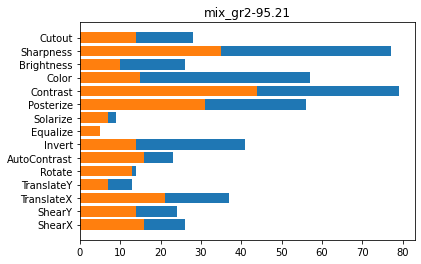

In [41]:
plot_res(mix_gr2_2["1"], "mix_gr2-95.21")

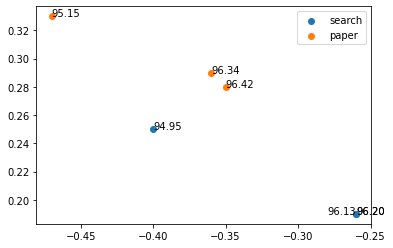

In [59]:
bench_affs = [-0.36,-0.35,-0.47]
bench_divs = [0.29,0.28,0.33]
bench_accs = [96.34,96.42,95.15]

aug_affs = [-0.26,-0.26,-0.4]
aug_divs = [0.19,0.19,0.25]
aug_accs = [96.2,96.2,94.95]
plt.scatter(aug_affs, aug_divs, label="search")
plt.scatter(bench_affs, bench_divs, label="paper")
for aff, div, acc in zip(aug_affs+bench_affs, aug_divs+bench_divs, aug_accs+bench_accs):
    plt.text(aff, div, "{:.2f}".format(acc))
plt.text(-0.28,0.19,"96.13")
plt.legend()

In [12]:
from FastAutoAugment.data import get_dataloaders
from FastAutoAugment.group_search import assign_group4
from torchvision.utils import save_image
def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')
g0 = fa_reduced_cifar10()
g1 = fa_reduced_svhn()
bench_policy_group = {0: g0, 1:g1}
C.get()["aug"] = bench_policy_group
C.get()['aug'] = g0[:10]
C.get()["cutout"] = 16

In [ ]:
images = []
for loader in loaders:
    for data, label in loader:
        images.append(data[0])
        print(label[:20])
save_image(images, "tmp.png")